In [ ]:
# !pip install yfinance

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter, MonthLocator
import seaborn as sns
import yfinance as yf

# Popularity Data for Top 30 Stocks based on averaging daily popularity

In [70]:
file_path = './data/popularity_cleaned.csv' 
popularity = pd.read_csv(file_path)

In [3]:
popularity.datetime = pd.to_datetime(popularity.datetime)

In [4]:
top_30_stocks = popularity.groupby(['ticker'])['daily_avg'].mean().reset_index().nlargest(30, 'daily_avg')

In [75]:
popularity.groupby(['ticker'])['daily_avg'].mean().reset_index().nlargest(30, 'daily_avg')

ticker      daily_avg
42      ACB  459808.318039
2592      F  343949.376315
3156     GE  327105.650714
14     AAPL  246143.030116
5111   MSFT  241277.268959
3326   GPRO  226339.041339
2762    FIT  205403.264438
1912    DIS  197159.259462
297     AMD  170704.669863
1615   CRON  166755.971298
7040   SNAP  164007.944354
5359   NKLA  157060.330823
2614     FB  156900.327578
7590   TOPS  156217.998246
3539   HEXO  155104.265202
7672   TSLA  153264.748086
7755   UBER  146263.148493
1295    CGC  141819.530862
638     BAC  134378.601562
6020   PLUG  134176.719639
346    AMZN  130076.629155
7724   TWTR  126347.583372
637    BABA  123879.877242
5315   NFLX  108675.461440
8537   ZNGA  103710.554410
5348    NIO  100366.356432
7       AAL  100225.184484
1782    DAL   96227.976659
5507   NVDA   95192.858626
6738   SBUX   91132.218181

In [5]:
top_30_stocks = top_30_stocks.reset_index()

In [7]:
del top_30_stocks['index']

In [8]:
top_30_stocks_list = top_30_stocks['ticker'].tolist()
print(top_30_stocks_list)

['ACB', 'F', 'GE', 'AAPL', 'MSFT', 'GPRO', 'FIT', 'DIS', 'AMD', 'CRON', 'SNAP', 'NKLA', 'FB', 'TOPS', 'HEXO', 'TSLA', 'UBER', 'CGC', 'BAC', 'PLUG', 'AMZN', 'TWTR', 'BABA', 'NFLX', 'ZNGA', 'NIO', 'AAL', 'DAL', 'NVDA', 'SBUX']


In [9]:
top_30_daily_avg = popularity[popularity.ticker.isin(top_30_stocks_list) ]

In [71]:
top_30_daily_avg

ticker   datetime      daily_avg      open     close  daily_change
4244       AAL 2018-05-02    3755.000000    3755.0    3755.0      0.000000
4245       AAL 2018-05-03    3778.368421    3776.0    3775.0     -0.000265
4246       AAL 2018-05-04    3762.750000    3775.0    3748.0     -0.007152
4247       AAL 2018-05-05    3748.000000    3748.0    3748.0      0.000000
4248       AAL 2018-05-06    3748.000000    3748.0    3748.0      0.000000
...        ...        ...            ...       ...       ...           ...
5720062   ZNGA 2020-08-09  221305.000000  221305.0  221305.0      0.000000
5720063   ZNGA 2020-08-10  221209.500000  221305.0  220992.0     -0.001414
5720064   ZNGA 2020-08-11  220775.375000  220992.0  220274.0     -0.003249
5720065   ZNGA 2020-08-12  220189.000000  220274.0  219851.0     -0.001920
5720066   ZNGA 2020-08-13  219836.600000  219851.0  219734.0     -0.000532

[22045 rows x 6 columns]

In [13]:
from matplotlib import cm

colors = [cm.hot(i) for i in np.linspace(0, 1, 30)]

In [137]:
sorted_list
color_list = []
for key, grp in top_30_daily_avg.groupby(['ticker']):
    color_list.append((sorted_list.index(key),key, colors[sorted_list.index(key)]))

In [138]:
sorted(color_list, key=lambda x: x[0])


[(0, 'GE', (0.0416, 0.0, 0.0, 1.0)),
 (1, 'BAC', (0.12395875243547878, 0.0, 0.0, 1.0)),
 (2, 'F', (0.2166123489253924, 0.0, 0.0, 1.0)),
 (3, 'DIS', (0.30926594541530605, 0.0, 0.0, 1.0)),
 (4, 'FIT', (0.4019195419052196, 0.0, 0.0, 1.0)),
 (5, 'TSLA', (0.4945731383951333, 0.0, 0.0, 1.0)),
 (6, 'AAPL', (0.576931890830612, 0.0, 0.0, 1.0)),
 (7, 'SNAP', (0.6695854873205256, 0.0, 0.0, 1.0)),
 (8, 'FB', (0.7622390838104393, 0.0, 0.0, 1.0)),
 (9, 'AMZN', (0.8548926803003528, 0.0, 0.0, 1.0)),
 (10, 'NVDA', (0.9475462767902666, 0.0, 0.0, 1.0)),
 (11, 'NIO', (1.0, 0.040196971444627264, 0.0, 1.0)),
 (12, 'NFLX', (1.0, 0.12254977879778592, 0.0, 1.0)),
 (13, 'MSFT', (1.0, 0.21519668707008924, 0.0, 1.0)),
 (14, 'SBUX', (1.0, 0.30784359534239286, 0.0, 1.0)),
 (15, 'UBER', (1.0, 0.40049050361469607, 0.0, 1.0)),
 (16, 'CGC', (1.0, 0.49313741188699983, 0.0, 1.0)),
 (17, 'ACB', (1.0, 0.5857843201593033, 0.0, 1.0)),
 (18, 'TWTR', (1.0, 0.6681371275124619, 0.0, 1.0)),
 (19, 'TOPS', (1.0, 0.7607840357847654,

In [25]:
for key, grp in top_30_daily_avg.groupby(['ticker']):
    print(key, type(key))

AAL <class 'str'>
AAPL <class 'str'>
ACB <class 'str'>
AMD <class 'str'>
AMZN <class 'str'>
BABA <class 'str'>
BAC <class 'str'>
CGC <class 'str'>
CRON <class 'str'>
DAL <class 'str'>
DIS <class 'str'>
F <class 'str'>
FB <class 'str'>
FIT <class 'str'>
GE <class 'str'>
GPRO <class 'str'>
HEXO <class 'str'>
MSFT <class 'str'>
NFLX <class 'str'>
NIO <class 'str'>
NKLA <class 'str'>
NVDA <class 'str'>
PLUG <class 'str'>
SBUX <class 'str'>
SNAP <class 'str'>
TOPS <class 'str'>
TSLA <class 'str'>
TWTR <class 'str'>
UBER <class 'str'>
ZNGA <class 'str'>


In [68]:
def plot_gb_time_series(df, ts_name, gb_name, value_name,figsize=(20,7), title=None):
    '''
    Runs groupby on Pandas dataframe and produces a time series chart.

    Parameters:
    ----------
    df : Pandas dataframe
    ts_name : string
        The name of the df column that has the datetime timestamp x-axis values.
    gb_name : string
        The name of the df column to perform group-by.
    value_name : string
        The name of the df column for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = MonthLocator(interval = 3)
    xtick_dateformatter = DateFormatter('%m/%Y')
    fig, ax = plt.subplots(figsize=figsize)
    colors = [cm.hot(i) for i in np.linspace(0, 1, 30)]
    for key, grp in df.groupby([gb_name]):
        if key in ('AMZN', 'AAPL', 'ACB', 'TSLA'):
            ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, linewidth = 2)
        else:
            ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name,label= '_nolegend_',linestyle =':') # color='grey', #color = colors[sorted_list.index(key)]
        
    
    
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    
    ax.legend() #loc='center left', bbox_to_anchor=(1, 0.5)) # sorted_list,
    _ = plt.xticks(rotation=60, )
    _ = plt.grid()
    _ = plt.xlabel('')
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel('No. of Users Holding', fontsize=14)
    if title is not None:
        _ = plt.title(title, fontsize = 24)
    _ = plt.show()
    

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9b5b8fae50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9b5d19ee50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f9b5d19e590> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:572: UserWarning: The handle <matplotlib.line

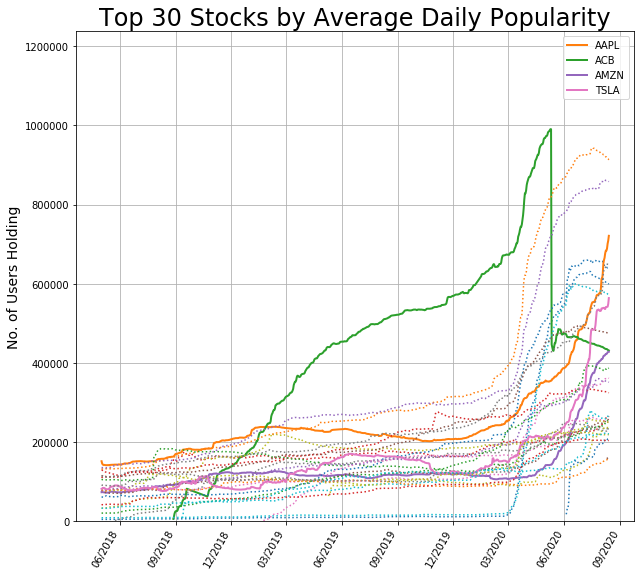

In [69]:
plot_gb_time_series(top_30_daily_avg, 'datetime', 'ticker', 'daily_avg',
                    figsize=(10, 10), title="Top 30 Stocks by Average Daily Popularity")

In [53]:
plot_gb_time_series(top_30_daily_avg[top_30_daily_avg['ticker'].isin(['AAL', 'AAPL', 'ACB', 'AMD', 'BAC', 'CGC', 'CRON', 'DAL', 'DIS', 'F', 'FIT', 'GE', 'GPRO', 'HEXO', 'NIO', 'NKLA', 'PLUG', 'SBUX', 'SNAP', 'TOPS', 'TWTR', 'UBER', 'ZNGA'])], 
                    'datetime', 'ticker', 'daily_avg', 'red',
                    figsize=(20, 7), title="Share Price < $150 by month")

TypeError: plot_gb_time_series() got multiple values for argument 'figsize'

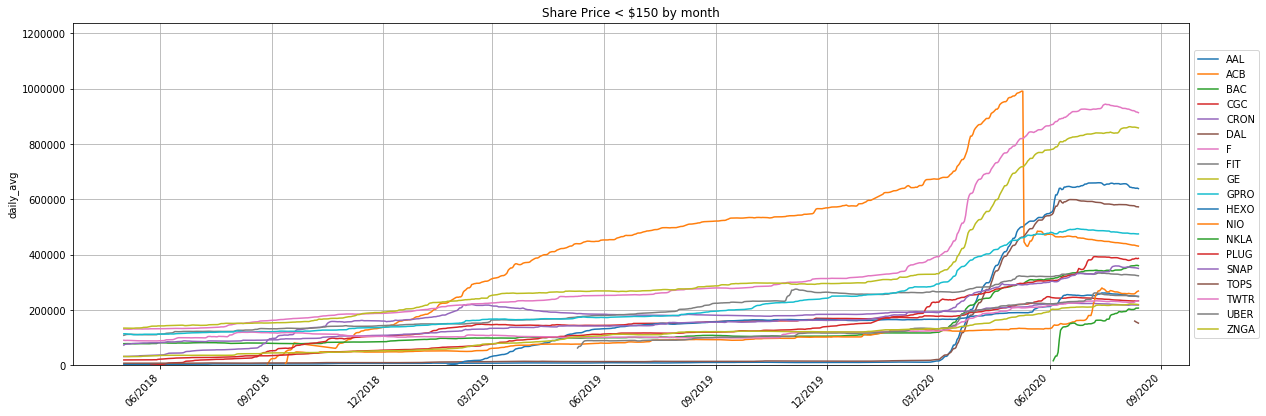

In [95]:

plot_gb_time_series(top_30_daily_avg[top_30_daily_avg['ticker'].isin(['AAL', 'ACB', 'BAC', 'CGC', 'CRON', 'DAL', 'F', 'FIT', 'GE', 'GPRO', 'HEXO', 'NIO', 'NKLA', 'PLUG', 'SNAP', 'TOPS', 'TWTR', 'UBER', 'ZNGA']
)], 'datetime', 'ticker', 'daily_avg',
                    figsize=(20, 7), title="Share Price < $50 by month")

# Getting info from Yahoo Finance for the Top 30 Stocks

In [189]:
data = yf.download(top_30_stocks_list,'2020-10-08')['Adj Close']


[*********************100%***********************]  30 of 30 completed


In [190]:
data = data.T

In [192]:
data.columns = ['current_price']
#del data['0']

In [180]:
import yfinance as yf
sector =[]
long_name = []
top_30_stocks_list.sort()
for i in top_30_stocks_list:
    try:
        sector.append(yf.Ticker(i).info['sector'])
    except:
        sector.append('')
    try:
        long_name.append(yf.Ticker(i).info['longName'])
    except:
        long_name.append('')

In [194]:
data['sector'] = sector

In [195]:
data['long_name'] = long_name

In [197]:
data.at['ACB','sector'] = 'Healthcare'
data.at['ACB','long_name'] = 'Aurora Cannabis Inc.'

In [198]:
data.at['F','sector'] = 'Consumer Cyclical'
data.at['F','long_name'] = 'Ford Motor Company'


In [199]:
data.at['HEXO','sector']  = 'Healthcare'
data.at['HEXO','long_name']  = 'HEXO Corp.'


In [200]:
data.at['PLUG','sector']  ='Industrials'
data.at['PLUG','long_name']  ='Plug Power Inc.'


In [201]:
data.at['TOPS','sector']  ='Industrials'
data.at['TOPS','long_name']  ='Top Ships Inc.'


In [202]:
data

current_price                  sector                      long_name
AAL       13.155000             Industrials   American Airlines Group Inc.
AAPL     114.970001              Technology                     Apple Inc.
ACB        5.100000              Healthcare           Aurora Cannabis Inc.
AMD       86.510002              Technology   Advanced Micro Devices, Inc.
AMZN    3190.550049       Consumer Cyclical               Amazon.com, Inc.
BABA     300.540009       Consumer Cyclical  Alibaba Group Holding Limited
BAC       25.240000      Financial Services    Bank of America Corporation
CGC       17.629999              Healthcare      Canopy Growth Corporation
CRON       5.850000              Healthcare              Cronos Group Inc.
DAL       32.680000             Industrials          Delta Air Lines, Inc.
DIS      123.089996  Communication Services        The Walt Disney Company
F          7.350000       Consumer Cyclical             Ford Motor Company
FB       263.760010  Communication Services                 Facebook, Inc.
FIT        6.870000              Technology                   Fitbit, Inc.
GE         6.650000             Industrials       General Electric Company
GPRO       6.210000              Technology                    GoPro, Inc.
HEXO       0.750000              Healthcare                     HEXO Corp.
MSFT     210.580002              Technology          Microsoft Corporation
NFLX     531.789978  Communication Services                  Netflix, Inc.
NIO       21.440001       Consumer Cyclical                    NIO Limited
NKLA      25.000000       Consumer Cyclical             Nikola Corporation
NVDA     553.549988              Technology             NVIDIA Corporation
PLUG      17.879999             Industrials                Plug Power Inc.
SBUX      89.529999       Consumer Cyclical          Starbucks Corporation
SNAP      27.049999  Communication Services                      Snap Inc.
TOPS       1.190000             Industrials                 Top Ships Inc.
TSLA     425.920013       Consumer Cyclical                    Tesla, Inc.
TWTR      46.009998  Communication Services                  Twitter, Inc.
UBER      37.340000              Technology        Uber Technologies, Inc.
ZNGA       9.300000  Communication Services                     Zynga Inc.

In [203]:
data = data.reset_index()

In [204]:
import re
data.long_name =data.long_name.apply(lambda x: re.sub(r'[^\w\s]','',re.sub(r'Inc|Company|Corporation|com|Limited|Group|Holding|Corp', '', x)).strip())
# re.sub(r'[^\w\s]','',re.sub(r'Inc|Company|Corporation', '', x)).strip()


In [205]:
data.columns = ['ticker','current_price','sector','long_name']

In [302]:
data['keywords'] = data[['ticker','long_name']].apply(lambda x: set((x.dropna().astype(str))),axis=1)

In [372]:
data['keywords']= [{'AAL', 'American Airlines'},
 {'AAPL', 'Apple'},
 {'ACB', 'Aurora Cannabis','ACBFF'}, # 'ACBFF'
 {'AMD', 'Advanced Micro Devices'},
 {'AMZN', 'Amazon'},
 {'Alibaba', 'BABA'},
 {'BAC', 'Bank of America'},
 {'CGC', 'Canopy Growth'},
 {'CRON', 'Cronos'},
 {'DAL', 'Delta Air Lines', 'delta'},
 {'DIS', 'The Walt Disney', 'Disney'},
 {'F', 'Ford Motor', 'Ford'},
 {'FB', 'Facebook'},
 {'FIT', 'Fitbit'},
 {'GE', 'General Electric'},
 {'GPRO', 'GoPro'},
 {'HEXO'},
 {'MSFT', 'Microsoft'},
 {'NFLX', 'Netflix'},
 {'NIO'},
 {'NKLA', 'Nikola'},
 {'NVDA', 'NVIDIA'},
 {'PLUG', 'Plug Power'},
 {'SBUX', 'Starbucks'},
 {'SNAP', 'Snap'},
 {'TOPS', 'Top Ships'},
 {'TSLA', 'Tesla'},
 {'TWTR', 'Twitter'},
 {'UBER', 'Uber Technologies'},
 {'ZNGA', 'Zynga'}]


In [373]:
data

ticker  current_price                  sector               long_name  \
0     AAL      13.155000             Industrials       American Airlines   
1    AAPL     114.970001              Technology                   Apple   
2     ACB       5.100000              Healthcare         Aurora Cannabis   
3     AMD      86.510002              Technology  Advanced Micro Devices   
4    AMZN    3190.550049       Consumer Cyclical                  Amazon   
5    BABA     300.540009       Consumer Cyclical                 Alibaba   
6     BAC      25.240000      Financial Services         Bank of America   
7     CGC      17.629999              Healthcare           Canopy Growth   
8    CRON       5.850000              Healthcare                  Cronos   
9     DAL      32.680000             Industrials         Delta Air Lines   
10    DIS     123.089996  Communication Services         The Walt Disney   
11      F       7.350000       Consumer Cyclical              Ford Motor   
12     FB     263.760010  Communication Services                Facebook   
13    FIT       6.870000              Technology                  Fitbit   
14     GE       6.650000             Industrials        General Electric   
15   GPRO       6.210000              Technology                   GoPro   
16   HEXO       0.750000              Healthcare                    HEXO   
17   MSFT     210.580002              Technology               Microsoft   
18   NFLX     531.789978  Communication Services                 Netflix   
19    NIO      21.440001       Consumer Cyclical                     NIO   
20   NKLA      25.000000       Consumer Cyclical                  Nikola   
21   NVDA     553.549988              Technology                  NVIDIA   
22   PLUG      17.879999             Industrials              Plug Power   
23   SBUX      89.529999       Consumer Cyclical               Starbucks   
24   SNAP      27.049999  Communication Services                    Snap   
25   TOPS       1.190000             Industrials               Top Ships   
26   TSLA     425.920013       Consumer Cyclical                   Tesla   
27   TWTR      46.009998  Communication Services                 Twitter   
28   UBER      37.340000              Technology       Uber Technologies   
29   ZNGA       9.300000  Communication Services                   Zynga   

                          keywords  comment_counts  
0         {American Airlines, AAL}              14  
1                    {Apple, AAPL}            2091  
2    {Aurora Cannabis, ACB, ACBFF}               5  
3    {AMD, Advanced Micro Devices}            4404  
4                   {AMZN, Amazon}            1992  
5                  {Alibaba, BABA}              28  
6           {BAC, Bank of America}             450  
7             {CGC, Canopy Growth}             308  
8                   {CRON, Cronos}             321  
9    {DAL, delta, Delta Air Lines}             132  
10  {The Walt Disney, Disney, DIS}               1  
11           {Ford, F, Ford Motor}             228  
12                  {Facebook, FB}             406  
13                   {Fitbit, FIT}              28  
14          {General Electric, GE}               3  
15                   {GPRO, GoPro}              57  
16                          {HEXO}              38  
17               {Microsoft, MSFT}             432  
18                 {Netflix, NFLX}             664  
19                           {NIO}             384  
20                  {NKLA, Nikola}             298  
21                  {NVDA, NVIDIA}            1358  
22              {PLUG, Plug Power}              84  
23               {Starbucks, SBUX}             113  
24                    {SNAP, Snap}            1666  
25               {Top Ships, TOPS}               0  
26                   {Tesla, TSLA}            2178  
27                 {Twitter, TWTR}             867  
28       {Uber Technologies, UBER}               1  
29                   {Zynga, ZNGA}              28

# Comments data Renewed for detecting tickers

In [214]:
# Merge 3 files
comments = pd.read_csv('./data/2018_df.csv',engine='python')
comments = comments.append(pd.read_csv('./data/2019_df.csv',engine='python'))
comments = comments.append(pd.read_csv('./data/2020_df.csv',engine='python'))

In [216]:
del comments['Unnamed: 0']
del comments['subreddit']

In [221]:
for i in comments.iloc[0,:]:
    print(i)

2190
T-shirt giveaway contest if you guess what SPX/SPY/ES futures (not sure which, but I chose SPX) will close at today in [this thread](https://old.reddit.com/r/wallstreetbets/comments/ab90hx/contest_what_will_the_sp_end_the_year_on/)
Daily Discussion Thread - December 31, 2018
https://www.reddit.com/r/wallstreetbets/comments/ab67jz/daily_discussion_thread_december_31_2018/
http://www.reddit.com/r/wallstreetbets/comments/ab67jz/daily_discussion_thread_december_31_2018/?ref=search_posts


In [247]:
# extract datetime info from title
comments['datetime'] = comments.title.astype("string")

In [274]:
date_list = [i[-3:] for i in comments.datetime.str.split().tolist()]

In [278]:
import datetime
datetime_cleaned = []
for idx, x in enumerate(date_list):
    try:
        datetime_cleaned.append(datetime.datetime.strptime(' '.join(x), '%B %d, %Y').strftime('%Y-%m-%d'))
    except:
        datetime_cleaned.append(datetime.datetime.strptime(x[-1],'%m/%d/%Y').strftime('%Y-%m-%d'))
        # print(idx, x)

In [279]:
comments['datetime'] = datetime_cleaned

In [281]:
del comments['URL']

In [283]:
del comments['title']

In [289]:
comment_id = comments.link.astype("string").str.split("/").tolist()

In [293]:
comments['comment_id'] = [i[-3] for i in comment_id]

In [295]:
del comments['link']
comments

num_comments                                            comment  \
0              2190  T-shirt giveaway contest if you guess what SPX...   
1              2190            Ugh my facebook put FD's are failing me   
2              2190  Wonder how much my Jan 11 360 Tesla calls gonn...   
3              2190                          Fitting end to 18\r\nWtf   
4              2190                                 yea literally wtf    
...             ...                                                ...   
89068           648                                     So calls then?   
89069           648  Is it sad, that I'm sad the market isnt open t...   
89070           648  Off work and market is closed, indeed it is a ...   
89071           648  Serious question, rather than buying 10 ATM co...   
89072           648  It would not be "more lucrative." If you did b...   

         datetime comment_id  
0      2018-12-31     ab67jz  
1      2018-12-31     ab67jz  
2      2018-12-31     ab67jz  
3      2018-12-31     ab67jz  
4      2018-12-31     ab67jz  
...           ...        ...  
89068  2020-01-01     eih9st  
89069  2020-01-01     eih9st  
89070  2020-01-01     eih9st  
89071  2020-01-01     eih9st  
89072  2020-01-01     eih9st  

[280592 rows x 4 columns]

In [377]:
comments.groupby('datetime').count()#.sort_values(byascending = False)

num_comments  comment  comment_id  tickers
datetime                                              
2018-01-01            16       16          16       16
2018-01-02            32       32          32       32
2018-01-03            15       15          15       15
2018-01-04            11       11          11       11
2018-01-05            30       30          30       30
...                  ...      ...         ...      ...
2020-09-23           471      471         471      471
2020-09-24           472      472         472      472
2020-09-25           474      474         474      474
2020-09-28           470      470         470      470
2020-09-29           463      463         463      463

[715 rows x 4 columns]

In [308]:
comments[comments['comment_id']=='ab67jz'].comment[0]

'T-shirt giveaway contest if you guess what SPX/SPY/ES futures (not sure which, but I chose SPX) will close at today in [this thread](https://old.reddit.com/r/wallstreetbets/comments/ab90hx/contest_what_will_the_sp_end_the_year_on/)'

In [305]:
import re

def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search


In [318]:
if findWholeWord('tsla')('T-shirt giveaway contest if you guess what SPX/SPY/ES futures (not sure which, but I chose SPX) will close at today in [this thread](https://old.reddit.com/r/wallstreetbets/comments/ab90hx/contest_what_will_the_sp_end_the_year_on/)'):
    print(True)
else:
    print(False)

False


In [321]:
comments['tickers'] = np.nan

In [331]:
comments.comment.fillna('', inplace = True)

In [335]:
comments.comment = comments.comment.astype('string')

In [336]:
tickers_column = []
for i, i_row in comments.iterrows():
    tickers = []
    for j, j_row in data.iterrows():
        for word in j_row['keywords']:
            #if word.lower() in i_row['body'].lower():
            if findWholeWord(word)(i_row['comment']):
                print('find!', word)
                tickers.append(j_row['ticker'])
            break
    tickers_column.append(tickers)
    print(i,' done!')
comments['tickers'] = tickers_column

0  done!
find! Facebook
1  done!
find! Tesla
2  done!
3  done!
4  done!
5  done!
6  done!
7  done!
8  done!
9  done!
10  done!
11  done!
12  done!
13  done!
14  done!
15  done!
16  done!
17  done!
18  done!
19  done!
20  done!
21  done!
22  done!
find! Twitter
23  done!
24  done!
25  done!
26  done!
27  done!
28  done!
29  done!
30  done!
31  done!
32  done!
33  done!
34  done!
35  done!
36  done!
37  done!
38  done!
39  done!
40  done!
41  done!
42  done!
43  done!
44  done!
45  done!
46  done!
47  done!
48  done!
49  done!
50  done!
51  done!
52  done!
53  done!
54  done!
55  done!
56  done!
57  done!
58  done!
59  done!
60  done!
61  done!
62  done!
63  done!
64  done!
65  done!
66  done!
67  done!
68  done!
69  done!
70  done!
71  done!
72  done!
73  done!
74  done!
75  done!
76  done!
77  done!
78  done!
79  done!
80  done!
81  done!
82  done!
83  done!
84  done!
85  done!
86  done!
87  done!
88  done!
89  done!
90  done!
91  done!
92  done!
93  done!
94  done!
95  done!
96  done!

786  done!
787  done!
788  done!
789  done!
790  done!
791  done!
792  done!
793  done!
794  done!
795  done!
796  done!
797  done!
798  done!
799  done!
800  done!
801  done!
802  done!
803  done!
804  done!
805  done!
806  done!
807  done!
808  done!
809  done!
810  done!
811  done!
812  done!
813  done!
814  done!
815  done!
816  done!
817  done!
818  done!
819  done!
820  done!
821  done!
822  done!
823  done!
824  done!
825  done!
826  done!
827  done!
828  done!
829  done!
830  done!
831  done!
832  done!
833  done!
834  done!
835  done!
836  done!
837  done!
838  done!
839  done!
840  done!
841  done!
842  done!
843  done!
844  done!
845  done!
846  done!
847  done!
848  done!
849  done!
850  done!
851  done!
852  done!
853  done!
854  done!
855  done!
856  done!
857  done!
858  done!
859  done!
860  done!
find! SNAP
861  done!
find! SNAP
862  done!
863  done!
864  done!
865  done!
866  done!
867  done!
868  done!
869  done!
870  done!
871  done!
872  done!
873  done!
874  done!

1521  done!
1522  done!
1523  done!
1524  done!
1525  done!
1526  done!
1527  done!
1528  done!
1529  done!
1530  done!
1531  done!
1532  done!
find! AMZN
1533  done!
1534  done!
1535  done!
1536  done!
1537  done!
1538  done!
1539  done!
1540  done!
1541  done!
1542  done!
1543  done!
1544  done!
1545  done!
1546  done!
1547  done!
find! AMZN
1548  done!
1549  done!
1550  done!
1551  done!
1552  done!
1553  done!
1554  done!
1555  done!
1556  done!
1557  done!
1558  done!
1559  done!
1560  done!
1561  done!
1562  done!
1563  done!
1564  done!
1565  done!
1566  done!
1567  done!
1568  done!
1569  done!
1570  done!
1571  done!
1572  done!
1573  done!
1574  done!
1575  done!
1576  done!
1577  done!
1578  done!
1579  done!
1580  done!
1581  done!
1582  done!
1583  done!
1584  done!
1585  done!
1586  done!
1587  done!
1588  done!
find! SNAP
1589  done!
1590  done!
1591  done!
1592  done!
1593  done!
1594  done!
find! AMZN
1595  done!
1596  done!
1597  done!
1598  done!
1599  done!
1600  do

2188  done!
2189  done!
2190  done!
2191  done!
2192  done!
2193  done!
2194  done!
2195  done!
2196  done!
2197  done!
2198  done!
2199  done!
2200  done!
find! Apple
2201  done!
2202  done!
find! AMD
2203  done!
2204  done!
2205  done!
2206  done!
2207  done!
2208  done!
2209  done!
2210  done!
2211  done!
2212  done!
2213  done!
2214  done!
2215  done!
2216  done!
2217  done!
2218  done!
2219  done!
2220  done!
2221  done!
2222  done!
2223  done!
2224  done!
2225  done!
2226  done!
2227  done!
2228  done!
2229  done!
2230  done!
2231  done!
2232  done!
2233  done!
2234  done!
2235  done!
2236  done!
2237  done!
2238  done!
2239  done!
2240  done!
2241  done!
2242  done!
2243  done!
2244  done!
find! AMZN
2245  done!
2246  done!
2247  done!
2248  done!
2249  done!
2250  done!
2251  done!
2252  done!
2253  done!
2254  done!
2255  done!
2256  done!
2257  done!
2258  done!
2259  done!
2260  done!
2261  done!
2262  done!
2263  done!
2264  done!
2265  done!
2266  done!
2267  done!
2268  d

2892  done!
2893  done!
2894  done!
2895  done!
2896  done!
2897  done!
2898  done!
2899  done!
2900  done!
2901  done!
find! AMZN
2902  done!
2903  done!
2904  done!
2905  done!
2906  done!
2907  done!
2908  done!
2909  done!
2910  done!
2911  done!
2912  done!
2913  done!
2914  done!
2915  done!
2916  done!
2917  done!
2918  done!
2919  done!
2920  done!
2921  done!
2922  done!
2923  done!
2924  done!
2925  done!
2926  done!
2927  done!
2928  done!
2929  done!
2930  done!
2931  done!
2932  done!
2933  done!
2934  done!
2935  done!
2936  done!
2937  done!
2938  done!
2939  done!
find! Facebook
2940  done!
2941  done!
2942  done!
2943  done!
2944  done!
2945  done!
2946  done!
2947  done!
2948  done!
2949  done!
2950  done!
2951  done!
2952  done!
2953  done!
2954  done!
2955  done!
2956  done!
2957  done!
2958  done!
2959  done!
2960  done!
2961  done!
2962  done!
2963  done!
2964  done!
2965  done!
2966  done!
2967  done!
2968  done!
2969  done!
2970  done!
2971  done!
2972  done!
29

3589  done!
find! AMD
find! NVDA
3590  done!
3591  done!
3592  done!
3593  done!
find! AMZN
3594  done!
3595  done!
3596  done!
3597  done!
3598  done!
find! AMZN
3599  done!
3600  done!
3601  done!
3602  done!
3603  done!
3604  done!
3605  done!
3606  done!
3607  done!
3608  done!
3609  done!
3610  done!
3611  done!
3612  done!
3613  done!
3614  done!
3615  done!
3616  done!
3617  done!
3618  done!
3619  done!
3620  done!
3621  done!
3622  done!
3623  done!
3624  done!
3625  done!
3626  done!
3627  done!
3628  done!
3629  done!
3630  done!
3631  done!
3632  done!
3633  done!
3634  done!
3635  done!
3636  done!
3637  done!
3638  done!
3639  done!
3640  done!
3641  done!
3642  done!
3643  done!
3644  done!
3645  done!
3646  done!
3647  done!
3648  done!
3649  done!
3650  done!
3651  done!
3652  done!
3653  done!
3654  done!
3655  done!
3656  done!
3657  done!
3658  done!
3659  done!
3660  done!
3661  done!
3662  done!
3663  done!
3664  done!
3665  done!
3666  done!
3667  done!
3668  don

4254  done!
4255  done!
4256  done!
4257  done!
4258  done!
4259  done!
4260  done!
4261  done!
4262  done!
4263  done!
4264  done!
4265  done!
4266  done!
4267  done!
4268  done!
4269  done!
4270  done!
4271  done!
4272  done!
4273  done!
4274  done!
4275  done!
4276  done!
4277  done!
4278  done!
4279  done!
4280  done!
4281  done!
4282  done!
4283  done!
4284  done!
find! AMD
4285  done!
4286  done!
4287  done!
4288  done!
4289  done!
4290  done!
4291  done!
4292  done!
4293  done!
4294  done!
4295  done!
4296  done!
4297  done!
4298  done!
4299  done!
4300  done!
4301  done!
4302  done!
4303  done!
4304  done!
4305  done!
4306  done!
4307  done!
4308  done!
4309  done!
4310  done!
4311  done!
4312  done!
4313  done!
4314  done!
4315  done!
4316  done!
4317  done!
4318  done!
4319  done!
4320  done!
4321  done!
4322  done!
4323  done!
4324  done!
4325  done!
4326  done!
4327  done!
4328  done!
4329  done!
4330  done!
4331  done!
4332  done!
4333  done!
4334  done!
4335  done!
4336  

4918  done!
4919  done!
4920  done!
4921  done!
4922  done!
4923  done!
4924  done!
4925  done!
4926  done!
4927  done!
4928  done!
4929  done!
4930  done!
4931  done!
4932  done!
4933  done!
4934  done!
4935  done!
4936  done!
4937  done!
4938  done!
4939  done!
4940  done!
4941  done!
4942  done!
4943  done!
4944  done!
4945  done!
4946  done!
4947  done!
4948  done!
4949  done!
4950  done!
4951  done!
4952  done!
4953  done!
4954  done!
4955  done!
4956  done!
4957  done!
find! AMZN
4958  done!
4959  done!
4960  done!
4961  done!
4962  done!
4963  done!
4964  done!
4965  done!
4966  done!
4967  done!
4968  done!
4969  done!
4970  done!
4971  done!
4972  done!
4973  done!
4974  done!
4975  done!
4976  done!
4977  done!
4978  done!
4979  done!
4980  done!
4981  done!
4982  done!
4983  done!
4984  done!
4985  done!
4986  done!
4987  done!
4988  done!
find! AMZN
4989  done!
find! AMZN
4990  done!
4991  done!
4992  done!
4993  done!
4994  done!
4995  done!
4996  done!
4997  done!
4998  d

5581  done!
5582  done!
5583  done!
5584  done!
5585  done!
5586  done!
5587  done!
5588  done!
5589  done!
5590  done!
5591  done!
5592  done!
5593  done!
5594  done!
5595  done!
5596  done!
5597  done!
5598  done!
5599  done!
5600  done!
5601  done!
5602  done!
5603  done!
5604  done!
5605  done!
5606  done!
5607  done!
5608  done!
5609  done!
5610  done!
5611  done!
5612  done!
5613  done!
5614  done!
5615  done!
5616  done!
5617  done!
5618  done!
5619  done!
5620  done!
5621  done!
5622  done!
5623  done!
5624  done!
5625  done!
5626  done!
5627  done!
5628  done!
5629  done!
5630  done!
5631  done!
5632  done!
5633  done!
5634  done!
5635  done!
5636  done!
5637  done!
5638  done!
5639  done!
5640  done!
5641  done!
5642  done!
5643  done!
5644  done!
5645  done!
5646  done!
5647  done!
5648  done!
5649  done!
5650  done!
5651  done!
5652  done!
5653  done!
find! AMD
5654  done!
5655  done!
find! AMD
5656  done!
5657  done!
5658  done!
find! AMD
5659  done!
5660  done!
find! AMD


6299  done!
6300  done!
6301  done!
6302  done!
6303  done!
6304  done!
6305  done!
6306  done!
6307  done!
6308  done!
6309  done!
6310  done!
6311  done!
6312  done!
6313  done!
6314  done!
6315  done!
6316  done!
6317  done!
6318  done!
6319  done!
6320  done!
6321  done!
6322  done!
6323  done!
6324  done!
6325  done!
6326  done!
6327  done!
find! Twitter
6328  done!
6329  done!
6330  done!
6331  done!
6332  done!
6333  done!
6334  done!
6335  done!
6336  done!
6337  done!
6338  done!
find! CGC
find! CRON
6339  done!
6340  done!
6341  done!
6342  done!
6343  done!
6344  done!
6345  done!
6346  done!
6347  done!
6348  done!
6349  done!
6350  done!
6351  done!
6352  done!
6353  done!
6354  done!
6355  done!
6356  done!
6357  done!
6358  done!
6359  done!
6360  done!
6361  done!
6362  done!
6363  done!
6364  done!
6365  done!
6366  done!
6367  done!
6368  done!
6369  done!
6370  done!
6371  done!
6372  done!
6373  done!
6374  done!
6375  done!
6376  done!
6377  done!
6378  done!
6379 

6955  done!
6956  done!
6957  done!
6958  done!
6959  done!
6960  done!
6961  done!
6962  done!
6963  done!
6964  done!
6965  done!
6966  done!
6967  done!
6968  done!
6969  done!
6970  done!
6971  done!
6972  done!
find! Ford
6973  done!
6974  done!
find! Ford
6975  done!
6976  done!
6977  done!
find! Twitter
6978  done!
6979  done!
6980  done!
find! AMD
find! AMZN
6981  done!
6982  done!
6983  done!
6984  done!
6985  done!
find! AMZN
6986  done!
6987  done!
6988  done!
6989  done!
6990  done!
6991  done!
6992  done!
6993  done!
6994  done!
6995  done!
6996  done!
6997  done!
6998  done!
6999  done!
7000  done!
7001  done!
7002  done!
7003  done!
7004  done!
7005  done!
7006  done!
find! Apple
7007  done!
find! AMZN
7008  done!
find! Apple
7009  done!
7010  done!
7011  done!
7012  done!
find! AMZN
7013  done!
find! Apple
7014  done!
7015  done!
7016  done!
7017  done!
7018  done!
7019  done!
7020  done!
7021  done!
7022  done!
find! Twitter
7023  done!
7024  done!
7025  done!
7026  do

7604  done!
7605  done!
7606  done!
7607  done!
7608  done!
7609  done!
find! Tesla
7610  done!
7611  done!
7612  done!
7613  done!
7614  done!
7615  done!
7616  done!
7617  done!
7618  done!
find! AMD
7619  done!
7620  done!
7621  done!
7622  done!
7623  done!
7624  done!
7625  done!
7626  done!
7627  done!
7628  done!
7629  done!
7630  done!
7631  done!
7632  done!
7633  done!
7634  done!
7635  done!
7636  done!
7637  done!
7638  done!
7639  done!
7640  done!
7641  done!
7642  done!
7643  done!
7644  done!
7645  done!
7646  done!
7647  done!
7648  done!
7649  done!
7650  done!
7651  done!
7652  done!
7653  done!
7654  done!
7655  done!
7656  done!
7657  done!
7658  done!
7659  done!
7660  done!
7661  done!
7662  done!
7663  done!
7664  done!
7665  done!
find! AMD
7666  done!
7667  done!
7668  done!
find! AMD
7669  done!
7670  done!
7671  done!
7672  done!
7673  done!
7674  done!
7675  done!
7676  done!
7677  done!
7678  done!
7679  done!
7680  done!
7681  done!
7682  done!
7683  done

8281  done!
8282  done!
8283  done!
8284  done!
8285  done!
8286  done!
8287  done!
8288  done!
find! AMD
8289  done!
8290  done!
8291  done!
8292  done!
8293  done!
8294  done!
8295  done!
8296  done!
8297  done!
8298  done!
8299  done!
8300  done!
8301  done!
8302  done!
8303  done!
8304  done!
8305  done!
8306  done!
8307  done!
8308  done!
8309  done!
8310  done!
8311  done!
8312  done!
8313  done!
8314  done!
8315  done!
8316  done!
8317  done!
8318  done!
8319  done!
8320  done!
8321  done!
8322  done!
8323  done!
8324  done!
8325  done!
8326  done!
8327  done!
8328  done!
8329  done!
8330  done!
8331  done!
8332  done!
8333  done!
8334  done!
8335  done!
8336  done!
8337  done!
8338  done!
8339  done!
8340  done!
8341  done!
8342  done!
8343  done!
8344  done!
8345  done!
8346  done!
8347  done!
8348  done!
8349  done!
find! AMD
8350  done!
8351  done!
8352  done!
8353  done!
find! Ford
8354  done!
8355  done!
8356  done!
8357  done!
8358  done!
8359  done!
8360  done!
find! AMZ

8940  done!
8941  done!
8942  done!
8943  done!
8944  done!
8945  done!
8946  done!
8947  done!
8948  done!
8949  done!
8950  done!
8951  done!
8952  done!
8953  done!
8954  done!
8955  done!
8956  done!
8957  done!
8958  done!
8959  done!
8960  done!
8961  done!
8962  done!
8963  done!
8964  done!
8965  done!
8966  done!
8967  done!
8968  done!
8969  done!
8970  done!
8971  done!
8972  done!
8973  done!
8974  done!
8975  done!
8976  done!
8977  done!
8978  done!
8979  done!
8980  done!
8981  done!
8982  done!
8983  done!
8984  done!
8985  done!
find! AMD
8986  done!
8987  done!
8988  done!
8989  done!
8990  done!
8991  done!
8992  done!
8993  done!
8994  done!
8995  done!
8996  done!
8997  done!
8998  done!
8999  done!
9000  done!
9001  done!
9002  done!
9003  done!
9004  done!
9005  done!
9006  done!
9007  done!
9008  done!
9009  done!
9010  done!
9011  done!
9012  done!
9013  done!
9014  done!
9015  done!
9016  done!
9017  done!
9018  done!
9019  done!
9020  done!
9021  done!
9022  

9600  done!
9601  done!
9602  done!
9603  done!
9604  done!
9605  done!
find! AMD
9606  done!
9607  done!
9608  done!
9609  done!
9610  done!
find! Apple
9611  done!
9612  done!
9613  done!
9614  done!
9615  done!
9616  done!
9617  done!
9618  done!
9619  done!
9620  done!
9621  done!
9622  done!
9623  done!
9624  done!
9625  done!
9626  done!
9627  done!
9628  done!
9629  done!
9630  done!
9631  done!
9632  done!
9633  done!
9634  done!
9635  done!
9636  done!
9637  done!
9638  done!
9639  done!
find! Apple
9640  done!
9641  done!
find! AMZN
9642  done!
9643  done!
9644  done!
9645  done!
9646  done!
9647  done!
9648  done!
9649  done!
find! NVDA
9650  done!
9651  done!
9652  done!
9653  done!
9654  done!
9655  done!
9656  done!
9657  done!
find! CRON
9658  done!
9659  done!
9660  done!
find! AMD
9661  done!
9662  done!
9663  done!
9664  done!
9665  done!
9666  done!
9667  done!
9668  done!
9669  done!
9670  done!
9671  done!
9672  done!
9673  done!
9674  done!
9675  done!
9676  done!

10271  done!
10272  done!
10273  done!
find! AMZN
10274  done!
10275  done!
10276  done!
10277  done!
10278  done!
10279  done!
10280  done!
find! Apple
10281  done!
find! Twitter
10282  done!
10283  done!
10284  done!
10285  done!
10286  done!
10287  done!
10288  done!
10289  done!
10290  done!
10291  done!
10292  done!
10293  done!
10294  done!
10295  done!
10296  done!
10297  done!
10298  done!
10299  done!
10300  done!
10301  done!
10302  done!
10303  done!
10304  done!
10305  done!
10306  done!
10307  done!
10308  done!
10309  done!
10310  done!
10311  done!
10312  done!
10313  done!
10314  done!
10315  done!
10316  done!
10317  done!
10318  done!
10319  done!
10320  done!
10321  done!
10322  done!
10323  done!
10324  done!
10325  done!
10326  done!
10327  done!
10328  done!
10329  done!
10330  done!
10331  done!
10332  done!
10333  done!
10334  done!
10335  done!
10336  done!
10337  done!
10338  done!
10339  done!
10340  done!
10341  done!
10342  done!
10343  done!
10344  done!
1

10912  done!
10913  done!
10914  done!
10915  done!
10916  done!
10917  done!
10918  done!
find! AMZN
10919  done!
10920  done!
10921  done!
10922  done!
10923  done!
10924  done!
10925  done!
10926  done!
10927  done!
10928  done!
10929  done!
10930  done!
10931  done!
10932  done!
10933  done!
10934  done!
find! Twitter
10935  done!
find! AMZN
10936  done!
find! AMZN
10937  done!
find! AMZN
10938  done!
10939  done!
10940  done!
10941  done!
10942  done!
10943  done!
10944  done!
find! Microsoft
10945  done!
10946  done!
10947  done!
10948  done!
10949  done!
10950  done!
find! AMZN
10951  done!
10952  done!
10953  done!
10954  done!
10955  done!
10956  done!
10957  done!
10958  done!
10959  done!
10960  done!
10961  done!
10962  done!
10963  done!
10964  done!
10965  done!
10966  done!
10967  done!
10968  done!
10969  done!
10970  done!
10971  done!
10972  done!
10973  done!
find! AMZN
10974  done!
10975  done!
10976  done!
10977  done!
10978  done!
10979  done!
10980  done!
find! A

11558  done!
11559  done!
11560  done!
11561  done!
find! AMD
11562  done!
11563  done!
11564  done!
11565  done!
11566  done!
11567  done!
11568  done!
11569  done!
11570  done!
11571  done!
11572  done!
11573  done!
11574  done!
11575  done!
11576  done!
11577  done!
11578  done!
11579  done!
11580  done!
11581  done!
11582  done!
11583  done!
11584  done!
11585  done!
11586  done!
11587  done!
11588  done!
11589  done!
find! AMD
11590  done!
11591  done!
find! SNAP
11592  done!
find! SNAP
11593  done!
11594  done!
11595  done!
11596  done!
11597  done!
11598  done!
11599  done!
find! AMD
11600  done!
11601  done!
11602  done!
find! AMD
11603  done!
11604  done!
find! Facebook
11605  done!
find! Facebook
11606  done!
11607  done!
11608  done!
11609  done!
11610  done!
11611  done!
find! Facebook
11612  done!
find! Facebook
11613  done!
11614  done!
11615  done!
11616  done!
11617  done!
11618  done!
11619  done!
11620  done!
11621  done!
11622  done!
11623  done!
11624  done!
11625  

12175  done!
12176  done!
12177  done!
12178  done!
12179  done!
12180  done!
12181  done!
12182  done!
12183  done!
12184  done!
12185  done!
12186  done!
12187  done!
find! Tesla
12188  done!
12189  done!
12190  done!
12191  done!
12192  done!
find! NVDA
12193  done!
12194  done!
12195  done!
12196  done!
12197  done!
12198  done!
12199  done!
12200  done!
12201  done!
12202  done!
12203  done!
12204  done!
12205  done!
12206  done!
12207  done!
12208  done!
12209  done!
12210  done!
12211  done!
12212  done!
12213  done!
12214  done!
12215  done!
12216  done!
12217  done!
12218  done!
12219  done!
12220  done!
12221  done!
12222  done!
12223  done!
12224  done!
12225  done!
12226  done!
12227  done!
12228  done!
12229  done!
12230  done!
12231  done!
12232  done!
12233  done!
12234  done!
12235  done!
12236  done!
12237  done!
12238  done!
find! AMZN
12239  done!
12240  done!
12241  done!
12242  done!
12243  done!
12244  done!
12245  done!
12246  done!
12247  done!
12248  done!
1224

12827  done!
12828  done!
12829  done!
12830  done!
12831  done!
12832  done!
12833  done!
12834  done!
find! Twitter
12835  done!
12836  done!
12837  done!
12838  done!
12839  done!
12840  done!
12841  done!
12842  done!
12843  done!
12844  done!
12845  done!
12846  done!
12847  done!
12848  done!
12849  done!
12850  done!
12851  done!
12852  done!
12853  done!
12854  done!
12855  done!
12856  done!
12857  done!
12858  done!
12859  done!
12860  done!
12861  done!
12862  done!
12863  done!
12864  done!
12865  done!
12866  done!
12867  done!
12868  done!
12869  done!
12870  done!
12871  done!
12872  done!
12873  done!
12874  done!
12875  done!
12876  done!
12877  done!
12878  done!
12879  done!
12880  done!
12881  done!
12882  done!
12883  done!
12884  done!
12885  done!
12886  done!
12887  done!
12888  done!
12889  done!
12890  done!
12891  done!
find! NVDA
12892  done!
12893  done!
12894  done!
12895  done!
12896  done!
12897  done!
12898  done!
12899  done!
12900  done!
12901  done!


13420  done!
13421  done!
13422  done!
13423  done!
13424  done!
13425  done!
13426  done!
13427  done!
13428  done!
13429  done!
13430  done!
13431  done!
13432  done!
13433  done!
13434  done!
13435  done!
13436  done!
13437  done!
find! NVDA
13438  done!
13439  done!
13440  done!
13441  done!
13442  done!
13443  done!
13444  done!
13445  done!
13446  done!
13447  done!
13448  done!
13449  done!
13450  done!
13451  done!
13452  done!
13453  done!
13454  done!
13455  done!
13456  done!
13457  done!
find! SNAP
13458  done!
13459  done!
13460  done!
13461  done!
13462  done!
13463  done!
13464  done!
13465  done!
13466  done!
13467  done!
13468  done!
13469  done!
13470  done!
13471  done!
13472  done!
find! NVDA
13473  done!
13474  done!
13475  done!
13476  done!
13477  done!
13478  done!
13479  done!
13480  done!
13481  done!
13482  done!
13483  done!
13484  done!
13485  done!
13486  done!
13487  done!
13488  done!
13489  done!
13490  done!
13491  done!
13492  done!
find! PLUG
13493  

14007  done!
14008  done!
14009  done!
14010  done!
14011  done!
14012  done!
14013  done!
14014  done!
14015  done!
14016  done!
find! AMZN
14017  done!
14018  done!
14019  done!
14020  done!
14021  done!
find! AMZN
14022  done!
14023  done!
14024  done!
14025  done!
14026  done!
find! NVDA
14027  done!
14028  done!
14029  done!
14030  done!
14031  done!
14032  done!
14033  done!
find! NVDA
14034  done!
14035  done!
14036  done!
14037  done!
find! NVDA
14038  done!
14039  done!
14040  done!
14041  done!
14042  done!
14043  done!
14044  done!
14045  done!
14046  done!
14047  done!
14048  done!
14049  done!
14050  done!
find! Apple
14051  done!
14052  done!
14053  done!
14054  done!
14055  done!
14056  done!
14057  done!
14058  done!
14059  done!
14060  done!
14061  done!
14062  done!
14063  done!
find! AMZN
14064  done!
14065  done!
14066  done!
14067  done!
14068  done!
14069  done!
14070  done!
14071  done!
14072  done!
14073  done!
14074  done!
14075  done!
14076  done!
find! SNAP
1

14613  done!
14614  done!
14615  done!
14616  done!
14617  done!
14618  done!
14619  done!
14620  done!
14621  done!
14622  done!
14623  done!
14624  done!
14625  done!
14626  done!
14627  done!
14628  done!
14629  done!
14630  done!
14631  done!
14632  done!
14633  done!
14634  done!
14635  done!
14636  done!
14637  done!
14638  done!
14639  done!
14640  done!
14641  done!
14642  done!
14643  done!
14644  done!
14645  done!
14646  done!
14647  done!
14648  done!
14649  done!
14650  done!
14651  done!
14652  done!
14653  done!
14654  done!
14655  done!
14656  done!
14657  done!
14658  done!
14659  done!
14660  done!
find! Apple
14661  done!
14662  done!
14663  done!
14664  done!
14665  done!
14666  done!
14667  done!
14668  done!
14669  done!
find! NVDA
14670  done!
14671  done!
14672  done!
14673  done!
14674  done!
find! PLUG
14675  done!
find! PLUG
14676  done!
14677  done!
14678  done!
14679  done!
find! SNAP
14680  done!
14681  done!
14682  done!
14683  done!
14684  done!
find! SN

15260  done!
15261  done!
15262  done!
15263  done!
15264  done!
15265  done!
15266  done!
15267  done!
15268  done!
15269  done!
15270  done!
15271  done!
15272  done!
15273  done!
15274  done!
15275  done!
15276  done!
15277  done!
15278  done!
15279  done!
15280  done!
15281  done!
15282  done!
15283  done!
15284  done!
15285  done!
15286  done!
15287  done!
15288  done!
15289  done!
find! AMD
15290  done!
15291  done!
15292  done!
15293  done!
15294  done!
15295  done!
15296  done!
15297  done!
15298  done!
find! AMD
15299  done!
15300  done!
15301  done!
15302  done!
15303  done!
15304  done!
15305  done!
15306  done!
15307  done!
15308  done!
15309  done!
15310  done!
15311  done!
15312  done!
15313  done!
15314  done!
15315  done!
15316  done!
15317  done!
15318  done!
15319  done!
15320  done!
15321  done!
15322  done!
15323  done!
15324  done!
15325  done!
15326  done!
15327  done!
15328  done!
15329  done!
15330  done!
15331  done!
15332  done!
15333  done!
15334  done!
15335

15860  done!
15861  done!
15862  done!
15863  done!
15864  done!
15865  done!
15866  done!
15867  done!
15868  done!
15869  done!
15870  done!
15871  done!
15872  done!
15873  done!
15874  done!
15875  done!
find! CRON
15876  done!
find! CRON
15877  done!
15878  done!
15879  done!
find! CGC
15880  done!
15881  done!
find! CGC
15882  done!
15883  done!
15884  done!
15885  done!
15886  done!
15887  done!
15888  done!
find! NVDA
15889  done!
15890  done!
15891  done!
15892  done!
15893  done!
15894  done!
15895  done!
find! Apple
15896  done!
15897  done!
15898  done!
15899  done!
15900  done!
15901  done!
15902  done!
15903  done!
15904  done!
15905  done!
15906  done!
15907  done!
15908  done!
15909  done!
15910  done!
15911  done!
15912  done!
15913  done!
15914  done!
15915  done!
15916  done!
15917  done!
15918  done!
15919  done!
15920  done!
15921  done!
15922  done!
15923  done!
15924  done!
15925  done!
15926  done!
15927  done!
15928  done!
15929  done!
15930  done!
15931  done!

16462  done!
16463  done!
16464  done!
16465  done!
16466  done!
16467  done!
16468  done!
16469  done!
16470  done!
16471  done!
16472  done!
16473  done!
16474  done!
16475  done!
find! Starbucks
16476  done!
16477  done!
16478  done!
16479  done!
16480  done!
16481  done!
16482  done!
16483  done!
16484  done!
16485  done!
find! AMZN
16486  done!
16487  done!
16488  done!
16489  done!
16490  done!
16491  done!
16492  done!
16493  done!
16494  done!
16495  done!
16496  done!
find! AMZN
16497  done!
16498  done!
16499  done!
16500  done!
16501  done!
16502  done!
16503  done!
16504  done!
16505  done!
16506  done!
16507  done!
16508  done!
16509  done!
16510  done!
16511  done!
16512  done!
16513  done!
16514  done!
16515  done!
16516  done!
16517  done!
16518  done!
16519  done!
16520  done!
16521  done!
16522  done!
16523  done!
16524  done!
find! Apple
16525  done!
16526  done!
16527  done!
16528  done!
16529  done!
16530  done!
16531  done!
find! SNAP
16532  done!
16533  done!
165

17062  done!
17063  done!
17064  done!
find! AMD
17065  done!
17066  done!
find! AMZN
17067  done!
17068  done!
17069  done!
17070  done!
17071  done!
17072  done!
17073  done!
17074  done!
17075  done!
17076  done!
17077  done!
17078  done!
17079  done!
find! Twitter
17080  done!
17081  done!
17082  done!
17083  done!
17084  done!
17085  done!
17086  done!
17087  done!
17088  done!
17089  done!
17090  done!
17091  done!
17092  done!
17093  done!
17094  done!
17095  done!
17096  done!
17097  done!
17098  done!
17099  done!
17100  done!
17101  done!
17102  done!
17103  done!
17104  done!
17105  done!
17106  done!
17107  done!
17108  done!
17109  done!
17110  done!
17111  done!
17112  done!
17113  done!
17114  done!
17115  done!
17116  done!
17117  done!
17118  done!
17119  done!
17120  done!
17121  done!
17122  done!
17123  done!
17124  done!
17125  done!
17126  done!
17127  done!
17128  done!
17129  done!
17130  done!
17131  done!
17132  done!
17133  done!
17134  done!
17135  done!
171

17666  done!
17667  done!
17668  done!
17669  done!
17670  done!
17671  done!
find! Apple
17672  done!
17673  done!
17674  done!
find! Apple
17675  done!
17676  done!
17677  done!
17678  done!
17679  done!
17680  done!
17681  done!
17682  done!
17683  done!
17684  done!
17685  done!
17686  done!
17687  done!
17688  done!
17689  done!
17690  done!
17691  done!
17692  done!
17693  done!
17694  done!
17695  done!
17696  done!
17697  done!
17698  done!
17699  done!
17700  done!
17701  done!
17702  done!
17703  done!
17704  done!
17705  done!
17706  done!
17707  done!
17708  done!
17709  done!
17710  done!
17711  done!
17712  done!
17713  done!
17714  done!
17715  done!
17716  done!
17717  done!
17718  done!
17719  done!
17720  done!
find! CRON
17721  done!
17722  done!
17723  done!
17724  done!
17725  done!
17726  done!
17727  done!
17728  done!
17729  done!
17730  done!
find! CGC
17731  done!
find! SNAP
17732  done!
17733  done!
17734  done!
17735  done!
17736  done!
17737  done!
17738  d

18305  done!
18306  done!
18307  done!
18308  done!
18309  done!
18310  done!
18311  done!
18312  done!
18313  done!
18314  done!
18315  done!
18316  done!
18317  done!
18318  done!
18319  done!
18320  done!
find! Tesla
18321  done!
18322  done!
18323  done!
18324  done!
18325  done!
18326  done!
18327  done!
18328  done!
18329  done!
18330  done!
18331  done!
18332  done!
18333  done!
18334  done!
18335  done!
18336  done!
18337  done!
18338  done!
18339  done!
18340  done!
18341  done!
18342  done!
18343  done!
18344  done!
18345  done!
18346  done!
18347  done!
find! Twitter
18348  done!
18349  done!
18350  done!
18351  done!
18352  done!
18353  done!
18354  done!
18355  done!
18356  done!
18357  done!
18358  done!
18359  done!
18360  done!
18361  done!
18362  done!
18363  done!
18364  done!
18365  done!
18366  done!
18367  done!
18368  done!
18369  done!
18370  done!
18371  done!
18372  done!
18373  done!
find! SNAP
18374  done!
18375  done!
find! Facebook
find! Starbucks
18376  do

18922  done!
18923  done!
18924  done!
18925  done!
18926  done!
18927  done!
18928  done!
18929  done!
18930  done!
18931  done!
18932  done!
18933  done!
18934  done!
18935  done!
18936  done!
18937  done!
18938  done!
18939  done!
18940  done!
18941  done!
18942  done!
18943  done!
18944  done!
18945  done!
18946  done!
18947  done!
find! AMZN
18948  done!
18949  done!
18950  done!
18951  done!
18952  done!
18953  done!
18954  done!
18955  done!
18956  done!
18957  done!
18958  done!
18959  done!
18960  done!
18961  done!
18962  done!
18963  done!
18964  done!
18965  done!
18966  done!
18967  done!
18968  done!
18969  done!
18970  done!
18971  done!
18972  done!
18973  done!
18974  done!
18975  done!
18976  done!
18977  done!
18978  done!
18979  done!
18980  done!
18981  done!
18982  done!
18983  done!
18984  done!
18985  done!
18986  done!
18987  done!
18988  done!
18989  done!
18990  done!
18991  done!
18992  done!
18993  done!
18994  done!
18995  done!
18996  done!
18997  done!
1

19559  done!
19560  done!
19561  done!
find! NVDA
19562  done!
19563  done!
find! Apple
19564  done!
19565  done!
19566  done!
19567  done!
19568  done!
19569  done!
19570  done!
19571  done!
find! AMZN
19572  done!
19573  done!
19574  done!
19575  done!
19576  done!
19577  done!
19578  done!
find! Apple
19579  done!
19580  done!
19581  done!
19582  done!
find! Apple
19583  done!
find! Apple
19584  done!
19585  done!
find! SNAP
19586  done!
19587  done!
find! SNAP
19588  done!
19589  done!
19590  done!
19591  done!
19592  done!
find! Apple
19593  done!
19594  done!
19595  done!
19596  done!
find! AMZN
19597  done!
19598  done!
19599  done!
find! SNAP
19600  done!
19601  done!
19602  done!
19603  done!
19604  done!
19605  done!
19606  done!
19607  done!
19608  done!
19609  done!
find! AMD
19610  done!
19611  done!
19612  done!
19613  done!
19614  done!
19615  done!
19616  done!
19617  done!
19618  done!
19619  done!
19620  done!
19621  done!
19622  done!
find! AMZN
19623  done!
19624  d

20149  done!
20150  done!
20151  done!
20152  done!
20153  done!
20154  done!
20155  done!
20156  done!
20157  done!
20158  done!
20159  done!
20160  done!
20161  done!
20162  done!
20163  done!
20164  done!
20165  done!
20166  done!
20167  done!
20168  done!
20169  done!
find! NVDA
20170  done!
20171  done!
20172  done!
20173  done!
20174  done!
20175  done!
20176  done!
20177  done!
20178  done!
20179  done!
20180  done!
20181  done!
20182  done!
20183  done!
find! CGC
20184  done!
20185  done!
20186  done!
find! Apple
20187  done!
20188  done!
20189  done!
20190  done!
20191  done!
20192  done!
20193  done!
20194  done!
20195  done!
20196  done!
20197  done!
20198  done!
20199  done!
20200  done!
20201  done!
20202  done!
20203  done!
20204  done!
20205  done!
20206  done!
20207  done!
20208  done!
20209  done!
find! CRON
20210  done!
find! CRON
20211  done!
20212  done!
20213  done!
20214  done!
find! AMZN
20215  done!
20216  done!
20217  done!
20218  done!
20219  done!
20220  done

20779  done!
20780  done!
20781  done!
20782  done!
20783  done!
20784  done!
find! AMZN
20785  done!
find! AMD
20786  done!
find! Facebook
20787  done!
20788  done!
20789  done!
20790  done!
find! Apple
20791  done!
20792  done!
20793  done!
20794  done!
20795  done!
20796  done!
20797  done!
20798  done!
20799  done!
find! Facebook
20800  done!
20801  done!
20802  done!
find! Facebook
20803  done!
20804  done!
20805  done!
20806  done!
20807  done!
20808  done!
20809  done!
20810  done!
20811  done!
20812  done!
20813  done!
20814  done!
20815  done!
20816  done!
20817  done!
20818  done!
20819  done!
20820  done!
20821  done!
20822  done!
20823  done!
20824  done!
20825  done!
20826  done!
20827  done!
20828  done!
20829  done!
20830  done!
find! Facebook
find! Fitbit
20831  done!
20832  done!
20833  done!
20834  done!
20835  done!
20836  done!
20837  done!
20838  done!
20839  done!
20840  done!
find! SNAP
20841  done!
20842  done!
find! SNAP
20843  done!
20844  done!
20845  done!
2

21381  done!
21382  done!
21383  done!
21384  done!
21385  done!
21386  done!
21387  done!
21388  done!
21389  done!
21390  done!
21391  done!
21392  done!
21393  done!
21394  done!
21395  done!
21396  done!
21397  done!
21398  done!
21399  done!
21400  done!
21401  done!
21402  done!
21403  done!
21404  done!
21405  done!
21406  done!
21407  done!
21408  done!
21409  done!
21410  done!
21411  done!
21412  done!
21413  done!
21414  done!
21415  done!
21416  done!
find! NVDA
21417  done!
21418  done!
21419  done!
21420  done!
21421  done!
21422  done!
21423  done!
21424  done!
21425  done!
21426  done!
21427  done!
21428  done!
21429  done!
21430  done!
21431  done!
21432  done!
21433  done!
21434  done!
21435  done!
21436  done!
21437  done!
21438  done!
21439  done!
21440  done!
21441  done!
21442  done!
21443  done!
21444  done!
21445  done!
21446  done!
21447  done!
21448  done!
21449  done!
21450  done!
21451  done!
21452  done!
21453  done!
21454  done!
21455  done!
find! SNAP
214

21976  done!
21977  done!
21978  done!
21979  done!
21980  done!
21981  done!
21982  done!
21983  done!
21984  done!
21985  done!
21986  done!
21987  done!
21988  done!
21989  done!
21990  done!
21991  done!
21992  done!
21993  done!
21994  done!
21995  done!
21996  done!
21997  done!
21998  done!
21999  done!
22000  done!
22001  done!
22002  done!
22003  done!
22004  done!
22005  done!
22006  done!
22007  done!
22008  done!
22009  done!
22010  done!
22011  done!
22012  done!
22013  done!
22014  done!
22015  done!
22016  done!
22017  done!
find! AMZN
22018  done!
find! NVDA
22019  done!
find! NVDA
22020  done!
22021  done!
22022  done!
22023  done!
22024  done!
22025  done!
22026  done!
find! NVDA
22027  done!
find! NVDA
22028  done!
22029  done!
find! SNAP
22030  done!
22031  done!
22032  done!
22033  done!
22034  done!
22035  done!
22036  done!
22037  done!
22038  done!
22039  done!
22040  done!
22041  done!
22042  done!
22043  done!
22044  done!
22045  done!
find! NVDA
22046  done!


22520  done!
22521  done!
22522  done!
22523  done!
22524  done!
22525  done!
22526  done!
22527  done!
22528  done!
22529  done!
22530  done!
22531  done!
find! Microsoft
22532  done!
22533  done!
find! AMD
22534  done!
22535  done!
22536  done!
22537  done!
find! Tesla
22538  done!
22539  done!
22540  done!
find! AMZN
22541  done!
find! Microsoft
22542  done!
find! AMZN
22543  done!
22544  done!
22545  done!
22546  done!
find! AMD
22547  done!
22548  done!
22549  done!
22550  done!
22551  done!
22552  done!
22553  done!
find! AMD
22554  done!
find! Tesla
22555  done!
22556  done!
22557  done!
22558  done!
22559  done!
22560  done!
22561  done!
22562  done!
22563  done!
22564  done!
find! AMZN
find! Tesla
22565  done!
find! AMD
22566  done!
22567  done!
22568  done!
22569  done!
22570  done!
find! AMD
22571  done!
22572  done!
22573  done!
22574  done!
22575  done!
22576  done!
22577  done!
find! AMD
22578  done!
22579  done!
find! AMD
22580  done!
22581  done!
22582  done!
22583  don

23104  done!
23105  done!
23106  done!
23107  done!
23108  done!
23109  done!
23110  done!
23111  done!
23112  done!
23113  done!
23114  done!
find! Apple
23115  done!
23116  done!
23117  done!
23118  done!
23119  done!
23120  done!
23121  done!
23122  done!
23123  done!
23124  done!
23125  done!
23126  done!
23127  done!
23128  done!
23129  done!
23130  done!
23131  done!
23132  done!
23133  done!
23134  done!
23135  done!
23136  done!
23137  done!
23138  done!
23139  done!
23140  done!
23141  done!
23142  done!
find! AMD
23143  done!
23144  done!
find! AMD
23145  done!
23146  done!
find! CGC
23147  done!
23148  done!
23149  done!
23150  done!
23151  done!
find! Tesla
23152  done!
find! AMZN
23153  done!
23154  done!
23155  done!
23156  done!
23157  done!
23158  done!
23159  done!
23160  done!
23161  done!
23162  done!
23163  done!
23164  done!
find! AMZN
23165  done!
23166  done!
23167  done!
23168  done!
23169  done!
23170  done!
23171  done!
23172  done!
23173  done!
23174  done!
2

23690  done!
23691  done!
find! SNAP
23692  done!
23693  done!
23694  done!
23695  done!
23696  done!
23697  done!
23698  done!
find! AMZN
23699  done!
23700  done!
23701  done!
23702  done!
23703  done!
23704  done!
23705  done!
23706  done!
23707  done!
23708  done!
find! SNAP
23709  done!
23710  done!
23711  done!
23712  done!
23713  done!
23714  done!
23715  done!
23716  done!
23717  done!
23718  done!
23719  done!
23720  done!
23721  done!
23722  done!
23723  done!
23724  done!
23725  done!
23726  done!
23727  done!
23728  done!
23729  done!
23730  done!
23731  done!
23732  done!
23733  done!
23734  done!
23735  done!
23736  done!
23737  done!
23738  done!
23739  done!
23740  done!
23741  done!
23742  done!
23743  done!
23744  done!
23745  done!
23746  done!
23747  done!
find! NVDA
23748  done!
23749  done!
23750  done!
23751  done!
23752  done!
23753  done!
23754  done!
23755  done!
23756  done!
23757  done!
23758  done!
find! Netflix
23759  done!
23760  done!
23761  done!
find! 

24334  done!
24335  done!
24336  done!
24337  done!
24338  done!
24339  done!
24340  done!
24341  done!
24342  done!
find! SNAP
24343  done!
24344  done!
24345  done!
24346  done!
24347  done!
24348  done!
24349  done!
24350  done!
24351  done!
24352  done!
24353  done!
24354  done!
24355  done!
24356  done!
24357  done!
24358  done!
24359  done!
24360  done!
24361  done!
24362  done!
24363  done!
24364  done!
24365  done!
24366  done!
24367  done!
24368  done!
24369  done!
24370  done!
24371  done!
24372  done!
24373  done!
24374  done!
24375  done!
24376  done!
24377  done!
24378  done!
24379  done!
24380  done!
24381  done!
24382  done!
24383  done!
24384  done!
24385  done!
24386  done!
24387  done!
24388  done!
24389  done!
24390  done!
24391  done!
24392  done!
24393  done!
24394  done!
24395  done!
24396  done!
24397  done!
24398  done!
24399  done!
24400  done!
24401  done!
24402  done!
24403  done!
24404  done!
24405  done!
24406  done!
24407  done!
24408  done!
24409  done!
2

24990  done!
24991  done!
24992  done!
24993  done!
24994  done!
24995  done!
24996  done!
24997  done!
24998  done!
24999  done!
25000  done!
25001  done!
25002  done!
25003  done!
25004  done!
25005  done!
25006  done!
25007  done!
25008  done!
25009  done!
25010  done!
25011  done!
25012  done!
25013  done!
25014  done!
25015  done!
25016  done!
25017  done!
25018  done!
25019  done!
25020  done!
25021  done!
25022  done!
25023  done!
25024  done!
25025  done!
25026  done!
25027  done!
25028  done!
25029  done!
25030  done!
25031  done!
25032  done!
25033  done!
25034  done!
25035  done!
25036  done!
25037  done!
25038  done!
25039  done!
25040  done!
25041  done!
25042  done!
25043  done!
25044  done!
find! SNAP
25045  done!
25046  done!
25047  done!
25048  done!
25049  done!
25050  done!
25051  done!
25052  done!
25053  done!
25054  done!
25055  done!
25056  done!
find! AMD
25057  done!
find! Netflix
25058  done!
find! Netflix
25059  done!
25060  done!
25061  done!
25062  done!
25

25580  done!
25581  done!
25582  done!
25583  done!
25584  done!
25585  done!
25586  done!
25587  done!
find! PLUG
25588  done!
25589  done!
25590  done!
25591  done!
25592  done!
25593  done!
25594  done!
25595  done!
25596  done!
25597  done!
25598  done!
25599  done!
25600  done!
25601  done!
25602  done!
25603  done!
25604  done!
25605  done!
25606  done!
25607  done!
25608  done!
25609  done!
25610  done!
25611  done!
25612  done!
25613  done!
25614  done!
25615  done!
25616  done!
25617  done!
25618  done!
25619  done!
25620  done!
25621  done!
25622  done!
25623  done!
25624  done!
25625  done!
25626  done!
25627  done!
25628  done!
find! CGC
25629  done!
find! CGC
25630  done!
25631  done!
25632  done!
25633  done!
25634  done!
25635  done!
25636  done!
25637  done!
25638  done!
25639  done!
25640  done!
find! CGC
25641  done!
25642  done!
25643  done!
25644  done!
25645  done!
25646  done!
25647  done!
25648  done!
25649  done!
25650  done!
25651  done!
25652  done!
25653  don

26168  done!
26169  done!
26170  done!
26171  done!
26172  done!
26173  done!
26174  done!
26175  done!
26176  done!
26177  done!
26178  done!
26179  done!
26180  done!
26181  done!
26182  done!
26183  done!
26184  done!
26185  done!
26186  done!
26187  done!
26188  done!
26189  done!
26190  done!
26191  done!
26192  done!
26193  done!
26194  done!
26195  done!
26196  done!
26197  done!
26198  done!
26199  done!
26200  done!
26201  done!
26202  done!
26203  done!
26204  done!
26205  done!
26206  done!
26207  done!
26208  done!
26209  done!
26210  done!
26211  done!
26212  done!
26213  done!
26214  done!
26215  done!
26216  done!
find! SNAP
26217  done!
26218  done!
26219  done!
26220  done!
26221  done!
26222  done!
26223  done!
26224  done!
26225  done!
26226  done!
26227  done!
26228  done!
26229  done!
26230  done!
26231  done!
26232  done!
26233  done!
26234  done!
26235  done!
26236  done!
26237  done!
26238  done!
26239  done!
26240  done!
26241  done!
26242  done!
26243  done!
2

26809  done!
26810  done!
26811  done!
26812  done!
26813  done!
26814  done!
26815  done!
26816  done!
26817  done!
26818  done!
26819  done!
26820  done!
26821  done!
26822  done!
26823  done!
26824  done!
26825  done!
26826  done!
26827  done!
26828  done!
26829  done!
26830  done!
26831  done!
26832  done!
26833  done!
26834  done!
26835  done!
26836  done!
26837  done!
26838  done!
26839  done!
26840  done!
26841  done!
find! SNAP
26842  done!
26843  done!
26844  done!
26845  done!
26846  done!
26847  done!
26848  done!
26849  done!
26850  done!
26851  done!
find! SNAP
26852  done!
26853  done!
26854  done!
26855  done!
26856  done!
26857  done!
26858  done!
26859  done!
26860  done!
26861  done!
26862  done!
26863  done!
26864  done!
26865  done!
26866  done!
26867  done!
26868  done!
26869  done!
26870  done!
26871  done!
26872  done!
26873  done!
26874  done!
26875  done!
find! SNAP
26876  done!
26877  done!
26878  done!
26879  done!
26880  done!
26881  done!
26882  done!
26883

27468  done!
27469  done!
27470  done!
27471  done!
find! NIO
find! Tesla
27472  done!
27473  done!
27474  done!
find! NIO
27475  done!
find! NIO
27476  done!
27477  done!
27478  done!
27479  done!
find! NIO
find! Tesla
27480  done!
27481  done!
27482  done!
27483  done!
27484  done!
27485  done!
27486  done!
27487  done!
27488  done!
27489  done!
27490  done!
27491  done!
27492  done!
27493  done!
27494  done!
find! SNAP
27495  done!
27496  done!
27497  done!
27498  done!
27499  done!
find! NIO
27500  done!
27501  done!
27502  done!
find! NIO
27503  done!
find! NIO
find! Tesla
27504  done!
27505  done!
27506  done!
find! NIO
27507  done!
find! NIO
27508  done!
27509  done!
27510  done!
27511  done!
find! NIO
27512  done!
find! AMZN
27513  done!
27514  done!
27515  done!
27516  done!
27517  done!
27518  done!
27519  done!
27520  done!
find! NIO
find! Tesla
27521  done!
find! NIO
27522  done!
27523  done!
27524  done!
27525  done!
27526  done!
find! SNAP
27527  done!
27528  done!
27529 

28037  done!
28038  done!
28039  done!
28040  done!
28041  done!
28042  done!
28043  done!
28044  done!
28045  done!
28046  done!
28047  done!
28048  done!
28049  done!
28050  done!
28051  done!
28052  done!
28053  done!
28054  done!
find! Starbucks
find! SNAP
28055  done!
28056  done!
28057  done!
28058  done!
28059  done!
28060  done!
28061  done!
28062  done!
28063  done!
28064  done!
28065  done!
28066  done!
28067  done!
28068  done!
28069  done!
28070  done!
28071  done!
28072  done!
28073  done!
28074  done!
28075  done!
28076  done!
28077  done!
28078  done!
28079  done!
28080  done!
28081  done!
28082  done!
28083  done!
28084  done!
28085  done!
28086  done!
28087  done!
28088  done!
28089  done!
28090  done!
28091  done!
28092  done!
28093  done!
28094  done!
28095  done!
28096  done!
28097  done!
28098  done!
28099  done!
28100  done!
28101  done!
28102  done!
28103  done!
28104  done!
28105  done!
28106  done!
28107  done!
28108  done!
28109  done!
28110  done!
28111  done

28683  done!
28684  done!
find! AMD
28685  done!
28686  done!
28687  done!
28688  done!
28689  done!
28690  done!
28691  done!
28692  done!
28693  done!
28694  done!
28695  done!
28696  done!
28697  done!
28698  done!
28699  done!
28700  done!
28701  done!
28702  done!
28703  done!
28704  done!
28705  done!
28706  done!
28707  done!
28708  done!
28709  done!
28710  done!
28711  done!
28712  done!
28713  done!
28714  done!
28715  done!
28716  done!
28717  done!
28718  done!
28719  done!
28720  done!
28721  done!
28722  done!
28723  done!
28724  done!
28725  done!
28726  done!
28727  done!
28728  done!
28729  done!
28730  done!
28731  done!
28732  done!
28733  done!
28734  done!
28735  done!
28736  done!
28737  done!
28738  done!
28739  done!
28740  done!
28741  done!
28742  done!
28743  done!
28744  done!
28745  done!
28746  done!
28747  done!
28748  done!
28749  done!
28750  done!
28751  done!
28752  done!
28753  done!
28754  done!
28755  done!
28756  done!
28757  done!
28758  done!
28

29340  done!
29341  done!
29342  done!
29343  done!
29344  done!
29345  done!
29346  done!
find! Tesla
29347  done!
29348  done!
29349  done!
29350  done!
29351  done!
find! AMZN
29352  done!
29353  done!
29354  done!
29355  done!
29356  done!
29357  done!
29358  done!
29359  done!
29360  done!
29361  done!
29362  done!
29363  done!
29364  done!
find! GPRO
29365  done!
29366  done!
29367  done!
29368  done!
29369  done!
29370  done!
29371  done!
29372  done!
29373  done!
29374  done!
29375  done!
29376  done!
29377  done!
29378  done!
29379  done!
29380  done!
29381  done!
29382  done!
29383  done!
find! CGC
29384  done!
find! CGC
29385  done!
29386  done!
29387  done!
29388  done!
29389  done!
29390  done!
29391  done!
29392  done!
29393  done!
29394  done!
29395  done!
29396  done!
find! AMZN
29397  done!
29398  done!
29399  done!
29400  done!
29401  done!
29402  done!
29403  done!
29404  done!
29405  done!
29406  done!
29407  done!
29408  done!
29409  done!
29410  done!
29411  done!

29933  done!
29934  done!
29935  done!
29936  done!
29937  done!
29938  done!
29939  done!
find! AMZN
29940  done!
29941  done!
29942  done!
29943  done!
29944  done!
find! AMZN
29945  done!
find! AMZN
29946  done!
29947  done!
29948  done!
find! SNAP
29949  done!
29950  done!
29951  done!
29952  done!
29953  done!
29954  done!
29955  done!
find! NVDA
29956  done!
29957  done!
29958  done!
29959  done!
29960  done!
29961  done!
29962  done!
find! AMD
29963  done!
find! AMD
29964  done!
29965  done!
29966  done!
29967  done!
29968  done!
29969  done!
29970  done!
29971  done!
29972  done!
29973  done!
29974  done!
29975  done!
29976  done!
29977  done!
find! NVDA
find! Tesla
29978  done!
29979  done!
29980  done!
29981  done!
29982  done!
29983  done!
29984  done!
29985  done!
find! AMD
29986  done!
29987  done!
29988  done!
29989  done!
29990  done!
29991  done!
29992  done!
29993  done!
29994  done!
29995  done!
find! Ford
29996  done!
29997  done!
29998  done!
29999  done!
30000  don

30533  done!
30534  done!
30535  done!
30536  done!
30537  done!
30538  done!
find! AMD
30539  done!
find! AMD
30540  done!
30541  done!
find! AMD
30542  done!
find! AMD
30543  done!
30544  done!
30545  done!
30546  done!
30547  done!
30548  done!
30549  done!
30550  done!
30551  done!
30552  done!
30553  done!
30554  done!
30555  done!
30556  done!
30557  done!
30558  done!
30559  done!
30560  done!
30561  done!
find! AMD
30562  done!
30563  done!
30564  done!
30565  done!
30566  done!
30567  done!
30568  done!
30569  done!
30570  done!
30571  done!
30572  done!
30573  done!
30574  done!
30575  done!
30576  done!
30577  done!
30578  done!
find! AMD
30579  done!
30580  done!
30581  done!
30582  done!
30583  done!
30584  done!
30585  done!
30586  done!
30587  done!
30588  done!
30589  done!
30590  done!
30591  done!
30592  done!
30593  done!
30594  done!
30595  done!
find! SNAP
30596  done!
30597  done!
30598  done!
30599  done!
30600  done!
30601  done!
30602  done!
30603  done!
30604 

31113  done!
31114  done!
31115  done!
31116  done!
31117  done!
31118  done!
31119  done!
31120  done!
31121  done!
31122  done!
31123  done!
31124  done!
31125  done!
31126  done!
31127  done!
31128  done!
31129  done!
31130  done!
31131  done!
31132  done!
31133  done!
31134  done!
31135  done!
31136  done!
31137  done!
31138  done!
31139  done!
31140  done!
31141  done!
31142  done!
31143  done!
31144  done!
31145  done!
31146  done!
31147  done!
31148  done!
31149  done!
find! Tesla
31150  done!
31151  done!
31152  done!
31153  done!
31154  done!
31155  done!
31156  done!
31157  done!
31158  done!
find! Tesla
31159  done!
31160  done!
31161  done!
find! Twitter
31162  done!
31163  done!
31164  done!
31165  done!
31166  done!
31167  done!
find! Tesla
31168  done!
find! Tesla
31169  done!
find! Twitter
31170  done!
31171  done!
31172  done!
31173  done!
31174  done!
31175  done!
31176  done!
31177  done!
31178  done!
31179  done!
31180  done!
31181  done!
31182  done!
31183  done!
3

31761  done!
find! AMD
31762  done!
31763  done!
31764  done!
31765  done!
31766  done!
find! SNAP
31767  done!
31768  done!
31769  done!
31770  done!
31771  done!
31772  done!
31773  done!
31774  done!
31775  done!
31776  done!
31777  done!
31778  done!
31779  done!
31780  done!
31781  done!
31782  done!
31783  done!
31784  done!
31785  done!
31786  done!
find! AMZN
31787  done!
31788  done!
31789  done!
31790  done!
31791  done!
31792  done!
find! Twitter
31793  done!
31794  done!
31795  done!
31796  done!
31797  done!
31798  done!
31799  done!
31800  done!
31801  done!
31802  done!
31803  done!
31804  done!
find! AMD
31805  done!
31806  done!
31807  done!
31808  done!
31809  done!
31810  done!
31811  done!
31812  done!
31813  done!
31814  done!
31815  done!
31816  done!
31817  done!
31818  done!
31819  done!
31820  done!
31821  done!
31822  done!
31823  done!
31824  done!
31825  done!
31826  done!
31827  done!
31828  done!
31829  done!
find! BAC
31830  done!
31831  done!
31832  done

32420  done!
32421  done!
32422  done!
32423  done!
find! Apple
32424  done!
32425  done!
32426  done!
32427  done!
32428  done!
32429  done!
32430  done!
find! CRON
find! SNAP
32431  done!
find! SNAP
32432  done!
32433  done!
32434  done!
32435  done!
32436  done!
32437  done!
32438  done!
32439  done!
32440  done!
32441  done!
32442  done!
32443  done!
32444  done!
32445  done!
32446  done!
32447  done!
32448  done!
32449  done!
32450  done!
32451  done!
32452  done!
32453  done!
32454  done!
32455  done!
32456  done!
32457  done!
32458  done!
find! NVDA
32459  done!
32460  done!
32461  done!
32462  done!
32463  done!
32464  done!
32465  done!
32466  done!
32467  done!
find! SNAP
32468  done!
find! SNAP
32469  done!
32470  done!
32471  done!
find! SNAP
32472  done!
32473  done!
32474  done!
32475  done!
32476  done!
32477  done!
32478  done!
32479  done!
32480  done!
32481  done!
32482  done!
32483  done!
32484  done!
32485  done!
32486  done!
32487  done!
32488  done!
32489  done!
3

33062  done!
33063  done!
33064  done!
33065  done!
find! AMD
33066  done!
find! AMD
33067  done!
33068  done!
33069  done!
33070  done!
33071  done!
33072  done!
33073  done!
33074  done!
33075  done!
33076  done!
33077  done!
33078  done!
33079  done!
33080  done!
33081  done!
33082  done!
33083  done!
33084  done!
33085  done!
33086  done!
33087  done!
33088  done!
33089  done!
33090  done!
33091  done!
33092  done!
33093  done!
33094  done!
33095  done!
33096  done!
33097  done!
33098  done!
33099  done!
33100  done!
33101  done!
find! AMZN
33102  done!
33103  done!
33104  done!
33105  done!
33106  done!
33107  done!
33108  done!
33109  done!
33110  done!
33111  done!
33112  done!
33113  done!
33114  done!
find! CRON
33115  done!
33116  done!
33117  done!
33118  done!
33119  done!
33120  done!
33121  done!
33122  done!
33123  done!
33124  done!
33125  done!
33126  done!
33127  done!
33128  done!
33129  done!
33130  done!
find! Facebook
find! Twitter
33131  done!
33132  done!
33133 

33660  done!
33661  done!
33662  done!
33663  done!
33664  done!
33665  done!
33666  done!
33667  done!
33668  done!
33669  done!
33670  done!
33671  done!
33672  done!
33673  done!
33674  done!
33675  done!
33676  done!
33677  done!
33678  done!
33679  done!
33680  done!
33681  done!
33682  done!
33683  done!
33684  done!
33685  done!
33686  done!
33687  done!
33688  done!
33689  done!
33690  done!
33691  done!
33692  done!
33693  done!
33694  done!
33695  done!
find! Starbucks
33696  done!
33697  done!
33698  done!
33699  done!
33700  done!
33701  done!
33702  done!
33703  done!
33704  done!
33705  done!
33706  done!
33707  done!
33708  done!
33709  done!
33710  done!
33711  done!
33712  done!
33713  done!
33714  done!
33715  done!
33716  done!
33717  done!
33718  done!
33719  done!
33720  done!
33721  done!
33722  done!
33723  done!
33724  done!
33725  done!
33726  done!
33727  done!
33728  done!
33729  done!
33730  done!
33731  done!
33732  done!
33733  done!
find! AMD
33734  done!

34251  done!
34252  done!
34253  done!
34254  done!
34255  done!
34256  done!
34257  done!
34258  done!
34259  done!
34260  done!
34261  done!
34262  done!
34263  done!
34264  done!
34265  done!
34266  done!
34267  done!
34268  done!
34269  done!
34270  done!
find! CRON
34271  done!
find! CGC
34272  done!
34273  done!
34274  done!
34275  done!
34276  done!
34277  done!
34278  done!
34279  done!
find! AMD
34280  done!
34281  done!
34282  done!
34283  done!
34284  done!
34285  done!
34286  done!
34287  done!
34288  done!
34289  done!
34290  done!
34291  done!
34292  done!
34293  done!
find! CRON
34294  done!
34295  done!
34296  done!
34297  done!
34298  done!
34299  done!
find! AMZN
34300  done!
34301  done!
34302  done!
34303  done!
34304  done!
34305  done!
34306  done!
34307  done!
34308  done!
34309  done!
34310  done!
34311  done!
34312  done!
34313  done!
34314  done!
34315  done!
34316  done!
34317  done!
34318  done!
34319  done!
34320  done!
34321  done!
34322  done!
34323  done

34886  done!
34887  done!
34888  done!
34889  done!
34890  done!
34891  done!
34892  done!
34893  done!
34894  done!
34895  done!
34896  done!
34897  done!
34898  done!
34899  done!
34900  done!
34901  done!
34902  done!
34903  done!
34904  done!
34905  done!
find! SNAP
34906  done!
34907  done!
34908  done!
34909  done!
34910  done!
34911  done!
34912  done!
34913  done!
34914  done!
34915  done!
34916  done!
34917  done!
34918  done!
34919  done!
34920  done!
34921  done!
34922  done!
34923  done!
34924  done!
find! Twitter
34925  done!
34926  done!
34927  done!
34928  done!
34929  done!
34930  done!
34931  done!
34932  done!
34933  done!
34934  done!
34935  done!
34936  done!
34937  done!
34938  done!
34939  done!
34940  done!
34941  done!
34942  done!
34943  done!
34944  done!
34945  done!
34946  done!
34947  done!
34948  done!
34949  done!
34950  done!
34951  done!
34952  done!
34953  done!
34954  done!
34955  done!
34956  done!
34957  done!
34958  done!
34959  done!
34960  done!


35473  done!
find! AMZN
35474  done!
35475  done!
35476  done!
35477  done!
35478  done!
35479  done!
35480  done!
35481  done!
35482  done!
35483  done!
find! AMZN
35484  done!
35485  done!
35486  done!
35487  done!
35488  done!
35489  done!
35490  done!
35491  done!
35492  done!
35493  done!
35494  done!
35495  done!
35496  done!
35497  done!
35498  done!
35499  done!
35500  done!
35501  done!
35502  done!
35503  done!
35504  done!
find! AMD
35505  done!
35506  done!
find! AMD
35507  done!
35508  done!
35509  done!
35510  done!
35511  done!
35512  done!
35513  done!
35514  done!
35515  done!
35516  done!
35517  done!
35518  done!
35519  done!
35520  done!
35521  done!
35522  done!
35523  done!
35524  done!
35525  done!
35526  done!
35527  done!
35528  done!
35529  done!
35530  done!
35531  done!
35532  done!
35533  done!
find! AMD
35534  done!
35535  done!
35536  done!
35537  done!
35538  done!
find! SNAP
35539  done!
35540  done!
35541  done!
35542  done!
35543  done!
35544  done!
3

36040  done!
36041  done!
36042  done!
36043  done!
36044  done!
36045  done!
find! AMD
find! AMZN
36046  done!
find! AMD
36047  done!
36048  done!
find! CGC
find! CRON
36049  done!
36050  done!
36051  done!
36052  done!
36053  done!
36054  done!
36055  done!
36056  done!
36057  done!
36058  done!
36059  done!
36060  done!
36061  done!
find! AMD
find! AMZN
36062  done!
find! AMD
36063  done!
36064  done!
find! AMD
36065  done!
find! AMD
36066  done!
find! AMD
36067  done!
find! SNAP
36068  done!
36069  done!
find! SNAP
36070  done!
36071  done!
36072  done!
36073  done!
36074  done!
find! AMD
36075  done!
find! AMD
find! SNAP
36076  done!
36077  done!
36078  done!
36079  done!
36080  done!
36081  done!
find! AMD
find! CRON
find! SNAP
36082  done!
36083  done!
find! CRON
36084  done!
36085  done!
36086  done!
find! NIO
36087  done!
36088  done!
36089  done!
find! NIO
36090  done!
36091  done!
36092  done!
36093  done!
find! AMD
find! NVDA
36094  done!
36095  done!
36096  done!
36097  do

36614  done!
36615  done!
36616  done!
36617  done!
36618  done!
36619  done!
find! AMD
36620  done!
36621  done!
find! Apple
36622  done!
36623  done!
36624  done!
36625  done!
find! AMD
36626  done!
36627  done!
find! AMD
36628  done!
36629  done!
36630  done!
36631  done!
36632  done!
36633  done!
36634  done!
36635  done!
36636  done!
36637  done!
36638  done!
36639  done!
36640  done!
36641  done!
36642  done!
36643  done!
find! AMD
36644  done!
36645  done!
36646  done!
36647  done!
36648  done!
36649  done!
find! Apple
36650  done!
36651  done!
36652  done!
36653  done!
36654  done!
36655  done!
36656  done!
36657  done!
36658  done!
find! AMD
36659  done!
36660  done!
36661  done!
36662  done!
36663  done!
36664  done!
36665  done!
36666  done!
36667  done!
find! Apple
36668  done!
36669  done!
find! AMD
36670  done!
find! AMD
36671  done!
36672  done!
36673  done!
36674  done!
36675  done!
find! Apple
36676  done!
find! Apple
find! AMD
find! SNAP
36677  done!
find! AMD
36678  

37182  done!
37183  done!
find! AMZN
37184  done!
37185  done!
37186  done!
37187  done!
37188  done!
find! AMD
37189  done!
37190  done!
37191  done!
37192  done!
37193  done!
37194  done!
37195  done!
37196  done!
37197  done!
37198  done!
37199  done!
37200  done!
37201  done!
37202  done!
37203  done!
37204  done!
37205  done!
37206  done!
find! AMZN
37207  done!
37208  done!
37209  done!
37210  done!
37211  done!
37212  done!
37213  done!
37214  done!
37215  done!
37216  done!
find! AMD
37217  done!
37218  done!
37219  done!
37220  done!
37221  done!
37222  done!
find! NVDA
37223  done!
37224  done!
37225  done!
37226  done!
37227  done!
37228  done!
37229  done!
37230  done!
37231  done!
37232  done!
37233  done!
37234  done!
37235  done!
37236  done!
37237  done!
37238  done!
find! AMD
37239  done!
37240  done!
37241  done!
37242  done!
37243  done!
37244  done!
37245  done!
37246  done!
37247  done!
37248  done!
37249  done!
37250  done!
37251  done!
37252  done!
find! AMD
3725

37763  done!
37764  done!
37765  done!
37766  done!
37767  done!
37768  done!
37769  done!
37770  done!
37771  done!
37772  done!
37773  done!
37774  done!
37775  done!
37776  done!
find! Twitter
37777  done!
37778  done!
37779  done!
37780  done!
37781  done!
37782  done!
37783  done!
37784  done!
37785  done!
37786  done!
37787  done!
37788  done!
37789  done!
37790  done!
37791  done!
37792  done!
37793  done!
find! Apple
37794  done!
37795  done!
37796  done!
37797  done!
37798  done!
37799  done!
37800  done!
37801  done!
37802  done!
37803  done!
find! Tesla
37804  done!
find! Tesla
37805  done!
37806  done!
37807  done!
37808  done!
37809  done!
37810  done!
find! Tesla
37811  done!
37812  done!
37813  done!
37814  done!
37815  done!
find! Alibaba
37816  done!
37817  done!
37818  done!
37819  done!
37820  done!
37821  done!
37822  done!
37823  done!
37824  done!
37825  done!
37826  done!
37827  done!
37828  done!
find! AMZN
37829  done!
37830  done!
37831  done!
37832  done!
378

38358  done!
38359  done!
38360  done!
38361  done!
find! SNAP
38362  done!
38363  done!
38364  done!
38365  done!
38366  done!
38367  done!
38368  done!
38369  done!
38370  done!
38371  done!
find! SNAP
38372  done!
38373  done!
find! BAC
38374  done!
38375  done!
38376  done!
38377  done!
38378  done!
38379  done!
38380  done!
38381  done!
38382  done!
38383  done!
38384  done!
38385  done!
38386  done!
38387  done!
38388  done!
find! AMZN
find! SNAP
38389  done!
38390  done!
38391  done!
38392  done!
38393  done!
38394  done!
38395  done!
38396  done!
38397  done!
38398  done!
38399  done!
38400  done!
38401  done!
38402  done!
38403  done!
38404  done!
find! CGC
38405  done!
38406  done!
38407  done!
38408  done!
find! SNAP
38409  done!
find! SNAP
38410  done!
38411  done!
38412  done!
find! AMZN
38413  done!
38414  done!
38415  done!
38416  done!
38417  done!
38418  done!
38419  done!
38420  done!
38421  done!
38422  done!
38423  done!
38424  done!
38425  done!
find! AMD
38426  do

38939  done!
38940  done!
38941  done!
38942  done!
38943  done!
38944  done!
38945  done!
38946  done!
38947  done!
38948  done!
38949  done!
38950  done!
38951  done!
find! AMZN
38952  done!
38953  done!
38954  done!
38955  done!
38956  done!
38957  done!
38958  done!
38959  done!
38960  done!
38961  done!
38962  done!
38963  done!
38964  done!
38965  done!
38966  done!
38967  done!
38968  done!
38969  done!
38970  done!
38971  done!
38972  done!
38973  done!
38974  done!
38975  done!
38976  done!
38977  done!
38978  done!
38979  done!
find! Apple
38980  done!
38981  done!
38982  done!
38983  done!
38984  done!
38985  done!
38986  done!
38987  done!
38988  done!
38989  done!
38990  done!
38991  done!
38992  done!
38993  done!
38994  done!
38995  done!
38996  done!
38997  done!
38998  done!
38999  done!
39000  done!
39001  done!
39002  done!
39003  done!
39004  done!
39005  done!
39006  done!
39007  done!
find! NVDA
39008  done!
39009  done!
find! AMD
39010  done!
39011  done!
39012  

39566  done!
39567  done!
39568  done!
39569  done!
39570  done!
39571  done!
39572  done!
39573  done!
39574  done!
39575  done!
find! Microsoft
39576  done!
39577  done!
39578  done!
39579  done!
39580  done!
39581  done!
39582  done!
39583  done!
39584  done!
39585  done!
39586  done!
39587  done!
find! AMD
39588  done!
39589  done!
39590  done!
39591  done!
39592  done!
find! SNAP
39593  done!
find! BAC
39594  done!
39595  done!
39596  done!
39597  done!
39598  done!
39599  done!
39600  done!
39601  done!
39602  done!
39603  done!
39604  done!
39605  done!
39606  done!
39607  done!
39608  done!
39609  done!
39610  done!
39611  done!
39612  done!
39613  done!
39614  done!
39615  done!
39616  done!
39617  done!
39618  done!
39619  done!
39620  done!
39621  done!
39622  done!
39623  done!
find! Netflix
39624  done!
39625  done!
39626  done!
39627  done!
39628  done!
39629  done!
39630  done!
39631  done!
39632  done!
39633  done!
39634  done!
39635  done!
39636  done!
39637  done!
396

40201  done!
40202  done!
40203  done!
40204  done!
40205  done!
40206  done!
40207  done!
40208  done!
40209  done!
40210  done!
40211  done!
40212  done!
find! CGC
find! CRON
40213  done!
find! CRON
40214  done!
40215  done!
40216  done!
40217  done!
40218  done!
40219  done!
40220  done!
40221  done!
40222  done!
40223  done!
40224  done!
40225  done!
40226  done!
40227  done!
40228  done!
40229  done!
40230  done!
40231  done!
find! CRON
40232  done!
40233  done!
40234  done!
40235  done!
40236  done!
40237  done!
40238  done!
40239  done!
40240  done!
40241  done!
40242  done!
40243  done!
40244  done!
40245  done!
40246  done!
40247  done!
40248  done!
40249  done!
40250  done!
40251  done!
40252  done!
find! Apple
40253  done!
40254  done!
40255  done!
40256  done!
40257  done!
40258  done!
40259  done!
40260  done!
40261  done!
40262  done!
40263  done!
40264  done!
40265  done!
40266  done!
40267  done!
40268  done!
40269  done!
40270  done!
40271  done!
40272  done!
40273  do

40781  done!
40782  done!
40783  done!
40784  done!
find! AMZN
40785  done!
40786  done!
40787  done!
40788  done!
40789  done!
40790  done!
find! AMD
40791  done!
40792  done!
40793  done!
find! AMZN
40794  done!
40795  done!
40796  done!
40797  done!
40798  done!
40799  done!
40800  done!
40801  done!
40802  done!
40803  done!
find! AMD
find! CRON
40804  done!
find! CRON
40805  done!
40806  done!
40807  done!
40808  done!
40809  done!
40810  done!
40811  done!
40812  done!
40813  done!
40814  done!
40815  done!
find! AMD
40816  done!
40817  done!
40818  done!
40819  done!
40820  done!
40821  done!
40822  done!
40823  done!
40824  done!
40825  done!
40826  done!
40827  done!
40828  done!
find! AMD
find! NVDA
40829  done!
40830  done!
40831  done!
40832  done!
40833  done!
40834  done!
find! NVDA
40835  done!
find! AMD
40836  done!
40837  done!
40838  done!
40839  done!
40840  done!
40841  done!
40842  done!
find! CGC
40843  done!
40844  done!
40845  done!
find! AMZN
40846  done!
40847

41347  done!
41348  done!
41349  done!
41350  done!
41351  done!
41352  done!
find! AMD
41353  done!
41354  done!
41355  done!
41356  done!
41357  done!
41358  done!
41359  done!
41360  done!
41361  done!
41362  done!
41363  done!
41364  done!
41365  done!
find! AMD
41366  done!
41367  done!
41368  done!
find! Apple
find! AMD
41369  done!
find! AMD
41370  done!
41371  done!
41372  done!
find! AMD
41373  done!
41374  done!
41375  done!
find! Apple
find! AMD
41376  done!
41377  done!
find! AMD
41378  done!
41379  done!
find! AMD
41380  done!
41381  done!
41382  done!
41383  done!
find! AMD
41384  done!
41385  done!
find! Tesla
41386  done!
41387  done!
find! Twitter
41388  done!
41389  done!
41390  done!
find! AMD
41391  done!
41392  done!
41393  done!
41394  done!
41395  done!
41396  done!
find! AMD
41397  done!
41398  done!
41399  done!
41400  done!
41401  done!
41402  done!
41403  done!
41404  done!
41405  done!
41406  done!
41407  done!
41408  done!
41409  done!
41410  done!
41411  d

41937  done!
41938  done!
41939  done!
41940  done!
41941  done!
41942  done!
41943  done!
find! AMD
41944  done!
41945  done!
41946  done!
41947  done!
find! SNAP
41948  done!
find! AMD
41949  done!
41950  done!
41951  done!
41952  done!
find! AMD
41953  done!
41954  done!
41955  done!
41956  done!
find! AMD
41957  done!
41958  done!
41959  done!
find! AMD
41960  done!
find! AMD
41961  done!
41962  done!
41963  done!
41964  done!
41965  done!
41966  done!
41967  done!
41968  done!
41969  done!
find! AMD
41970  done!
41971  done!
41972  done!
find! AMD
41973  done!
find! AMD
41974  done!
41975  done!
41976  done!
41977  done!
find! AMD
41978  done!
41979  done!
41980  done!
41981  done!
41982  done!
find! AMD
41983  done!
41984  done!
41985  done!
41986  done!
find! AMD
41987  done!
41988  done!
41989  done!
find! AMD
41990  done!
41991  done!
41992  done!
41993  done!
41994  done!
41995  done!
41996  done!
41997  done!
41998  done!
find! NVDA
41999  done!
42000  done!
42001  done!
fin

42489  done!
find! AMD
42490  done!
find! AMD
find! CGC
find! CRON
42491  done!
42492  done!
42493  done!
42494  done!
find! Ford
42495  done!
42496  done!
42497  done!
42498  done!
42499  done!
42500  done!
42501  done!
42502  done!
42503  done!
42504  done!
42505  done!
42506  done!
find! AMD
find! CGC
find! CRON
42507  done!
42508  done!
42509  done!
42510  done!
42511  done!
42512  done!
42513  done!
42514  done!
find! CGC
find! CRON
42515  done!
find! CRON
42516  done!
42517  done!
42518  done!
42519  done!
42520  done!
find! AMD
42521  done!
42522  done!
42523  done!
42524  done!
42525  done!
42526  done!
42527  done!
42528  done!
42529  done!
42530  done!
42531  done!
42532  done!
42533  done!
42534  done!
find! AMD
42535  done!
find! AMD
42536  done!
42537  done!
42538  done!
42539  done!
find! AMD
42540  done!
42541  done!
42542  done!
42543  done!
find! AMD
42544  done!
42545  done!
42546  done!
42547  done!
42548  done!
42549  done!
42550  done!
42551  done!
42552  done!
425

43059  done!
43060  done!
43061  done!
43062  done!
43063  done!
43064  done!
43065  done!
43066  done!
43067  done!
43068  done!
43069  done!
43070  done!
43071  done!
43072  done!
43073  done!
43074  done!
43075  done!
43076  done!
43077  done!
find! AMZN
43078  done!
43079  done!
find! NVDA
43080  done!
43081  done!
43082  done!
43083  done!
43084  done!
find! Facebook
43085  done!
43086  done!
find! Apple
43087  done!
43088  done!
43089  done!
43090  done!
43091  done!
43092  done!
43093  done!
find! NVDA
43094  done!
43095  done!
find! CGC
43096  done!
find! CGC
43097  done!
find! CGC
43098  done!
43099  done!
43100  done!
43101  done!
43102  done!
find! AMD
43103  done!
43104  done!
43105  done!
43106  done!
43107  done!
find! NVDA
43108  done!
43109  done!
43110  done!
43111  done!
43112  done!
43113  done!
43114  done!
43115  done!
43116  done!
43117  done!
43118  done!
43119  done!
43120  done!
43121  done!
43122  done!
43123  done!
43124  done!
43125  done!
find! Netflix
4312

43681  done!
43682  done!
43683  done!
43684  done!
43685  done!
43686  done!
43687  done!
43688  done!
43689  done!
43690  done!
43691  done!
43692  done!
43693  done!
43694  done!
43695  done!
43696  done!
43697  done!
43698  done!
43699  done!
43700  done!
43701  done!
43702  done!
43703  done!
43704  done!
43705  done!
43706  done!
43707  done!
43708  done!
43709  done!
43710  done!
43711  done!
43712  done!
43713  done!
43714  done!
43715  done!
43716  done!
43717  done!
43718  done!
43719  done!
43720  done!
43721  done!
43722  done!
43723  done!
43724  done!
43725  done!
43726  done!
43727  done!
43728  done!
find! NVDA
43729  done!
43730  done!
43731  done!
43732  done!
43733  done!
43734  done!
43735  done!
43736  done!
43737  done!
43738  done!
43739  done!
43740  done!
43741  done!
43742  done!
43743  done!
43744  done!
43745  done!
43746  done!
43747  done!
43748  done!
43749  done!
43750  done!
43751  done!
43752  done!
43753  done!
43754  done!
43755  done!
43756  done!
4

44258  done!
44259  done!
44260  done!
44261  done!
44262  done!
44263  done!
44264  done!
44265  done!
44266  done!
find! AMD
44267  done!
44268  done!
find! AMD
44269  done!
44270  done!
44271  done!
44272  done!
find! AMD
find! Facebook
find! Netflix
find! Tesla
find! Twitter
44273  done!
44274  done!
44275  done!
find! NVDA
44276  done!
44277  done!
44278  done!
44279  done!
44280  done!
44281  done!
44282  done!
44283  done!
44284  done!
44285  done!
44286  done!
44287  done!
44288  done!
44289  done!
44290  done!
44291  done!
44292  done!
44293  done!
44294  done!
44295  done!
find! Apple
44296  done!
44297  done!
44298  done!
44299  done!
44300  done!
44301  done!
44302  done!
44303  done!
44304  done!
44305  done!
44306  done!
44307  done!
44308  done!
44309  done!
find! CGC
44310  done!
44311  done!
44312  done!
44313  done!
find! Apple
44314  done!
44315  done!
44316  done!
44317  done!
44318  done!
44319  done!
44320  done!
find! Tesla
44321  done!
44322  done!
44323  done!


44860  done!
44861  done!
44862  done!
find! NVDA
44863  done!
44864  done!
find! NVDA
44865  done!
44866  done!
44867  done!
44868  done!
44869  done!
44870  done!
44871  done!
find! NVDA
44872  done!
44873  done!
44874  done!
find! NVDA
44875  done!
44876  done!
44877  done!
44878  done!
44879  done!
44880  done!
44881  done!
find! NVDA
44882  done!
44883  done!
44884  done!
44885  done!
44886  done!
find! NVDA
44887  done!
find! NVDA
44888  done!
44889  done!
44890  done!
44891  done!
44892  done!
44893  done!
44894  done!
44895  done!
44896  done!
find! NVDA
44897  done!
44898  done!
44899  done!
find! NVDA
44900  done!
44901  done!
44902  done!
find! AMZN
44903  done!
44904  done!
44905  done!
44906  done!
44907  done!
44908  done!
44909  done!
44910  done!
44911  done!
44912  done!
find! NVDA
44913  done!
44914  done!
find! NVDA
44915  done!
44916  done!
44917  done!
44918  done!
44919  done!
find! NVDA
44920  done!
44921  done!
44922  done!
44923  done!
44924  done!
44925  done!

45433  done!
45434  done!
45435  done!
45436  done!
45437  done!
45438  done!
45439  done!
45440  done!
45441  done!
45442  done!
45443  done!
45444  done!
45445  done!
45446  done!
45447  done!
45448  done!
45449  done!
45450  done!
45451  done!
45452  done!
45453  done!
45454  done!
45455  done!
45456  done!
45457  done!
45458  done!
45459  done!
45460  done!
45461  done!
45462  done!
45463  done!
45464  done!
find! CGC
45465  done!
45466  done!
45467  done!
45468  done!
45469  done!
45470  done!
45471  done!
45472  done!
45473  done!
45474  done!
45475  done!
45476  done!
find! NVDA
45477  done!
45478  done!
45479  done!
45480  done!
45481  done!
45482  done!
45483  done!
45484  done!
45485  done!
45486  done!
45487  done!
45488  done!
45489  done!
45490  done!
45491  done!
45492  done!
45493  done!
45494  done!
45495  done!
45496  done!
45497  done!
45498  done!
45499  done!
45500  done!
45501  done!
45502  done!
45503  done!
find! CGC
45504  done!
45505  done!
45506  done!
45507  

46036  done!
46037  done!
46038  done!
46039  done!
46040  done!
46041  done!
46042  done!
46043  done!
46044  done!
46045  done!
46046  done!
46047  done!
46048  done!
46049  done!
46050  done!
46051  done!
46052  done!
46053  done!
46054  done!
46055  done!
46056  done!
46057  done!
46058  done!
46059  done!
46060  done!
46061  done!
find! AMZN
46062  done!
46063  done!
find! AMD
find! NVDA
46064  done!
46065  done!
46066  done!
46067  done!
46068  done!
46069  done!
46070  done!
46071  done!
46072  done!
46073  done!
46074  done!
46075  done!
46076  done!
46077  done!
46078  done!
46079  done!
46080  done!
46081  done!
46082  done!
46083  done!
46084  done!
46085  done!
46086  done!
46087  done!
find! AMD
find! NVDA
46088  done!
46089  done!
46090  done!
46091  done!
46092  done!
46093  done!
find! CGC
46094  done!
46095  done!
find! CGC
46096  done!
46097  done!
46098  done!
46099  done!
46100  done!
46101  done!
46102  done!
46103  done!
46104  done!
find! Facebook
46105  done!
46

46647  done!
46648  done!
46649  done!
46650  done!
46651  done!
46652  done!
46653  done!
46654  done!
46655  done!
46656  done!
46657  done!
46658  done!
46659  done!
46660  done!
46661  done!
46662  done!
46663  done!
46664  done!
46665  done!
46666  done!
46667  done!
46668  done!
find! SNAP
46669  done!
46670  done!
46671  done!
find! AMZN
46672  done!
46673  done!
46674  done!
46675  done!
46676  done!
46677  done!
46678  done!
46679  done!
46680  done!
46681  done!
46682  done!
46683  done!
46684  done!
46685  done!
46686  done!
46687  done!
46688  done!
46689  done!
46690  done!
46691  done!
46692  done!
46693  done!
46694  done!
46695  done!
46696  done!
46697  done!
46698  done!
46699  done!
46700  done!
46701  done!
46702  done!
46703  done!
find! AMZN
46704  done!
46705  done!
46706  done!
46707  done!
46708  done!
46709  done!
46710  done!
46711  done!
46712  done!
46713  done!
46714  done!
46715  done!
find! NVDA
46716  done!
46717  done!
46718  done!
46719  done!
find! A

47246  done!
47247  done!
47248  done!
47249  done!
find! SNAP
47250  done!
47251  done!
47252  done!
47253  done!
47254  done!
47255  done!
47256  done!
47257  done!
47258  done!
find! AMD
47259  done!
47260  done!
47261  done!
47262  done!
47263  done!
47264  done!
47265  done!
47266  done!
47267  done!
47268  done!
47269  done!
47270  done!
47271  done!
find! SNAP
47272  done!
47273  done!
47274  done!
47275  done!
47276  done!
47277  done!
47278  done!
47279  done!
47280  done!
47281  done!
47282  done!
47283  done!
47284  done!
47285  done!
47286  done!
47287  done!
47288  done!
47289  done!
47290  done!
47291  done!
find! AMD
47292  done!
47293  done!
47294  done!
47295  done!
47296  done!
47297  done!
47298  done!
47299  done!
47300  done!
47301  done!
47302  done!
47303  done!
47304  done!
47305  done!
47306  done!
find! AMZN
47307  done!
47308  done!
47309  done!
47310  done!
47311  done!
47312  done!
find! Tesla
47313  done!
47314  done!
47315  done!
47316  done!
47317  done!

47851  done!
find! SNAP
47852  done!
find! SNAP
47853  done!
47854  done!
47855  done!
47856  done!
47857  done!
47858  done!
47859  done!
47860  done!
47861  done!
47862  done!
47863  done!
47864  done!
47865  done!
47866  done!
47867  done!
47868  done!
47869  done!
47870  done!
47871  done!
47872  done!
47873  done!
47874  done!
47875  done!
47876  done!
47877  done!
47878  done!
47879  done!
47880  done!
47881  done!
47882  done!
47883  done!
47884  done!
47885  done!
47886  done!
47887  done!
47888  done!
47889  done!
find! SNAP
47890  done!
47891  done!
47892  done!
47893  done!
47894  done!
find! SNAP
47895  done!
47896  done!
47897  done!
47898  done!
47899  done!
47900  done!
47901  done!
find! SNAP
47902  done!
find! NVDA
47903  done!
47904  done!
47905  done!
47906  done!
47907  done!
47908  done!
47909  done!
47910  done!
47911  done!
47912  done!
47913  done!
47914  done!
47915  done!
47916  done!
47917  done!
47918  done!
47919  done!
47920  done!
47921  done!
47922  done

48447  done!
48448  done!
48449  done!
48450  done!
48451  done!
48452  done!
48453  done!
48454  done!
48455  done!
48456  done!
48457  done!
48458  done!
48459  done!
48460  done!
find! Apple
48461  done!
48462  done!
48463  done!
48464  done!
48465  done!
48466  done!
48467  done!
48468  done!
48469  done!
48470  done!
48471  done!
find! AMD
48472  done!
48473  done!
48474  done!
48475  done!
48476  done!
find! AMD
48477  done!
find! AMD
48478  done!
48479  done!
48480  done!
48481  done!
48482  done!
48483  done!
48484  done!
find! GPRO
48485  done!
48486  done!
48487  done!
48488  done!
find! SNAP
48489  done!
48490  done!
48491  done!
48492  done!
48493  done!
48494  done!
48495  done!
48496  done!
48497  done!
48498  done!
48499  done!
48500  done!
48501  done!
48502  done!
48503  done!
48504  done!
48505  done!
48506  done!
48507  done!
48508  done!
48509  done!
48510  done!
48511  done!
find! SNAP
48512  done!
48513  done!
48514  done!
48515  done!
48516  done!
48517  done!
48

49042  done!
49043  done!
49044  done!
49045  done!
49046  done!
49047  done!
49048  done!
49049  done!
49050  done!
49051  done!
49052  done!
49053  done!
49054  done!
49055  done!
49056  done!
49057  done!
49058  done!
49059  done!
49060  done!
49061  done!
49062  done!
49063  done!
49064  done!
49065  done!
49066  done!
49067  done!
49068  done!
49069  done!
49070  done!
find! AMZN
49071  done!
find! AMZN
49072  done!
49073  done!
49074  done!
49075  done!
find! Apple
49076  done!
49077  done!
49078  done!
49079  done!
49080  done!
49081  done!
49082  done!
49083  done!
49084  done!
49085  done!
49086  done!
49087  done!
49088  done!
49089  done!
49090  done!
49091  done!
find! AMD
49092  done!
49093  done!
49094  done!
49095  done!
49096  done!
49097  done!
49098  done!
find! AMD
49099  done!
49100  done!
49101  done!
49102  done!
49103  done!
49104  done!
49105  done!
49106  done!
49107  done!
49108  done!
49109  done!
49110  done!
49111  done!
49112  done!
49113  done!
49114  don

49685  done!
49686  done!
49687  done!
49688  done!
49689  done!
49690  done!
49691  done!
49692  done!
find! Tesla
49693  done!
49694  done!
49695  done!
49696  done!
49697  done!
49698  done!
49699  done!
49700  done!
49701  done!
49702  done!
49703  done!
49704  done!
49705  done!
49706  done!
49707  done!
49708  done!
find! Twitter
49709  done!
49710  done!
49711  done!
49712  done!
49713  done!
49714  done!
49715  done!
49716  done!
49717  done!
49718  done!
49719  done!
49720  done!
49721  done!
49722  done!
49723  done!
49724  done!
49725  done!
49726  done!
49727  done!
49728  done!
49729  done!
49730  done!
49731  done!
49732  done!
49733  done!
find! GPRO
49734  done!
49735  done!
49736  done!
49737  done!
find! Alibaba
49738  done!
49739  done!
49740  done!
find! GPRO
49741  done!
49742  done!
49743  done!
find! GPRO
49744  done!
find! Fitbit
49745  done!
49746  done!
49747  done!
49748  done!
49749  done!
49750  done!
49751  done!
49752  done!
49753  done!
49754  done!
4975

50314  done!
50315  done!
50316  done!
50317  done!
50318  done!
50319  done!
50320  done!
50321  done!
50322  done!
50323  done!
50324  done!
50325  done!
50326  done!
50327  done!
50328  done!
find! Tesla
50329  done!
50330  done!
50331  done!
50332  done!
50333  done!
50334  done!
50335  done!
50336  done!
50337  done!
find! AMD
find! Facebook
50338  done!
find! GPRO
50339  done!
50340  done!
50341  done!
50342  done!
50343  done!
50344  done!
50345  done!
50346  done!
50347  done!
50348  done!
50349  done!
50350  done!
50351  done!
50352  done!
50353  done!
50354  done!
50355  done!
find! Apple
50356  done!
50357  done!
50358  done!
50359  done!
find! Apple
50360  done!
50361  done!
50362  done!
50363  done!
50364  done!
50365  done!
50366  done!
50367  done!
50368  done!
50369  done!
50370  done!
50371  done!
50372  done!
find! Apple
50373  done!
50374  done!
50375  done!
50376  done!
50377  done!
50378  done!
50379  done!
50380  done!
50381  done!
50382  done!
50383  done!
50384 

50918  done!
50919  done!
find! Apple
50920  done!
50921  done!
50922  done!
50923  done!
50924  done!
50925  done!
50926  done!
50927  done!
50928  done!
50929  done!
50930  done!
50931  done!
50932  done!
50933  done!
50934  done!
50935  done!
50936  done!
50937  done!
50938  done!
find! Microsoft
50939  done!
50940  done!
50941  done!
50942  done!
50943  done!
50944  done!
50945  done!
50946  done!
50947  done!
50948  done!
50949  done!
50950  done!
50951  done!
50952  done!
find! Facebook
50953  done!
50954  done!
50955  done!
50956  done!
50957  done!
50958  done!
50959  done!
50960  done!
50961  done!
50962  done!
50963  done!
50964  done!
50965  done!
50966  done!
50967  done!
50968  done!
50969  done!
50970  done!
50971  done!
50972  done!
50973  done!
50974  done!
50975  done!
50976  done!
50977  done!
50978  done!
50979  done!
50980  done!
find! Apple
50981  done!
find! Apple
50982  done!
50983  done!
50984  done!
50985  done!
50986  done!
50987  done!
50988  done!
50989  don

51494  done!
51495  done!
51496  done!
51497  done!
find! AMD
51498  done!
51499  done!
51500  done!
51501  done!
51502  done!
51503  done!
51504  done!
51505  done!
find! AMD
51506  done!
51507  done!
51508  done!
51509  done!
find! Twitter
51510  done!
51511  done!
51512  done!
51513  done!
51514  done!
find! AMD
51515  done!
51516  done!
51517  done!
51518  done!
51519  done!
51520  done!
51521  done!
51522  done!
find! AMD
51523  done!
51524  done!
51525  done!
51526  done!
find! AMZN
51527  done!
51528  done!
51529  done!
51530  done!
51531  done!
find! AMZN
51532  done!
51533  done!
find! AMD
51534  done!
find! AMD
51535  done!
51536  done!
51537  done!
51538  done!
51539  done!
51540  done!
51541  done!
51542  done!
51543  done!
51544  done!
51545  done!
51546  done!
51547  done!
51548  done!
51549  done!
51550  done!
51551  done!
51552  done!
51553  done!
find! AMD
51554  done!
51555  done!
find! AMD
51556  done!
51557  done!
51558  done!
51559  done!
51560  done!
51561  done!


52083  done!
52084  done!
52085  done!
52086  done!
52087  done!
find! SNAP
52088  done!
52089  done!
52090  done!
find! NVDA
52091  done!
52092  done!
52093  done!
52094  done!
52095  done!
find! AMD
52096  done!
52097  done!
52098  done!
52099  done!
52100  done!
52101  done!
52102  done!
52103  done!
52104  done!
52105  done!
52106  done!
52107  done!
52108  done!
52109  done!
52110  done!
52111  done!
52112  done!
52113  done!
52114  done!
52115  done!
find! Facebook
52116  done!
52117  done!
find! Facebook
52118  done!
52119  done!
find! AMD
52120  done!
52121  done!
52122  done!
52123  done!
52124  done!
52125  done!
52126  done!
52127  done!
52128  done!
52129  done!
52130  done!
52131  done!
52132  done!
52133  done!
52134  done!
52135  done!
52136  done!
52137  done!
52138  done!
52139  done!
52140  done!
52141  done!
52142  done!
52143  done!
52144  done!
52145  done!
52146  done!
52147  done!
52148  done!
52149  done!
find! Ford
52150  done!
find! Ford
52151  done!
52152  do

52690  done!
52691  done!
52692  done!
52693  done!
52694  done!
find! AMZN
52695  done!
52696  done!
52697  done!
52698  done!
52699  done!
52700  done!
find! AMZN
52701  done!
52702  done!
52703  done!
52704  done!
52705  done!
52706  done!
52707  done!
52708  done!
52709  done!
52710  done!
52711  done!
52712  done!
52713  done!
52714  done!
52715  done!
52716  done!
52717  done!
52718  done!
find! Microsoft
52719  done!
52720  done!
52721  done!
52722  done!
52723  done!
52724  done!
52725  done!
52726  done!
52727  done!
52728  done!
52729  done!
52730  done!
52731  done!
52732  done!
52733  done!
52734  done!
52735  done!
52736  done!
52737  done!
52738  done!
find! NVDA
52739  done!
52740  done!
52741  done!
52742  done!
52743  done!
52744  done!
52745  done!
52746  done!
52747  done!
52748  done!
52749  done!
52750  done!
52751  done!
52752  done!
52753  done!
52754  done!
52755  done!
52756  done!
52757  done!
52758  done!
52759  done!
52760  done!
52761  done!
find! AMD
52762

53281  done!
53282  done!
53283  done!
53284  done!
53285  done!
53286  done!
53287  done!
53288  done!
find! NVDA
53289  done!
53290  done!
53291  done!
53292  done!
53293  done!
53294  done!
53295  done!
53296  done!
53297  done!
53298  done!
53299  done!
53300  done!
53301  done!
53302  done!
53303  done!
53304  done!
53305  done!
53306  done!
53307  done!
find! NVDA
53308  done!
53309  done!
53310  done!
53311  done!
53312  done!
find! Facebook
53313  done!
53314  done!
53315  done!
53316  done!
53317  done!
53318  done!
53319  done!
53320  done!
find! BAC
53321  done!
find! Netflix
53322  done!
find! Netflix
53323  done!
53324  done!
53325  done!
find! Netflix
53326  done!
find! Netflix
53327  done!
find! Netflix
53328  done!
53329  done!
53330  done!
53331  done!
find! Netflix
53332  done!
53333  done!
53334  done!
53335  done!
53336  done!
find! Netflix
53337  done!
53338  done!
53339  done!
53340  done!
53341  done!
53342  done!
53343  done!
53344  done!
53345  done!
53346  don

53880  done!
53881  done!
53882  done!
53883  done!
53884  done!
53885  done!
53886  done!
53887  done!
find! NVDA
53888  done!
find! NVDA
53889  done!
53890  done!
53891  done!
53892  done!
find! NVDA
53893  done!
53894  done!
53895  done!
find! NVDA
53896  done!
53897  done!
53898  done!
53899  done!
53900  done!
53901  done!
53902  done!
53903  done!
53904  done!
53905  done!
53906  done!
53907  done!
53908  done!
53909  done!
53910  done!
53911  done!
53912  done!
53913  done!
53914  done!
53915  done!
53916  done!
53917  done!
53918  done!
53919  done!
53920  done!
53921  done!
find! AMD
53922  done!
53923  done!
53924  done!
53925  done!
53926  done!
53927  done!
53928  done!
53929  done!
53930  done!
53931  done!
53932  done!
53933  done!
53934  done!
53935  done!
53936  done!
53937  done!
53938  done!
53939  done!
53940  done!
53941  done!
53942  done!
53943  done!
53944  done!
53945  done!
53946  done!
53947  done!
53948  done!
53949  done!
53950  done!
53951  done!
53952  don

54479  done!
54480  done!
find! NVDA
54481  done!
54482  done!
54483  done!
find! DAL
54484  done!
54485  done!
54486  done!
54487  done!
54488  done!
54489  done!
54490  done!
54491  done!
54492  done!
54493  done!
54494  done!
54495  done!
54496  done!
54497  done!
54498  done!
54499  done!
54500  done!
54501  done!
54502  done!
54503  done!
54504  done!
54505  done!
54506  done!
54507  done!
54508  done!
54509  done!
54510  done!
54511  done!
54512  done!
54513  done!
54514  done!
54515  done!
54516  done!
54517  done!
54518  done!
54519  done!
54520  done!
54521  done!
54522  done!
find! BAC
54523  done!
54524  done!
54525  done!
find! Tesla
54526  done!
find! AMD
54527  done!
54528  done!
54529  done!
54530  done!
54531  done!
find! SNAP
54532  done!
54533  done!
54534  done!
54535  done!
find! Netflix
54536  done!
54537  done!
54538  done!
find! NVDA
54539  done!
54540  done!
54541  done!
54542  done!
find! NVDA
54543  done!
54544  done!
54545  done!
54546  done!
54547  done!
545

55080  done!
55081  done!
55082  done!
55083  done!
55084  done!
find! AMZN
55085  done!
55086  done!
55087  done!
55088  done!
55089  done!
55090  done!
55091  done!
55092  done!
55093  done!
55094  done!
55095  done!
55096  done!
55097  done!
55098  done!
55099  done!
55100  done!
55101  done!
55102  done!
find! Starbucks
55103  done!
55104  done!
55105  done!
55106  done!
55107  done!
55108  done!
55109  done!
55110  done!
55111  done!
55112  done!
55113  done!
55114  done!
55115  done!
55116  done!
55117  done!
55118  done!
55119  done!
55120  done!
55121  done!
55122  done!
55123  done!
55124  done!
55125  done!
55126  done!
55127  done!
55128  done!
55129  done!
55130  done!
55131  done!
55132  done!
find! BAC
55133  done!
find! BAC
55134  done!
55135  done!
55136  done!
55137  done!
55138  done!
55139  done!
55140  done!
55141  done!
55142  done!
55143  done!
55144  done!
55145  done!
55146  done!
find! AMD
55147  done!
55148  done!
55149  done!
55150  done!
55151  done!
55152  

55668  done!
find! CRON
55669  done!
find! CRON
55670  done!
55671  done!
55672  done!
55673  done!
55674  done!
55675  done!
55676  done!
55677  done!
55678  done!
55679  done!
55680  done!
find! NVDA
55681  done!
55682  done!
55683  done!
55684  done!
55685  done!
55686  done!
55687  done!
55688  done!
find! NVDA
55689  done!
55690  done!
find! AMZN
55691  done!
55692  done!
55693  done!
55694  done!
55695  done!
55696  done!
55697  done!
55698  done!
55699  done!
find! BAC
55700  done!
55701  done!
55702  done!
55703  done!
55704  done!
55705  done!
55706  done!
55707  done!
55708  done!
55709  done!
55710  done!
55711  done!
55712  done!
55713  done!
55714  done!
55715  done!
55716  done!
55717  done!
55718  done!
55719  done!
55720  done!
55721  done!
55722  done!
55723  done!
55724  done!
55725  done!
55726  done!
55727  done!
55728  done!
55729  done!
find! AMD
55730  done!
55731  done!
55732  done!
55733  done!
find! AMD
55734  done!
find! AMD
55735  done!
find! Starbucks
55736

56266  done!
56267  done!
find! BAC
56268  done!
56269  done!
find! AMD
56270  done!
56271  done!
find! Tesla
56272  done!
56273  done!
56274  done!
find! Tesla
56275  done!
56276  done!
find! Tesla
56277  done!
56278  done!
56279  done!
56280  done!
56281  done!
56282  done!
56283  done!
56284  done!
56285  done!
56286  done!
56287  done!
find! AMD
56288  done!
56289  done!
56290  done!
find! AMD
56291  done!
find! AMD
56292  done!
find! AMD
56293  done!
56294  done!
56295  done!
56296  done!
56297  done!
56298  done!
56299  done!
56300  done!
56301  done!
56302  done!
56303  done!
56304  done!
56305  done!
56306  done!
56307  done!
56308  done!
56309  done!
56310  done!
56311  done!
56312  done!
56313  done!
56314  done!
56315  done!
56316  done!
56317  done!
56318  done!
56319  done!
56320  done!
56321  done!
56322  done!
56323  done!
56324  done!
56325  done!
56326  done!
56327  done!
56328  done!
56329  done!
56330  done!
56331  done!
56332  done!
56333  done!
56334  done!
56335  

56859  done!
56860  done!
find! AMD
56861  done!
find! Tesla
56862  done!
56863  done!
56864  done!
56865  done!
56866  done!
56867  done!
56868  done!
56869  done!
56870  done!
56871  done!
56872  done!
56873  done!
56874  done!
56875  done!
56876  done!
56877  done!
56878  done!
56879  done!
56880  done!
56881  done!
56882  done!
56883  done!
56884  done!
56885  done!
find! AMD
56886  done!
56887  done!
56888  done!
find! BAC
56889  done!
56890  done!
56891  done!
56892  done!
56893  done!
56894  done!
56895  done!
56896  done!
56897  done!
56898  done!
56899  done!
56900  done!
56901  done!
56902  done!
56903  done!
56904  done!
56905  done!
56906  done!
56907  done!
56908  done!
56909  done!
56910  done!
56911  done!
56912  done!
56913  done!
56914  done!
56915  done!
56916  done!
56917  done!
56918  done!
56919  done!
56920  done!
56921  done!
56922  done!
56923  done!
56924  done!
56925  done!
56926  done!
56927  done!
56928  done!
56929  done!
56930  done!
56931  done!
56932  do

57445  done!
57446  done!
57447  done!
find! Twitter
57448  done!
57449  done!
57450  done!
57451  done!
57452  done!
find! BAC
57453  done!
57454  done!
57455  done!
57456  done!
57457  done!
57458  done!
57459  done!
57460  done!
57461  done!
57462  done!
57463  done!
57464  done!
57465  done!
57466  done!
find! AMD
57467  done!
57468  done!
57469  done!
57470  done!
57471  done!
find! AMD
57472  done!
find! AMD
57473  done!
find! AMD
57474  done!
find! AMD
57475  done!
57476  done!
find! AMD
57477  done!
57478  done!
find! AMD
57479  done!
57480  done!
57481  done!
find! BAC
57482  done!
find! BAC
57483  done!
57484  done!
57485  done!
57486  done!
57487  done!
57488  done!
57489  done!
57490  done!
find! AMD
57491  done!
57492  done!
find! Facebook
57493  done!
57494  done!
57495  done!
57496  done!
57497  done!
57498  done!
57499  done!
57500  done!
57501  done!
57502  done!
57503  done!
57504  done!
57505  done!
57506  done!
57507  done!
57508  done!
57509  done!
57510  done!
575

58085  done!
58086  done!
58087  done!
58088  done!
58089  done!
58090  done!
58091  done!
58092  done!
58093  done!
58094  done!
58095  done!
58096  done!
58097  done!
58098  done!
58099  done!
58100  done!
58101  done!
58102  done!
58103  done!
58104  done!
58105  done!
58106  done!
58107  done!
58108  done!
58109  done!
58110  done!
58111  done!
58112  done!
58113  done!
58114  done!
58115  done!
58116  done!
58117  done!
58118  done!
58119  done!
58120  done!
58121  done!
58122  done!
58123  done!
find! Twitter
58124  done!
58125  done!
58126  done!
58127  done!
58128  done!
58129  done!
58130  done!
find! AMD
58131  done!
58132  done!
58133  done!
find! NVDA
58134  done!
58135  done!
58136  done!
58137  done!
58138  done!
58139  done!
58140  done!
58141  done!
58142  done!
58143  done!
find! AMD
58144  done!
58145  done!
58146  done!
58147  done!
58148  done!
find! NVDA
58149  done!
58150  done!
58151  done!
58152  done!
58153  done!
58154  done!
58155  done!
58156  done!
58157  d

58680  done!
58681  done!
58682  done!
58683  done!
58684  done!
find! AMD
58685  done!
58686  done!
58687  done!
58688  done!
58689  done!
58690  done!
58691  done!
58692  done!
find! NVDA
58693  done!
find! NVDA
58694  done!
58695  done!
58696  done!
find! NVDA
58697  done!
58698  done!
58699  done!
58700  done!
58701  done!
58702  done!
58703  done!
58704  done!
58705  done!
58706  done!
58707  done!
58708  done!
58709  done!
58710  done!
58711  done!
find! NVDA
58712  done!
58713  done!
58714  done!
58715  done!
58716  done!
58717  done!
58718  done!
58719  done!
58720  done!
58721  done!
58722  done!
58723  done!
58724  done!
58725  done!
58726  done!
58727  done!
58728  done!
58729  done!
58730  done!
58731  done!
58732  done!
58733  done!
58734  done!
58735  done!
58736  done!
58737  done!
58738  done!
58739  done!
58740  done!
58741  done!
58742  done!
58743  done!
find! SNAP
58744  done!
58745  done!
58746  done!
58747  done!
58748  done!
58749  done!
58750  done!
58751  done!

59274  done!
find! PLUG
59275  done!
59276  done!
59277  done!
59278  done!
59279  done!
59280  done!
59281  done!
59282  done!
59283  done!
59284  done!
59285  done!
59286  done!
59287  done!
59288  done!
59289  done!
59290  done!
59291  done!
59292  done!
59293  done!
59294  done!
59295  done!
find! AMD
59296  done!
59297  done!
59298  done!
59299  done!
59300  done!
59301  done!
59302  done!
59303  done!
59304  done!
59305  done!
59306  done!
59307  done!
59308  done!
find! AMD
59309  done!
59310  done!
59311  done!
59312  done!
59313  done!
59314  done!
59315  done!
59316  done!
find! NVDA
59317  done!
find! AMD
59318  done!
59319  done!
59320  done!
59321  done!
59322  done!
59323  done!
59324  done!
59325  done!
59326  done!
59327  done!
find! AMD
find! NVDA
59328  done!
59329  done!
59330  done!
59331  done!
59332  done!
59333  done!
59334  done!
59335  done!
59336  done!
59337  done!
59338  done!
find! AMD
59339  done!
59340  done!
find! AMD
find! NVDA
59341  done!
59342  done!

59872  done!
59873  done!
59874  done!
59875  done!
59876  done!
59877  done!
59878  done!
59879  done!
59880  done!
59881  done!
59882  done!
59883  done!
59884  done!
59885  done!
59886  done!
59887  done!
59888  done!
59889  done!
59890  done!
59891  done!
59892  done!
59893  done!
59894  done!
59895  done!
59896  done!
59897  done!
59898  done!
59899  done!
59900  done!
59901  done!
59902  done!
59903  done!
59904  done!
59905  done!
59906  done!
59907  done!
59908  done!
59909  done!
59910  done!
59911  done!
59912  done!
59913  done!
59914  done!
59915  done!
59916  done!
59917  done!
59918  done!
59919  done!
59920  done!
59921  done!
59922  done!
59923  done!
59924  done!
59925  done!
59926  done!
59927  done!
59928  done!
59929  done!
59930  done!
59931  done!
59932  done!
59933  done!
59934  done!
59935  done!
59936  done!
59937  done!
find! PLUG
59938  done!
59939  done!
59940  done!
59941  done!
59942  done!
59943  done!
find! Apple
59944  done!
59945  done!
59946  done!
59

60511  done!
60512  done!
60513  done!
60514  done!
60515  done!
60516  done!
60517  done!
60518  done!
find! AMD
60519  done!
60520  done!
60521  done!
60522  done!
60523  done!
60524  done!
60525  done!
60526  done!
60527  done!
60528  done!
60529  done!
60530  done!
60531  done!
60532  done!
60533  done!
60534  done!
60535  done!
60536  done!
60537  done!
60538  done!
60539  done!
60540  done!
60541  done!
60542  done!
60543  done!
find! NVDA
60544  done!
60545  done!
60546  done!
60547  done!
60548  done!
60549  done!
60550  done!
60551  done!
60552  done!
60553  done!
60554  done!
60555  done!
60556  done!
60557  done!
60558  done!
60559  done!
60560  done!
60561  done!
60562  done!
60563  done!
60564  done!
60565  done!
60566  done!
60567  done!
find! Apple
60568  done!
find! Apple
60569  done!
60570  done!
60571  done!
find! Microsoft
60572  done!
find! Tesla
60573  done!
60574  done!
60575  done!
60576  done!
60577  done!
60578  done!
60579  done!
60580  done!
60581  done!
6058

61146  done!
61147  done!
find! Apple
61148  done!
61149  done!
61150  done!
61151  done!
61152  done!
61153  done!
61154  done!
find! AMD
61155  done!
61156  done!
61157  done!
61158  done!
find! AMD
61159  done!
61160  done!
find! AMD
61161  done!
61162  done!
61163  done!
61164  done!
61165  done!
61166  done!
61167  done!
61168  done!
61169  done!
61170  done!
find! AMZN
61171  done!
61172  done!
find! AMZN
61173  done!
61174  done!
61175  done!
61176  done!
61177  done!
61178  done!
61179  done!
61180  done!
61181  done!
61182  done!
61183  done!
61184  done!
61185  done!
61186  done!
61187  done!
61188  done!
61189  done!
61190  done!
61191  done!
61192  done!
61193  done!
61194  done!
61195  done!
61196  done!
61197  done!
61198  done!
61199  done!
61200  done!
61201  done!
61202  done!
find! Facebook
61203  done!
61204  done!
61205  done!
61206  done!
61207  done!
61208  done!
61209  done!
61210  done!
61211  done!
61212  done!
61213  done!
61214  done!
61215  done!
61216  done

61748  done!
61749  done!
61750  done!
61751  done!
61752  done!
find! AMD
61753  done!
61754  done!
61755  done!
61756  done!
61757  done!
61758  done!
61759  done!
61760  done!
61761  done!
61762  done!
61763  done!
61764  done!
61765  done!
61766  done!
61767  done!
61768  done!
61769  done!
61770  done!
61771  done!
61772  done!
61773  done!
61774  done!
61775  done!
61776  done!
find! AMD
61777  done!
61778  done!
61779  done!
61780  done!
61781  done!
61782  done!
61783  done!
61784  done!
61785  done!
61786  done!
61787  done!
61788  done!
61789  done!
61790  done!
61791  done!
61792  done!
61793  done!
61794  done!
61795  done!
61796  done!
61797  done!
61798  done!
61799  done!
61800  done!
61801  done!
61802  done!
61803  done!
61804  done!
find! AMD
61805  done!
61806  done!
61807  done!
61808  done!
61809  done!
61810  done!
61811  done!
61812  done!
61813  done!
61814  done!
61815  done!
61816  done!
61817  done!
61818  done!
61819  done!
61820  done!
61821  done!
61822  d

62403  done!
62404  done!
62405  done!
62406  done!
62407  done!
62408  done!
62409  done!
62410  done!
62411  done!
62412  done!
62413  done!
62414  done!
62415  done!
62416  done!
62417  done!
62418  done!
62419  done!
62420  done!
62421  done!
62422  done!
62423  done!
62424  done!
62425  done!
62426  done!
62427  done!
62428  done!
62429  done!
62430  done!
62431  done!
62432  done!
62433  done!
62434  done!
62435  done!
62436  done!
62437  done!
62438  done!
62439  done!
62440  done!
62441  done!
62442  done!
62443  done!
62444  done!
62445  done!
find! AMD
62446  done!
62447  done!
62448  done!
62449  done!
62450  done!
find! BAC
62451  done!
62452  done!
62453  done!
62454  done!
62455  done!
62456  done!
62457  done!
62458  done!
62459  done!
62460  done!
62461  done!
62462  done!
62463  done!
62464  done!
62465  done!
62466  done!
62467  done!
62468  done!
62469  done!
62470  done!
62471  done!
find! AMZN
find! BAC
find! NVDA
62472  done!
62473  done!
62474  done!
62475  done!

63005  done!
63006  done!
63007  done!
63008  done!
63009  done!
63010  done!
63011  done!
63012  done!
63013  done!
63014  done!
63015  done!
63016  done!
63017  done!
63018  done!
63019  done!
63020  done!
63021  done!
63022  done!
63023  done!
63024  done!
63025  done!
63026  done!
63027  done!
63028  done!
63029  done!
63030  done!
63031  done!
63032  done!
63033  done!
63034  done!
63035  done!
63036  done!
63037  done!
63038  done!
63039  done!
find! NVDA
63040  done!
63041  done!
63042  done!
63043  done!
63044  done!
63045  done!
63046  done!
63047  done!
63048  done!
63049  done!
63050  done!
63051  done!
63052  done!
63053  done!
63054  done!
63055  done!
63056  done!
63057  done!
63058  done!
63059  done!
63060  done!
find! CRON
63061  done!
63062  done!
63063  done!
63064  done!
63065  done!
63066  done!
63067  done!
63068  done!
63069  done!
63070  done!
63071  done!
find! NVDA
63072  done!
63073  done!
63074  done!
63075  done!
63076  done!
63077  done!
63078  done!
63079

64195  done!
64196  done!
64197  done!
64198  done!
64199  done!
64200  done!
64201  done!
64202  done!
64203  done!
64204  done!
64205  done!
64206  done!
64207  done!
64208  done!
64209  done!
64210  done!
64211  done!
64212  done!
64213  done!
64214  done!
64215  done!
64216  done!
64217  done!
64218  done!
64219  done!
64220  done!
64221  done!
64222  done!
64223  done!
64224  done!
64225  done!
64226  done!
64227  done!
64228  done!
64229  done!
64230  done!
64231  done!
64232  done!
64233  done!
64234  done!
64235  done!
64236  done!
64237  done!
64238  done!
64239  done!
64240  done!
64241  done!
64242  done!
64243  done!
64244  done!
64245  done!
64246  done!
64247  done!
64248  done!
64249  done!
64250  done!
64251  done!
64252  done!
64253  done!
64254  done!
64255  done!
64256  done!
64257  done!
64258  done!
64259  done!
64260  done!
64261  done!
64262  done!
64263  done!
64264  done!
64265  done!
64266  done!
64267  done!
64268  done!
64269  done!
64270  done!
64271  done!

64800  done!
64801  done!
64802  done!
64803  done!
64804  done!
64805  done!
64806  done!
64807  done!
find! NVDA
64808  done!
find! CRON
64809  done!
64810  done!
64811  done!
64812  done!
64813  done!
64814  done!
64815  done!
64816  done!
64817  done!
64818  done!
64819  done!
64820  done!
64821  done!
64822  done!
64823  done!
64824  done!
64825  done!
64826  done!
64827  done!
64828  done!
64829  done!
64830  done!
64831  done!
64832  done!
64833  done!
64834  done!
64835  done!
64836  done!
64837  done!
64838  done!
find! AMZN
64839  done!
64840  done!
64841  done!
64842  done!
64843  done!
64844  done!
64845  done!
64846  done!
64847  done!
64848  done!
64849  done!
64850  done!
64851  done!
find! AMD
64852  done!
find! AMD
64853  done!
64854  done!
64855  done!
64856  done!
64857  done!
64858  done!
64859  done!
64860  done!
64861  done!
64862  done!
64863  done!
64864  done!
64865  done!
64866  done!
64867  done!
64868  done!
64869  done!
64870  done!
64871  done!
64872  done

65400  done!
65401  done!
65402  done!
find! Apple
65403  done!
65404  done!
65405  done!
65406  done!
65407  done!
65408  done!
65409  done!
65410  done!
65411  done!
65412  done!
65413  done!
65414  done!
65415  done!
65416  done!
65417  done!
65418  done!
65419  done!
65420  done!
65421  done!
65422  done!
65423  done!
65424  done!
65425  done!
find! AMD
65426  done!
65427  done!
find! SNAP
65428  done!
65429  done!
65430  done!
65431  done!
65432  done!
65433  done!
65434  done!
65435  done!
65436  done!
65437  done!
65438  done!
65439  done!
65440  done!
65441  done!
65442  done!
65443  done!
65444  done!
65445  done!
65446  done!
65447  done!
65448  done!
65449  done!
65450  done!
65451  done!
65452  done!
65453  done!
65454  done!
65455  done!
65456  done!
65457  done!
65458  done!
find! SNAP
65459  done!
65460  done!
65461  done!
65462  done!
65463  done!
65464  done!
65465  done!
65466  done!
65467  done!
65468  done!
65469  done!
65470  done!
65471  done!
65472  done!
65473  

66005  done!
66006  done!
66007  done!
66008  done!
66009  done!
66010  done!
66011  done!
66012  done!
66013  done!
66014  done!
66015  done!
66016  done!
66017  done!
66018  done!
66019  done!
66020  done!
66021  done!
66022  done!
66023  done!
66024  done!
66025  done!
66026  done!
66027  done!
66028  done!
66029  done!
find! SNAP
66030  done!
66031  done!
66032  done!
66033  done!
66034  done!
66035  done!
66036  done!
66037  done!
66038  done!
66039  done!
66040  done!
66041  done!
66042  done!
66043  done!
66044  done!
66045  done!
66046  done!
66047  done!
66048  done!
66049  done!
66050  done!
66051  done!
66052  done!
66053  done!
66054  done!
66055  done!
66056  done!
66057  done!
66058  done!
66059  done!
66060  done!
66061  done!
66062  done!
66063  done!
66064  done!
66065  done!
66066  done!
66067  done!
66068  done!
66069  done!
66070  done!
66071  done!
66072  done!
66073  done!
66074  done!
66075  done!
66076  done!
66077  done!
66078  done!
66079  done!
66080  done!
6

66656  done!
66657  done!
66658  done!
66659  done!
66660  done!
66661  done!
66662  done!
66663  done!
66664  done!
66665  done!
66666  done!
66667  done!
66668  done!
66669  done!
66670  done!
66671  done!
66672  done!
66673  done!
66674  done!
66675  done!
66676  done!
66677  done!
66678  done!
66679  done!
66680  done!
66681  done!
66682  done!
66683  done!
66684  done!
66685  done!
66686  done!
66687  done!
66688  done!
66689  done!
66690  done!
66691  done!
66692  done!
66693  done!
66694  done!
66695  done!
66696  done!
find! AMD
66697  done!
66698  done!
66699  done!
66700  done!
66701  done!
66702  done!
66703  done!
66704  done!
66705  done!
66706  done!
66707  done!
66708  done!
66709  done!
66710  done!
find! Tesla
66711  done!
66712  done!
66713  done!
66714  done!
66715  done!
66716  done!
66717  done!
66718  done!
66719  done!
66720  done!
66721  done!
66722  done!
66723  done!
66724  done!
66725  done!
66726  done!
66727  done!
66728  done!
66729  done!
66730  done!
667

67300  done!
67301  done!
67302  done!
67303  done!
67304  done!
67305  done!
67306  done!
67307  done!
67308  done!
67309  done!
67310  done!
67311  done!
67312  done!
67313  done!
67314  done!
67315  done!
67316  done!
67317  done!
67318  done!
67319  done!
67320  done!
67321  done!
67322  done!
67323  done!
67324  done!
67325  done!
67326  done!
67327  done!
find! AMZN
67328  done!
67329  done!
67330  done!
67331  done!
67332  done!
67333  done!
67334  done!
67335  done!
67336  done!
find! NVDA
67337  done!
67338  done!
67339  done!
67340  done!
67341  done!
67342  done!
67343  done!
67344  done!
67345  done!
67346  done!
67347  done!
67348  done!
67349  done!
67350  done!
67351  done!
67352  done!
67353  done!
67354  done!
67355  done!
67356  done!
67357  done!
67358  done!
67359  done!
67360  done!
67361  done!
67362  done!
67363  done!
67364  done!
find! AMD
67365  done!
67366  done!
find! AMZN
67367  done!
find! Apple
67368  done!
find! AMZN
67369  done!
67370  done!
67371  done

find! AMD
67901  done!
67902  done!
find! NVDA
67903  done!
67904  done!
67905  done!
67906  done!
find! AMD
67907  done!
67908  done!
67909  done!
67910  done!
67911  done!
67912  done!
67913  done!
67914  done!
67915  done!
67916  done!
67917  done!
67918  done!
67919  done!
67920  done!
67921  done!
67922  done!
find! BAC
67923  done!
67924  done!
67925  done!
67926  done!
67927  done!
67928  done!
find! AMZN
find! NVDA
67929  done!
67930  done!
67931  done!
67932  done!
67933  done!
67934  done!
67935  done!
67936  done!
67937  done!
67938  done!
67939  done!
find! AMD
67940  done!
67941  done!
67942  done!
67943  done!
67944  done!
67945  done!
67946  done!
67947  done!
67948  done!
67949  done!
67950  done!
67951  done!
67952  done!
67953  done!
67954  done!
67955  done!
67956  done!
67957  done!
67958  done!
67959  done!
67960  done!
67961  done!
67962  done!
67963  done!
67964  done!
67965  done!
67966  done!
67967  done!
67968  done!
67969  done!
67970  done!
67971  done!
6797

68501  done!
68502  done!
68503  done!
68504  done!
68505  done!
68506  done!
68507  done!
68508  done!
68509  done!
68510  done!
68511  done!
68512  done!
68513  done!
68514  done!
68515  done!
68516  done!
68517  done!
68518  done!
68519  done!
find! AMD
68520  done!
68521  done!
68522  done!
68523  done!
68524  done!
68525  done!
68526  done!
68527  done!
68528  done!
find! AMD
68529  done!
68530  done!
68531  done!
68532  done!
68533  done!
find! Tesla
68534  done!
68535  done!
find! AMZN
68536  done!
68537  done!
68538  done!
68539  done!
68540  done!
68541  done!
68542  done!
68543  done!
68544  done!
68545  done!
68546  done!
68547  done!
find! AMD
68548  done!
68549  done!
68550  done!
68551  done!
68552  done!
find! BAC
68553  done!
find! BAC
68554  done!
68555  done!
68556  done!
find! AMD
68557  done!
68558  done!
68559  done!
68560  done!
68561  done!
68562  done!
68563  done!
68564  done!
68565  done!
find! BAC
68566  done!
68567  done!
find! AMD
68568  done!
find! NVDA
68

355  done!
356  done!
357  done!
358  done!
359  done!
360  done!
361  done!
362  done!
find! Apple
363  done!
364  done!
365  done!
366  done!
367  done!
368  done!
369  done!
370  done!
371  done!
372  done!
373  done!
find! Apple
374  done!
375  done!
376  done!
377  done!
378  done!
379  done!
380  done!
381  done!
382  done!
383  done!
384  done!
385  done!
386  done!
387  done!
388  done!
389  done!
390  done!
391  done!
392  done!
393  done!
394  done!
395  done!
396  done!
find! NIO
397  done!
398  done!
399  done!
400  done!
401  done!
402  done!
403  done!
404  done!
find! AMZN
405  done!
406  done!
407  done!
408  done!
409  done!
410  done!
411  done!
412  done!
413  done!
414  done!
415  done!
416  done!
417  done!
418  done!
419  done!
420  done!
421  done!
422  done!
find! Twitter
423  done!
424  done!
425  done!
426  done!
427  done!
428  done!
429  done!
430  done!
431  done!
432  done!
433  done!
434  done!
435  done!
436  done!
437  done!
find! Tesla
438  done!
439  

1074  done!
1075  done!
1076  done!
1077  done!
1078  done!
1079  done!
1080  done!
1081  done!
1082  done!
1083  done!
1084  done!
1085  done!
1086  done!
1087  done!
1088  done!
1089  done!
1090  done!
1091  done!
1092  done!
1093  done!
1094  done!
1095  done!
1096  done!
1097  done!
1098  done!
1099  done!
1100  done!
1101  done!
1102  done!
1103  done!
1104  done!
1105  done!
1106  done!
1107  done!
1108  done!
1109  done!
1110  done!
1111  done!
1112  done!
1113  done!
1114  done!
1115  done!
1116  done!
1117  done!
1118  done!
find! AMZN
1119  done!
1120  done!
find! AMD
1121  done!
1122  done!
1123  done!
1124  done!
1125  done!
1126  done!
1127  done!
1128  done!
1129  done!
1130  done!
1131  done!
1132  done!
1133  done!
1134  done!
1135  done!
1136  done!
1137  done!
1138  done!
1139  done!
1140  done!
1141  done!
1142  done!
1143  done!
1144  done!
1145  done!
1146  done!
1147  done!
1148  done!
1149  done!
1150  done!
1151  done!
1152  done!
1153  done!
1154  done!
find! A

1717  done!
find! AMZN
1718  done!
1719  done!
1720  done!
1721  done!
1722  done!
1723  done!
1724  done!
1725  done!
1726  done!
1727  done!
1728  done!
1729  done!
1730  done!
1731  done!
1732  done!
1733  done!
1734  done!
1735  done!
1736  done!
find! AMZN
1737  done!
1738  done!
1739  done!
1740  done!
1741  done!
1742  done!
find! AMD
1743  done!
1744  done!
1745  done!
1746  done!
1747  done!
1748  done!
1749  done!
1750  done!
1751  done!
1752  done!
1753  done!
1754  done!
1755  done!
1756  done!
find! AMZN
1757  done!
1758  done!
1759  done!
find! AMZN
1760  done!
1761  done!
1762  done!
1763  done!
1764  done!
1765  done!
1766  done!
1767  done!
1768  done!
1769  done!
1770  done!
1771  done!
1772  done!
1773  done!
1774  done!
1775  done!
1776  done!
1777  done!
1778  done!
1779  done!
1780  done!
1781  done!
1782  done!
1783  done!
find! Apple
1784  done!
1785  done!
1786  done!
find! AMD
1787  done!
1788  done!
1789  done!
find! AMZN
1790  done!
find! AMD
1791  done!
179

2376  done!
2377  done!
2378  done!
2379  done!
2380  done!
find! AMD
2381  done!
2382  done!
2383  done!
find! AMD
2384  done!
2385  done!
2386  done!
2387  done!
2388  done!
2389  done!
2390  done!
2391  done!
2392  done!
find! Tesla
2393  done!
2394  done!
2395  done!
find! Apple
2396  done!
2397  done!
2398  done!
2399  done!
2400  done!
2401  done!
2402  done!
2403  done!
2404  done!
2405  done!
2406  done!
2407  done!
2408  done!
2409  done!
2410  done!
2411  done!
2412  done!
2413  done!
2414  done!
2415  done!
2416  done!
2417  done!
2418  done!
2419  done!
2420  done!
2421  done!
2422  done!
find! Netflix
2423  done!
2424  done!
2425  done!
2426  done!
2427  done!
2428  done!
2429  done!
2430  done!
2431  done!
2432  done!
2433  done!
2434  done!
2435  done!
find! AMD
2436  done!
2437  done!
2438  done!
2439  done!
2440  done!
find! AMD
2441  done!
2442  done!
2443  done!
2444  done!
2445  done!
2446  done!
2447  done!
2448  done!
2449  done!
2450  done!
2451  done!
2452  done

3027  done!
3028  done!
3029  done!
3030  done!
3031  done!
3032  done!
3033  done!
3034  done!
3035  done!
3036  done!
3037  done!
3038  done!
3039  done!
3040  done!
3041  done!
3042  done!
3043  done!
3044  done!
3045  done!
find! Tesla
3046  done!
3047  done!
3048  done!
3049  done!
3050  done!
3051  done!
3052  done!
3053  done!
3054  done!
3055  done!
3056  done!
3057  done!
3058  done!
3059  done!
3060  done!
3061  done!
3062  done!
3063  done!
3064  done!
3065  done!
3066  done!
3067  done!
3068  done!
3069  done!
3070  done!
3071  done!
3072  done!
3073  done!
3074  done!
3075  done!
3076  done!
3077  done!
3078  done!
3079  done!
3080  done!
3081  done!
3082  done!
3083  done!
3084  done!
3085  done!
3086  done!
3087  done!
3088  done!
3089  done!
3090  done!
3091  done!
3092  done!
3093  done!
3094  done!
3095  done!
3096  done!
3097  done!
3098  done!
3099  done!
3100  done!
3101  done!
3102  done!
3103  done!
3104  done!
3105  done!
3106  done!
3107  done!
3108  done!
3109

3740  done!
3741  done!
3742  done!
3743  done!
3744  done!
3745  done!
3746  done!
3747  done!
3748  done!
3749  done!
3750  done!
3751  done!
3752  done!
3753  done!
3754  done!
find! Tesla
3755  done!
3756  done!
3757  done!
find! Tesla
3758  done!
3759  done!
3760  done!
find! Aurora Cannabis
3761  done!
3762  done!
3763  done!
3764  done!
3765  done!
3766  done!
find! Tesla
3767  done!
3768  done!
3769  done!
3770  done!
3771  done!
3772  done!
3773  done!
3774  done!
3775  done!
3776  done!
3777  done!
3778  done!
3779  done!
3780  done!
3781  done!
3782  done!
3783  done!
3784  done!
3785  done!
3786  done!
3787  done!
3788  done!
3789  done!
3790  done!
3791  done!
find! AMZN
3792  done!
3793  done!
3794  done!
3795  done!
3796  done!
3797  done!
3798  done!
3799  done!
3800  done!
3801  done!
3802  done!
3803  done!
3804  done!
3805  done!
3806  done!
3807  done!
3808  done!
3809  done!
3810  done!
3811  done!
3812  done!
3813  done!
3814  done!
3815  done!
3816  done!
3817  d

4458  done!
4459  done!
4460  done!
4461  done!
4462  done!
4463  done!
4464  done!
4465  done!
4466  done!
4467  done!
4468  done!
4469  done!
4470  done!
4471  done!
4472  done!
4473  done!
4474  done!
4475  done!
4476  done!
4477  done!
4478  done!
4479  done!
4480  done!
4481  done!
4482  done!
4483  done!
4484  done!
4485  done!
4486  done!
4487  done!
4488  done!
4489  done!
4490  done!
4491  done!
4492  done!
4493  done!
4494  done!
4495  done!
4496  done!
4497  done!
4498  done!
4499  done!
4500  done!
4501  done!
4502  done!
4503  done!
4504  done!
4505  done!
4506  done!
4507  done!
4508  done!
4509  done!
4510  done!
4511  done!
4512  done!
4513  done!
4514  done!
4515  done!
4516  done!
4517  done!
4518  done!
4519  done!
4520  done!
4521  done!
4522  done!
4523  done!
4524  done!
4525  done!
4526  done!
4527  done!
4528  done!
4529  done!
4530  done!
4531  done!
4532  done!
4533  done!
4534  done!
4535  done!
4536  done!
4537  done!
4538  done!
4539  done!
4540  done!
4541

5191  done!
5192  done!
5193  done!
5194  done!
5195  done!
5196  done!
5197  done!
5198  done!
5199  done!
5200  done!
5201  done!
5202  done!
5203  done!
5204  done!
5205  done!
5206  done!
5207  done!
5208  done!
5209  done!
5210  done!
5211  done!
5212  done!
5213  done!
5214  done!
5215  done!
5216  done!
5217  done!
5218  done!
5219  done!
5220  done!
5221  done!
5222  done!
5223  done!
5224  done!
5225  done!
5226  done!
5227  done!
5228  done!
5229  done!
5230  done!
5231  done!
5232  done!
5233  done!
5234  done!
5235  done!
5236  done!
5237  done!
5238  done!
5239  done!
5240  done!
5241  done!
5242  done!
5243  done!
5244  done!
5245  done!
5246  done!
5247  done!
5248  done!
5249  done!
5250  done!
find! Apple
5251  done!
find! Apple
5252  done!
5253  done!
5254  done!
5255  done!
5256  done!
find! Apple
5257  done!
5258  done!
5259  done!
5260  done!
5261  done!
5262  done!
5263  done!
5264  done!
5265  done!
5266  done!
5267  done!
5268  done!
5269  done!
5270  done!
5271

5866  done!
find! Starbucks
5867  done!
find! AMD
5868  done!
5869  done!
find! Apple
5870  done!
5871  done!
5872  done!
5873  done!
5874  done!
5875  done!
5876  done!
5877  done!
5878  done!
5879  done!
5880  done!
5881  done!
5882  done!
5883  done!
5884  done!
5885  done!
5886  done!
5887  done!
5888  done!
5889  done!
5890  done!
5891  done!
5892  done!
5893  done!
5894  done!
find! Twitter
5895  done!
5896  done!
5897  done!
5898  done!
5899  done!
5900  done!
5901  done!
5902  done!
5903  done!
5904  done!
5905  done!
5906  done!
5907  done!
5908  done!
5909  done!
5910  done!
5911  done!
5912  done!
5913  done!
5914  done!
5915  done!
5916  done!
5917  done!
5918  done!
5919  done!
5920  done!
5921  done!
5922  done!
5923  done!
5924  done!
5925  done!
find! Apple
5926  done!
5927  done!
find! AMD
5928  done!
5929  done!
find! AMD
5930  done!
5931  done!
5932  done!
5933  done!
5934  done!
5935  done!
5936  done!
5937  done!
5938  done!
5939  done!
5940  done!
5941  done!
5942

6529  done!
6530  done!
6531  done!
6532  done!
6533  done!
6534  done!
6535  done!
6536  done!
6537  done!
6538  done!
6539  done!
6540  done!
find! AMD
6541  done!
6542  done!
6543  done!
6544  done!
6545  done!
6546  done!
6547  done!
6548  done!
6549  done!
6550  done!
6551  done!
6552  done!
6553  done!
6554  done!
6555  done!
6556  done!
6557  done!
6558  done!
6559  done!
6560  done!
6561  done!
6562  done!
6563  done!
6564  done!
6565  done!
6566  done!
6567  done!
6568  done!
6569  done!
6570  done!
6571  done!
6572  done!
6573  done!
6574  done!
6575  done!
6576  done!
6577  done!
6578  done!
6579  done!
6580  done!
6581  done!
6582  done!
6583  done!
6584  done!
6585  done!
6586  done!
6587  done!
6588  done!
6589  done!
6590  done!
6591  done!
6592  done!
6593  done!
6594  done!
6595  done!
6596  done!
6597  done!
6598  done!
6599  done!
6600  done!
find! Tesla
6601  done!
6602  done!
6603  done!
6604  done!
6605  done!
6606  done!
6607  done!
6608  done!
6609  done!
6610  

7247  done!
7248  done!
7249  done!
7250  done!
7251  done!
7252  done!
7253  done!
7254  done!
7255  done!
7256  done!
7257  done!
7258  done!
7259  done!
7260  done!
7261  done!
find! Apple
7262  done!
7263  done!
7264  done!
7265  done!
7266  done!
7267  done!
7268  done!
7269  done!
7270  done!
7271  done!
7272  done!
7273  done!
7274  done!
7275  done!
7276  done!
7277  done!
7278  done!
7279  done!
7280  done!
7281  done!
7282  done!
find! AMZN
7283  done!
7284  done!
find! AMZN
7285  done!
7286  done!
7287  done!
7288  done!
7289  done!
7290  done!
7291  done!
7292  done!
7293  done!
7294  done!
7295  done!
7296  done!
7297  done!
7298  done!
7299  done!
7300  done!
7301  done!
7302  done!
7303  done!
7304  done!
7305  done!
7306  done!
7307  done!
7308  done!
7309  done!
7310  done!
7311  done!
7312  done!
7313  done!
7314  done!
7315  done!
7316  done!
7317  done!
7318  done!
7319  done!
7320  done!
7321  done!
7322  done!
7323  done!
7324  done!
7325  done!
7326  done!
7327  

7960  done!
find! NVDA
7961  done!
7962  done!
7963  done!
7964  done!
7965  done!
7966  done!
7967  done!
7968  done!
7969  done!
7970  done!
7971  done!
7972  done!
7973  done!
7974  done!
7975  done!
7976  done!
7977  done!
7978  done!
7979  done!
7980  done!
7981  done!
7982  done!
7983  done!
7984  done!
7985  done!
7986  done!
7987  done!
7988  done!
7989  done!
7990  done!
7991  done!
7992  done!
7993  done!
7994  done!
7995  done!
7996  done!
7997  done!
7998  done!
7999  done!
8000  done!
8001  done!
8002  done!
8003  done!
8004  done!
find! AMZN
8005  done!
8006  done!
8007  done!
8008  done!
8009  done!
8010  done!
8011  done!
8012  done!
8013  done!
8014  done!
8015  done!
8016  done!
8017  done!
8018  done!
8019  done!
8020  done!
8021  done!
8022  done!
8023  done!
8024  done!
8025  done!
8026  done!
8027  done!
8028  done!
8029  done!
8030  done!
8031  done!
8032  done!
find! AMZN
8033  done!
8034  done!
8035  done!
8036  done!
8037  done!
8038  done!
8039  done!
8040  d

8628  done!
8629  done!
8630  done!
8631  done!
8632  done!
8633  done!
8634  done!
8635  done!
8636  done!
8637  done!
8638  done!
find! AMZN
8639  done!
8640  done!
8641  done!
8642  done!
8643  done!
8644  done!
find! AMZN
8645  done!
8646  done!
8647  done!
8648  done!
8649  done!
8650  done!
8651  done!
8652  done!
8653  done!
8654  done!
8655  done!
8656  done!
8657  done!
8658  done!
8659  done!
8660  done!
8661  done!
8662  done!
8663  done!
8664  done!
8665  done!
8666  done!
8667  done!
find! AMZN
8668  done!
8669  done!
8670  done!
8671  done!
8672  done!
8673  done!
8674  done!
8675  done!
8676  done!
8677  done!
8678  done!
8679  done!
8680  done!
8681  done!
8682  done!
8683  done!
find! NIO
8684  done!
8685  done!
8686  done!
8687  done!
8688  done!
8689  done!
8690  done!
8691  done!
8692  done!
8693  done!
8694  done!
8695  done!
8696  done!
8697  done!
8698  done!
8699  done!
8700  done!
8701  done!
8702  done!
8703  done!
8704  done!
8705  done!
8706  done!
8707  don

9324  done!
9325  done!
9326  done!
9327  done!
9328  done!
9329  done!
9330  done!
9331  done!
9332  done!
9333  done!
9334  done!
9335  done!
9336  done!
9337  done!
9338  done!
9339  done!
9340  done!
9341  done!
9342  done!
9343  done!
9344  done!
9345  done!
9346  done!
9347  done!
9348  done!
9349  done!
9350  done!
9351  done!
9352  done!
9353  done!
9354  done!
9355  done!
9356  done!
9357  done!
9358  done!
9359  done!
9360  done!
9361  done!
9362  done!
9363  done!
9364  done!
9365  done!
9366  done!
9367  done!
9368  done!
9369  done!
9370  done!
9371  done!
9372  done!
9373  done!
9374  done!
9375  done!
9376  done!
9377  done!
9378  done!
9379  done!
9380  done!
9381  done!
9382  done!
find! AMD
9383  done!
9384  done!
9385  done!
9386  done!
9387  done!
9388  done!
find! AMZN
9389  done!
9390  done!
9391  done!
9392  done!
9393  done!
9394  done!
9395  done!
9396  done!
9397  done!
9398  done!
9399  done!
9400  done!
9401  done!
9402  done!
9403  done!
9404  done!
9405  d

10002  done!
10003  done!
10004  done!
10005  done!
10006  done!
10007  done!
10008  done!
10009  done!
10010  done!
10011  done!
10012  done!
10013  done!
10014  done!
10015  done!
10016  done!
10017  done!
10018  done!
10019  done!
10020  done!
10021  done!
10022  done!
10023  done!
10024  done!
10025  done!
10026  done!
10027  done!
10028  done!
10029  done!
10030  done!
10031  done!
10032  done!
10033  done!
10034  done!
10035  done!
10036  done!
10037  done!
10038  done!
10039  done!
10040  done!
10041  done!
10042  done!
10043  done!
10044  done!
10045  done!
10046  done!
10047  done!
10048  done!
10049  done!
10050  done!
10051  done!
10052  done!
10053  done!
10054  done!
10055  done!
10056  done!
10057  done!
10058  done!
10059  done!
10060  done!
10061  done!
10062  done!
10063  done!
10064  done!
10065  done!
10066  done!
10067  done!
10068  done!
10069  done!
10070  done!
10071  done!
10072  done!
10073  done!
10074  done!
10075  done!
10076  done!
10077  done!
10078  done!

10651  done!
10652  done!
10653  done!
10654  done!
10655  done!
10656  done!
10657  done!
10658  done!
10659  done!
10660  done!
10661  done!
10662  done!
10663  done!
10664  done!
10665  done!
10666  done!
10667  done!
10668  done!
10669  done!
10670  done!
10671  done!
10672  done!
10673  done!
10674  done!
find! SNAP
10675  done!
10676  done!
10677  done!
10678  done!
10679  done!
10680  done!
10681  done!
10682  done!
10683  done!
10684  done!
10685  done!
10686  done!
10687  done!
10688  done!
10689  done!
10690  done!
10691  done!
10692  done!
10693  done!
10694  done!
10695  done!
find! Tesla
10696  done!
10697  done!
10698  done!
10699  done!
10700  done!
10701  done!
10702  done!
10703  done!
10704  done!
10705  done!
10706  done!
10707  done!
10708  done!
10709  done!
10710  done!
10711  done!
10712  done!
10713  done!
10714  done!
10715  done!
10716  done!
10717  done!
10718  done!
10719  done!
10720  done!
10721  done!
10722  done!
10723  done!
10724  done!
10725  done!
10

11290  done!
11291  done!
11292  done!
11293  done!
11294  done!
11295  done!
11296  done!
11297  done!
11298  done!
11299  done!
11300  done!
11301  done!
11302  done!
11303  done!
11304  done!
11305  done!
11306  done!
11307  done!
11308  done!
11309  done!
11310  done!
11311  done!
11312  done!
11313  done!
11314  done!
11315  done!
11316  done!
11317  done!
11318  done!
11319  done!
11320  done!
11321  done!
11322  done!
11323  done!
find! AMZN
11324  done!
11325  done!
11326  done!
11327  done!
11328  done!
11329  done!
11330  done!
11331  done!
11332  done!
11333  done!
11334  done!
11335  done!
11336  done!
11337  done!
11338  done!
11339  done!
11340  done!
11341  done!
11342  done!
11343  done!
11344  done!
11345  done!
11346  done!
11347  done!
11348  done!
11349  done!
11350  done!
11351  done!
11352  done!
11353  done!
11354  done!
11355  done!
11356  done!
11357  done!
11358  done!
11359  done!
11360  done!
11361  done!
11362  done!
11363  done!
11364  done!
11365  done!
1

11929  done!
11930  done!
11931  done!
11932  done!
11933  done!
11934  done!
11935  done!
11936  done!
11937  done!
11938  done!
11939  done!
11940  done!
11941  done!
11942  done!
11943  done!
11944  done!
11945  done!
11946  done!
11947  done!
11948  done!
11949  done!
11950  done!
11951  done!
11952  done!
find! Tesla
11953  done!
11954  done!
find! Apple
11955  done!
11956  done!
11957  done!
11958  done!
11959  done!
11960  done!
11961  done!
11962  done!
11963  done!
11964  done!
11965  done!
11966  done!
11967  done!
11968  done!
11969  done!
11970  done!
11971  done!
11972  done!
11973  done!
11974  done!
11975  done!
11976  done!
11977  done!
11978  done!
11979  done!
11980  done!
11981  done!
11982  done!
11983  done!
11984  done!
find! Apple
11985  done!
11986  done!
11987  done!
11988  done!
11989  done!
11990  done!
11991  done!
11992  done!
11993  done!
find! NIO
11994  done!
11995  done!
11996  done!
11997  done!
11998  done!
11999  done!
12000  done!
12001  done!
12002

12553  done!
12554  done!
12555  done!
12556  done!
12557  done!
12558  done!
12559  done!
12560  done!
12561  done!
12562  done!
12563  done!
12564  done!
12565  done!
12566  done!
12567  done!
12568  done!
12569  done!
12570  done!
12571  done!
12572  done!
12573  done!
12574  done!
12575  done!
12576  done!
12577  done!
12578  done!
12579  done!
12580  done!
12581  done!
12582  done!
12583  done!
12584  done!
12585  done!
12586  done!
12587  done!
12588  done!
12589  done!
12590  done!
12591  done!
12592  done!
find! Apple
12593  done!
12594  done!
12595  done!
12596  done!
12597  done!
12598  done!
12599  done!
12600  done!
12601  done!
12602  done!
12603  done!
12604  done!
12605  done!
12606  done!
12607  done!
12608  done!
12609  done!
12610  done!
12611  done!
12612  done!
12613  done!
12614  done!
12615  done!
12616  done!
12617  done!
12618  done!
12619  done!
12620  done!
12621  done!
12622  done!
12623  done!
12624  done!
12625  done!
12626  done!
12627  done!
12628  done!


13171  done!
find! AMD
13172  done!
13173  done!
13174  done!
13175  done!
13176  done!
13177  done!
13178  done!
find! AMD
13179  done!
13180  done!
13181  done!
13182  done!
13183  done!
13184  done!
13185  done!
13186  done!
13187  done!
13188  done!
13189  done!
13190  done!
13191  done!
13192  done!
13193  done!
13194  done!
13195  done!
find! Twitter
13196  done!
13197  done!
13198  done!
13199  done!
13200  done!
13201  done!
13202  done!
13203  done!
13204  done!
find! Netflix
13205  done!
13206  done!
13207  done!
13208  done!
13209  done!
13210  done!
13211  done!
13212  done!
13213  done!
13214  done!
13215  done!
13216  done!
13217  done!
13218  done!
13219  done!
13220  done!
13221  done!
13222  done!
13223  done!
13224  done!
13225  done!
13226  done!
13227  done!
13228  done!
13229  done!
13230  done!
13231  done!
13232  done!
13233  done!
13234  done!
13235  done!
13236  done!
13237  done!
13238  done!
13239  done!
13240  done!
13241  done!
find! AMD
13242  done!
13243 

13818  done!
13819  done!
13820  done!
13821  done!
13822  done!
13823  done!
13824  done!
13825  done!
13826  done!
13827  done!
13828  done!
13829  done!
13830  done!
13831  done!
13832  done!
13833  done!
13834  done!
13835  done!
13836  done!
13837  done!
13838  done!
13839  done!
13840  done!
13841  done!
13842  done!
13843  done!
13844  done!
13845  done!
13846  done!
13847  done!
13848  done!
13849  done!
13850  done!
13851  done!
13852  done!
13853  done!
13854  done!
13855  done!
13856  done!
13857  done!
13858  done!
13859  done!
13860  done!
13861  done!
13862  done!
13863  done!
13864  done!
13865  done!
13866  done!
13867  done!
13868  done!
13869  done!
13870  done!
13871  done!
13872  done!
13873  done!
13874  done!
13875  done!
13876  done!
13877  done!
13878  done!
13879  done!
13880  done!
13881  done!
13882  done!
13883  done!
13884  done!
13885  done!
13886  done!
13887  done!
13888  done!
13889  done!
13890  done!
13891  done!
13892  done!
13893  done!
13894  done!

14468  done!
find! Tesla
14469  done!
14470  done!
14471  done!
14472  done!
14473  done!
14474  done!
14475  done!
14476  done!
find! AMD
14477  done!
find! AMD
14478  done!
14479  done!
14480  done!
14481  done!
14482  done!
14483  done!
14484  done!
14485  done!
14486  done!
find! CRON
14487  done!
14488  done!
14489  done!
14490  done!
14491  done!
14492  done!
14493  done!
14494  done!
14495  done!
14496  done!
14497  done!
14498  done!
14499  done!
14500  done!
14501  done!
14502  done!
14503  done!
14504  done!
14505  done!
14506  done!
14507  done!
14508  done!
14509  done!
14510  done!
14511  done!
14512  done!
14513  done!
14514  done!
14515  done!
14516  done!
14517  done!
14518  done!
14519  done!
14520  done!
14521  done!
14522  done!
14523  done!
14524  done!
14525  done!
14526  done!
14527  done!
14528  done!
14529  done!
14530  done!
find! AMD
14531  done!
14532  done!
14533  done!
14534  done!
14535  done!
14536  done!
find! AMD
14537  done!
14538  done!
14539  done!
1

15128  done!
15129  done!
15130  done!
15131  done!
15132  done!
15133  done!
15134  done!
15135  done!
15136  done!
15137  done!
15138  done!
15139  done!
15140  done!
15141  done!
15142  done!
15143  done!
15144  done!
15145  done!
15146  done!
15147  done!
15148  done!
15149  done!
15150  done!
15151  done!
15152  done!
15153  done!
15154  done!
15155  done!
15156  done!
15157  done!
15158  done!
15159  done!
15160  done!
15161  done!
15162  done!
15163  done!
15164  done!
15165  done!
15166  done!
15167  done!
15168  done!
15169  done!
15170  done!
15171  done!
15172  done!
find! Apple
15173  done!
find! Apple
15174  done!
15175  done!
15176  done!
15177  done!
15178  done!
15179  done!
15180  done!
15181  done!
15182  done!
15183  done!
15184  done!
15185  done!
15186  done!
15187  done!
15188  done!
15189  done!
15190  done!
15191  done!
15192  done!
find! AMD
15193  done!
15194  done!
15195  done!
15196  done!
15197  done!
15198  done!
15199  done!
15200  done!
15201  done!
1520

15714  done!
15715  done!
15716  done!
15717  done!
15718  done!
15719  done!
find! NVDA
15720  done!
find! NVDA
15721  done!
find! NVDA
15722  done!
15723  done!
15724  done!
find! NVDA
15725  done!
15726  done!
15727  done!
15728  done!
15729  done!
15730  done!
15731  done!
15732  done!
15733  done!
15734  done!
15735  done!
15736  done!
15737  done!
15738  done!
15739  done!
15740  done!
15741  done!
15742  done!
15743  done!
15744  done!
15745  done!
15746  done!
15747  done!
15748  done!
15749  done!
15750  done!
15751  done!
find! AMD
15752  done!
15753  done!
15754  done!
find! NVDA
15755  done!
15756  done!
15757  done!
15758  done!
15759  done!
15760  done!
15761  done!
15762  done!
15763  done!
15764  done!
15765  done!
15766  done!
15767  done!
15768  done!
15769  done!
15770  done!
find! AMD
find! NVDA
15771  done!
15772  done!
15773  done!
15774  done!
15775  done!
15776  done!
15777  done!
15778  done!
15779  done!
15780  done!
15781  done!
15782  done!
15783  done!
1578

16314  done!
16315  done!
16316  done!
16317  done!
16318  done!
16319  done!
16320  done!
16321  done!
16322  done!
16323  done!
16324  done!
16325  done!
16326  done!
16327  done!
16328  done!
16329  done!
16330  done!
16331  done!
16332  done!
16333  done!
16334  done!
find! Tesla
16335  done!
16336  done!
16337  done!
16338  done!
16339  done!
16340  done!
16341  done!
16342  done!
16343  done!
16344  done!
16345  done!
16346  done!
16347  done!
16348  done!
16349  done!
16350  done!
16351  done!
16352  done!
16353  done!
16354  done!
16355  done!
16356  done!
16357  done!
16358  done!
16359  done!
find! AMD
16360  done!
16361  done!
16362  done!
16363  done!
16364  done!
16365  done!
16366  done!
16367  done!
16368  done!
16369  done!
16370  done!
16371  done!
16372  done!
16373  done!
16374  done!
16375  done!
16376  done!
16377  done!
16378  done!
16379  done!
16380  done!
16381  done!
16382  done!
16383  done!
16384  done!
16385  done!
16386  done!
16387  done!
16388  done!
163

16929  done!
16930  done!
16931  done!
16932  done!
16933  done!
16934  done!
16935  done!
16936  done!
16937  done!
16938  done!
16939  done!
16940  done!
16941  done!
16942  done!
16943  done!
16944  done!
16945  done!
16946  done!
16947  done!
16948  done!
16949  done!
16950  done!
16951  done!
16952  done!
16953  done!
16954  done!
16955  done!
16956  done!
16957  done!
16958  done!
16959  done!
16960  done!
16961  done!
16962  done!
16963  done!
16964  done!
16965  done!
16966  done!
16967  done!
16968  done!
16969  done!
16970  done!
16971  done!
16972  done!
16973  done!
16974  done!
16975  done!
16976  done!
16977  done!
16978  done!
16979  done!
16980  done!
16981  done!
16982  done!
16983  done!
16984  done!
16985  done!
16986  done!
16987  done!
16988  done!
16989  done!
16990  done!
16991  done!
16992  done!
16993  done!
16994  done!
find! CRON
find! NIO
16995  done!
16996  done!
16997  done!
16998  done!
find! NIO
16999  done!
17000  done!
17001  done!
17002  done!
find! C

find! Twitter
17570  done!
17571  done!
17572  done!
17573  done!
17574  done!
17575  done!
17576  done!
17577  done!
17578  done!
17579  done!
17580  done!
17581  done!
17582  done!
17583  done!
17584  done!
17585  done!
17586  done!
17587  done!
17588  done!
17589  done!
find! Apple
17590  done!
17591  done!
17592  done!
17593  done!
17594  done!
17595  done!
17596  done!
17597  done!
17598  done!
17599  done!
17600  done!
17601  done!
17602  done!
17603  done!
17604  done!
17605  done!
17606  done!
17607  done!
17608  done!
17609  done!
17610  done!
17611  done!
17612  done!
17613  done!
17614  done!
17615  done!
17616  done!
17617  done!
17618  done!
17619  done!
17620  done!
17621  done!
17622  done!
17623  done!
17624  done!
17625  done!
17626  done!
17627  done!
17628  done!
17629  done!
17630  done!
17631  done!
17632  done!
17633  done!
17634  done!
17635  done!
17636  done!
17637  done!
17638  done!
17639  done!
17640  done!
17641  done!
17642  done!
17643  done!
17644  done!

18221  done!
18222  done!
18223  done!
18224  done!
18225  done!
18226  done!
18227  done!
18228  done!
18229  done!
18230  done!
18231  done!
18232  done!
18233  done!
18234  done!
18235  done!
18236  done!
18237  done!
18238  done!
18239  done!
18240  done!
18241  done!
18242  done!
18243  done!
18244  done!
18245  done!
18246  done!
18247  done!
18248  done!
18249  done!
18250  done!
18251  done!
18252  done!
18253  done!
18254  done!
18255  done!
18256  done!
18257  done!
18258  done!
18259  done!
18260  done!
18261  done!
18262  done!
18263  done!
18264  done!
18265  done!
18266  done!
18267  done!
18268  done!
18269  done!
18270  done!
18271  done!
18272  done!
18273  done!
18274  done!
18275  done!
18276  done!
18277  done!
18278  done!
18279  done!
18280  done!
18281  done!
18282  done!
18283  done!
18284  done!
18285  done!
18286  done!
find! Apple
18287  done!
18288  done!
18289  done!
18290  done!
18291  done!
18292  done!
18293  done!
18294  done!
18295  done!
18296  done!


18890  done!
18891  done!
find! NIO
18892  done!
18893  done!
18894  done!
18895  done!
18896  done!
find! AMD
18897  done!
find! AMD
18898  done!
find! AMD
18899  done!
18900  done!
18901  done!
18902  done!
18903  done!
18904  done!
18905  done!
18906  done!
18907  done!
18908  done!
18909  done!
18910  done!
18911  done!
18912  done!
18913  done!
18914  done!
18915  done!
18916  done!
18917  done!
18918  done!
18919  done!
18920  done!
18921  done!
18922  done!
18923  done!
18924  done!
18925  done!
18926  done!
18927  done!
18928  done!
18929  done!
18930  done!
18931  done!
18932  done!
18933  done!
18934  done!
18935  done!
18936  done!
18937  done!
18938  done!
18939  done!
18940  done!
18941  done!
18942  done!
18943  done!
18944  done!
18945  done!
18946  done!
18947  done!
18948  done!
18949  done!
18950  done!
18951  done!
18952  done!
18953  done!
18954  done!
18955  done!
find! AMD
18956  done!
18957  done!
18958  done!
18959  done!
18960  done!
find! AMD
18961  done!
find

19493  done!
19494  done!
19495  done!
19496  done!
19497  done!
19498  done!
19499  done!
19500  done!
19501  done!
19502  done!
19503  done!
find! AMD
19504  done!
19505  done!
19506  done!
19507  done!
19508  done!
19509  done!
19510  done!
19511  done!
19512  done!
19513  done!
19514  done!
19515  done!
19516  done!
19517  done!
19518  done!
19519  done!
19520  done!
19521  done!
19522  done!
19523  done!
19524  done!
19525  done!
19526  done!
19527  done!
19528  done!
19529  done!
19530  done!
19531  done!
19532  done!
19533  done!
19534  done!
19535  done!
19536  done!
19537  done!
19538  done!
19539  done!
19540  done!
19541  done!
19542  done!
19543  done!
19544  done!
19545  done!
19546  done!
19547  done!
19548  done!
19549  done!
19550  done!
19551  done!
19552  done!
19553  done!
19554  done!
19555  done!
19556  done!
19557  done!
19558  done!
19559  done!
19560  done!
19561  done!
19562  done!
19563  done!
19564  done!
19565  done!
19566  done!
19567  done!
19568  done!
19

20090  done!
20091  done!
20092  done!
20093  done!
20094  done!
20095  done!
20096  done!
20097  done!
20098  done!
20099  done!
20100  done!
20101  done!
20102  done!
20103  done!
20104  done!
20105  done!
20106  done!
20107  done!
20108  done!
20109  done!
20110  done!
20111  done!
20112  done!
20113  done!
20114  done!
20115  done!
find! Apple
find! AMD
20116  done!
20117  done!
20118  done!
20119  done!
20120  done!
20121  done!
20122  done!
20123  done!
find! AMD
20124  done!
20125  done!
20126  done!
find! AMD
20127  done!
20128  done!
20129  done!
20130  done!
20131  done!
20132  done!
20133  done!
20134  done!
20135  done!
20136  done!
20137  done!
20138  done!
20139  done!
20140  done!
20141  done!
20142  done!
20143  done!
20144  done!
20145  done!
find! Twitter
20146  done!
20147  done!
20148  done!
20149  done!
20150  done!
20151  done!
find! AMD
20152  done!
20153  done!
20154  done!
20155  done!
20156  done!
20157  done!
20158  done!
20159  done!
find! Tesla
20160  done!

20745  done!
find! Apple
20746  done!
20747  done!
20748  done!
20749  done!
20750  done!
20751  done!
20752  done!
20753  done!
20754  done!
20755  done!
20756  done!
20757  done!
20758  done!
20759  done!
20760  done!
20761  done!
20762  done!
20763  done!
find! SNAP
20764  done!
20765  done!
find! Apple
20766  done!
20767  done!
20768  done!
20769  done!
find! Apple
20770  done!
20771  done!
20772  done!
20773  done!
20774  done!
find! Apple
20775  done!
20776  done!
20777  done!
20778  done!
20779  done!
find! Zynga
20780  done!
20781  done!
20782  done!
20783  done!
20784  done!
20785  done!
20786  done!
20787  done!
20788  done!
20789  done!
20790  done!
20791  done!
20792  done!
20793  done!
20794  done!
20795  done!
find! Apple
20796  done!
20797  done!
20798  done!
20799  done!
20800  done!
20801  done!
20802  done!
20803  done!
20804  done!
20805  done!
20806  done!
20807  done!
20808  done!
20809  done!
20810  done!
20811  done!
20812  done!
20813  done!
20814  done!
20815  

21346  done!
21347  done!
21348  done!
21349  done!
21350  done!
find! AMD
21351  done!
21352  done!
21353  done!
21354  done!
21355  done!
21356  done!
21357  done!
21358  done!
find! NIO
21359  done!
21360  done!
21361  done!
21362  done!
21363  done!
21364  done!
21365  done!
21366  done!
21367  done!
21368  done!
21369  done!
21370  done!
21371  done!
21372  done!
21373  done!
21374  done!
21375  done!
21376  done!
find! Tesla
21377  done!
21378  done!
21379  done!
21380  done!
21381  done!
21382  done!
21383  done!
21384  done!
21385  done!
21386  done!
21387  done!
21388  done!
21389  done!
find! AMD
21390  done!
21391  done!
21392  done!
21393  done!
21394  done!
21395  done!
21396  done!
21397  done!
21398  done!
find! AMD
21399  done!
21400  done!
21401  done!
21402  done!
find! AMD
21403  done!
21404  done!
21405  done!
21406  done!
21407  done!
21408  done!
21409  done!
21410  done!
21411  done!
21412  done!
21413  done!
21414  done!
21415  done!
21416  done!
21417  done!
21

21942  done!
find! Tesla
21943  done!
21944  done!
21945  done!
21946  done!
21947  done!
21948  done!
21949  done!
21950  done!
21951  done!
21952  done!
21953  done!
21954  done!
21955  done!
21956  done!
21957  done!
21958  done!
21959  done!
find! AMZN
21960  done!
find! Apple
21961  done!
21962  done!
21963  done!
find! AMZN
21964  done!
21965  done!
21966  done!
find! Microsoft
21967  done!
21968  done!
find! Microsoft
21969  done!
21970  done!
21971  done!
21972  done!
21973  done!
21974  done!
21975  done!
21976  done!
21977  done!
21978  done!
21979  done!
21980  done!
21981  done!
21982  done!
21983  done!
21984  done!
21985  done!
21986  done!
21987  done!
find! GPRO
21988  done!
21989  done!
21990  done!
21991  done!
21992  done!
21993  done!
21994  done!
21995  done!
21996  done!
21997  done!
21998  done!
21999  done!
22000  done!
22001  done!
22002  done!
22003  done!
22004  done!
22005  done!
22006  done!
find! Microsoft
22007  done!
22008  done!
22009  done!
22010  done

22535  done!
22536  done!
find! Tesla
22537  done!
22538  done!
22539  done!
22540  done!
22541  done!
22542  done!
22543  done!
22544  done!
22545  done!
22546  done!
22547  done!
22548  done!
22549  done!
22550  done!
22551  done!
find! AMZN
22552  done!
22553  done!
22554  done!
22555  done!
22556  done!
22557  done!
22558  done!
22559  done!
22560  done!
22561  done!
22562  done!
find! AMZN
22563  done!
22564  done!
22565  done!
22566  done!
find! Tesla
22567  done!
22568  done!
22569  done!
22570  done!
22571  done!
22572  done!
find! Tesla
22573  done!
22574  done!
22575  done!
22576  done!
22577  done!
22578  done!
22579  done!
22580  done!
22581  done!
find! Tesla
22582  done!
22583  done!
22584  done!
22585  done!
22586  done!
22587  done!
22588  done!
22589  done!
22590  done!
22591  done!
22592  done!
22593  done!
22594  done!
22595  done!
22596  done!
22597  done!
22598  done!
find! AMD
22599  done!
22600  done!
22601  done!
22602  done!
22603  done!
22604  done!
22605  don

find! Tesla
23129  done!
find! Tesla
23130  done!
23131  done!
23132  done!
23133  done!
23134  done!
23135  done!
find! Tesla
23136  done!
23137  done!
23138  done!
23139  done!
23140  done!
23141  done!
23142  done!
23143  done!
23144  done!
23145  done!
find! Tesla
23146  done!
23147  done!
23148  done!
23149  done!
find! Microsoft
find! Tesla
23150  done!
23151  done!
23152  done!
23153  done!
23154  done!
find! Tesla
23155  done!
find! Tesla
23156  done!
23157  done!
find! Tesla
23158  done!
find! Microsoft
find! Tesla
23159  done!
23160  done!
23161  done!
23162  done!
23163  done!
23164  done!
23165  done!
23166  done!
23167  done!
23168  done!
find! Tesla
23169  done!
find! Tesla
23170  done!
23171  done!
23172  done!
23173  done!
23174  done!
find! Tesla
23175  done!
23176  done!
23177  done!
23178  done!
23179  done!
23180  done!
23181  done!
23182  done!
23183  done!
23184  done!
23185  done!
23186  done!
23187  done!
find! Tesla
23188  done!
23189  done!
23190  done!
find! 

23721  done!
23722  done!
23723  done!
find! Microsoft
23724  done!
23725  done!
23726  done!
23727  done!
23728  done!
23729  done!
23730  done!
23731  done!
23732  done!
find! SNAP
23733  done!
23734  done!
23735  done!
23736  done!
23737  done!
23738  done!
23739  done!
23740  done!
find! Microsoft
23741  done!
23742  done!
23743  done!
find! Microsoft
23744  done!
23745  done!
23746  done!
23747  done!
23748  done!
23749  done!
23750  done!
23751  done!
23752  done!
23753  done!
23754  done!
23755  done!
23756  done!
23757  done!
23758  done!
23759  done!
23760  done!
23761  done!
23762  done!
23763  done!
23764  done!
23765  done!
23766  done!
23767  done!
23768  done!
23769  done!
23770  done!
23771  done!
23772  done!
23773  done!
23774  done!
23775  done!
23776  done!
23777  done!
23778  done!
23779  done!
23780  done!
23781  done!
23782  done!
23783  done!
23784  done!
23785  done!
23786  done!
23787  done!
23788  done!
23789  done!
23790  done!
23791  done!
23792  done!
23793

24329  done!
24330  done!
24331  done!
24332  done!
24333  done!
24334  done!
24335  done!
24336  done!
24337  done!
24338  done!
24339  done!
24340  done!
24341  done!
24342  done!
24343  done!
24344  done!
24345  done!
24346  done!
find! AMD
24347  done!
24348  done!
24349  done!
24350  done!
24351  done!
24352  done!
24353  done!
24354  done!
24355  done!
24356  done!
24357  done!
24358  done!
24359  done!
24360  done!
24361  done!
24362  done!
24363  done!
24364  done!
24365  done!
24366  done!
24367  done!
24368  done!
24369  done!
24370  done!
24371  done!
24372  done!
24373  done!
24374  done!
24375  done!
24376  done!
24377  done!
24378  done!
24379  done!
24380  done!
24381  done!
24382  done!
24383  done!
24384  done!
24385  done!
24386  done!
24387  done!
24388  done!
24389  done!
24390  done!
24391  done!
24392  done!
24393  done!
24394  done!
24395  done!
24396  done!
24397  done!
24398  done!
24399  done!
24400  done!
24401  done!
24402  done!
24403  done!
24404  done!
24

24993  done!
24994  done!
24995  done!
24996  done!
24997  done!
24998  done!
24999  done!
25000  done!
25001  done!
25002  done!
25003  done!
25004  done!
25005  done!
25006  done!
25007  done!
find! Fitbit
25008  done!
25009  done!
25010  done!
25011  done!
25012  done!
25013  done!
25014  done!
25015  done!
25016  done!
25017  done!
25018  done!
25019  done!
25020  done!
25021  done!
25022  done!
25023  done!
25024  done!
25025  done!
25026  done!
25027  done!
25028  done!
25029  done!
25030  done!
25031  done!
25032  done!
25033  done!
25034  done!
25035  done!
find! AMD
25036  done!
25037  done!
25038  done!
25039  done!
25040  done!
25041  done!
25042  done!
25043  done!
25044  done!
find! AMD
25045  done!
25046  done!
25047  done!
25048  done!
25049  done!
25050  done!
25051  done!
25052  done!
25053  done!
25054  done!
25055  done!
25056  done!
25057  done!
25058  done!
25059  done!
25060  done!
25061  done!
25062  done!
25063  done!
25064  done!
25065  done!
25066  done!
25067

25648  done!
25649  done!
25650  done!
25651  done!
25652  done!
25653  done!
25654  done!
25655  done!
25656  done!
25657  done!
25658  done!
25659  done!
25660  done!
25661  done!
25662  done!
25663  done!
25664  done!
25665  done!
25666  done!
25667  done!
25668  done!
25669  done!
25670  done!
25671  done!
25672  done!
25673  done!
25674  done!
25675  done!
25676  done!
25677  done!
find! Netflix
25678  done!
25679  done!
25680  done!
25681  done!
25682  done!
25683  done!
25684  done!
25685  done!
25686  done!
25687  done!
25688  done!
25689  done!
25690  done!
25691  done!
25692  done!
25693  done!
25694  done!
25695  done!
25696  done!
25697  done!
25698  done!
25699  done!
25700  done!
25701  done!
25702  done!
find! Netflix
25703  done!
25704  done!
25705  done!
25706  done!
25707  done!
25708  done!
25709  done!
25710  done!
25711  done!
25712  done!
25713  done!
25714  done!
25715  done!
find! Netflix
25716  done!
find! Netflix
25717  done!
25718  done!
25719  done!
25720  d

26261  done!
26262  done!
26263  done!
26264  done!
26265  done!
26266  done!
26267  done!
26268  done!
26269  done!
26270  done!
26271  done!
26272  done!
26273  done!
26274  done!
26275  done!
26276  done!
26277  done!
26278  done!
26279  done!
26280  done!
26281  done!
26282  done!
26283  done!
26284  done!
26285  done!
find! Apple
26286  done!
26287  done!
26288  done!
26289  done!
26290  done!
26291  done!
26292  done!
26293  done!
26294  done!
26295  done!
26296  done!
26297  done!
26298  done!
26299  done!
26300  done!
26301  done!
26302  done!
26303  done!
26304  done!
26305  done!
26306  done!
26307  done!
26308  done!
26309  done!
26310  done!
26311  done!
26312  done!
find! NVDA
26313  done!
26314  done!
26315  done!
26316  done!
26317  done!
26318  done!
26319  done!
26320  done!
26321  done!
26322  done!
26323  done!
26324  done!
26325  done!
26326  done!
26327  done!
26328  done!
26329  done!
26330  done!
26331  done!
26332  done!
26333  done!
26334  done!
26335  done!
26

26890  done!
26891  done!
26892  done!
26893  done!
26894  done!
26895  done!
26896  done!
26897  done!
26898  done!
26899  done!
26900  done!
26901  done!
26902  done!
26903  done!
26904  done!
26905  done!
26906  done!
find! AMD
26907  done!
26908  done!
26909  done!
find! AMD
26910  done!
26911  done!
26912  done!
26913  done!
26914  done!
26915  done!
26916  done!
26917  done!
26918  done!
26919  done!
26920  done!
26921  done!
26922  done!
26923  done!
26924  done!
26925  done!
26926  done!
26927  done!
26928  done!
26929  done!
26930  done!
26931  done!
26932  done!
26933  done!
26934  done!
26935  done!
26936  done!
26937  done!
26938  done!
26939  done!
26940  done!
26941  done!
26942  done!
26943  done!
26944  done!
26945  done!
26946  done!
26947  done!
26948  done!
26949  done!
26950  done!
26951  done!
26952  done!
26953  done!
26954  done!
26955  done!
26956  done!
26957  done!
26958  done!
26959  done!
26960  done!
26961  done!
26962  done!
26963  done!
26964  done!
26965

27513  done!
27514  done!
27515  done!
27516  done!
27517  done!
27518  done!
27519  done!
27520  done!
27521  done!
27522  done!
27523  done!
27524  done!
27525  done!
27526  done!
27527  done!
27528  done!
27529  done!
27530  done!
27531  done!
27532  done!
27533  done!
27534  done!
27535  done!
27536  done!
27537  done!
27538  done!
27539  done!
27540  done!
27541  done!
27542  done!
27543  done!
27544  done!
27545  done!
27546  done!
27547  done!
27548  done!
27549  done!
27550  done!
27551  done!
27552  done!
27553  done!
27554  done!
27555  done!
27556  done!
27557  done!
27558  done!
27559  done!
27560  done!
find! Twitter
27561  done!
27562  done!
27563  done!
27564  done!
27565  done!
27566  done!
27567  done!
27568  done!
27569  done!
27570  done!
27571  done!
27572  done!
27573  done!
27574  done!
27575  done!
27576  done!
27577  done!
27578  done!
27579  done!
27580  done!
27581  done!
27582  done!
find! Twitter
27583  done!
27584  done!
27585  done!
27586  done!
27587  don

28187  done!
28188  done!
28189  done!
28190  done!
28191  done!
28192  done!
28193  done!
28194  done!
28195  done!
28196  done!
28197  done!
28198  done!
28199  done!
28200  done!
28201  done!
28202  done!
28203  done!
28204  done!
28205  done!
28206  done!
find! SNAP
28207  done!
28208  done!
28209  done!
28210  done!
28211  done!
28212  done!
28213  done!
28214  done!
28215  done!
28216  done!
28217  done!
28218  done!
28219  done!
28220  done!
28221  done!
28222  done!
find! AMD
28223  done!
find! AMD
28224  done!
find! AMD
28225  done!
28226  done!
28227  done!
28228  done!
28229  done!
28230  done!
28231  done!
28232  done!
28233  done!
28234  done!
28235  done!
28236  done!
28237  done!
28238  done!
28239  done!
28240  done!
28241  done!
28242  done!
28243  done!
28244  done!
28245  done!
28246  done!
28247  done!
28248  done!
28249  done!
28250  done!
28251  done!
28252  done!
28253  done!
28254  done!
28255  done!
28256  done!
28257  done!
28258  done!
28259  done!
28260  don

28838  done!
28839  done!
28840  done!
28841  done!
28842  done!
28843  done!
28844  done!
28845  done!
28846  done!
28847  done!
28848  done!
28849  done!
28850  done!
28851  done!
28852  done!
28853  done!
28854  done!
28855  done!
28856  done!
28857  done!
28858  done!
28859  done!
28860  done!
28861  done!
28862  done!
28863  done!
28864  done!
28865  done!
28866  done!
28867  done!
28868  done!
28869  done!
28870  done!
28871  done!
28872  done!
28873  done!
28874  done!
28875  done!
28876  done!
28877  done!
28878  done!
28879  done!
28880  done!
28881  done!
28882  done!
28883  done!
28884  done!
28885  done!
28886  done!
28887  done!
28888  done!
28889  done!
28890  done!
28891  done!
28892  done!
28893  done!
28894  done!
28895  done!
find! Twitter
28896  done!
find! Twitter
28897  done!
28898  done!
28899  done!
28900  done!
28901  done!
28902  done!
28903  done!
28904  done!
28905  done!
28906  done!
28907  done!
28908  done!
28909  done!
28910  done!
28911  done!
28912  don

29485  done!
29486  done!
29487  done!
29488  done!
29489  done!
29490  done!
29491  done!
29492  done!
29493  done!
29494  done!
29495  done!
29496  done!
29497  done!
find! AMD
29498  done!
find! AMD
29499  done!
29500  done!
29501  done!
29502  done!
29503  done!
29504  done!
29505  done!
29506  done!
29507  done!
29508  done!
29509  done!
29510  done!
29511  done!
29512  done!
29513  done!
29514  done!
29515  done!
29516  done!
29517  done!
29518  done!
29519  done!
29520  done!
29521  done!
29522  done!
29523  done!
29524  done!
29525  done!
29526  done!
29527  done!
29528  done!
29529  done!
29530  done!
29531  done!
29532  done!
29533  done!
29534  done!
29535  done!
29536  done!
29537  done!
29538  done!
29539  done!
29540  done!
29541  done!
29542  done!
29543  done!
29544  done!
29545  done!
29546  done!
29547  done!
29548  done!
29549  done!
29550  done!
29551  done!
29552  done!
29553  done!
29554  done!
29555  done!
29556  done!
29557  done!
29558  done!
29559  done!
29560

30112  done!
30113  done!
30114  done!
30115  done!
30116  done!
30117  done!
30118  done!
30119  done!
30120  done!
30121  done!
30122  done!
30123  done!
30124  done!
30125  done!
30126  done!
30127  done!
30128  done!
30129  done!
30130  done!
30131  done!
30132  done!
30133  done!
30134  done!
30135  done!
30136  done!
30137  done!
30138  done!
30139  done!
30140  done!
30141  done!
30142  done!
30143  done!
30144  done!
30145  done!
30146  done!
30147  done!
30148  done!
30149  done!
30150  done!
30151  done!
30152  done!
30153  done!
30154  done!
30155  done!
30156  done!
30157  done!
30158  done!
30159  done!
30160  done!
30161  done!
30162  done!
30163  done!
30164  done!
30165  done!
30166  done!
30167  done!
30168  done!
30169  done!
30170  done!
30171  done!
30172  done!
30173  done!
30174  done!
30175  done!
30176  done!
30177  done!
30178  done!
30179  done!
30180  done!
30181  done!
30182  done!
30183  done!
30184  done!
30185  done!
30186  done!
30187  done!
30188  done!

30748  done!
30749  done!
30750  done!
30751  done!
30752  done!
30753  done!
30754  done!
30755  done!
30756  done!
30757  done!
30758  done!
30759  done!
30760  done!
30761  done!
30762  done!
30763  done!
30764  done!
30765  done!
30766  done!
30767  done!
30768  done!
30769  done!
30770  done!
30771  done!
30772  done!
30773  done!
30774  done!
30775  done!
30776  done!
30777  done!
30778  done!
30779  done!
30780  done!
30781  done!
30782  done!
30783  done!
30784  done!
30785  done!
30786  done!
30787  done!
30788  done!
30789  done!
30790  done!
30791  done!
30792  done!
30793  done!
find! AMZN
30794  done!
30795  done!
30796  done!
30797  done!
30798  done!
30799  done!
30800  done!
30801  done!
30802  done!
30803  done!
30804  done!
30805  done!
30806  done!
30807  done!
30808  done!
30809  done!
30810  done!
30811  done!
30812  done!
30813  done!
30814  done!
30815  done!
30816  done!
30817  done!
30818  done!
30819  done!
30820  done!
30821  done!
30822  done!
30823  done!
3

31390  done!
31391  done!
31392  done!
31393  done!
31394  done!
31395  done!
31396  done!
31397  done!
31398  done!
31399  done!
31400  done!
31401  done!
31402  done!
find! AMD
31403  done!
31404  done!
31405  done!
31406  done!
31407  done!
31408  done!
31409  done!
31410  done!
find! AMD
31411  done!
31412  done!
31413  done!
31414  done!
find! CGC
31415  done!
31416  done!
31417  done!
31418  done!
31419  done!
find! CGC
31420  done!
find! CGC
31421  done!
31422  done!
31423  done!
31424  done!
31425  done!
31426  done!
31427  done!
31428  done!
31429  done!
31430  done!
31431  done!
31432  done!
31433  done!
find! Twitter
31434  done!
31435  done!
31436  done!
31437  done!
31438  done!
31439  done!
31440  done!
31441  done!
31442  done!
31443  done!
31444  done!
31445  done!
31446  done!
31447  done!
31448  done!
31449  done!
31450  done!
31451  done!
31452  done!
31453  done!
31454  done!
31455  done!
31456  done!
31457  done!
31458  done!
31459  done!
31460  done!
31461  done!


32042  done!
32043  done!
32044  done!
32045  done!
32046  done!
32047  done!
32048  done!
32049  done!
32050  done!
32051  done!
32052  done!
32053  done!
32054  done!
32055  done!
32056  done!
32057  done!
32058  done!
32059  done!
32060  done!
32061  done!
32062  done!
32063  done!
32064  done!
32065  done!
32066  done!
32067  done!
32068  done!
32069  done!
32070  done!
32071  done!
32072  done!
32073  done!
32074  done!
32075  done!
32076  done!
32077  done!
32078  done!
32079  done!
32080  done!
32081  done!
32082  done!
32083  done!
32084  done!
32085  done!
32086  done!
32087  done!
32088  done!
32089  done!
32090  done!
32091  done!
32092  done!
32093  done!
32094  done!
32095  done!
32096  done!
32097  done!
32098  done!
32099  done!
32100  done!
32101  done!
32102  done!
32103  done!
32104  done!
32105  done!
32106  done!
32107  done!
32108  done!
32109  done!
32110  done!
32111  done!
32112  done!
32113  done!
32114  done!
32115  done!
32116  done!
32117  done!
find! AMD
32

32687  done!
32688  done!
32689  done!
32690  done!
32691  done!
32692  done!
32693  done!
32694  done!
32695  done!
32696  done!
32697  done!
32698  done!
32699  done!
32700  done!
32701  done!
32702  done!
32703  done!
32704  done!
32705  done!
32706  done!
32707  done!
32708  done!
32709  done!
32710  done!
32711  done!
32712  done!
32713  done!
32714  done!
32715  done!
32716  done!
32717  done!
32718  done!
32719  done!
32720  done!
32721  done!
32722  done!
32723  done!
32724  done!
32725  done!
32726  done!
32727  done!
32728  done!
32729  done!
32730  done!
32731  done!
32732  done!
32733  done!
32734  done!
32735  done!
32736  done!
32737  done!
32738  done!
32739  done!
32740  done!
32741  done!
32742  done!
32743  done!
32744  done!
32745  done!
32746  done!
32747  done!
32748  done!
32749  done!
32750  done!
32751  done!
32752  done!
32753  done!
32754  done!
32755  done!
find! AMD
32756  done!
32757  done!
32758  done!
32759  done!
32760  done!
32761  done!
32762  done!
32

33339  done!
33340  done!
33341  done!
33342  done!
33343  done!
33344  done!
33345  done!
33346  done!
33347  done!
33348  done!
33349  done!
find! AMD
33350  done!
33351  done!
33352  done!
33353  done!
33354  done!
33355  done!
33356  done!
33357  done!
33358  done!
33359  done!
33360  done!
33361  done!
33362  done!
33363  done!
33364  done!
33365  done!
33366  done!
33367  done!
33368  done!
33369  done!
33370  done!
33371  done!
33372  done!
33373  done!
33374  done!
33375  done!
33376  done!
33377  done!
33378  done!
33379  done!
33380  done!
33381  done!
33382  done!
33383  done!
33384  done!
33385  done!
33386  done!
33387  done!
33388  done!
33389  done!
33390  done!
33391  done!
33392  done!
33393  done!
33394  done!
33395  done!
33396  done!
33397  done!
33398  done!
33399  done!
33400  done!
33401  done!
33402  done!
33403  done!
33404  done!
33405  done!
33406  done!
33407  done!
33408  done!
33409  done!
33410  done!
33411  done!
33412  done!
find! Twitter
33413  done!
3

33997  done!
33998  done!
33999  done!
34000  done!
34001  done!
34002  done!
34003  done!
34004  done!
34005  done!
34006  done!
34007  done!
34008  done!
34009  done!
34010  done!
34011  done!
34012  done!
34013  done!
34014  done!
34015  done!
34016  done!
34017  done!
34018  done!
find! Apple
find! Facebook
34019  done!
34020  done!
34021  done!
34022  done!
34023  done!
34024  done!
34025  done!
34026  done!
34027  done!
34028  done!
34029  done!
34030  done!
34031  done!
34032  done!
34033  done!
34034  done!
34035  done!
34036  done!
34037  done!
34038  done!
34039  done!
34040  done!
34041  done!
34042  done!
find! HEXO
34043  done!
34044  done!
34045  done!
34046  done!
34047  done!
34048  done!
34049  done!
34050  done!
34051  done!
34052  done!
34053  done!
34054  done!
34055  done!
34056  done!
34057  done!
34058  done!
34059  done!
34060  done!
34061  done!
34062  done!
34063  done!
34064  done!
34065  done!
34066  done!
34067  done!
34068  done!
34069  done!
34070  done!


34651  done!
34652  done!
34653  done!
34654  done!
34655  done!
34656  done!
34657  done!
34658  done!
34659  done!
34660  done!
34661  done!
34662  done!
34663  done!
34664  done!
34665  done!
34666  done!
34667  done!
34668  done!
34669  done!
34670  done!
34671  done!
34672  done!
34673  done!
34674  done!
34675  done!
34676  done!
34677  done!
34678  done!
34679  done!
34680  done!
34681  done!
34682  done!
34683  done!
34684  done!
34685  done!
34686  done!
34687  done!
34688  done!
34689  done!
34690  done!
34691  done!
34692  done!
34693  done!
34694  done!
34695  done!
34696  done!
34697  done!
34698  done!
34699  done!
34700  done!
34701  done!
34702  done!
34703  done!
34704  done!
34705  done!
34706  done!
34707  done!
34708  done!
34709  done!
34710  done!
34711  done!
34712  done!
34713  done!
34714  done!
34715  done!
34716  done!
34717  done!
34718  done!
34719  done!
34720  done!
34721  done!
34722  done!
find! Netflix
34723  done!
34724  done!
34725  done!
34726  done

35308  done!
35309  done!
35310  done!
35311  done!
35312  done!
35313  done!
35314  done!
35315  done!
35316  done!
35317  done!
35318  done!
35319  done!
35320  done!
35321  done!
35322  done!
35323  done!
35324  done!
35325  done!
35326  done!
35327  done!
35328  done!
35329  done!
35330  done!
35331  done!
35332  done!
35333  done!
35334  done!
35335  done!
35336  done!
35337  done!
35338  done!
35339  done!
find! NVDA
35340  done!
35341  done!
35342  done!
35343  done!
35344  done!
35345  done!
35346  done!
35347  done!
35348  done!
35349  done!
35350  done!
35351  done!
35352  done!
35353  done!
35354  done!
35355  done!
35356  done!
35357  done!
35358  done!
35359  done!
35360  done!
35361  done!
35362  done!
35363  done!
35364  done!
35365  done!
35366  done!
35367  done!
35368  done!
find! Twitter
35369  done!
find! Twitter
35370  done!
35371  done!
35372  done!
35373  done!
35374  done!
35375  done!
35376  done!
35377  done!
35378  done!
35379  done!
35380  done!
35381  done!

35947  done!
35948  done!
35949  done!
35950  done!
35951  done!
35952  done!
35953  done!
35954  done!
35955  done!
35956  done!
35957  done!
35958  done!
35959  done!
35960  done!
35961  done!
35962  done!
35963  done!
35964  done!
35965  done!
35966  done!
35967  done!
35968  done!
35969  done!
35970  done!
35971  done!
35972  done!
35973  done!
35974  done!
35975  done!
35976  done!
35977  done!
35978  done!
35979  done!
35980  done!
35981  done!
35982  done!
35983  done!
35984  done!
35985  done!
35986  done!
35987  done!
35988  done!
35989  done!
35990  done!
35991  done!
35992  done!
35993  done!
35994  done!
35995  done!
35996  done!
35997  done!
35998  done!
35999  done!
36000  done!
36001  done!
36002  done!
36003  done!
36004  done!
36005  done!
36006  done!
36007  done!
36008  done!
36009  done!
36010  done!
36011  done!
36012  done!
36013  done!
36014  done!
36015  done!
36016  done!
36017  done!
36018  done!
find! SNAP
36019  done!
36020  done!
36021  done!
36022  done!
3

36594  done!
36595  done!
36596  done!
36597  done!
36598  done!
36599  done!
36600  done!
36601  done!
36602  done!
36603  done!
36604  done!
36605  done!
36606  done!
36607  done!
36608  done!
36609  done!
36610  done!
36611  done!
36612  done!
36613  done!
36614  done!
36615  done!
36616  done!
36617  done!
36618  done!
36619  done!
36620  done!
36621  done!
find! AMD
36622  done!
find! AMD
36623  done!
36624  done!
36625  done!
36626  done!
36627  done!
36628  done!
find! BAC
36629  done!
36630  done!
36631  done!
36632  done!
36633  done!
36634  done!
36635  done!
36636  done!
36637  done!
36638  done!
36639  done!
36640  done!
36641  done!
36642  done!
36643  done!
36644  done!
36645  done!
36646  done!
36647  done!
36648  done!
36649  done!
36650  done!
36651  done!
36652  done!
36653  done!
36654  done!
36655  done!
36656  done!
36657  done!
36658  done!
36659  done!
36660  done!
36661  done!
36662  done!
36663  done!
36664  done!
36665  done!
36666  done!
36667  done!
36668  d

37260  done!
37261  done!
37262  done!
37263  done!
37264  done!
37265  done!
37266  done!
37267  done!
37268  done!
37269  done!
37270  done!
37271  done!
37272  done!
37273  done!
37274  done!
37275  done!
37276  done!
37277  done!
37278  done!
37279  done!
37280  done!
37281  done!
37282  done!
37283  done!
37284  done!
37285  done!
37286  done!
37287  done!
37288  done!
37289  done!
37290  done!
37291  done!
37292  done!
37293  done!
37294  done!
37295  done!
37296  done!
37297  done!
37298  done!
37299  done!
37300  done!
37301  done!
37302  done!
37303  done!
37304  done!
37305  done!
37306  done!
37307  done!
37308  done!
37309  done!
37310  done!
37311  done!
37312  done!
37313  done!
37314  done!
37315  done!
37316  done!
37317  done!
37318  done!
37319  done!
37320  done!
37321  done!
37322  done!
37323  done!
37324  done!
37325  done!
37326  done!
37327  done!
37328  done!
37329  done!
37330  done!
37331  done!
37332  done!
37333  done!
37334  done!
37335  done!
37336  done!

37925  done!
37926  done!
37927  done!
37928  done!
37929  done!
37930  done!
37931  done!
37932  done!
37933  done!
37934  done!
37935  done!
37936  done!
37937  done!
37938  done!
37939  done!
37940  done!
37941  done!
37942  done!
37943  done!
37944  done!
37945  done!
37946  done!
37947  done!
37948  done!
37949  done!
37950  done!
37951  done!
37952  done!
37953  done!
37954  done!
37955  done!
37956  done!
37957  done!
37958  done!
37959  done!
37960  done!
37961  done!
37962  done!
37963  done!
37964  done!
37965  done!
37966  done!
37967  done!
37968  done!
37969  done!
37970  done!
37971  done!
37972  done!
37973  done!
37974  done!
37975  done!
37976  done!
37977  done!
37978  done!
37979  done!
37980  done!
37981  done!
37982  done!
37983  done!
37984  done!
37985  done!
37986  done!
37987  done!
37988  done!
37989  done!
37990  done!
37991  done!
37992  done!
37993  done!
37994  done!
37995  done!
37996  done!
37997  done!
37998  done!
37999  done!
38000  done!
38001  done!

38595  done!
38596  done!
38597  done!
38598  done!
38599  done!
38600  done!
38601  done!
38602  done!
38603  done!
38604  done!
38605  done!
38606  done!
38607  done!
38608  done!
38609  done!
38610  done!
38611  done!
38612  done!
38613  done!
38614  done!
38615  done!
38616  done!
38617  done!
38618  done!
38619  done!
38620  done!
38621  done!
38622  done!
38623  done!
38624  done!
38625  done!
38626  done!
38627  done!
find! Apple
38628  done!
38629  done!
38630  done!
38631  done!
38632  done!
38633  done!
38634  done!
38635  done!
38636  done!
38637  done!
38638  done!
38639  done!
38640  done!
38641  done!
38642  done!
find! Apple
find! Fitbit
38643  done!
38644  done!
38645  done!
38646  done!
38647  done!
38648  done!
38649  done!
38650  done!
find! Apple
38651  done!
38652  done!
38653  done!
38654  done!
38655  done!
38656  done!
38657  done!
38658  done!
38659  done!
38660  done!
find! Apple
38661  done!
38662  done!
find! Apple
38663  done!
38664  done!
38665  done!
3866

39228  done!
39229  done!
39230  done!
39231  done!
39232  done!
39233  done!
39234  done!
39235  done!
39236  done!
39237  done!
39238  done!
39239  done!
39240  done!
39241  done!
39242  done!
39243  done!
39244  done!
39245  done!
39246  done!
39247  done!
39248  done!
39249  done!
39250  done!
39251  done!
39252  done!
find! AMD
39253  done!
39254  done!
39255  done!
39256  done!
39257  done!
39258  done!
39259  done!
39260  done!
39261  done!
39262  done!
39263  done!
find! CGC
39264  done!
39265  done!
39266  done!
39267  done!
39268  done!
39269  done!
39270  done!
39271  done!
39272  done!
39273  done!
39274  done!
39275  done!
39276  done!
39277  done!
39278  done!
39279  done!
39280  done!
39281  done!
39282  done!
39283  done!
39284  done!
39285  done!
39286  done!
find! HEXO
39287  done!
39288  done!
find! HEXO
39289  done!
find! HEXO
39290  done!
39291  done!
39292  done!
39293  done!
39294  done!
39295  done!
39296  done!
39297  done!
39298  done!
39299  done!
39300  done

39847  done!
39848  done!
39849  done!
39850  done!
39851  done!
39852  done!
39853  done!
39854  done!
39855  done!
39856  done!
39857  done!
39858  done!
39859  done!
39860  done!
39861  done!
39862  done!
39863  done!
39864  done!
39865  done!
39866  done!
39867  done!
39868  done!
39869  done!
39870  done!
39871  done!
39872  done!
39873  done!
39874  done!
39875  done!
39876  done!
39877  done!
39878  done!
39879  done!
39880  done!
39881  done!
39882  done!
39883  done!
39884  done!
39885  done!
39886  done!
39887  done!
39888  done!
39889  done!
39890  done!
39891  done!
39892  done!
39893  done!
39894  done!
39895  done!
39896  done!
39897  done!
39898  done!
39899  done!
39900  done!
39901  done!
39902  done!
39903  done!
39904  done!
39905  done!
39906  done!
39907  done!
39908  done!
39909  done!
39910  done!
39911  done!
39912  done!
39913  done!
39914  done!
39915  done!
39916  done!
39917  done!
39918  done!
39919  done!
39920  done!
39921  done!
39922  done!
39923  done!

40514  done!
40515  done!
40516  done!
40517  done!
40518  done!
40519  done!
40520  done!
40521  done!
40522  done!
40523  done!
40524  done!
40525  done!
40526  done!
40527  done!
40528  done!
40529  done!
40530  done!
40531  done!
40532  done!
40533  done!
40534  done!
40535  done!
40536  done!
40537  done!
40538  done!
40539  done!
40540  done!
40541  done!
40542  done!
40543  done!
40544  done!
40545  done!
40546  done!
40547  done!
40548  done!
40549  done!
40550  done!
40551  done!
40552  done!
40553  done!
40554  done!
40555  done!
40556  done!
40557  done!
40558  done!
40559  done!
40560  done!
40561  done!
40562  done!
40563  done!
40564  done!
40565  done!
40566  done!
40567  done!
40568  done!
40569  done!
40570  done!
40571  done!
40572  done!
40573  done!
40574  done!
40575  done!
40576  done!
40577  done!
40578  done!
40579  done!
40580  done!
40581  done!
40582  done!
40583  done!
40584  done!
40585  done!
40586  done!
40587  done!
40588  done!
40589  done!
40590  done!

41171  done!
41172  done!
41173  done!
41174  done!
41175  done!
41176  done!
41177  done!
41178  done!
41179  done!
41180  done!
41181  done!
41182  done!
41183  done!
41184  done!
41185  done!
41186  done!
41187  done!
41188  done!
41189  done!
41190  done!
41191  done!
41192  done!
41193  done!
41194  done!
41195  done!
41196  done!
41197  done!
41198  done!
41199  done!
41200  done!
41201  done!
41202  done!
41203  done!
41204  done!
41205  done!
41206  done!
41207  done!
41208  done!
41209  done!
41210  done!
41211  done!
41212  done!
41213  done!
41214  done!
41215  done!
41216  done!
41217  done!
41218  done!
41219  done!
41220  done!
41221  done!
41222  done!
41223  done!
41224  done!
41225  done!
41226  done!
41227  done!
41228  done!
41229  done!
41230  done!
41231  done!
41232  done!
41233  done!
41234  done!
41235  done!
41236  done!
41237  done!
41238  done!
41239  done!
41240  done!
41241  done!
41242  done!
41243  done!
41244  done!
41245  done!
41246  done!
41247  done!

41832  done!
41833  done!
41834  done!
41835  done!
41836  done!
41837  done!
41838  done!
41839  done!
41840  done!
41841  done!
41842  done!
41843  done!
41844  done!
41845  done!
41846  done!
41847  done!
41848  done!
41849  done!
41850  done!
41851  done!
41852  done!
41853  done!
41854  done!
41855  done!
41856  done!
41857  done!
41858  done!
41859  done!
41860  done!
41861  done!
41862  done!
41863  done!
41864  done!
41865  done!
41866  done!
41867  done!
41868  done!
41869  done!
41870  done!
41871  done!
41872  done!
41873  done!
41874  done!
41875  done!
41876  done!
41877  done!
41878  done!
41879  done!
41880  done!
41881  done!
41882  done!
41883  done!
41884  done!
41885  done!
41886  done!
41887  done!
41888  done!
41889  done!
41890  done!
41891  done!
41892  done!
41893  done!
41894  done!
41895  done!
41896  done!
41897  done!
41898  done!
41899  done!
41900  done!
41901  done!
41902  done!
41903  done!
41904  done!
41905  done!
41906  done!
41907  done!
41908  done!

42491  done!
42492  done!
42493  done!
42494  done!
42495  done!
42496  done!
42497  done!
42498  done!
42499  done!
42500  done!
42501  done!
42502  done!
42503  done!
42504  done!
42505  done!
42506  done!
42507  done!
42508  done!
42509  done!
42510  done!
42511  done!
42512  done!
42513  done!
42514  done!
42515  done!
42516  done!
42517  done!
42518  done!
42519  done!
42520  done!
42521  done!
42522  done!
42523  done!
42524  done!
42525  done!
42526  done!
42527  done!
find! AMD
42528  done!
42529  done!
42530  done!
42531  done!
42532  done!
42533  done!
42534  done!
42535  done!
42536  done!
42537  done!
42538  done!
42539  done!
42540  done!
42541  done!
42542  done!
42543  done!
42544  done!
42545  done!
42546  done!
42547  done!
42548  done!
42549  done!
42550  done!
42551  done!
42552  done!
42553  done!
42554  done!
42555  done!
42556  done!
42557  done!
42558  done!
42559  done!
42560  done!
42561  done!
42562  done!
42563  done!
42564  done!
42565  done!
42566  done!
42

43150  done!
43151  done!
43152  done!
43153  done!
43154  done!
43155  done!
43156  done!
43157  done!
43158  done!
43159  done!
43160  done!
43161  done!
43162  done!
find! AMD
43163  done!
43164  done!
43165  done!
43166  done!
43167  done!
43168  done!
43169  done!
43170  done!
43171  done!
43172  done!
43173  done!
43174  done!
43175  done!
43176  done!
43177  done!
43178  done!
43179  done!
43180  done!
43181  done!
43182  done!
43183  done!
43184  done!
43185  done!
43186  done!
43187  done!
43188  done!
43189  done!
43190  done!
43191  done!
43192  done!
43193  done!
43194  done!
43195  done!
43196  done!
43197  done!
43198  done!
43199  done!
find! AMD
43200  done!
43201  done!
43202  done!
43203  done!
43204  done!
43205  done!
43206  done!
43207  done!
43208  done!
43209  done!
43210  done!
find! Twitter
43211  done!
43212  done!
43213  done!
43214  done!
43215  done!
43216  done!
find! CGC
43217  done!
43218  done!
find! CGC
43219  done!
43220  done!
43221  done!
43222  don

43821  done!
43822  done!
43823  done!
43824  done!
43825  done!
43826  done!
43827  done!
43828  done!
43829  done!
43830  done!
43831  done!
43832  done!
43833  done!
43834  done!
43835  done!
43836  done!
43837  done!
43838  done!
43839  done!
43840  done!
43841  done!
43842  done!
43843  done!
43844  done!
43845  done!
43846  done!
43847  done!
43848  done!
43849  done!
43850  done!
43851  done!
43852  done!
43853  done!
43854  done!
43855  done!
43856  done!
43857  done!
43858  done!
43859  done!
43860  done!
43861  done!
43862  done!
43863  done!
43864  done!
43865  done!
43866  done!
43867  done!
43868  done!
43869  done!
43870  done!
43871  done!
43872  done!
43873  done!
43874  done!
43875  done!
43876  done!
43877  done!
43878  done!
43879  done!
43880  done!
43881  done!
43882  done!
43883  done!
43884  done!
43885  done!
43886  done!
43887  done!
43888  done!
43889  done!
43890  done!
43891  done!
43892  done!
43893  done!
43894  done!
43895  done!
43896  done!
43897  done!

44496  done!
44497  done!
44498  done!
44499  done!
44500  done!
44501  done!
44502  done!
44503  done!
44504  done!
44505  done!
44506  done!
44507  done!
44508  done!
44509  done!
44510  done!
44511  done!
44512  done!
44513  done!
44514  done!
44515  done!
44516  done!
44517  done!
44518  done!
44519  done!
44520  done!
44521  done!
44522  done!
44523  done!
44524  done!
44525  done!
44526  done!
44527  done!
44528  done!
44529  done!
44530  done!
44531  done!
44532  done!
44533  done!
44534  done!
44535  done!
44536  done!
44537  done!
44538  done!
44539  done!
44540  done!
find! AMZN
44541  done!
find! AMZN
44542  done!
44543  done!
44544  done!
44545  done!
44546  done!
44547  done!
44548  done!
44549  done!
44550  done!
44551  done!
44552  done!
44553  done!
44554  done!
44555  done!
44556  done!
44557  done!
44558  done!
44559  done!
44560  done!
44561  done!
44562  done!
44563  done!
44564  done!
44565  done!
44566  done!
44567  done!
44568  done!
44569  done!
44570  done!
445

45164  done!
45165  done!
45166  done!
45167  done!
find! Tesla
45168  done!
45169  done!
45170  done!
45171  done!
45172  done!
45173  done!
45174  done!
45175  done!
45176  done!
45177  done!
45178  done!
45179  done!
45180  done!
45181  done!
45182  done!
45183  done!
45184  done!
45185  done!
45186  done!
45187  done!
45188  done!
45189  done!
45190  done!
45191  done!
45192  done!
45193  done!
45194  done!
45195  done!
45196  done!
45197  done!
45198  done!
45199  done!
45200  done!
45201  done!
45202  done!
45203  done!
45204  done!
45205  done!
45206  done!
45207  done!
45208  done!
45209  done!
45210  done!
45211  done!
45212  done!
45213  done!
45214  done!
45215  done!
45216  done!
45217  done!
45218  done!
45219  done!
45220  done!
45221  done!
45222  done!
45223  done!
45224  done!
45225  done!
45226  done!
45227  done!
45228  done!
45229  done!
45230  done!
45231  done!
45232  done!
45233  done!
45234  done!
45235  done!
45236  done!
45237  done!
45238  done!
45239  done!


45816  done!
45817  done!
45818  done!
45819  done!
45820  done!
45821  done!
45822  done!
45823  done!
45824  done!
45825  done!
45826  done!
45827  done!
45828  done!
45829  done!
45830  done!
45831  done!
45832  done!
45833  done!
45834  done!
45835  done!
45836  done!
45837  done!
45838  done!
45839  done!
45840  done!
45841  done!
45842  done!
find! AMD
45843  done!
45844  done!
45845  done!
45846  done!
45847  done!
45848  done!
45849  done!
45850  done!
45851  done!
find! CGC
45852  done!
find! AMD
45853  done!
45854  done!
45855  done!
45856  done!
45857  done!
45858  done!
45859  done!
45860  done!
45861  done!
45862  done!
45863  done!
45864  done!
45865  done!
45866  done!
45867  done!
45868  done!
45869  done!
45870  done!
45871  done!
45872  done!
45873  done!
45874  done!
45875  done!
45876  done!
45877  done!
45878  done!
45879  done!
45880  done!
45881  done!
find! AMD
45882  done!
find! AMD
45883  done!
45884  done!
45885  done!
45886  done!
45887  done!
45888  done!
4

46461  done!
46462  done!
46463  done!
46464  done!
46465  done!
46466  done!
46467  done!
46468  done!
46469  done!
46470  done!
46471  done!
46472  done!
46473  done!
46474  done!
46475  done!
46476  done!
46477  done!
46478  done!
46479  done!
46480  done!
46481  done!
46482  done!
46483  done!
46484  done!
46485  done!
46486  done!
46487  done!
46488  done!
46489  done!
46490  done!
46491  done!
46492  done!
46493  done!
46494  done!
find! SNAP
46495  done!
46496  done!
46497  done!
46498  done!
46499  done!
46500  done!
46501  done!
46502  done!
46503  done!
46504  done!
46505  done!
46506  done!
46507  done!
46508  done!
46509  done!
46510  done!
46511  done!
46512  done!
46513  done!
46514  done!
46515  done!
find! BAC
46516  done!
46517  done!
find! BAC
46518  done!
46519  done!
46520  done!
46521  done!
46522  done!
46523  done!
46524  done!
46525  done!
46526  done!
46527  done!
46528  done!
46529  done!
46530  done!
46531  done!
46532  done!
46533  done!
46534  done!
46535  

47067  done!
47068  done!
47069  done!
47070  done!
47071  done!
47072  done!
47073  done!
47074  done!
47075  done!
find! AMD
47076  done!
find! AMD
47077  done!
47078  done!
find! Twitter
47079  done!
47080  done!
47081  done!
47082  done!
47083  done!
47084  done!
47085  done!
47086  done!
47087  done!
find! AMD
find! NVDA
47088  done!
47089  done!
47090  done!
47091  done!
47092  done!
47093  done!
find! AMD
find! NVDA
47094  done!
47095  done!
47096  done!
47097  done!
find! NVDA
47098  done!
47099  done!
47100  done!
47101  done!
47102  done!
47103  done!
47104  done!
47105  done!
find! NVDA
47106  done!
47107  done!
47108  done!
47109  done!
find! AMD
47110  done!
47111  done!
find! AMD
47112  done!
find! NVDA
47113  done!
find! NVDA
47114  done!
47115  done!
47116  done!
find! NVDA
47117  done!
47118  done!
47119  done!
find! NVDA
47120  done!
47121  done!
47122  done!
47123  done!
find! Twitter
47124  done!
47125  done!
47126  done!
47127  done!
47128  done!
47129  done!
47130

47669  done!
47670  done!
47671  done!
find! AMD
47672  done!
47673  done!
47674  done!
47675  done!
47676  done!
47677  done!
47678  done!
47679  done!
47680  done!
47681  done!
47682  done!
47683  done!
47684  done!
47685  done!
47686  done!
47687  done!
47688  done!
47689  done!
47690  done!
47691  done!
47692  done!
47693  done!
47694  done!
47695  done!
47696  done!
47697  done!
47698  done!
47699  done!
47700  done!
47701  done!
47702  done!
47703  done!
47704  done!
47705  done!
47706  done!
find! CGC
47707  done!
47708  done!
47709  done!
47710  done!
47711  done!
47712  done!
47713  done!
47714  done!
47715  done!
47716  done!
47717  done!
47718  done!
47719  done!
47720  done!
47721  done!
47722  done!
47723  done!
47724  done!
47725  done!
47726  done!
47727  done!
47728  done!
47729  done!
47730  done!
47731  done!
47732  done!
47733  done!
47734  done!
47735  done!
47736  done!
47737  done!
47738  done!
47739  done!
47740  done!
47741  done!
47742  done!
47743  done!
47744

48288  done!
48289  done!
48290  done!
48291  done!
48292  done!
48293  done!
48294  done!
48295  done!
48296  done!
48297  done!
48298  done!
48299  done!
48300  done!
48301  done!
48302  done!
48303  done!
48304  done!
48305  done!
48306  done!
48307  done!
48308  done!
48309  done!
48310  done!
48311  done!
48312  done!
48313  done!
48314  done!
48315  done!
48316  done!
48317  done!
48318  done!
48319  done!
48320  done!
48321  done!
48322  done!
48323  done!
48324  done!
48325  done!
48326  done!
48327  done!
48328  done!
48329  done!
48330  done!
48331  done!
48332  done!
48333  done!
48334  done!
48335  done!
48336  done!
48337  done!
48338  done!
48339  done!
48340  done!
48341  done!
48342  done!
48343  done!
48344  done!
48345  done!
48346  done!
48347  done!
48348  done!
48349  done!
48350  done!
48351  done!
48352  done!
48353  done!
48354  done!
48355  done!
48356  done!
48357  done!
48358  done!
48359  done!
48360  done!
48361  done!
48362  done!
48363  done!
48364  done!

48955  done!
find! AMD
48956  done!
48957  done!
48958  done!
48959  done!
48960  done!
48961  done!
48962  done!
48963  done!
48964  done!
48965  done!
48966  done!
48967  done!
48968  done!
48969  done!
48970  done!
48971  done!
48972  done!
48973  done!
48974  done!
48975  done!
48976  done!
48977  done!
48978  done!
48979  done!
48980  done!
48981  done!
48982  done!
48983  done!
48984  done!
find! CGC
48985  done!
48986  done!
find! CGC
48987  done!
48988  done!
48989  done!
48990  done!
48991  done!
48992  done!
48993  done!
48994  done!
48995  done!
48996  done!
48997  done!
48998  done!
48999  done!
49000  done!
49001  done!
49002  done!
49003  done!
find! AMD
49004  done!
find! AMD
49005  done!
49006  done!
49007  done!
find! AMD
49008  done!
find! Apple
49009  done!
49010  done!
49011  done!
49012  done!
49013  done!
49014  done!
49015  done!
49016  done!
49017  done!
49018  done!
49019  done!
49020  done!
49021  done!
49022  done!
49023  done!
49024  done!
49025  done!
49026

49564  done!
49565  done!
49566  done!
49567  done!
49568  done!
49569  done!
49570  done!
49571  done!
49572  done!
49573  done!
49574  done!
49575  done!
49576  done!
find! Twitter
49577  done!
49578  done!
49579  done!
49580  done!
49581  done!
49582  done!
49583  done!
49584  done!
49585  done!
49586  done!
49587  done!
49588  done!
49589  done!
49590  done!
49591  done!
49592  done!
49593  done!
49594  done!
find! AMD
49595  done!
49596  done!
49597  done!
49598  done!
49599  done!
49600  done!
49601  done!
49602  done!
49603  done!
49604  done!
49605  done!
49606  done!
49607  done!
49608  done!
49609  done!
49610  done!
49611  done!
49612  done!
49613  done!
49614  done!
49615  done!
49616  done!
49617  done!
49618  done!
49619  done!
49620  done!
49621  done!
49622  done!
49623  done!
49624  done!
49625  done!
49626  done!
49627  done!
49628  done!
49629  done!
49630  done!
49631  done!
49632  done!
49633  done!
49634  done!
49635  done!
49636  done!
find! AMD
49637  done!
4963

50237  done!
50238  done!
50239  done!
50240  done!
50241  done!
50242  done!
50243  done!
50244  done!
50245  done!
50246  done!
50247  done!
50248  done!
50249  done!
50250  done!
50251  done!
50252  done!
50253  done!
50254  done!
50255  done!
50256  done!
50257  done!
50258  done!
50259  done!
50260  done!
50261  done!
50262  done!
50263  done!
50264  done!
50265  done!
50266  done!
50267  done!
50268  done!
50269  done!
50270  done!
50271  done!
50272  done!
50273  done!
50274  done!
50275  done!
50276  done!
50277  done!
50278  done!
50279  done!
50280  done!
50281  done!
50282  done!
50283  done!
50284  done!
50285  done!
50286  done!
50287  done!
50288  done!
50289  done!
50290  done!
50291  done!
50292  done!
50293  done!
50294  done!
50295  done!
50296  done!
50297  done!
50298  done!
50299  done!
find! AMZN
50300  done!
50301  done!
50302  done!
50303  done!
50304  done!
50305  done!
50306  done!
50307  done!
50308  done!
50309  done!
50310  done!
50311  done!
50312  done!
5

50907  done!
50908  done!
50909  done!
50910  done!
50911  done!
50912  done!
50913  done!
50914  done!
50915  done!
50916  done!
50917  done!
50918  done!
50919  done!
50920  done!
50921  done!
50922  done!
50923  done!
50924  done!
50925  done!
50926  done!
50927  done!
50928  done!
50929  done!
50930  done!
50931  done!
50932  done!
50933  done!
50934  done!
50935  done!
50936  done!
50937  done!
50938  done!
find! Microsoft
50939  done!
50940  done!
50941  done!
50942  done!
find! Apple
50943  done!
find! Apple
50944  done!
50945  done!
50946  done!
find! Apple
50947  done!
50948  done!
50949  done!
50950  done!
50951  done!
50952  done!
50953  done!
50954  done!
50955  done!
50956  done!
50957  done!
50958  done!
50959  done!
50960  done!
50961  done!
50962  done!
50963  done!
50964  done!
50965  done!
50966  done!
50967  done!
50968  done!
50969  done!
50970  done!
50971  done!
50972  done!
50973  done!
50974  done!
50975  done!
50976  done!
50977  done!
50978  done!
find! AMD
50

51525  done!
51526  done!
51527  done!
51528  done!
51529  done!
51530  done!
find! BAC
51531  done!
51532  done!
51533  done!
51534  done!
51535  done!
51536  done!
51537  done!
51538  done!
51539  done!
51540  done!
51541  done!
51542  done!
51543  done!
51544  done!
51545  done!
51546  done!
51547  done!
51548  done!
51549  done!
51550  done!
51551  done!
51552  done!
51553  done!
51554  done!
51555  done!
51556  done!
51557  done!
51558  done!
51559  done!
51560  done!
51561  done!
51562  done!
51563  done!
51564  done!
51565  done!
51566  done!
51567  done!
find! AMZN
51568  done!
51569  done!
51570  done!
51571  done!
51572  done!
51573  done!
51574  done!
51575  done!
51576  done!
51577  done!
51578  done!
51579  done!
51580  done!
51581  done!
51582  done!
51583  done!
51584  done!
51585  done!
51586  done!
51587  done!
51588  done!
51589  done!
51590  done!
51591  done!
51592  done!
51593  done!
51594  done!
51595  done!
51596  done!
51597  done!
51598  done!
51599  done!
5160

52181  done!
52182  done!
52183  done!
52184  done!
52185  done!
52186  done!
52187  done!
52188  done!
52189  done!
52190  done!
52191  done!
52192  done!
52193  done!
52194  done!
52195  done!
52196  done!
find! AMD
52197  done!
52198  done!
find! AMD
52199  done!
52200  done!
52201  done!
52202  done!
52203  done!
52204  done!
52205  done!
52206  done!
52207  done!
52208  done!
52209  done!
52210  done!
52211  done!
52212  done!
52213  done!
find! Zynga
52214  done!
52215  done!
52216  done!
52217  done!
52218  done!
52219  done!
52220  done!
find! AMD
52221  done!
52222  done!
52223  done!
52224  done!
52225  done!
52226  done!
52227  done!
52228  done!
52229  done!
52230  done!
52231  done!
52232  done!
52233  done!
52234  done!
52235  done!
52236  done!
52237  done!
52238  done!
52239  done!
52240  done!
52241  done!
52242  done!
52243  done!
52244  done!
52245  done!
52246  done!
52247  done!
52248  done!
52249  done!
52250  done!
52251  done!
52252  done!
52253  done!
52254  do

52733  done!
find! AMD
52734  done!
52735  done!
find! AMD
52736  done!
52737  done!
52738  done!
52739  done!
52740  done!
52741  done!
52742  done!
52743  done!
52744  done!
find! AMD
52745  done!
find! AMD
52746  done!
find! AMD
52747  done!
find! AMD
52748  done!
find! AMD
52749  done!
52750  done!
52751  done!
52752  done!
find! AMD
52753  done!
52754  done!
52755  done!
52756  done!
52757  done!
52758  done!
52759  done!
52760  done!
find! AMD
52761  done!
find! AMD
52762  done!
find! AMD
52763  done!
52764  done!
find! AMD
52765  done!
52766  done!
52767  done!
52768  done!
find! AMD
52769  done!
52770  done!
52771  done!
52772  done!
52773  done!
52774  done!
52775  done!
find! AMD
52776  done!
52777  done!
52778  done!
52779  done!
find! AMD
52780  done!
52781  done!
52782  done!
52783  done!
52784  done!
52785  done!
52786  done!
52787  done!
52788  done!
52789  done!
52790  done!
52791  done!
52792  done!
52793  done!
52794  done!
52795  done!
52796  done!
52797  done!
52798

53343  done!
53344  done!
find! AMD
53345  done!
53346  done!
find! AMD
53347  done!
53348  done!
53349  done!
53350  done!
53351  done!
53352  done!
53353  done!
53354  done!
53355  done!
53356  done!
53357  done!
53358  done!
53359  done!
53360  done!
53361  done!
53362  done!
53363  done!
53364  done!
53365  done!
53366  done!
53367  done!
53368  done!
53369  done!
53370  done!
53371  done!
53372  done!
53373  done!
53374  done!
53375  done!
53376  done!
53377  done!
53378  done!
53379  done!
53380  done!
53381  done!
53382  done!
53383  done!
53384  done!
53385  done!
53386  done!
53387  done!
53388  done!
53389  done!
53390  done!
53391  done!
53392  done!
53393  done!
53394  done!
53395  done!
find! AMD
53396  done!
53397  done!
53398  done!
53399  done!
53400  done!
53401  done!
53402  done!
53403  done!
53404  done!
53405  done!
53406  done!
53407  done!
53408  done!
53409  done!
53410  done!
53411  done!
53412  done!
53413  done!
53414  done!
53415  done!
53416  done!
53417  d

54542  done!
54543  done!
54544  done!
54545  done!
54546  done!
54547  done!
54548  done!
54549  done!
54550  done!
54551  done!
54552  done!
54553  done!
54554  done!
54555  done!
54556  done!
54557  done!
54558  done!
54559  done!
54560  done!
54561  done!
54562  done!
54563  done!
find! AMD
find! NVDA
54564  done!
54565  done!
54566  done!
54567  done!
54568  done!
54569  done!
54570  done!
54571  done!
54572  done!
54573  done!
54574  done!
54575  done!
54576  done!
54577  done!
54578  done!
54579  done!
54580  done!
54581  done!
54582  done!
54583  done!
54584  done!
54585  done!
54586  done!
54587  done!
54588  done!
54589  done!
54590  done!
find! AMZN
54591  done!
54592  done!
54593  done!
54594  done!
54595  done!
54596  done!
54597  done!
54598  done!
54599  done!
54600  done!
54601  done!
54602  done!
54603  done!
54604  done!
54605  done!
54606  done!
54607  done!
find! Tesla
54608  done!
54609  done!
find! SNAP
54610  done!
54611  done!
54612  done!
54613  done!
54614  do

55143  done!
55144  done!
55145  done!
55146  done!
55147  done!
55148  done!
55149  done!
55150  done!
55151  done!
55152  done!
55153  done!
55154  done!
55155  done!
55156  done!
55157  done!
55158  done!
55159  done!
55160  done!
55161  done!
55162  done!
55163  done!
55164  done!
55165  done!
55166  done!
55167  done!
55168  done!
55169  done!
55170  done!
55171  done!
55172  done!
55173  done!
55174  done!
55175  done!
55176  done!
55177  done!
55178  done!
55179  done!
55180  done!
55181  done!
55182  done!
55183  done!
55184  done!
55185  done!
55186  done!
55187  done!
55188  done!
55189  done!
55190  done!
55191  done!
55192  done!
55193  done!
55194  done!
55195  done!
55196  done!
55197  done!
55198  done!
find! SNAP
55199  done!
find! BAC
55200  done!
55201  done!
55202  done!
55203  done!
55204  done!
55205  done!
55206  done!
55207  done!
55208  done!
55209  done!
55210  done!
55211  done!
55212  done!
55213  done!
55214  done!
55215  done!
55216  done!
55217  done!
5521

55803  done!
55804  done!
55805  done!
55806  done!
55807  done!
55808  done!
55809  done!
55810  done!
55811  done!
55812  done!
55813  done!
55814  done!
55815  done!
55816  done!
55817  done!
55818  done!
55819  done!
55820  done!
55821  done!
55822  done!
55823  done!
55824  done!
55825  done!
55826  done!
55827  done!
55828  done!
55829  done!
55830  done!
55831  done!
find! AMZN
55832  done!
find! AMZN
55833  done!
55834  done!
55835  done!
55836  done!
55837  done!
55838  done!
55839  done!
55840  done!
find! CGC
55841  done!
55842  done!
55843  done!
55844  done!
55845  done!
55846  done!
55847  done!
55848  done!
55849  done!
55850  done!
55851  done!
55852  done!
55853  done!
55854  done!
55855  done!
55856  done!
55857  done!
55858  done!
55859  done!
55860  done!
55861  done!
55862  done!
55863  done!
55864  done!
55865  done!
55866  done!
55867  done!
55868  done!
find! SNAP
55869  done!
55870  done!
55871  done!
55872  done!
55873  done!
55874  done!
55875  done!
55876  d

56409  done!
56410  done!
56411  done!
56412  done!
56413  done!
56414  done!
56415  done!
56416  done!
56417  done!
56418  done!
56419  done!
56420  done!
56421  done!
56422  done!
56423  done!
56424  done!
56425  done!
56426  done!
56427  done!
find! NVDA
56428  done!
find! Microsoft
56429  done!
56430  done!
56431  done!
find! Microsoft
56432  done!
56433  done!
56434  done!
56435  done!
56436  done!
56437  done!
56438  done!
56439  done!
56440  done!
56441  done!
56442  done!
56443  done!
56444  done!
56445  done!
56446  done!
56447  done!
56448  done!
56449  done!
56450  done!
56451  done!
56452  done!
56453  done!
56454  done!
56455  done!
56456  done!
56457  done!
56458  done!
56459  done!
56460  done!
56461  done!
56462  done!
56463  done!
56464  done!
56465  done!
56466  done!
56467  done!
56468  done!
56469  done!
56470  done!
56471  done!
56472  done!
56473  done!
56474  done!
56475  done!
56476  done!
56477  done!
56478  done!
56479  done!
56480  done!
56481  done!
56482  d

56989  done!
56990  done!
56991  done!
56992  done!
56993  done!
56994  done!
56995  done!
56996  done!
56997  done!
56998  done!
56999  done!
57000  done!
57001  done!
57002  done!
57003  done!
57004  done!
57005  done!
57006  done!
57007  done!
57008  done!
57009  done!
57010  done!
find! SNAP
57011  done!
57012  done!
57013  done!
57014  done!
57015  done!
57016  done!
57017  done!
57018  done!
57019  done!
57020  done!
57021  done!
57022  done!
57023  done!
57024  done!
57025  done!
57026  done!
57027  done!
57028  done!
57029  done!
57030  done!
57031  done!
57032  done!
57033  done!
57034  done!
57035  done!
57036  done!
57037  done!
57038  done!
57039  done!
57040  done!
57041  done!
57042  done!
57043  done!
57044  done!
57045  done!
57046  done!
57047  done!
57048  done!
57049  done!
57050  done!
57051  done!
57052  done!
57053  done!
57054  done!
57055  done!
57056  done!
57057  done!
57058  done!
57059  done!
57060  done!
57061  done!
57062  done!
57063  done!
57064  done!
5

57660  done!
57661  done!
57662  done!
57663  done!
57664  done!
57665  done!
57666  done!
57667  done!
57668  done!
57669  done!
57670  done!
57671  done!
57672  done!
57673  done!
57674  done!
find! Tesla
57675  done!
57676  done!
57677  done!
57678  done!
57679  done!
57680  done!
57681  done!
57682  done!
57683  done!
57684  done!
57685  done!
57686  done!
57687  done!
57688  done!
find! AMZN
57689  done!
57690  done!
57691  done!
57692  done!
57693  done!
57694  done!
57695  done!
57696  done!
57697  done!
57698  done!
57699  done!
57700  done!
57701  done!
57702  done!
57703  done!
57704  done!
57705  done!
57706  done!
57707  done!
57708  done!
57709  done!
57710  done!
57711  done!
57712  done!
57713  done!
57714  done!
57715  done!
57716  done!
57717  done!
57718  done!
57719  done!
57720  done!
57721  done!
57722  done!
57723  done!
57724  done!
57725  done!
57726  done!
find! Facebook
57727  done!
57728  done!
57729  done!
57730  done!
57731  done!
57732  done!
57733  done!


58297  done!
58298  done!
58299  done!
58300  done!
58301  done!
58302  done!
58303  done!
58304  done!
58305  done!
58306  done!
58307  done!
58308  done!
58309  done!
58310  done!
58311  done!
58312  done!
58313  done!
58314  done!
58315  done!
58316  done!
58317  done!
58318  done!
58319  done!
58320  done!
58321  done!
58322  done!
58323  done!
58324  done!
58325  done!
58326  done!
58327  done!
58328  done!
58329  done!
58330  done!
58331  done!
58332  done!
find! Netflix
58333  done!
58334  done!
58335  done!
58336  done!
58337  done!
58338  done!
58339  done!
58340  done!
58341  done!
58342  done!
find! AMD
58343  done!
58344  done!
58345  done!
58346  done!
58347  done!
58348  done!
58349  done!
58350  done!
58351  done!
58352  done!
58353  done!
58354  done!
58355  done!
58356  done!
58357  done!
58358  done!
58359  done!
58360  done!
58361  done!
58362  done!
58363  done!
58364  done!
58365  done!
58366  done!
58367  done!
58368  done!
58369  done!
58370  done!
58371  done!
5

58903  done!
58904  done!
58905  done!
58906  done!
58907  done!
58908  done!
58909  done!
find! AMZN
58910  done!
58911  done!
58912  done!
58913  done!
find! AMZN
58914  done!
58915  done!
58916  done!
58917  done!
58918  done!
58919  done!
58920  done!
58921  done!
find! DAL
58922  done!
58923  done!
58924  done!
58925  done!
58926  done!
58927  done!
58928  done!
58929  done!
58930  done!
58931  done!
58932  done!
58933  done!
58934  done!
58935  done!
58936  done!
58937  done!
58938  done!
58939  done!
58940  done!
58941  done!
58942  done!
58943  done!
58944  done!
find! SNAP
58945  done!
58946  done!
58947  done!
58948  done!
58949  done!
58950  done!
58951  done!
58952  done!
58953  done!
58954  done!
find! SNAP
58955  done!
58956  done!
find! SNAP
58957  done!
58958  done!
58959  done!
58960  done!
58961  done!
58962  done!
58963  done!
find! Alibaba
58964  done!
58965  done!
58966  done!
58967  done!
58968  done!
58969  done!
58970  done!
58971  done!
58972  done!
58973  done

59505  done!
59506  done!
59507  done!
59508  done!
59509  done!
59510  done!
59511  done!
59512  done!
59513  done!
59514  done!
59515  done!
59516  done!
59517  done!
59518  done!
59519  done!
59520  done!
find! CGC
59521  done!
59522  done!
59523  done!
find! AMD
59524  done!
59525  done!
59526  done!
59527  done!
59528  done!
59529  done!
59530  done!
59531  done!
59532  done!
59533  done!
59534  done!
59535  done!
59536  done!
59537  done!
59538  done!
59539  done!
59540  done!
59541  done!
59542  done!
59543  done!
59544  done!
59545  done!
59546  done!
59547  done!
59548  done!
59549  done!
59550  done!
59551  done!
59552  done!
59553  done!
59554  done!
find! AMD
59555  done!
59556  done!
find! AMD
59557  done!
59558  done!
find! AMD
59559  done!
59560  done!
59561  done!
59562  done!
59563  done!
59564  done!
59565  done!
59566  done!
59567  done!
59568  done!
59569  done!
59570  done!
59571  done!
59572  done!
59573  done!
59574  done!
59575  done!
59576  done!
59577  done!
5

60117  done!
60118  done!
60119  done!
60120  done!
60121  done!
60122  done!
60123  done!
60124  done!
find! NVDA
60125  done!
find! Apple
60126  done!
find! Apple
60127  done!
60128  done!
60129  done!
find! Apple
60130  done!
60131  done!
60132  done!
60133  done!
60134  done!
60135  done!
60136  done!
60137  done!
60138  done!
60139  done!
60140  done!
60141  done!
60142  done!
60143  done!
60144  done!
60145  done!
60146  done!
60147  done!
60148  done!
60149  done!
60150  done!
60151  done!
60152  done!
60153  done!
60154  done!
60155  done!
60156  done!
60157  done!
60158  done!
60159  done!
60160  done!
60161  done!
60162  done!
60163  done!
60164  done!
60165  done!
60166  done!
60167  done!
60168  done!
60169  done!
60170  done!
60171  done!
60172  done!
60173  done!
60174  done!
60175  done!
60176  done!
60177  done!
60178  done!
60179  done!
60180  done!
60181  done!
60182  done!
60183  done!
60184  done!
60185  done!
find! Apple
60186  done!
60187  done!
60188  done!
60189

60759  done!
60760  done!
60761  done!
60762  done!
60763  done!
60764  done!
60765  done!
60766  done!
60767  done!
60768  done!
60769  done!
60770  done!
60771  done!
60772  done!
60773  done!
60774  done!
60775  done!
60776  done!
60777  done!
60778  done!
60779  done!
60780  done!
60781  done!
60782  done!
60783  done!
60784  done!
60785  done!
60786  done!
60787  done!
60788  done!
60789  done!
60790  done!
60791  done!
60792  done!
60793  done!
60794  done!
60795  done!
60796  done!
60797  done!
60798  done!
60799  done!
60800  done!
60801  done!
60802  done!
60803  done!
60804  done!
60805  done!
60806  done!
60807  done!
60808  done!
60809  done!
60810  done!
60811  done!
60812  done!
60813  done!
60814  done!
60815  done!
60816  done!
60817  done!
60818  done!
60819  done!
60820  done!
60821  done!
60822  done!
60823  done!
60824  done!
find! Tesla
60825  done!
60826  done!
60827  done!
60828  done!
find! Microsoft
60829  done!
60830  done!
60831  done!
60832  done!
60833  don

61370  done!
61371  done!
find! AMD
61372  done!
61373  done!
61374  done!
61375  done!
find! Tesla
61376  done!
find! Tesla
61377  done!
find! Tesla
61378  done!
61379  done!
find! Tesla
61380  done!
61381  done!
61382  done!
find! Tesla
61383  done!
61384  done!
61385  done!
61386  done!
61387  done!
find! Tesla
61388  done!
find! Tesla
61389  done!
61390  done!
61391  done!
61392  done!
61393  done!
61394  done!
61395  done!
61396  done!
61397  done!
61398  done!
61399  done!
61400  done!
61401  done!
61402  done!
61403  done!
61404  done!
61405  done!
61406  done!
61407  done!
61408  done!
61409  done!
61410  done!
61411  done!
61412  done!
61413  done!
61414  done!
61415  done!
61416  done!
61417  done!
61418  done!
61419  done!
61420  done!
61421  done!
61422  done!
61423  done!
61424  done!
61425  done!
61426  done!
61427  done!
61428  done!
61429  done!
61430  done!
61431  done!
61432  done!
61433  done!
61434  done!
61435  done!
61436  done!
61437  done!
61438  done!
61439  do

61992  done!
61993  done!
61994  done!
61995  done!
61996  done!
61997  done!
61998  done!
61999  done!
62000  done!
62001  done!
62002  done!
find! Tesla
62003  done!
62004  done!
62005  done!
62006  done!
62007  done!
62008  done!
62009  done!
62010  done!
62011  done!
62012  done!
62013  done!
62014  done!
62015  done!
find! Tesla
62016  done!
62017  done!
62018  done!
62019  done!
62020  done!
62021  done!
62022  done!
62023  done!
62024  done!
62025  done!
62026  done!
62027  done!
62028  done!
62029  done!
62030  done!
62031  done!
find! Tesla
62032  done!
62033  done!
62034  done!
62035  done!
find! Tesla
62036  done!
find! Tesla
62037  done!
find! Tesla
62038  done!
find! Tesla
62039  done!
62040  done!
62041  done!
62042  done!
62043  done!
62044  done!
62045  done!
find! Ford
62046  done!
62047  done!
62048  done!
62049  done!
62050  done!
find! Tesla
62051  done!
62052  done!
62053  done!
62054  done!
62055  done!
find! Tesla
62056  done!
find! Tesla
find! Twitter
62057  don

62584  done!
62585  done!
62586  done!
62587  done!
62588  done!
62589  done!
62590  done!
62591  done!
62592  done!
62593  done!
62594  done!
62595  done!
62596  done!
62597  done!
62598  done!
62599  done!
62600  done!
62601  done!
62602  done!
62603  done!
62604  done!
62605  done!
62606  done!
62607  done!
62608  done!
62609  done!
62610  done!
62611  done!
find! NVDA
62612  done!
62613  done!
62614  done!
62615  done!
62616  done!
62617  done!
62618  done!
62619  done!
62620  done!
62621  done!
62622  done!
62623  done!
62624  done!
62625  done!
62626  done!
62627  done!
62628  done!
62629  done!
62630  done!
62631  done!
62632  done!
62633  done!
62634  done!
62635  done!
62636  done!
62637  done!
62638  done!
62639  done!
62640  done!
62641  done!
62642  done!
62643  done!
62644  done!
62645  done!
62646  done!
62647  done!
62648  done!
62649  done!
62650  done!
62651  done!
62652  done!
62653  done!
62654  done!
62655  done!
62656  done!
62657  done!
62658  done!
62659  done!
6

63193  done!
63194  done!
63195  done!
63196  done!
63197  done!
63198  done!
63199  done!
63200  done!
63201  done!
63202  done!
63203  done!
63204  done!
63205  done!
63206  done!
63207  done!
63208  done!
63209  done!
63210  done!
63211  done!
63212  done!
63213  done!
63214  done!
63215  done!
63216  done!
63217  done!
63218  done!
63219  done!
63220  done!
63221  done!
63222  done!
63223  done!
63224  done!
63225  done!
63226  done!
63227  done!
63228  done!
63229  done!
63230  done!
63231  done!
63232  done!
63233  done!
63234  done!
63235  done!
63236  done!
63237  done!
63238  done!
63239  done!
63240  done!
63241  done!
63242  done!
63243  done!
63244  done!
63245  done!
63246  done!
63247  done!
63248  done!
63249  done!
63250  done!
63251  done!
63252  done!
63253  done!
63254  done!
63255  done!
63256  done!
63257  done!
63258  done!
63259  done!
63260  done!
63261  done!
63262  done!
63263  done!
63264  done!
63265  done!
63266  done!
63267  done!
63268  done!
63269  done!

63842  done!
63843  done!
63844  done!
63845  done!
63846  done!
63847  done!
63848  done!
63849  done!
63850  done!
63851  done!
63852  done!
63853  done!
63854  done!
63855  done!
63856  done!
63857  done!
63858  done!
63859  done!
find! Tesla
63860  done!
find! Tesla
63861  done!
63862  done!
find! Apple
63863  done!
63864  done!
63865  done!
63866  done!
63867  done!
63868  done!
63869  done!
63870  done!
63871  done!
63872  done!
63873  done!
63874  done!
63875  done!
63876  done!
63877  done!
63878  done!
63879  done!
63880  done!
63881  done!
63882  done!
63883  done!
63884  done!
63885  done!
63886  done!
63887  done!
63888  done!
63889  done!
63890  done!
63891  done!
63892  done!
63893  done!
63894  done!
63895  done!
63896  done!
63897  done!
63898  done!
63899  done!
63900  done!
63901  done!
63902  done!
63903  done!
63904  done!
63905  done!
63906  done!
63907  done!
63908  done!
63909  done!
63910  done!
63911  done!
63912  done!
63913  done!
63914  done!
find! Apple
639

64509  done!
64510  done!
64511  done!
64512  done!
64513  done!
64514  done!
64515  done!
64516  done!
64517  done!
64518  done!
64519  done!
64520  done!
64521  done!
64522  done!
64523  done!
64524  done!
64525  done!
64526  done!
64527  done!
64528  done!
64529  done!
64530  done!
64531  done!
64532  done!
64533  done!
64534  done!
64535  done!
64536  done!
64537  done!
64538  done!
64539  done!
find! Apple
64540  done!
64541  done!
64542  done!
64543  done!
64544  done!
64545  done!
64546  done!
64547  done!
64548  done!
64549  done!
64550  done!
64551  done!
64552  done!
64553  done!
64554  done!
64555  done!
64556  done!
64557  done!
64558  done!
64559  done!
64560  done!
64561  done!
64562  done!
64563  done!
64564  done!
64565  done!
64566  done!
64567  done!
64568  done!
64569  done!
64570  done!
64571  done!
64572  done!
64573  done!
64574  done!
64575  done!
64576  done!
64577  done!
64578  done!
64579  done!
64580  done!
64581  done!
64582  done!
64583  done!
64584  done!


65157  done!
65158  done!
65159  done!
find! AMD
65160  done!
65161  done!
65162  done!
65163  done!
find! AMD
65164  done!
65165  done!
find! AMD
65166  done!
65167  done!
65168  done!
65169  done!
65170  done!
65171  done!
65172  done!
find! AMD
65173  done!
65174  done!
65175  done!
65176  done!
65177  done!
65178  done!
65179  done!
65180  done!
65181  done!
65182  done!
65183  done!
65184  done!
65185  done!
65186  done!
65187  done!
65188  done!
find! BAC
65189  done!
65190  done!
65191  done!
65192  done!
65193  done!
65194  done!
65195  done!
65196  done!
65197  done!
65198  done!
65199  done!
65200  done!
65201  done!
65202  done!
65203  done!
65204  done!
65205  done!
65206  done!
65207  done!
65208  done!
find! AMD
65209  done!
65210  done!
65211  done!
65212  done!
65213  done!
65214  done!
find! AMD
65215  done!
65216  done!
65217  done!
65218  done!
65219  done!
65220  done!
65221  done!
65222  done!
65223  done!
65224  done!
65225  done!
65226  done!
65227  done!
65228  

65823  done!
65824  done!
65825  done!
65826  done!
65827  done!
65828  done!
65829  done!
65830  done!
65831  done!
65832  done!
65833  done!
65834  done!
65835  done!
65836  done!
65837  done!
65838  done!
65839  done!
65840  done!
65841  done!
find! AMD
65842  done!
65843  done!
65844  done!
65845  done!
find! AMD
65846  done!
65847  done!
find! Apple
65848  done!
65849  done!
find! Apple
65850  done!
65851  done!
65852  done!
65853  done!
65854  done!
65855  done!
65856  done!
65857  done!
find! AMD
65858  done!
find! AMD
65859  done!
65860  done!
65861  done!
65862  done!
65863  done!
65864  done!
65865  done!
65866  done!
65867  done!
65868  done!
65869  done!
65870  done!
65871  done!
65872  done!
find! AMD
65873  done!
find! AMD
65874  done!
65875  done!
65876  done!
65877  done!
65878  done!
65879  done!
65880  done!
65881  done!
65882  done!
65883  done!
65884  done!
65885  done!
65886  done!
65887  done!
65888  done!
65889  done!
65890  done!
65891  done!
65892  done!
65893 

66499  done!
66500  done!
66501  done!
66502  done!
66503  done!
66504  done!
66505  done!
66506  done!
66507  done!
66508  done!
66509  done!
66510  done!
66511  done!
66512  done!
66513  done!
66514  done!
66515  done!
66516  done!
66517  done!
66518  done!
66519  done!
66520  done!
66521  done!
66522  done!
66523  done!
66524  done!
find! AMZN
66525  done!
66526  done!
66527  done!
66528  done!
66529  done!
66530  done!
66531  done!
66532  done!
66533  done!
66534  done!
66535  done!
66536  done!
66537  done!
66538  done!
66539  done!
66540  done!
66541  done!
66542  done!
66543  done!
66544  done!
66545  done!
66546  done!
66547  done!
66548  done!
66549  done!
66550  done!
66551  done!
66552  done!
66553  done!
66554  done!
66555  done!
66556  done!
66557  done!
66558  done!
66559  done!
66560  done!
66561  done!
66562  done!
66563  done!
66564  done!
66565  done!
66566  done!
66567  done!
66568  done!
66569  done!
66570  done!
66571  done!
66572  done!
66573  done!
66574  done!
6

67153  done!
67154  done!
67155  done!
67156  done!
67157  done!
67158  done!
67159  done!
67160  done!
67161  done!
67162  done!
67163  done!
67164  done!
67165  done!
67166  done!
67167  done!
67168  done!
67169  done!
67170  done!
67171  done!
67172  done!
67173  done!
67174  done!
67175  done!
67176  done!
67177  done!
67178  done!
67179  done!
67180  done!
67181  done!
67182  done!
find! AMD
67183  done!
67184  done!
67185  done!
find! AMD
67186  done!
67187  done!
67188  done!
67189  done!
67190  done!
67191  done!
67192  done!
67193  done!
67194  done!
67195  done!
67196  done!
67197  done!
67198  done!
67199  done!
67200  done!
67201  done!
67202  done!
67203  done!
67204  done!
67205  done!
67206  done!
67207  done!
67208  done!
67209  done!
67210  done!
67211  done!
67212  done!
67213  done!
67214  done!
67215  done!
67216  done!
67217  done!
67218  done!
67219  done!
67220  done!
67221  done!
67222  done!
67223  done!
67224  done!
67225  done!
67226  done!
67227  done!
67228

67769  done!
67770  done!
67771  done!
67772  done!
67773  done!
67774  done!
67775  done!
67776  done!
67777  done!
67778  done!
67779  done!
67780  done!
67781  done!
67782  done!
67783  done!
67784  done!
67785  done!
67786  done!
67787  done!
67788  done!
67789  done!
67790  done!
67791  done!
67792  done!
67793  done!
67794  done!
67795  done!
67796  done!
67797  done!
67798  done!
67799  done!
67800  done!
67801  done!
67802  done!
67803  done!
67804  done!
67805  done!
67806  done!
67807  done!
67808  done!
67809  done!
67810  done!
67811  done!
67812  done!
67813  done!
67814  done!
67815  done!
67816  done!
67817  done!
67818  done!
67819  done!
67820  done!
67821  done!
67822  done!
67823  done!
67824  done!
67825  done!
67826  done!
67827  done!
67828  done!
67829  done!
67830  done!
67831  done!
67832  done!
find! AMD
find! Tesla
67833  done!
67834  done!
67835  done!
67836  done!
67837  done!
67838  done!
67839  done!
67840  done!
67841  done!
67842  done!
67843  done!
678

68422  done!
68423  done!
find! Apple
find! Facebook
68424  done!
find! Apple
find! Facebook
68425  done!
find! Facebook
68426  done!
68427  done!
68428  done!
68429  done!
68430  done!
find! Facebook
68431  done!
68432  done!
68433  done!
68434  done!
68435  done!
68436  done!
68437  done!
68438  done!
68439  done!
68440  done!
68441  done!
68442  done!
68443  done!
68444  done!
68445  done!
68446  done!
68447  done!
68448  done!
68449  done!
68450  done!
68451  done!
68452  done!
68453  done!
68454  done!
68455  done!
68456  done!
68457  done!
68458  done!
68459  done!
68460  done!
68461  done!
68462  done!
68463  done!
68464  done!
68465  done!
68466  done!
68467  done!
68468  done!
68469  done!
68470  done!
68471  done!
68472  done!
68473  done!
68474  done!
68475  done!
68476  done!
68477  done!
68478  done!
68479  done!
68480  done!
68481  done!
68482  done!
68483  done!
68484  done!
68485  done!
68486  done!
68487  done!
68488  done!
68489  done!
68490  done!
68491  done!
68492 

69076  done!
69077  done!
69078  done!
69079  done!
69080  done!
find! Tesla
69081  done!
69082  done!
69083  done!
69084  done!
69085  done!
find! SNAP
69086  done!
69087  done!
69088  done!
69089  done!
69090  done!
69091  done!
69092  done!
69093  done!
69094  done!
69095  done!
69096  done!
find! SNAP
69097  done!
69098  done!
69099  done!
69100  done!
69101  done!
69102  done!
69103  done!
69104  done!
69105  done!
69106  done!
69107  done!
69108  done!
69109  done!
69110  done!
69111  done!
69112  done!
69113  done!
69114  done!
69115  done!
69116  done!
69117  done!
69118  done!
69119  done!
69120  done!
69121  done!
69122  done!
69123  done!
69124  done!
69125  done!
69126  done!
69127  done!
69128  done!
69129  done!
69130  done!
69131  done!
69132  done!
69133  done!
69134  done!
69135  done!
69136  done!
69137  done!
69138  done!
69139  done!
69140  done!
69141  done!
69142  done!
69143  done!
69144  done!
69145  done!
69146  done!
69147  done!
69148  done!
69149  done!
6915

69746  done!
69747  done!
69748  done!
69749  done!
69750  done!
69751  done!
69752  done!
69753  done!
69754  done!
69755  done!
69756  done!
69757  done!
69758  done!
69759  done!
69760  done!
69761  done!
69762  done!
69763  done!
69764  done!
find! AMD
69765  done!
69766  done!
69767  done!
69768  done!
69769  done!
69770  done!
69771  done!
69772  done!
69773  done!
69774  done!
69775  done!
69776  done!
69777  done!
69778  done!
69779  done!
69780  done!
69781  done!
69782  done!
69783  done!
69784  done!
69785  done!
69786  done!
69787  done!
69788  done!
69789  done!
69790  done!
69791  done!
69792  done!
69793  done!
69794  done!
69795  done!
69796  done!
69797  done!
69798  done!
69799  done!
69800  done!
69801  done!
69802  done!
69803  done!
69804  done!
69805  done!
69806  done!
69807  done!
69808  done!
69809  done!
69810  done!
69811  done!
69812  done!
69813  done!
69814  done!
69815  done!
69816  done!
69817  done!
69818  done!
69819  done!
69820  done!
69821  done!
69

70402  done!
70403  done!
70404  done!
70405  done!
70406  done!
70407  done!
70408  done!
70409  done!
70410  done!
70411  done!
70412  done!
70413  done!
70414  done!
70415  done!
70416  done!
70417  done!
70418  done!
70419  done!
70420  done!
70421  done!
70422  done!
70423  done!
70424  done!
70425  done!
70426  done!
70427  done!
70428  done!
70429  done!
70430  done!
70431  done!
70432  done!
70433  done!
70434  done!
70435  done!
70436  done!
70437  done!
70438  done!
70439  done!
70440  done!
70441  done!
70442  done!
70443  done!
70444  done!
70445  done!
70446  done!
70447  done!
70448  done!
70449  done!
70450  done!
70451  done!
70452  done!
70453  done!
70454  done!
70455  done!
70456  done!
70457  done!
70458  done!
find! Apple
find! Microsoft
70459  done!
70460  done!
70461  done!
70462  done!
70463  done!
70464  done!
70465  done!
70466  done!
70467  done!
70468  done!
70469  done!
find! AMD
find! SNAP
70470  done!
70471  done!
70472  done!
70473  done!
70474  done!
70

71056  done!
71057  done!
71058  done!
71059  done!
find! Tesla
71060  done!
71061  done!
find! Tesla
71062  done!
71063  done!
71064  done!
71065  done!
71066  done!
71067  done!
71068  done!
71069  done!
71070  done!
71071  done!
71072  done!
71073  done!
71074  done!
71075  done!
71076  done!
71077  done!
71078  done!
71079  done!
71080  done!
71081  done!
71082  done!
71083  done!
71084  done!
71085  done!
71086  done!
71087  done!
71088  done!
71089  done!
71090  done!
71091  done!
find! SNAP
71092  done!
71093  done!
71094  done!
71095  done!
71096  done!
71097  done!
71098  done!
71099  done!
71100  done!
find! Tesla
71101  done!
71102  done!
71103  done!
71104  done!
71105  done!
71106  done!
71107  done!
71108  done!
71109  done!
71110  done!
71111  done!
71112  done!
71113  done!
71114  done!
71115  done!
71116  done!
71117  done!
71118  done!
71119  done!
71120  done!
71121  done!
71122  done!
71123  done!
71124  done!
71125  done!
71126  done!
71127  done!
71128  done!
7112

71663  done!
71664  done!
71665  done!
71666  done!
71667  done!
71668  done!
71669  done!
71670  done!
71671  done!
71672  done!
71673  done!
71674  done!
71675  done!
71676  done!
71677  done!
71678  done!
find! AMZN
71679  done!
71680  done!
71681  done!
find! AMZN
71682  done!
71683  done!
71684  done!
71685  done!
71686  done!
71687  done!
71688  done!
71689  done!
71690  done!
71691  done!
71692  done!
71693  done!
71694  done!
71695  done!
71696  done!
71697  done!
71698  done!
71699  done!
71700  done!
71701  done!
71702  done!
find! AMD
71703  done!
find! Apple
find! AMD
71704  done!
find! AMD
71705  done!
71706  done!
find! AMD
71707  done!
71708  done!
71709  done!
71710  done!
71711  done!
71712  done!
71713  done!
71714  done!
find! Apple
71715  done!
find! NVDA
71716  done!
71717  done!
71718  done!
71719  done!
71720  done!
71721  done!
71722  done!
71723  done!
71724  done!
71725  done!
71726  done!
71727  done!
71728  done!
find! AMD
71729  done!
71730  done!
71731  do

72304  done!
72305  done!
72306  done!
72307  done!
72308  done!
72309  done!
72310  done!
72311  done!
72312  done!
72313  done!
72314  done!
72315  done!
72316  done!
find! NVDA
72317  done!
72318  done!
72319  done!
72320  done!
72321  done!
72322  done!
72323  done!
72324  done!
72325  done!
72326  done!
72327  done!
72328  done!
72329  done!
72330  done!
72331  done!
72332  done!
72333  done!
72334  done!
72335  done!
72336  done!
72337  done!
72338  done!
find! Apple
72339  done!
72340  done!
72341  done!
72342  done!
72343  done!
find! AMD
72344  done!
72345  done!
72346  done!
72347  done!
72348  done!
72349  done!
72350  done!
72351  done!
72352  done!
72353  done!
72354  done!
72355  done!
72356  done!
72357  done!
72358  done!
72359  done!
72360  done!
72361  done!
72362  done!
72363  done!
72364  done!
find! Twitter
72365  done!
72366  done!
72367  done!
72368  done!
72369  done!
72370  done!
72371  done!
72372  done!
72373  done!
72374  done!
72375  done!
72376  done!
7237

72962  done!
72963  done!
72964  done!
72965  done!
72966  done!
72967  done!
72968  done!
72969  done!
72970  done!
72971  done!
72972  done!
72973  done!
72974  done!
72975  done!
72976  done!
72977  done!
72978  done!
72979  done!
72980  done!
72981  done!
72982  done!
72983  done!
72984  done!
72985  done!
72986  done!
72987  done!
72988  done!
72989  done!
72990  done!
72991  done!
72992  done!
72993  done!
72994  done!
72995  done!
72996  done!
72997  done!
72998  done!
72999  done!
73000  done!
73001  done!
73002  done!
73003  done!
73004  done!
73005  done!
73006  done!
73007  done!
73008  done!
73009  done!
73010  done!
73011  done!
73012  done!
73013  done!
73014  done!
73015  done!
73016  done!
73017  done!
73018  done!
73019  done!
73020  done!
73021  done!
73022  done!
73023  done!
73024  done!
73025  done!
73026  done!
73027  done!
find! Apple
73028  done!
73029  done!
73030  done!
73031  done!
73032  done!
73033  done!
73034  done!
73035  done!
73036  done!
73037  done!


73611  done!
73612  done!
73613  done!
73614  done!
73615  done!
73616  done!
73617  done!
73618  done!
73619  done!
73620  done!
73621  done!
73622  done!
73623  done!
73624  done!
73625  done!
73626  done!
73627  done!
73628  done!
73629  done!
73630  done!
73631  done!
73632  done!
find! Facebook
73633  done!
73634  done!
73635  done!
73636  done!
73637  done!
73638  done!
73639  done!
73640  done!
73641  done!
73642  done!
73643  done!
73644  done!
73645  done!
73646  done!
73647  done!
73648  done!
73649  done!
73650  done!
73651  done!
73652  done!
73653  done!
73654  done!
73655  done!
73656  done!
73657  done!
73658  done!
73659  done!
73660  done!
73661  done!
73662  done!
73663  done!
73664  done!
73665  done!
73666  done!
73667  done!
73668  done!
73669  done!
73670  done!
73671  done!
73672  done!
find! Apple
73673  done!
73674  done!
73675  done!
73676  done!
73677  done!
73678  done!
find! SNAP
73679  done!
73680  done!
73681  done!
73682  done!
73683  done!
73684  done!


74207  done!
74208  done!
74209  done!
74210  done!
74211  done!
74212  done!
74213  done!
74214  done!
74215  done!
74216  done!
74217  done!
74218  done!
74219  done!
74220  done!
74221  done!
74222  done!
74223  done!
74224  done!
74225  done!
74226  done!
74227  done!
74228  done!
74229  done!
74230  done!
74231  done!
74232  done!
74233  done!
74234  done!
74235  done!
74236  done!
74237  done!
74238  done!
74239  done!
74240  done!
74241  done!
74242  done!
74243  done!
74244  done!
74245  done!
74246  done!
74247  done!
74248  done!
74249  done!
74250  done!
74251  done!
74252  done!
find! Twitter
74253  done!
74254  done!
74255  done!
74256  done!
find! Apple
74257  done!
74258  done!
74259  done!
74260  done!
74261  done!
74262  done!
74263  done!
74264  done!
74265  done!
74266  done!
74267  done!
74268  done!
74269  done!
74270  done!
74271  done!
74272  done!
74273  done!
74274  done!
74275  done!
74276  done!
74277  done!
74278  done!
74279  done!
74280  done!
74281  done!

74813  done!
74814  done!
74815  done!
74816  done!
74817  done!
74818  done!
74819  done!
74820  done!
74821  done!
74822  done!
74823  done!
74824  done!
74825  done!
74826  done!
74827  done!
74828  done!
74829  done!
74830  done!
74831  done!
74832  done!
74833  done!
74834  done!
74835  done!
74836  done!
74837  done!
74838  done!
74839  done!
74840  done!
74841  done!
74842  done!
74843  done!
74844  done!
74845  done!
74846  done!
74847  done!
74848  done!
74849  done!
74850  done!
74851  done!
74852  done!
74853  done!
74854  done!
74855  done!
74856  done!
74857  done!
74858  done!
74859  done!
74860  done!
74861  done!
find! Tesla
74862  done!
74863  done!
74864  done!
74865  done!
74866  done!
74867  done!
74868  done!
74869  done!
74870  done!
74871  done!
74872  done!
74873  done!
74874  done!
74875  done!
74876  done!
74877  done!
74878  done!
74879  done!
74880  done!
74881  done!
74882  done!
74883  done!
74884  done!
74885  done!
74886  done!
74887  done!
74888  done!


75476  done!
75477  done!
75478  done!
75479  done!
75480  done!
75481  done!
75482  done!
75483  done!
75484  done!
75485  done!
75486  done!
75487  done!
75488  done!
75489  done!
75490  done!
75491  done!
75492  done!
75493  done!
75494  done!
75495  done!
75496  done!
75497  done!
find! Apple
75498  done!
75499  done!
75500  done!
75501  done!
75502  done!
75503  done!
75504  done!
75505  done!
75506  done!
75507  done!
75508  done!
75509  done!
75510  done!
75511  done!
find! Tesla
75512  done!
75513  done!
75514  done!
75515  done!
75516  done!
75517  done!
75518  done!
75519  done!
75520  done!
75521  done!
75522  done!
75523  done!
75524  done!
75525  done!
75526  done!
75527  done!
75528  done!
75529  done!
75530  done!
75531  done!
75532  done!
75533  done!
75534  done!
75535  done!
75536  done!
75537  done!
75538  done!
75539  done!
75540  done!
75541  done!
75542  done!
75543  done!
75544  done!
75545  done!
75546  done!
75547  done!
75548  done!
75549  done!
75550  done!
7

76136  done!
76137  done!
76138  done!
76139  done!
76140  done!
find! Tesla
76141  done!
76142  done!
76143  done!
76144  done!
76145  done!
76146  done!
76147  done!
76148  done!
76149  done!
76150  done!
76151  done!
76152  done!
76153  done!
76154  done!
76155  done!
76156  done!
76157  done!
76158  done!
76159  done!
76160  done!
find! NIO
76161  done!
find! NIO
76162  done!
76163  done!
76164  done!
76165  done!
76166  done!
76167  done!
76168  done!
76169  done!
76170  done!
76171  done!
76172  done!
76173  done!
76174  done!
76175  done!
76176  done!
76177  done!
76178  done!
76179  done!
76180  done!
76181  done!
76182  done!
76183  done!
find! Tesla
76184  done!
76185  done!
76186  done!
76187  done!
76188  done!
76189  done!
76190  done!
76191  done!
76192  done!
76193  done!
76194  done!
76195  done!
76196  done!
76197  done!
76198  done!
76199  done!
76200  done!
76201  done!
76202  done!
76203  done!
76204  done!
76205  done!
76206  done!
76207  done!
76208  done!
76209  

76781  done!
76782  done!
76783  done!
76784  done!
76785  done!
76786  done!
find! Tesla
76787  done!
76788  done!
76789  done!
76790  done!
76791  done!
76792  done!
76793  done!
76794  done!
find! NVDA
76795  done!
76796  done!
76797  done!
76798  done!
76799  done!
76800  done!
76801  done!
76802  done!
76803  done!
76804  done!
76805  done!
76806  done!
76807  done!
find! Twitter
76808  done!
76809  done!
76810  done!
76811  done!
76812  done!
76813  done!
76814  done!
76815  done!
76816  done!
76817  done!
76818  done!
76819  done!
76820  done!
76821  done!
76822  done!
76823  done!
76824  done!
76825  done!
76826  done!
76827  done!
76828  done!
76829  done!
76830  done!
76831  done!
find! Tesla
76832  done!
76833  done!
76834  done!
76835  done!
76836  done!
76837  done!
find! Tesla
76838  done!
76839  done!
76840  done!
76841  done!
76842  done!
76843  done!
76844  done!
76845  done!
76846  done!
76847  done!
76848  done!
76849  done!
76850  done!
76851  done!
76852  done!
768

77378  done!
77379  done!
77380  done!
find! NVDA
77381  done!
77382  done!
77383  done!
77384  done!
77385  done!
77386  done!
77387  done!
77388  done!
77389  done!
77390  done!
77391  done!
77392  done!
77393  done!
77394  done!
77395  done!
77396  done!
77397  done!
77398  done!
77399  done!
77400  done!
find! PLUG
77401  done!
find! Ford
77402  done!
77403  done!
77404  done!
77405  done!
77406  done!
find! PLUG
77407  done!
find! PLUG
77408  done!
77409  done!
find! Ford
77410  done!
77411  done!
77412  done!
77413  done!
77414  done!
77415  done!
77416  done!
77417  done!
77418  done!
77419  done!
77420  done!
77421  done!
77422  done!
77423  done!
77424  done!
77425  done!
77426  done!
77427  done!
find! NVDA
77428  done!
77429  done!
77430  done!
77431  done!
77432  done!
77433  done!
77434  done!
77435  done!
77436  done!
find! Facebook
77437  done!
77438  done!
77439  done!
77440  done!
77441  done!
77442  done!
77443  done!
77444  done!
77445  done!
77446  done!
77447  done

77976  done!
77977  done!
77978  done!
77979  done!
77980  done!
77981  done!
77982  done!
77983  done!
77984  done!
77985  done!
77986  done!
find! Twitter
77987  done!
77988  done!
77989  done!
77990  done!
77991  done!
77992  done!
77993  done!
77994  done!
77995  done!
77996  done!
77997  done!
77998  done!
77999  done!
78000  done!
78001  done!
78002  done!
78003  done!
78004  done!
78005  done!
78006  done!
78007  done!
78008  done!
78009  done!
78010  done!
78011  done!
78012  done!
78013  done!
78014  done!
78015  done!
78016  done!
78017  done!
78018  done!
78019  done!
78020  done!
78021  done!
78022  done!
78023  done!
78024  done!
78025  done!
78026  done!
78027  done!
78028  done!
78029  done!
78030  done!
78031  done!
78032  done!
78033  done!
78034  done!
78035  done!
78036  done!
78037  done!
78038  done!
78039  done!
78040  done!
78041  done!
78042  done!
78043  done!
78044  done!
78045  done!
78046  done!
78047  done!
78048  done!
78049  done!
78050  done!
78051  done

78613  done!
78614  done!
78615  done!
78616  done!
78617  done!
78618  done!
78619  done!
78620  done!
78621  done!
78622  done!
78623  done!
78624  done!
78625  done!
78626  done!
78627  done!
78628  done!
78629  done!
78630  done!
78631  done!
78632  done!
78633  done!
78634  done!
78635  done!
find! Starbucks
78636  done!
78637  done!
78638  done!
78639  done!
78640  done!
78641  done!
78642  done!
78643  done!
78644  done!
78645  done!
78646  done!
78647  done!
78648  done!
78649  done!
78650  done!
find! AMZN
78651  done!
78652  done!
78653  done!
78654  done!
78655  done!
78656  done!
78657  done!
78658  done!
78659  done!
78660  done!
78661  done!
78662  done!
78663  done!
78664  done!
78665  done!
78666  done!
78667  done!
78668  done!
78669  done!
78670  done!
78671  done!
78672  done!
78673  done!
78674  done!
78675  done!
78676  done!
78677  done!
78678  done!
78679  done!
78680  done!
78681  done!
78682  done!
78683  done!
78684  done!
78685  done!
78686  done!
78687  done

79263  done!
79264  done!
79265  done!
79266  done!
79267  done!
79268  done!
79269  done!
79270  done!
79271  done!
79272  done!
79273  done!
79274  done!
79275  done!
79276  done!
79277  done!
79278  done!
find! Twitter
79279  done!
79280  done!
79281  done!
79282  done!
79283  done!
find! Apple
79284  done!
79285  done!
79286  done!
79287  done!
79288  done!
79289  done!
79290  done!
79291  done!
79292  done!
79293  done!
79294  done!
79295  done!
79296  done!
79297  done!
79298  done!
79299  done!
79300  done!
79301  done!
79302  done!
79303  done!
79304  done!
79305  done!
79306  done!
79307  done!
79308  done!
79309  done!
79310  done!
79311  done!
79312  done!
79313  done!
79314  done!
79315  done!
79316  done!
79317  done!
79318  done!
79319  done!
79320  done!
79321  done!
79322  done!
79323  done!
79324  done!
79325  done!
79326  done!
79327  done!
79328  done!
79329  done!
79330  done!
79331  done!
79332  done!
79333  done!
79334  done!
79335  done!
79336  done!
79337  done!

79929  done!
79930  done!
79931  done!
79932  done!
79933  done!
79934  done!
79935  done!
79936  done!
79937  done!
79938  done!
79939  done!
79940  done!
79941  done!
79942  done!
79943  done!
79944  done!
79945  done!
79946  done!
79947  done!
79948  done!
79949  done!
79950  done!
79951  done!
79952  done!
79953  done!
79954  done!
79955  done!
79956  done!
79957  done!
79958  done!
79959  done!
79960  done!
79961  done!
79962  done!
79963  done!
79964  done!
79965  done!
79966  done!
79967  done!
79968  done!
79969  done!
79970  done!
79971  done!
79972  done!
79973  done!
79974  done!
79975  done!
79976  done!
79977  done!
79978  done!
79979  done!
79980  done!
79981  done!
79982  done!
79983  done!
79984  done!
79985  done!
79986  done!
79987  done!
79988  done!
79989  done!
79990  done!
79991  done!
79992  done!
79993  done!
79994  done!
79995  done!
79996  done!
79997  done!
79998  done!
79999  done!
80000  done!
80001  done!
find! SNAP
80002  done!
80003  done!
80004  done!
8

80589  done!
80590  done!
80591  done!
80592  done!
80593  done!
80594  done!
80595  done!
80596  done!
80597  done!
80598  done!
80599  done!
80600  done!
80601  done!
80602  done!
80603  done!
80604  done!
80605  done!
80606  done!
80607  done!
80608  done!
80609  done!
80610  done!
80611  done!
80612  done!
80613  done!
80614  done!
80615  done!
80616  done!
find! Twitter
80617  done!
80618  done!
80619  done!
80620  done!
80621  done!
80622  done!
80623  done!
80624  done!
80625  done!
80626  done!
80627  done!
80628  done!
80629  done!
80630  done!
80631  done!
80632  done!
80633  done!
80634  done!
80635  done!
80636  done!
80637  done!
80638  done!
80639  done!
80640  done!
80641  done!
80642  done!
80643  done!
80644  done!
80645  done!
80646  done!
80647  done!
80648  done!
80649  done!
80650  done!
80651  done!
80652  done!
80653  done!
80654  done!
80655  done!
80656  done!
80657  done!
80658  done!
80659  done!
80660  done!
80661  done!
80662  done!
80663  done!
80664  done

81245  done!
81246  done!
81247  done!
81248  done!
81249  done!
81250  done!
81251  done!
81252  done!
81253  done!
81254  done!
81255  done!
81256  done!
81257  done!
81258  done!
81259  done!
81260  done!
81261  done!
81262  done!
81263  done!
81264  done!
81265  done!
81266  done!
81267  done!
81268  done!
81269  done!
81270  done!
81271  done!
81272  done!
81273  done!
81274  done!
81275  done!
81276  done!
81277  done!
81278  done!
81279  done!
81280  done!
81281  done!
81282  done!
81283  done!
81284  done!
81285  done!
81286  done!
81287  done!
81288  done!
81289  done!
81290  done!
81291  done!
81292  done!
81293  done!
81294  done!
81295  done!
81296  done!
81297  done!
81298  done!
81299  done!
81300  done!
81301  done!
81302  done!
81303  done!
81304  done!
81305  done!
81306  done!
81307  done!
81308  done!
81309  done!
81310  done!
81311  done!
find! AMZN
81312  done!
81313  done!
81314  done!
81315  done!
81316  done!
81317  done!
81318  done!
81319  done!
find! Apple
81

81908  done!
81909  done!
find! AMD
81910  done!
81911  done!
81912  done!
81913  done!
find! AMD
81914  done!
81915  done!
81916  done!
81917  done!
81918  done!
81919  done!
81920  done!
81921  done!
81922  done!
find! NVDA
81923  done!
81924  done!
81925  done!
81926  done!
81927  done!
81928  done!
81929  done!
81930  done!
81931  done!
81932  done!
81933  done!
81934  done!
81935  done!
81936  done!
81937  done!
81938  done!
81939  done!
81940  done!
81941  done!
81942  done!
81943  done!
81944  done!
81945  done!
81946  done!
81947  done!
81948  done!
81949  done!
81950  done!
81951  done!
81952  done!
81953  done!
81954  done!
81955  done!
81956  done!
81957  done!
81958  done!
81959  done!
81960  done!
81961  done!
81962  done!
81963  done!
81964  done!
81965  done!
81966  done!
81967  done!
81968  done!
81969  done!
81970  done!
81971  done!
81972  done!
81973  done!
81974  done!
81975  done!
81976  done!
81977  done!
81978  done!
81979  done!
81980  done!
81981  done!
81982  

find! Zynga
82563  done!
82564  done!
82565  done!
82566  done!
82567  done!
82568  done!
82569  done!
82570  done!
82571  done!
82572  done!
82573  done!
82574  done!
82575  done!
82576  done!
82577  done!
82578  done!
82579  done!
82580  done!
82581  done!
82582  done!
82583  done!
82584  done!
82585  done!
82586  done!
82587  done!
82588  done!
82589  done!
82590  done!
82591  done!
82592  done!
82593  done!
82594  done!
82595  done!
82596  done!
82597  done!
82598  done!
82599  done!
82600  done!
82601  done!
82602  done!
82603  done!
82604  done!
82605  done!
82606  done!
82607  done!
82608  done!
82609  done!
82610  done!
82611  done!
82612  done!
82613  done!
82614  done!
82615  done!
82616  done!
82617  done!
82618  done!
82619  done!
82620  done!
82621  done!
82622  done!
82623  done!
82624  done!
82625  done!
82626  done!
find! Zynga
82627  done!
find! SNAP
find! Tesla
82628  done!
82629  done!
82630  done!
82631  done!
82632  done!
82633  done!
82634  done!
find! Microsoft
8

83169  done!
83170  done!
83171  done!
83172  done!
83173  done!
83174  done!
83175  done!
83176  done!
83177  done!
83178  done!
83179  done!
83180  done!
83181  done!
83182  done!
83183  done!
83184  done!
83185  done!
83186  done!
83187  done!
83188  done!
83189  done!
83190  done!
83191  done!
83192  done!
83193  done!
83194  done!
find! NVDA
83195  done!
83196  done!
83197  done!
83198  done!
83199  done!
83200  done!
83201  done!
83202  done!
83203  done!
find! NVDA
83204  done!
83205  done!
83206  done!
83207  done!
83208  done!
83209  done!
83210  done!
83211  done!
83212  done!
83213  done!
83214  done!
83215  done!
83216  done!
83217  done!
83218  done!
83219  done!
83220  done!
83221  done!
83222  done!
83223  done!
83224  done!
83225  done!
83226  done!
83227  done!
83228  done!
83229  done!
83230  done!
83231  done!
83232  done!
83233  done!
83234  done!
83235  done!
83236  done!
83237  done!
83238  done!
83239  done!
83240  done!
83241  done!
83242  done!
83243  done!
832

83775  done!
83776  done!
83777  done!
83778  done!
83779  done!
83780  done!
83781  done!
83782  done!
83783  done!
83784  done!
83785  done!
find! Apple
83786  done!
83787  done!
83788  done!
83789  done!
83790  done!
83791  done!
83792  done!
83793  done!
find! Tesla
83794  done!
83795  done!
83796  done!
83797  done!
83798  done!
83799  done!
83800  done!
83801  done!
83802  done!
83803  done!
83804  done!
83805  done!
find! AMZN
83806  done!
83807  done!
83808  done!
83809  done!
83810  done!
83811  done!
83812  done!
83813  done!
83814  done!
83815  done!
find! Tesla
83816  done!
83817  done!
83818  done!
83819  done!
83820  done!
83821  done!
83822  done!
83823  done!
83824  done!
83825  done!
83826  done!
83827  done!
83828  done!
83829  done!
83830  done!
83831  done!
83832  done!
83833  done!
find! Apple
83834  done!
83835  done!
83836  done!
83837  done!
83838  done!
83839  done!
83840  done!
83841  done!
83842  done!
83843  done!
83844  done!
83845  done!
83846  done!
83847

84372  done!
find! AMD
84373  done!
find! AMD
find! Microsoft
84374  done!
find! AMD
84375  done!
84376  done!
84377  done!
84378  done!
find! Ford
84379  done!
84380  done!
84381  done!
find! AMD
84382  done!
84383  done!
84384  done!
84385  done!
84386  done!
84387  done!
84388  done!
84389  done!
84390  done!
84391  done!
find! Ford
84392  done!
84393  done!
84394  done!
84395  done!
84396  done!
84397  done!
84398  done!
84399  done!
84400  done!
84401  done!
84402  done!
84403  done!
84404  done!
84405  done!
84406  done!
find! AMD
84407  done!
84408  done!
84409  done!
84410  done!
84411  done!
84412  done!
find! Ford
84413  done!
84414  done!
84415  done!
84416  done!
find! AMD
84417  done!
find! AMD
84418  done!
84419  done!
84420  done!
84421  done!
find! AMZN
84422  done!
find! AMD
84423  done!
84424  done!
84425  done!
find! Ford
84426  done!
find! AMD
84427  done!
find! Ford
84428  done!
84429  done!
84430  done!
84431  done!
84432  done!
84433  done!
84434  done!
find! For

84964  done!
84965  done!
84966  done!
84967  done!
84968  done!
84969  done!
84970  done!
84971  done!
84972  done!
find! Tesla
84973  done!
84974  done!
84975  done!
find! AMZN
84976  done!
84977  done!
84978  done!
84979  done!
find! AMD
84980  done!
find! AMD
84981  done!
84982  done!
84983  done!
find! AMD
84984  done!
84985  done!
84986  done!
84987  done!
84988  done!
84989  done!
84990  done!
84991  done!
84992  done!
84993  done!
84994  done!
84995  done!
84996  done!
84997  done!
84998  done!
84999  done!
85000  done!
85001  done!
85002  done!
85003  done!
85004  done!
85005  done!
85006  done!
85007  done!
85008  done!
85009  done!
85010  done!
85011  done!
85012  done!
85013  done!
85014  done!
85015  done!
85016  done!
85017  done!
85018  done!
85019  done!
85020  done!
85021  done!
85022  done!
find! SNAP
85023  done!
85024  done!
85025  done!
85026  done!
85027  done!
85028  done!
85029  done!
85030  done!
85031  done!
find! Twitter
85032  done!
85033  done!
85034  done!

85543  done!
85544  done!
85545  done!
85546  done!
85547  done!
85548  done!
85549  done!
85550  done!
85551  done!
85552  done!
85553  done!
85554  done!
85555  done!
85556  done!
85557  done!
85558  done!
85559  done!
85560  done!
85561  done!
85562  done!
85563  done!
85564  done!
85565  done!
85566  done!
85567  done!
85568  done!
85569  done!
85570  done!
85571  done!
85572  done!
85573  done!
85574  done!
85575  done!
85576  done!
85577  done!
85578  done!
85579  done!
85580  done!
85581  done!
85582  done!
85583  done!
85584  done!
find! Netflix
85585  done!
85586  done!
85587  done!
85588  done!
85589  done!
85590  done!
85591  done!
85592  done!
85593  done!
85594  done!
85595  done!
85596  done!
85597  done!
85598  done!
85599  done!
85600  done!
85601  done!
85602  done!
85603  done!
85604  done!
85605  done!
85606  done!
85607  done!
85608  done!
find! Netflix
85609  done!
85610  done!
85611  done!
find! Netflix
85612  done!
85613  done!
85614  done!
85615  done!
85616  do

86189  done!
86190  done!
86191  done!
86192  done!
86193  done!
86194  done!
86195  done!
86196  done!
86197  done!
86198  done!
86199  done!
86200  done!
86201  done!
86202  done!
86203  done!
86204  done!
86205  done!
86206  done!
86207  done!
86208  done!
86209  done!
86210  done!
86211  done!
86212  done!
86213  done!
86214  done!
86215  done!
86216  done!
86217  done!
86218  done!
86219  done!
find! Apple
86220  done!
86221  done!
86222  done!
86223  done!
86224  done!
86225  done!
86226  done!
86227  done!
86228  done!
86229  done!
86230  done!
86231  done!
86232  done!
86233  done!
86234  done!
86235  done!
86236  done!
86237  done!
86238  done!
86239  done!
86240  done!
86241  done!
86242  done!
86243  done!
86244  done!
86245  done!
86246  done!
86247  done!
86248  done!
86249  done!
86250  done!
86251  done!
86252  done!
86253  done!
86254  done!
86255  done!
86256  done!
86257  done!
86258  done!
86259  done!
86260  done!
86261  done!
86262  done!
86263  done!
86264  done!


86838  done!
86839  done!
86840  done!
86841  done!
86842  done!
86843  done!
86844  done!
find! BAC
86845  done!
find! BAC
86846  done!
86847  done!
86848  done!
86849  done!
86850  done!
86851  done!
86852  done!
86853  done!
86854  done!
86855  done!
86856  done!
86857  done!
86858  done!
86859  done!
86860  done!
find! CGC
86861  done!
86862  done!
86863  done!
86864  done!
86865  done!
86866  done!
86867  done!
86868  done!
86869  done!
86870  done!
86871  done!
find! AMD
86872  done!
find! AMZN
86873  done!
find! AMZN
86874  done!
86875  done!
86876  done!
86877  done!
86878  done!
86879  done!
86880  done!
86881  done!
86882  done!
86883  done!
86884  done!
86885  done!
86886  done!
86887  done!
86888  done!
86889  done!
86890  done!
find! SNAP
86891  done!
86892  done!
86893  done!
86894  done!
86895  done!
86896  done!
86897  done!
86898  done!
86899  done!
86900  done!
86901  done!
86902  done!
86903  done!
86904  done!
86905  done!
86906  done!
86907  done!
86908  done!
8690

87496  done!
87497  done!
87498  done!
87499  done!
87500  done!
87501  done!
87502  done!
87503  done!
87504  done!
87505  done!
87506  done!
87507  done!
87508  done!
87509  done!
87510  done!
87511  done!
87512  done!
87513  done!
87514  done!
87515  done!
87516  done!
87517  done!
87518  done!
87519  done!
87520  done!
87521  done!
87522  done!
87523  done!
87524  done!
87525  done!
87526  done!
find! BAC
87527  done!
87528  done!
87529  done!
find! Apple
87530  done!
find! AMD
87531  done!
find! AMD
87532  done!
find! Twitter
87533  done!
find! SNAP
87534  done!
87535  done!
87536  done!
87537  done!
87538  done!
87539  done!
find! BAC
87540  done!
find! Netflix
87541  done!
87542  done!
87543  done!
87544  done!
find! Netflix
87545  done!
87546  done!
87547  done!
87548  done!
find! Netflix
87549  done!
87550  done!
87551  done!
87552  done!
87553  done!
87554  done!
87555  done!
87556  done!
87557  done!
87558  done!
87559  done!
87560  done!
87561  done!
87562  done!
87563  don

88101  done!
88102  done!
88103  done!
88104  done!
88105  done!
88106  done!
88107  done!
88108  done!
find! BAC
88109  done!
88110  done!
88111  done!
88112  done!
88113  done!
88114  done!
find! BAC
88115  done!
find! BAC
88116  done!
find! BAC
88117  done!
88118  done!
88119  done!
88120  done!
88121  done!
88122  done!
88123  done!
88124  done!
88125  done!
88126  done!
find! BAC
88127  done!
find! BAC
88128  done!
find! BAC
88129  done!
88130  done!
88131  done!
88132  done!
88133  done!
88134  done!
find! BAC
88135  done!
88136  done!
88137  done!
88138  done!
88139  done!
88140  done!
88141  done!
88142  done!
88143  done!
88144  done!
find! BAC
88145  done!
88146  done!
find! BAC
88147  done!
88148  done!
88149  done!
88150  done!
88151  done!
88152  done!
find! BAC
88153  done!
88154  done!
find! BAC
88155  done!
find! BAC
88156  done!
88157  done!
88158  done!
find! BAC
88159  done!
88160  done!
88161  done!
find! BAC
88162  done!
88163  done!
88164  done!
find! NVDA
88165  

88687  done!
88688  done!
88689  done!
88690  done!
88691  done!
88692  done!
88693  done!
88694  done!
88695  done!
88696  done!
88697  done!
88698  done!
88699  done!
88700  done!
88701  done!
88702  done!
88703  done!
88704  done!
88705  done!
88706  done!
88707  done!
88708  done!
88709  done!
88710  done!
88711  done!
88712  done!
88713  done!
88714  done!
88715  done!
88716  done!
88717  done!
88718  done!
88719  done!
88720  done!
88721  done!
88722  done!
88723  done!
88724  done!
88725  done!
88726  done!
88727  done!
88728  done!
88729  done!
88730  done!
88731  done!
88732  done!
88733  done!
88734  done!
88735  done!
88736  done!
88737  done!
88738  done!
88739  done!
88740  done!
88741  done!
88742  done!
88743  done!
88744  done!
88745  done!
88746  done!
88747  done!
88748  done!
88749  done!
88750  done!
88751  done!
88752  done!
88753  done!
88754  done!
88755  done!
88756  done!
88757  done!
88758  done!
88759  done!
88760  done!
88761  done!
88762  done!
88763  done!

89344  done!
89345  done!
89346  done!
89347  done!
89348  done!
89349  done!
89350  done!
89351  done!
89352  done!
89353  done!
89354  done!
89355  done!
89356  done!
89357  done!
89358  done!
89359  done!
89360  done!
89361  done!
89362  done!
89363  done!
89364  done!
89365  done!
89366  done!
89367  done!
89368  done!
89369  done!
89370  done!
89371  done!
89372  done!
89373  done!
89374  done!
89375  done!
89376  done!
89377  done!
89378  done!
89379  done!
89380  done!
89381  done!
89382  done!
89383  done!
89384  done!
89385  done!
89386  done!
89387  done!
89388  done!
89389  done!
89390  done!
89391  done!
89392  done!
89393  done!
89394  done!
89395  done!
89396  done!
89397  done!
89398  done!
89399  done!
89400  done!
89401  done!
89402  done!
89403  done!
89404  done!
find! AMZN
89405  done!
89406  done!
89407  done!
89408  done!
89409  done!
89410  done!
89411  done!
89412  done!
89413  done!
89414  done!
89415  done!
89416  done!
89417  done!
89418  done!
89419  done!
8

90003  done!
90004  done!
90005  done!
90006  done!
90007  done!
90008  done!
90009  done!
90010  done!
90011  done!
90012  done!
90013  done!
90014  done!
90015  done!
90016  done!
90017  done!
90018  done!
90019  done!
90020  done!
90021  done!
90022  done!
90023  done!
90024  done!
90025  done!
90026  done!
90027  done!
90028  done!
90029  done!
90030  done!
90031  done!
90032  done!
90033  done!
90034  done!
90035  done!
90036  done!
find! DAL
90037  done!
90038  done!
90039  done!
90040  done!
90041  done!
90042  done!
90043  done!
90044  done!
90045  done!
90046  done!
90047  done!
find! DAL
90048  done!
90049  done!
90050  done!
90051  done!
90052  done!
90053  done!
90054  done!
90055  done!
90056  done!
90057  done!
90058  done!
90059  done!
90060  done!
90061  done!
90062  done!
90063  done!
90064  done!
90065  done!
90066  done!
90067  done!
90068  done!
90069  done!
90070  done!
90071  done!
90072  done!
90073  done!
90074  done!
90075  done!
90076  done!
90077  done!
90078

90608  done!
90609  done!
90610  done!
90611  done!
90612  done!
90613  done!
90614  done!
90615  done!
90616  done!
90617  done!
90618  done!
90619  done!
90620  done!
90621  done!
90622  done!
90623  done!
90624  done!
90625  done!
90626  done!
90627  done!
90628  done!
90629  done!
90630  done!
90631  done!
90632  done!
90633  done!
90634  done!
90635  done!
90636  done!
90637  done!
90638  done!
90639  done!
90640  done!
90641  done!
90642  done!
90643  done!
90644  done!
90645  done!
90646  done!
90647  done!
90648  done!
90649  done!
90650  done!
90651  done!
90652  done!
90653  done!
90654  done!
90655  done!
90656  done!
90657  done!
90658  done!
90659  done!
90660  done!
90661  done!
90662  done!
90663  done!
90664  done!
find! SNAP
90665  done!
find! SNAP
90666  done!
90667  done!
90668  done!
90669  done!
90670  done!
90671  done!
90672  done!
90673  done!
90674  done!
90675  done!
90676  done!
90677  done!
90678  done!
90679  done!
find! Tesla
90680  done!
90681  done!
9068

91269  done!
91270  done!
91271  done!
91272  done!
91273  done!
91274  done!
91275  done!
91276  done!
91277  done!
91278  done!
91279  done!
91280  done!
91281  done!
91282  done!
91283  done!
91284  done!
91285  done!
91286  done!
91287  done!
91288  done!
91289  done!
91290  done!
91291  done!
91292  done!
91293  done!
91294  done!
91295  done!
91296  done!
91297  done!
91298  done!
91299  done!
91300  done!
91301  done!
91302  done!
91303  done!
find! Twitter
91304  done!
91305  done!
91306  done!
91307  done!
91308  done!
91309  done!
91310  done!
91311  done!
91312  done!
91313  done!
find! AMD
91314  done!
91315  done!
91316  done!
91317  done!
91318  done!
91319  done!
91320  done!
91321  done!
91322  done!
91323  done!
91324  done!
find! AMZN
91325  done!
find! AMZN
91326  done!
91327  done!
91328  done!
91329  done!
91330  done!
91331  done!
91332  done!
91333  done!
91334  done!
91335  done!
91336  done!
91337  done!
91338  done!
find! NIO
91339  done!
find! Tesla
91340  do

91871  done!
91872  done!
91873  done!
91874  done!
91875  done!
91876  done!
91877  done!
91878  done!
91879  done!
91880  done!
91881  done!
91882  done!
91883  done!
91884  done!
91885  done!
91886  done!
91887  done!
91888  done!
91889  done!
91890  done!
91891  done!
91892  done!
91893  done!
91894  done!
91895  done!
91896  done!
91897  done!
91898  done!
91899  done!
91900  done!
91901  done!
91902  done!
91903  done!
91904  done!
91905  done!
91906  done!
91907  done!
91908  done!
91909  done!
91910  done!
91911  done!
91912  done!
91913  done!
91914  done!
91915  done!
91916  done!
91917  done!
91918  done!
91919  done!
91920  done!
91921  done!
91922  done!
91923  done!
91924  done!
91925  done!
91926  done!
91927  done!
91928  done!
91929  done!
91930  done!
91931  done!
91932  done!
91933  done!
91934  done!
91935  done!
91936  done!
91937  done!
91938  done!
91939  done!
91940  done!
91941  done!
91942  done!
91943  done!
find! AMD
91944  done!
91945  done!
91946  done!
91

92526  done!
92527  done!
92528  done!
92529  done!
92530  done!
92531  done!
find! Twitter
92532  done!
92533  done!
92534  done!
92535  done!
92536  done!
92537  done!
92538  done!
92539  done!
92540  done!
92541  done!
92542  done!
92543  done!
92544  done!
92545  done!
92546  done!
92547  done!
92548  done!
92549  done!
92550  done!
92551  done!
92552  done!
92553  done!
92554  done!
92555  done!
92556  done!
92557  done!
92558  done!
92559  done!
92560  done!
92561  done!
92562  done!
92563  done!
92564  done!
92565  done!
92566  done!
92567  done!
92568  done!
92569  done!
92570  done!
92571  done!
92572  done!
92573  done!
92574  done!
92575  done!
92576  done!
92577  done!
92578  done!
92579  done!
92580  done!
92581  done!
92582  done!
92583  done!
92584  done!
92585  done!
92586  done!
92587  done!
92588  done!
92589  done!
92590  done!
92591  done!
92592  done!
92593  done!
92594  done!
92595  done!
92596  done!
92597  done!
92598  done!
92599  done!
92600  done!
92601  done

93184  done!
93185  done!
93186  done!
93187  done!
93188  done!
93189  done!
93190  done!
93191  done!
93192  done!
93193  done!
93194  done!
93195  done!
93196  done!
93197  done!
93198  done!
93199  done!
93200  done!
93201  done!
93202  done!
93203  done!
find! SNAP
93204  done!
93205  done!
93206  done!
93207  done!
93208  done!
93209  done!
93210  done!
93211  done!
93212  done!
find! Apple
93213  done!
93214  done!
find! Apple
93215  done!
93216  done!
93217  done!
93218  done!
find! SNAP
93219  done!
93220  done!
93221  done!
93222  done!
93223  done!
93224  done!
93225  done!
93226  done!
93227  done!
93228  done!
find! Facebook
93229  done!
93230  done!
93231  done!
93232  done!
93233  done!
93234  done!
93235  done!
93236  done!
93237  done!
93238  done!
93239  done!
93240  done!
93241  done!
93242  done!
93243  done!
93244  done!
93245  done!
93246  done!
93247  done!
93248  done!
93249  done!
93250  done!
93251  done!
93252  done!
93253  done!
93254  done!
93255  done!
932

93856  done!
93857  done!
93858  done!
93859  done!
93860  done!
93861  done!
93862  done!
93863  done!
93864  done!
93865  done!
93866  done!
93867  done!
93868  done!
93869  done!
93870  done!
93871  done!
93872  done!
93873  done!
93874  done!
93875  done!
93876  done!
93877  done!
93878  done!
93879  done!
93880  done!
93881  done!
93882  done!
93883  done!
93884  done!
93885  done!
93886  done!
93887  done!
93888  done!
93889  done!
93890  done!
93891  done!
93892  done!
93893  done!
93894  done!
93895  done!
93896  done!
find! CRON
93897  done!
93898  done!
93899  done!
93900  done!
93901  done!
find! AMZN
93902  done!
93903  done!
93904  done!
93905  done!
93906  done!
93907  done!
93908  done!
93909  done!
93910  done!
93911  done!
93912  done!
93913  done!
93914  done!
93915  done!
93916  done!
find! AMZN
93917  done!
93918  done!
93919  done!
93920  done!
93921  done!
93922  done!
93923  done!
93924  done!
93925  done!
93926  done!
93927  done!
93928  done!
93929  done!
93930

94530  done!
94531  done!
94532  done!
94533  done!
94534  done!
94535  done!
94536  done!
94537  done!
94538  done!
94539  done!
94540  done!
94541  done!
94542  done!
94543  done!
94544  done!
94545  done!
94546  done!
94547  done!
94548  done!
94549  done!
find! Apple
94550  done!
94551  done!
94552  done!
94553  done!
94554  done!
find! Apple
94555  done!
94556  done!
94557  done!
94558  done!
94559  done!
94560  done!
94561  done!
94562  done!
94563  done!
94564  done!
94565  done!
94566  done!
94567  done!
94568  done!
94569  done!
94570  done!
94571  done!
94572  done!
94573  done!
94574  done!
find! SNAP
94575  done!
94576  done!
94577  done!
94578  done!
94579  done!
94580  done!
94581  done!
94582  done!
94583  done!
94584  done!
94585  done!
94586  done!
94587  done!
94588  done!
94589  done!
94590  done!
94591  done!
94592  done!
94593  done!
94594  done!
94595  done!
94596  done!
94597  done!
94598  done!
94599  done!
94600  done!
94601  done!
94602  done!
94603  done!
946

95132  done!
95133  done!
find! Apple
95134  done!
95135  done!
95136  done!
95137  done!
95138  done!
95139  done!
95140  done!
95141  done!
95142  done!
95143  done!
95144  done!
95145  done!
95146  done!
find! Tesla
95147  done!
find! Tesla
95148  done!
95149  done!
95150  done!
95151  done!
95152  done!
95153  done!
95154  done!
95155  done!
95156  done!
95157  done!
95158  done!
95159  done!
95160  done!
95161  done!
95162  done!
95163  done!
95164  done!
95165  done!
95166  done!
95167  done!
95168  done!
95169  done!
95170  done!
95171  done!
find! AMD
95172  done!
95173  done!
95174  done!
95175  done!
95176  done!
95177  done!
95178  done!
95179  done!
95180  done!
95181  done!
95182  done!
95183  done!
95184  done!
95185  done!
95186  done!
95187  done!
95188  done!
find! Apple
95189  done!
95190  done!
95191  done!
95192  done!
find! Tesla
95193  done!
95194  done!
find! Tesla
95195  done!
95196  done!
95197  done!
find! Tesla
95198  done!
95199  done!
95200  done!
find! App

95727  done!
95728  done!
95729  done!
95730  done!
95731  done!
95732  done!
95733  done!
95734  done!
95735  done!
95736  done!
95737  done!
95738  done!
95739  done!
95740  done!
95741  done!
95742  done!
95743  done!
95744  done!
find! Apple
95745  done!
95746  done!
95747  done!
find! Apple
95748  done!
95749  done!
95750  done!
95751  done!
95752  done!
95753  done!
95754  done!
95755  done!
95756  done!
95757  done!
95758  done!
95759  done!
95760  done!
95761  done!
95762  done!
95763  done!
95764  done!
95765  done!
95766  done!
find! Twitter
95767  done!
95768  done!
95769  done!
95770  done!
95771  done!
95772  done!
95773  done!
95774  done!
95775  done!
95776  done!
95777  done!
95778  done!
95779  done!
95780  done!
95781  done!
95782  done!
95783  done!
95784  done!
95785  done!
95786  done!
95787  done!
95788  done!
95789  done!
95790  done!
95791  done!
95792  done!
95793  done!
95794  done!
95795  done!
95796  done!
95797  done!
95798  done!
95799  done!
95800  done!


96327  done!
96328  done!
96329  done!
96330  done!
96331  done!
96332  done!
96333  done!
96334  done!
96335  done!
96336  done!
96337  done!
96338  done!
96339  done!
96340  done!
96341  done!
96342  done!
find! NIO
find! SNAP
96343  done!
96344  done!
96345  done!
96346  done!
96347  done!
96348  done!
find! BAC
96349  done!
96350  done!
find! BAC
96351  done!
find! BAC
96352  done!
96353  done!
96354  done!
96355  done!
96356  done!
96357  done!
96358  done!
96359  done!
96360  done!
96361  done!
96362  done!
96363  done!
96364  done!
96365  done!
96366  done!
96367  done!
96368  done!
96369  done!
96370  done!
96371  done!
96372  done!
96373  done!
96374  done!
96375  done!
96376  done!
96377  done!
96378  done!
96379  done!
96380  done!
96381  done!
96382  done!
96383  done!
96384  done!
96385  done!
96386  done!
96387  done!
96388  done!
96389  done!
find! Apple
96390  done!
96391  done!
96392  done!
96393  done!
find! Twitter
96394  done!
96395  done!
96396  done!
96397  done!


96929  done!
96930  done!
96931  done!
96932  done!
96933  done!
96934  done!
96935  done!
96936  done!
find! Tesla
96937  done!
96938  done!
96939  done!
96940  done!
96941  done!
96942  done!
find! AMD
96943  done!
96944  done!
96945  done!
96946  done!
96947  done!
96948  done!
96949  done!
96950  done!
96951  done!
96952  done!
96953  done!
96954  done!
96955  done!
96956  done!
96957  done!
96958  done!
96959  done!
96960  done!
96961  done!
96962  done!
96963  done!
96964  done!
96965  done!
96966  done!
96967  done!
96968  done!
96969  done!
96970  done!
96971  done!
96972  done!
96973  done!
find! Apple
96974  done!
find! Apple
96975  done!
96976  done!
96977  done!
96978  done!
96979  done!
96980  done!
96981  done!
96982  done!
96983  done!
96984  done!
96985  done!
96986  done!
96987  done!
find! AMD
96988  done!
96989  done!
96990  done!
96991  done!
96992  done!
96993  done!
96994  done!
96995  done!
96996  done!
96997  done!
96998  done!
96999  done!
97000  done!
97001  d

97527  done!
97528  done!
find! AMD
97529  done!
97530  done!
97531  done!
97532  done!
97533  done!
97534  done!
97535  done!
97536  done!
97537  done!
97538  done!
97539  done!
97540  done!
97541  done!
97542  done!
97543  done!
97544  done!
97545  done!
97546  done!
97547  done!
97548  done!
97549  done!
97550  done!
97551  done!
97552  done!
97553  done!
97554  done!
find! CRON
97555  done!
find! CRON
97556  done!
97557  done!
97558  done!
97559  done!
97560  done!
97561  done!
97562  done!
97563  done!
97564  done!
97565  done!
97566  done!
97567  done!
97568  done!
97569  done!
97570  done!
97571  done!
97572  done!
97573  done!
97574  done!
97575  done!
97576  done!
97577  done!
97578  done!
97579  done!
97580  done!
97581  done!
97582  done!
97583  done!
97584  done!
97585  done!
97586  done!
97587  done!
97588  done!
97589  done!
97590  done!
97591  done!
97592  done!
97593  done!
97594  done!
97595  done!
find! Facebook
97596  done!
97597  done!
97598  done!
97599  done!
9760

98117  done!
98118  done!
98119  done!
find! Tesla
98120  done!
98121  done!
98122  done!
find! NIO
98123  done!
98124  done!
98125  done!
98126  done!
98127  done!
find! NIO
98128  done!
98129  done!
98130  done!
98131  done!
98132  done!
98133  done!
98134  done!
98135  done!
98136  done!
98137  done!
98138  done!
98139  done!
98140  done!
98141  done!
98142  done!
98143  done!
98144  done!
98145  done!
98146  done!
98147  done!
98148  done!
98149  done!
98150  done!
98151  done!
98152  done!
98153  done!
98154  done!
98155  done!
98156  done!
98157  done!
98158  done!
98159  done!
98160  done!
98161  done!
98162  done!
98163  done!
98164  done!
98165  done!
98166  done!
98167  done!
98168  done!
98169  done!
98170  done!
98171  done!
98172  done!
98173  done!
98174  done!
98175  done!
98176  done!
98177  done!
98178  done!
98179  done!
98180  done!
98181  done!
98182  done!
98183  done!
98184  done!
98185  done!
98186  done!
98187  done!
98188  done!
98189  done!
98190  done!
98191 

98757  done!
98758  done!
98759  done!
98760  done!
98761  done!
98762  done!
98763  done!
98764  done!
98765  done!
98766  done!
98767  done!
98768  done!
98769  done!
98770  done!
98771  done!
98772  done!
98773  done!
98774  done!
98775  done!
98776  done!
98777  done!
98778  done!
98779  done!
98780  done!
98781  done!
98782  done!
98783  done!
98784  done!
98785  done!
98786  done!
98787  done!
98788  done!
98789  done!
98790  done!
98791  done!
98792  done!
98793  done!
98794  done!
98795  done!
98796  done!
98797  done!
98798  done!
98799  done!
98800  done!
98801  done!
98802  done!
98803  done!
98804  done!
98805  done!
98806  done!
98807  done!
98808  done!
98809  done!
98810  done!
98811  done!
98812  done!
98813  done!
98814  done!
98815  done!
98816  done!
find! Apple
98817  done!
98818  done!
98819  done!
98820  done!
98821  done!
98822  done!
98823  done!
98824  done!
98825  done!
98826  done!
98827  done!
98828  done!
98829  done!
98830  done!
98831  done!
98832  done!


99427  done!
99428  done!
99429  done!
99430  done!
99431  done!
99432  done!
99433  done!
99434  done!
99435  done!
99436  done!
99437  done!
99438  done!
99439  done!
99440  done!
99441  done!
99442  done!
99443  done!
99444  done!
99445  done!
99446  done!
99447  done!
99448  done!
99449  done!
99450  done!
99451  done!
99452  done!
99453  done!
99454  done!
99455  done!
99456  done!
99457  done!
99458  done!
99459  done!
99460  done!
99461  done!
99462  done!
99463  done!
find! Apple
99464  done!
99465  done!
99466  done!
99467  done!
99468  done!
99469  done!
99470  done!
99471  done!
99472  done!
99473  done!
99474  done!
99475  done!
99476  done!
99477  done!
99478  done!
99479  done!
99480  done!
99481  done!
99482  done!
99483  done!
99484  done!
99485  done!
99486  done!
99487  done!
99488  done!
99489  done!
99490  done!
99491  done!
99492  done!
99493  done!
99494  done!
99495  done!
99496  done!
99497  done!
99498  done!
99499  done!
99500  done!
99501  done!
99502  done!


100071  done!
100072  done!
100073  done!
100074  done!
100075  done!
100076  done!
100077  done!
100078  done!
100079  done!
100080  done!
100081  done!
100082  done!
100083  done!
100084  done!
100085  done!
100086  done!
100087  done!
100088  done!
100089  done!
100090  done!
100091  done!
100092  done!
100093  done!
100094  done!
100095  done!
100096  done!
100097  done!
100098  done!
100099  done!
100100  done!
100101  done!
100102  done!
100103  done!
100104  done!
100105  done!
100106  done!
100107  done!
100108  done!
100109  done!
find! AMD
100110  done!
100111  done!
100112  done!
100113  done!
100114  done!
100115  done!
100116  done!
100117  done!
100118  done!
100119  done!
100120  done!
100121  done!
find! Twitter
100122  done!
100123  done!
100124  done!
100125  done!
100126  done!
100127  done!
100128  done!
100129  done!
100130  done!
100131  done!
100132  done!
100133  done!
find! Twitter
100134  done!
100135  done!
100136  done!
find! Netflix
100137  done!
100138  do

100670  done!
100671  done!
100672  done!
100673  done!
100674  done!
find! Tesla
100675  done!
100676  done!
100677  done!
100678  done!
100679  done!
100680  done!
100681  done!
100682  done!
100683  done!
100684  done!
100685  done!
100686  done!
100687  done!
100688  done!
100689  done!
100690  done!
100691  done!
100692  done!
100693  done!
100694  done!
100695  done!
100696  done!
100697  done!
100698  done!
100699  done!
100700  done!
100701  done!
100702  done!
100703  done!
100704  done!
100705  done!
100706  done!
100707  done!
100708  done!
100709  done!
100710  done!
100711  done!
100712  done!
100713  done!
100714  done!
100715  done!
find! CRON
100716  done!
100717  done!
100718  done!
100719  done!
100720  done!
100721  done!
100722  done!
100723  done!
100724  done!
100725  done!
100726  done!
100727  done!
100728  done!
100729  done!
100730  done!
100731  done!
100732  done!
100733  done!
100734  done!
100735  done!
100736  done!
100737  done!
100738  done!
100739  don

101276  done!
101277  done!
101278  done!
101279  done!
101280  done!
101281  done!
101282  done!
101283  done!
101284  done!
find! PLUG
101285  done!
101286  done!
101287  done!
101288  done!
101289  done!
101290  done!
101291  done!
101292  done!
101293  done!
101294  done!
101295  done!
101296  done!
101297  done!
101298  done!
101299  done!
101300  done!
101301  done!
101302  done!
101303  done!
101304  done!
101305  done!
101306  done!
101307  done!
101308  done!
101309  done!
101310  done!
find! NIO
101311  done!
101312  done!
101313  done!
101314  done!
101315  done!
101316  done!
101317  done!
101318  done!
101319  done!
101320  done!
101321  done!
101322  done!
101323  done!
101324  done!
101325  done!
101326  done!
101327  done!
101328  done!
101329  done!
101330  done!
101331  done!
101332  done!
101333  done!
101334  done!
101335  done!
101336  done!
101337  done!
101338  done!
101339  done!
101340  done!
101341  done!
101342  done!
101343  done!
find! AMD
101344  done!
101

101861  done!
101862  done!
101863  done!
101864  done!
101865  done!
101866  done!
101867  done!
101868  done!
101869  done!
101870  done!
101871  done!
101872  done!
101873  done!
101874  done!
101875  done!
101876  done!
101877  done!
101878  done!
101879  done!
101880  done!
101881  done!
101882  done!
101883  done!
101884  done!
101885  done!
101886  done!
101887  done!
101888  done!
find! NIO
101889  done!
101890  done!
101891  done!
101892  done!
101893  done!
101894  done!
101895  done!
101896  done!
101897  done!
101898  done!
101899  done!
101900  done!
101901  done!
101902  done!
101903  done!
find! CRON
101904  done!
101905  done!
101906  done!
find! Tesla
101907  done!
101908  done!
101909  done!
101910  done!
101911  done!
101912  done!
101913  done!
101914  done!
101915  done!
101916  done!
101917  done!
101918  done!
101919  done!
101920  done!
101921  done!
101922  done!
101923  done!
101924  done!
101925  done!
101926  done!
101927  done!
101928  done!
find! NIO
10192

102457  done!
102458  done!
102459  done!
102460  done!
102461  done!
102462  done!
102463  done!
102464  done!
102465  done!
102466  done!
102467  done!
102468  done!
find! Twitter
102469  done!
102470  done!
102471  done!
102472  done!
102473  done!
102474  done!
102475  done!
102476  done!
102477  done!
102478  done!
102479  done!
102480  done!
102481  done!
102482  done!
102483  done!
102484  done!
102485  done!
102486  done!
102487  done!
102488  done!
102489  done!
102490  done!
102491  done!
102492  done!
102493  done!
102494  done!
102495  done!
102496  done!
102497  done!
102498  done!
102499  done!
102500  done!
102501  done!
102502  done!
102503  done!
102504  done!
102505  done!
102506  done!
102507  done!
102508  done!
102509  done!
102510  done!
102511  done!
102512  done!
102513  done!
102514  done!
102515  done!
102516  done!
102517  done!
102518  done!
102519  done!
102520  done!
102521  done!
102522  done!
102523  done!
102524  done!
102525  done!
102526  done!
102527

103050  done!
103051  done!
103052  done!
103053  done!
103054  done!
103055  done!
103056  done!
103057  done!
103058  done!
103059  done!
103060  done!
103061  done!
103062  done!
103063  done!
103064  done!
103065  done!
103066  done!
103067  done!
103068  done!
103069  done!
103070  done!
103071  done!
103072  done!
103073  done!
103074  done!
103075  done!
103076  done!
103077  done!
103078  done!
103079  done!
103080  done!
103081  done!
103082  done!
103083  done!
103084  done!
103085  done!
103086  done!
103087  done!
103088  done!
103089  done!
103090  done!
103091  done!
103092  done!
103093  done!
103094  done!
103095  done!
find! Tesla
103096  done!
103097  done!
103098  done!
103099  done!
103100  done!
103101  done!
103102  done!
find! Tesla
103103  done!
103104  done!
103105  done!
103106  done!
103107  done!
103108  done!
103109  done!
103110  done!
103111  done!
103112  done!
103113  done!
103114  done!
103115  done!
103116  done!
103117  done!
103118  done!
find! Tesl

103628  done!
103629  done!
103630  done!
103631  done!
103632  done!
103633  done!
103634  done!
103635  done!
103636  done!
103637  done!
103638  done!
103639  done!
103640  done!
103641  done!
103642  done!
103643  done!
find! NIO
103644  done!
103645  done!
103646  done!
103647  done!
103648  done!
103649  done!
103650  done!
103651  done!
103652  done!
103653  done!
103654  done!
103655  done!
103656  done!
find! NIO
103657  done!
103658  done!
103659  done!
103660  done!
103661  done!
103662  done!
103663  done!
103664  done!
103665  done!
103666  done!
103667  done!
103668  done!
103669  done!
103670  done!
103671  done!
103672  done!
103673  done!
103674  done!
103675  done!
103676  done!
103677  done!
103678  done!
103679  done!
103680  done!
103681  done!
103682  done!
103683  done!
103684  done!
103685  done!
103686  done!
103687  done!
103688  done!
103689  done!
103690  done!
103691  done!
103692  done!
103693  done!
103694  done!
103695  done!
103696  done!
103697  done!


104224  done!
find! NIO
104225  done!
104226  done!
104227  done!
104228  done!
104229  done!
104230  done!
104231  done!
104232  done!
104233  done!
104234  done!
104235  done!
104236  done!
104237  done!
104238  done!
104239  done!
104240  done!
104241  done!
104242  done!
104243  done!
104244  done!
104245  done!
104246  done!
find! AMZN
104247  done!
104248  done!
104249  done!
find! AMZN
104250  done!
find! AMZN
104251  done!
find! AMZN
104252  done!
104253  done!
104254  done!
104255  done!
104256  done!
104257  done!
104258  done!
104259  done!
104260  done!
104261  done!
104262  done!
104263  done!
104264  done!
104265  done!
104266  done!
104267  done!
104268  done!
104269  done!
104270  done!
104271  done!
104272  done!
104273  done!
104274  done!
104275  done!
104276  done!
104277  done!
104278  done!
104279  done!
104280  done!
104281  done!
104282  done!
104283  done!
104284  done!
104285  done!
104286  done!
104287  done!
104288  done!
104289  done!
104290  done!
104291  

104825  done!
104826  done!
104827  done!
104828  done!
104829  done!
104830  done!
104831  done!
104832  done!
104833  done!
104834  done!
find! CRON
104835  done!
104836  done!
104837  done!
104838  done!
104839  done!
104840  done!
104841  done!
104842  done!
104843  done!
104844  done!
104845  done!
104846  done!
104847  done!
104848  done!
104849  done!
104850  done!
104851  done!
104852  done!
104853  done!
104854  done!
104855  done!
104856  done!
104857  done!
104858  done!
104859  done!
104860  done!
104861  done!
find! AMD
104862  done!
104863  done!
104864  done!
104865  done!
104866  done!
104867  done!
104868  done!
104869  done!
104870  done!
find! Facebook
104871  done!
104872  done!
104873  done!
104874  done!
104875  done!
104876  done!
104877  done!
104878  done!
104879  done!
104880  done!
104881  done!
104882  done!
104883  done!
104884  done!
104885  done!
104886  done!
104887  done!
104888  done!
104889  done!
104890  done!
104891  done!
104892  done!
104893  done

105429  done!
105430  done!
105431  done!
105432  done!
105433  done!
105434  done!
105435  done!
105436  done!
105437  done!
105438  done!
105439  done!
105440  done!
105441  done!
105442  done!
105443  done!
105444  done!
105445  done!
105446  done!
105447  done!
105448  done!
105449  done!
105450  done!
105451  done!
105452  done!
105453  done!
105454  done!
105455  done!
105456  done!
105457  done!
105458  done!
105459  done!
105460  done!
105461  done!
105462  done!
105463  done!
105464  done!
105465  done!
105466  done!
105467  done!
105468  done!
find! Microsoft
find! NVDA
105469  done!
105470  done!
105471  done!
105472  done!
105473  done!
105474  done!
105475  done!
105476  done!
105477  done!
105478  done!
105479  done!
105480  done!
105481  done!
105482  done!
105483  done!
105484  done!
105485  done!
105486  done!
105487  done!
105488  done!
105489  done!
105490  done!
105491  done!
find! SNAP
105492  done!
105493  done!
105494  done!
105495  done!
105496  done!
105497  do

106025  done!
106026  done!
106027  done!
106028  done!
106029  done!
106030  done!
106031  done!
106032  done!
106033  done!
106034  done!
106035  done!
106036  done!
106037  done!
106038  done!
106039  done!
106040  done!
106041  done!
106042  done!
106043  done!
106044  done!
106045  done!
106046  done!
106047  done!
106048  done!
106049  done!
106050  done!
106051  done!
106052  done!
106053  done!
106054  done!
106055  done!
106056  done!
106057  done!
106058  done!
106059  done!
106060  done!
106061  done!
106062  done!
106063  done!
106064  done!
106065  done!
106066  done!
106067  done!
106068  done!
106069  done!
106070  done!
106071  done!
find! Twitter
106072  done!
106073  done!
106074  done!
106075  done!
106076  done!
106077  done!
106078  done!
106079  done!
106080  done!
106081  done!
106082  done!
106083  done!
106084  done!
106085  done!
106086  done!
106087  done!
106088  done!
106089  done!
106090  done!
106091  done!
106092  done!
106093  done!
106094  done!
106095

106655  done!
106656  done!
106657  done!
106658  done!
106659  done!
106660  done!
106661  done!
106662  done!
106663  done!
106664  done!
106665  done!
106666  done!
106667  done!
106668  done!
106669  done!
106670  done!
106671  done!
106672  done!
106673  done!
106674  done!
106675  done!
106676  done!
106677  done!
106678  done!
106679  done!
106680  done!
106681  done!
106682  done!
106683  done!
106684  done!
106685  done!
106686  done!
106687  done!
106688  done!
106689  done!
106690  done!
106691  done!
106692  done!
106693  done!
106694  done!
106695  done!
106696  done!
106697  done!
106698  done!
106699  done!
106700  done!
106701  done!
106702  done!
106703  done!
106704  done!
106705  done!
106706  done!
106707  done!
106708  done!
106709  done!
106710  done!
106711  done!
106712  done!
106713  done!
106714  done!
106715  done!
106716  done!
106717  done!
106718  done!
106719  done!
106720  done!
106721  done!
106722  done!
106723  done!
106724  done!
106725  done!
106726

find! Twitter
107251  done!
107252  done!
107253  done!
107254  done!
107255  done!
107256  done!
107257  done!
107258  done!
107259  done!
107260  done!
107261  done!
107262  done!
107263  done!
107264  done!
107265  done!
107266  done!
107267  done!
107268  done!
107269  done!
107270  done!
107271  done!
107272  done!
107273  done!
107274  done!
107275  done!
107276  done!
107277  done!
107278  done!
107279  done!
107280  done!
107281  done!
107282  done!
107283  done!
107284  done!
107285  done!
107286  done!
107287  done!
107288  done!
107289  done!
107290  done!
107291  done!
107292  done!
107293  done!
107294  done!
107295  done!
107296  done!
107297  done!
107298  done!
107299  done!
107300  done!
107301  done!
107302  done!
107303  done!
107304  done!
107305  done!
107306  done!
107307  done!
107308  done!
107309  done!
107310  done!
107311  done!
107312  done!
107313  done!
107314  done!
107315  done!
107316  done!
107317  done!
107318  done!
107319  done!
107320  done!
107321

107860  done!
107861  done!
107862  done!
107863  done!
107864  done!
107865  done!
107866  done!
107867  done!
107868  done!
107869  done!
107870  done!
107871  done!
107872  done!
107873  done!
107874  done!
107875  done!
107876  done!
107877  done!
107878  done!
107879  done!
107880  done!
107881  done!
107882  done!
107883  done!
107884  done!
107885  done!
107886  done!
107887  done!
107888  done!
107889  done!
107890  done!
107891  done!
107892  done!
107893  done!
107894  done!
107895  done!
find! NVDA
107896  done!
107897  done!
107898  done!
107899  done!
find! NVDA
107900  done!
107901  done!
107902  done!
find! NVDA
107903  done!
107904  done!
find! Netflix
107905  done!
find! NVDA
107906  done!
107907  done!
107908  done!
107909  done!
107910  done!
find! NVDA
107911  done!
107912  done!
107913  done!
107914  done!
107915  done!
107916  done!
107917  done!
107918  done!
find! NVDA
107919  done!
107920  done!
find! NVDA
107921  done!
107922  done!
107923  done!
107924  done!

108429  done!
108430  done!
108431  done!
108432  done!
108433  done!
find! NVDA
108434  done!
108435  done!
108436  done!
find! Netflix
108437  done!
108438  done!
108439  done!
108440  done!
108441  done!
108442  done!
find! AMD
108443  done!
108444  done!
108445  done!
108446  done!
108447  done!
108448  done!
108449  done!
108450  done!
108451  done!
108452  done!
find! Apple
108453  done!
108454  done!
108455  done!
108456  done!
108457  done!
108458  done!
108459  done!
108460  done!
108461  done!
108462  done!
108463  done!
108464  done!
108465  done!
108466  done!
108467  done!
108468  done!
108469  done!
108470  done!
108471  done!
108472  done!
108473  done!
108474  done!
108475  done!
108476  done!
108477  done!
108478  done!
108479  done!
108480  done!
find! AMD
108481  done!
108482  done!
find! AMD
108483  done!
108484  done!
find! Netflix
108485  done!
108486  done!
find! Netflix
108487  done!
108488  done!
find! AMD
find! NVDA
108489  done!
108490  done!
108491  done!
10

108983  done!
108984  done!
108985  done!
108986  done!
108987  done!
find! AMD
108988  done!
108989  done!
108990  done!
108991  done!
108992  done!
108993  done!
108994  done!
108995  done!
108996  done!
108997  done!
108998  done!
find! AMZN
108999  done!
109000  done!
109001  done!
109002  done!
109003  done!
109004  done!
109005  done!
109006  done!
109007  done!
109008  done!
109009  done!
109010  done!
109011  done!
109012  done!
109013  done!
109014  done!
109015  done!
109016  done!
109017  done!
109018  done!
109019  done!
109020  done!
109021  done!
109022  done!
109023  done!
109024  done!
109025  done!
109026  done!
109027  done!
109028  done!
find! AMD
109029  done!
109030  done!
109031  done!
109032  done!
109033  done!
109034  done!
109035  done!
109036  done!
109037  done!
109038  done!
109039  done!
109040  done!
109041  done!
109042  done!
109043  done!
109044  done!
109045  done!
109046  done!
109047  done!
109048  done!
109049  done!
109050  done!
find! AMD
109051 

109566  done!
109567  done!
109568  done!
109569  done!
109570  done!
109571  done!
109572  done!
109573  done!
109574  done!
109575  done!
109576  done!
109577  done!
109578  done!
109579  done!
109580  done!
109581  done!
109582  done!
109583  done!
109584  done!
109585  done!
109586  done!
109587  done!
109588  done!
109589  done!
109590  done!
109591  done!
109592  done!
109593  done!
109594  done!
109595  done!
109596  done!
109597  done!
109598  done!
109599  done!
109600  done!
109601  done!
109602  done!
109603  done!
109604  done!
109605  done!
109606  done!
109607  done!
109608  done!
109609  done!
109610  done!
109611  done!
109612  done!
109613  done!
109614  done!
109615  done!
109616  done!
109617  done!
109618  done!
109619  done!
109620  done!
109621  done!
109622  done!
109623  done!
109624  done!
109625  done!
109626  done!
109627  done!
109628  done!
109629  done!
109630  done!
109631  done!
109632  done!
109633  done!
109634  done!
109635  done!
109636  done!
109637

110158  done!
110159  done!
110160  done!
110161  done!
110162  done!
110163  done!
110164  done!
110165  done!
110166  done!
110167  done!
110168  done!
110169  done!
110170  done!
110171  done!
110172  done!
110173  done!
110174  done!
110175  done!
110176  done!
110177  done!
110178  done!
110179  done!
110180  done!
110181  done!
110182  done!
110183  done!
110184  done!
110185  done!
110186  done!
110187  done!
110188  done!
110189  done!
110190  done!
110191  done!
110192  done!
110193  done!
110194  done!
110195  done!
110196  done!
110197  done!
110198  done!
110199  done!
110200  done!
110201  done!
110202  done!
110203  done!
110204  done!
110205  done!
110206  done!
110207  done!
110208  done!
110209  done!
110210  done!
110211  done!
110212  done!
110213  done!
110214  done!
110215  done!
110216  done!
110217  done!
110218  done!
110219  done!
110220  done!
110221  done!
110222  done!
110223  done!
110224  done!
110225  done!
110226  done!
110227  done!
110228  done!
110229

110748  done!
110749  done!
110750  done!
110751  done!
110752  done!
110753  done!
110754  done!
110755  done!
110756  done!
110757  done!
110758  done!
110759  done!
110760  done!
110761  done!
110762  done!
110763  done!
110764  done!
find! GPRO
110765  done!
110766  done!
110767  done!
110768  done!
find! Twitter
110769  done!
110770  done!
110771  done!
110772  done!
110773  done!
110774  done!
find! SNAP
110775  done!
110776  done!
110777  done!
110778  done!
110779  done!
110780  done!
110781  done!
110782  done!
110783  done!
110784  done!
110785  done!
110786  done!
110787  done!
110788  done!
110789  done!
110790  done!
110791  done!
110792  done!
110793  done!
110794  done!
110795  done!
110796  done!
110797  done!
110798  done!
110799  done!
110800  done!
find! AMD
110801  done!
find! GPRO
110802  done!
110803  done!
110804  done!
110805  done!
110806  done!
110807  done!
110808  done!
110809  done!
110810  done!
110811  done!
110812  done!
110813  done!
110814  done!
11081

111287  done!
111288  done!
111289  done!
111290  done!
111291  done!
111292  done!
111293  done!
111294  done!
111295  done!
find! SNAP
111296  done!
111297  done!
111298  done!
111299  done!
111300  done!
find! SNAP
111301  done!
111302  done!
111303  done!
find! SNAP
111304  done!
111305  done!
111306  done!
111307  done!
111308  done!
111309  done!
find! Netflix
111310  done!
111311  done!
111312  done!
111313  done!
111314  done!
111315  done!
111316  done!
111317  done!
111318  done!
111319  done!
111320  done!
111321  done!
111322  done!
111323  done!
111324  done!
111325  done!
111326  done!
111327  done!
111328  done!
111329  done!
111330  done!
111331  done!
111332  done!
111333  done!
find! NVDA
111334  done!
find! NVDA
111335  done!
111336  done!
find! AMZN
111337  done!
111338  done!
111339  done!
111340  done!
111341  done!
111342  done!
111343  done!
111344  done!
111345  done!
111346  done!
111347  done!
111348  done!
111349  done!
111350  done!
111351  done!
111352  do

111885  done!
111886  done!
111887  done!
111888  done!
111889  done!
111890  done!
111891  done!
111892  done!
111893  done!
111894  done!
111895  done!
111896  done!
111897  done!
111898  done!
111899  done!
111900  done!
111901  done!
111902  done!
111903  done!
111904  done!
111905  done!
111906  done!
111907  done!
111908  done!
111909  done!
find! Apple
111910  done!
111911  done!
111912  done!
111913  done!
111914  done!
111915  done!
111916  done!
111917  done!
111918  done!
111919  done!
111920  done!
111921  done!
111922  done!
111923  done!
111924  done!
111925  done!
111926  done!
111927  done!
111928  done!
111929  done!
111930  done!
111931  done!
111932  done!
111933  done!
find! AMD
111934  done!
111935  done!
111936  done!
111937  done!
111938  done!
111939  done!
111940  done!
111941  done!
111942  done!
111943  done!
111944  done!
111945  done!
111946  done!
111947  done!
111948  done!
111949  done!
111950  done!
111951  done!
111952  done!
111953  done!
find! AMD
fi

112494  done!
112495  done!
find! AMZN
112496  done!
112497  done!
112498  done!
112499  done!
112500  done!
112501  done!
112502  done!
112503  done!
112504  done!
find! AMD
find! AMZN
112505  done!
find! AMD
112506  done!
find! AMZN
112507  done!
112508  done!
112509  done!
112510  done!
112511  done!
112512  done!
112513  done!
112514  done!
112515  done!
find! AMZN
112516  done!
112517  done!
112518  done!
112519  done!
112520  done!
112521  done!
112522  done!
112523  done!
112524  done!
112525  done!
112526  done!
112527  done!
112528  done!
find! AMZN
112529  done!
112530  done!
112531  done!
112532  done!
112533  done!
112534  done!
find! AMZN
112535  done!
find! AMZN
112536  done!
find! AMZN
112537  done!
112538  done!
112539  done!
112540  done!
112541  done!
112542  done!
112543  done!
112544  done!
112545  done!
112546  done!
112547  done!
112548  done!
112549  done!
112550  done!
find! AMZN
112551  done!
112552  done!
112553  done!
112554  done!
112555  done!
112556  done!

113030  done!
113031  done!
113032  done!
113033  done!
113034  done!
113035  done!
113036  done!
113037  done!
113038  done!
113039  done!
find! AMD
113040  done!
113041  done!
113042  done!
find! AMD
113043  done!
113044  done!
113045  done!
113046  done!
113047  done!
113048  done!
113049  done!
113050  done!
113051  done!
113052  done!
113053  done!
113054  done!
113055  done!
113056  done!
113057  done!
113058  done!
113059  done!
113060  done!
113061  done!
113062  done!
113063  done!
113064  done!
113065  done!
113066  done!
113067  done!
113068  done!
113069  done!
113070  done!
113071  done!
find! AMD
113072  done!
113073  done!
113074  done!
find! Tesla
113075  done!
113076  done!
113077  done!
113078  done!
113079  done!
113080  done!
113081  done!
113082  done!
113083  done!
113084  done!
113085  done!
find! Tesla
113086  done!
113087  done!
113088  done!
113089  done!
113090  done!
113091  done!
113092  done!
113093  done!
113094  done!
113095  done!
113096  done!
113097  

113579  done!
113580  done!
113581  done!
113582  done!
113583  done!
113584  done!
113585  done!
113586  done!
113587  done!
113588  done!
113589  done!
113590  done!
113591  done!
113592  done!
find! Apple
113593  done!
113594  done!
113595  done!
113596  done!
113597  done!
113598  done!
find! Apple
113599  done!
113600  done!
113601  done!
113602  done!
113603  done!
113604  done!
113605  done!
113606  done!
113607  done!
113608  done!
113609  done!
113610  done!
113611  done!
113612  done!
113613  done!
find! Apple
113614  done!
113615  done!
find! Apple
113616  done!
113617  done!
113618  done!
find! Apple
113619  done!
113620  done!
113621  done!
113622  done!
113623  done!
113624  done!
113625  done!
113626  done!
113627  done!
113628  done!
113629  done!
113630  done!
113631  done!
113632  done!
find! NVDA
113633  done!
find! Apple
113634  done!
113635  done!
find! Apple
113636  done!
113637  done!
113638  done!
113639  done!
113640  done!
113641  done!
113642  done!
113643  d

114169  done!
114170  done!
114171  done!
114172  done!
114173  done!
114174  done!
114175  done!
114176  done!
114177  done!
114178  done!
114179  done!
114180  done!
114181  done!
114182  done!
114183  done!
114184  done!
114185  done!
114186  done!
114187  done!
114188  done!
114189  done!
114190  done!
114191  done!
114192  done!
114193  done!
114194  done!
find! Apple
114195  done!
114196  done!
114197  done!
114198  done!
114199  done!
114200  done!
114201  done!
114202  done!
114203  done!
114204  done!
find! AMD
114205  done!
114206  done!
114207  done!
114208  done!
114209  done!
114210  done!
114211  done!
114212  done!
114213  done!
114214  done!
114215  done!
114216  done!
114217  done!
114218  done!
114219  done!
114220  done!
114221  done!
114222  done!
114223  done!
114224  done!
114225  done!
114226  done!
114227  done!
114228  done!
114229  done!
114230  done!
114231  done!
114232  done!
114233  done!
114234  done!
114235  done!
114236  done!
114237  done!
114238  done

114767  done!
114768  done!
114769  done!
114770  done!
114771  done!
114772  done!
114773  done!
find! AMD
114774  done!
find! AMD
114775  done!
114776  done!
114777  done!
114778  done!
find! AMD
114779  done!
114780  done!
114781  done!
114782  done!
114783  done!
114784  done!
114785  done!
114786  done!
114787  done!
114788  done!
114789  done!
114790  done!
114791  done!
114792  done!
114793  done!
114794  done!
find! AMD
114795  done!
114796  done!
114797  done!
114798  done!
114799  done!
114800  done!
114801  done!
114802  done!
114803  done!
114804  done!
114805  done!
114806  done!
114807  done!
114808  done!
114809  done!
114810  done!
find! AMD
114811  done!
114812  done!
114813  done!
114814  done!
114815  done!
114816  done!
114817  done!
114818  done!
114819  done!
114820  done!
114821  done!
114822  done!
find! AMD
114823  done!
find! AMD
114824  done!
114825  done!
114826  done!
114827  done!
114828  done!
114829  done!
114830  done!
114831  done!
114832  done!
114833

115352  done!
115353  done!
115354  done!
find! AMD
115355  done!
115356  done!
115357  done!
115358  done!
115359  done!
115360  done!
115361  done!
115362  done!
115363  done!
115364  done!
115365  done!
115366  done!
115367  done!
115368  done!
115369  done!
115370  done!
115371  done!
115372  done!
115373  done!
115374  done!
115375  done!
115376  done!
115377  done!
115378  done!
115379  done!
115380  done!
115381  done!
115382  done!
115383  done!
115384  done!
115385  done!
115386  done!
115387  done!
115388  done!
115389  done!
115390  done!
115391  done!
115392  done!
115393  done!
115394  done!
115395  done!
115396  done!
115397  done!
115398  done!
115399  done!
115400  done!
115401  done!
115402  done!
115403  done!
115404  done!
115405  done!
115406  done!
115407  done!
115408  done!
115409  done!
115410  done!
115411  done!
115412  done!
115413  done!
find! Apple
115414  done!
115415  done!
115416  done!
115417  done!
115418  done!
115419  done!
115420  done!
115421  done

115965  done!
115966  done!
115967  done!
115968  done!
115969  done!
115970  done!
115971  done!
115972  done!
115973  done!
115974  done!
115975  done!
115976  done!
115977  done!
115978  done!
115979  done!
115980  done!
115981  done!
115982  done!
115983  done!
115984  done!
find! AMZN
115985  done!
115986  done!
115987  done!
115988  done!
115989  done!
115990  done!
115991  done!
115992  done!
115993  done!
115994  done!
115995  done!
115996  done!
115997  done!
115998  done!
115999  done!
116000  done!
116001  done!
116002  done!
116003  done!
find! AMZN
116004  done!
116005  done!
116006  done!
116007  done!
116008  done!
116009  done!
116010  done!
116011  done!
116012  done!
116013  done!
116014  done!
116015  done!
116016  done!
116017  done!
116018  done!
116019  done!
116020  done!
116021  done!
116022  done!
116023  done!
116024  done!
116025  done!
116026  done!
116027  done!
116028  done!
116029  done!
116030  done!
116031  done!
116032  done!
116033  done!
116034  done

116563  done!
116564  done!
116565  done!
116566  done!
116567  done!
116568  done!
116569  done!
116570  done!
116571  done!
116572  done!
116573  done!
116574  done!
116575  done!
116576  done!
116577  done!
116578  done!
116579  done!
116580  done!
116581  done!
116582  done!
116583  done!
116584  done!
116585  done!
116586  done!
116587  done!
116588  done!
find! AMZN
116589  done!
116590  done!
116591  done!
116592  done!
116593  done!
116594  done!
116595  done!
116596  done!
116597  done!
find! AMZN
116598  done!
116599  done!
116600  done!
116601  done!
116602  done!
116603  done!
116604  done!
116605  done!
116606  done!
116607  done!
116608  done!
find! AMZN
116609  done!
116610  done!
116611  done!
116612  done!
116613  done!
find! SNAP
116614  done!
116615  done!
116616  done!
116617  done!
116618  done!
116619  done!
116620  done!
116621  done!
116622  done!
116623  done!
116624  done!
116625  done!
116626  done!
116627  done!
116628  done!
116629  done!
116630  done!
1166

find! Netflix
117155  done!
find! Netflix
117156  done!
find! Netflix
117157  done!
117158  done!
117159  done!
117160  done!
117161  done!
117162  done!
117163  done!
117164  done!
find! Netflix
117165  done!
117166  done!
117167  done!
find! Twitter
117168  done!
117169  done!
117170  done!
117171  done!
117172  done!
117173  done!
117174  done!
117175  done!
117176  done!
117177  done!
117178  done!
117179  done!
117180  done!
117181  done!
117182  done!
117183  done!
117184  done!
117185  done!
find! Netflix
117186  done!
find! Netflix
117187  done!
117188  done!
find! Netflix
117189  done!
117190  done!
117191  done!
117192  done!
117193  done!
117194  done!
117195  done!
117196  done!
117197  done!
117198  done!
117199  done!
find! Netflix
117200  done!
117201  done!
117202  done!
117203  done!
117204  done!
117205  done!
find! Twitter
117206  done!
117207  done!
117208  done!
117209  done!
117210  done!
117211  done!
find! Netflix
117212  done!
117213  done!
117214  done!
117215

117752  done!
117753  done!
117754  done!
117755  done!
117756  done!
117757  done!
117758  done!
117759  done!
117760  done!
117761  done!
117762  done!
find! AMZN
117763  done!
117764  done!
117765  done!
117766  done!
find! SNAP
117767  done!
117768  done!
117769  done!
117770  done!
117771  done!
117772  done!
find! NVDA
117773  done!
117774  done!
117775  done!
117776  done!
117777  done!
117778  done!
117779  done!
117780  done!
117781  done!
117782  done!
find! BAC
find! SNAP
117783  done!
117784  done!
117785  done!
117786  done!
find! SNAP
117787  done!
117788  done!
find! BAC
117789  done!
117790  done!
117791  done!
117792  done!
117793  done!
117794  done!
117795  done!
117796  done!
find! AMZN
find! Netflix
117797  done!
find! AMZN
find! Netflix
117798  done!
find! Facebook
117799  done!
117800  done!
117801  done!
117802  done!
find! AMZN
find! Netflix
117803  done!
117804  done!
117805  done!
117806  done!
117807  done!
117808  done!
117809  done!
117810  done!
117811  d

118337  done!
118338  done!
118339  done!
118340  done!
118341  done!
118342  done!
find! NVDA
118343  done!
118344  done!
118345  done!
118346  done!
118347  done!
118348  done!
118349  done!
118350  done!
118351  done!
118352  done!
118353  done!
find! Twitter
118354  done!
118355  done!
118356  done!
118357  done!
118358  done!
118359  done!
118360  done!
118361  done!
118362  done!
118363  done!
118364  done!
118365  done!
118366  done!
118367  done!
118368  done!
118369  done!
118370  done!
118371  done!
118372  done!
118373  done!
118374  done!
118375  done!
118376  done!
118377  done!
118378  done!
118379  done!
118380  done!
118381  done!
118382  done!
118383  done!
118384  done!
118385  done!
118386  done!
118387  done!
118388  done!
118389  done!
find! AMZN
118390  done!
find! Netflix
118391  done!
118392  done!
118393  done!
118394  done!
118395  done!
118396  done!
118397  done!
118398  done!
118399  done!
118400  done!
118401  done!
118402  done!
118403  done!
118404  done

118937  done!
118938  done!
118939  done!
118940  done!
118941  done!
118942  done!
118943  done!
find! Netflix
118944  done!
118945  done!
118946  done!
118947  done!
118948  done!
118949  done!
118950  done!
118951  done!
find! Netflix
118952  done!
118953  done!
118954  done!
118955  done!
118956  done!
118957  done!
118958  done!
118959  done!
118960  done!
118961  done!
118962  done!
find! NVDA
118963  done!
118964  done!
118965  done!
118966  done!
118967  done!
118968  done!
118969  done!
118970  done!
118971  done!
118972  done!
118973  done!
118974  done!
118975  done!
118976  done!
118977  done!
118978  done!
118979  done!
118980  done!
find! Apple
118981  done!
118982  done!
118983  done!
118984  done!
118985  done!
118986  done!
118987  done!
118988  done!
118989  done!
118990  done!
118991  done!
118992  done!
118993  done!
118994  done!
118995  done!
118996  done!
find! Tesla
118997  done!
118998  done!
find! AMD
118999  done!
find! Apple
119000  done!
119001  done!
11900

119529  done!
119530  done!
119531  done!
119532  done!
119533  done!
119534  done!
119535  done!
119536  done!
119537  done!
find! AMZN
119538  done!
119539  done!
119540  done!
119541  done!
119542  done!
119543  done!
119544  done!
119545  done!
119546  done!
119547  done!
119548  done!
119549  done!
119550  done!
119551  done!
119552  done!
119553  done!
119554  done!
119555  done!
119556  done!
119557  done!
119558  done!
119559  done!
119560  done!
119561  done!
119562  done!
119563  done!
119564  done!
119565  done!
119566  done!
119567  done!
119568  done!
119569  done!
119570  done!
119571  done!
119572  done!
119573  done!
119574  done!
119575  done!
119576  done!
119577  done!
119578  done!
119579  done!
find! SNAP
119580  done!
119581  done!
119582  done!
119583  done!
119584  done!
119585  done!
119586  done!
119587  done!
119588  done!
119589  done!
119590  done!
119591  done!
119592  done!
119593  done!
119594  done!
119595  done!
119596  done!
119597  done!
find! Twitte

120116  done!
120117  done!
120118  done!
120119  done!
120120  done!
120121  done!
120122  done!
120123  done!
120124  done!
120125  done!
120126  done!
120127  done!
120128  done!
120129  done!
120130  done!
120131  done!
120132  done!
120133  done!
120134  done!
120135  done!
120136  done!
find! AMD
120137  done!
120138  done!
120139  done!
120140  done!
120141  done!
120142  done!
120143  done!
120144  done!
120145  done!
find! AMZN
120146  done!
120147  done!
120148  done!
120149  done!
120150  done!
find! Twitter
120151  done!
120152  done!
120153  done!
120154  done!
120155  done!
120156  done!
find! Twitter
120157  done!
120158  done!
120159  done!
120160  done!
120161  done!
120162  done!
120163  done!
120164  done!
120165  done!
120166  done!
120167  done!
120168  done!
120169  done!
120170  done!
120171  done!
120172  done!
120173  done!
120174  done!
120175  done!
120176  done!
120177  done!
120178  done!
120179  done!
120180  done!
120181  done!
120182  done!
120183  done!

120703  done!
120704  done!
120705  done!
120706  done!
120707  done!
find! PLUG
120708  done!
120709  done!
120710  done!
120711  done!
120712  done!
120713  done!
120714  done!
120715  done!
120716  done!
120717  done!
120718  done!
120719  done!
120720  done!
120721  done!
120722  done!
120723  done!
120724  done!
120725  done!
120726  done!
120727  done!
120728  done!
120729  done!
120730  done!
120731  done!
120732  done!
120733  done!
120734  done!
120735  done!
120736  done!
120737  done!
120738  done!
120739  done!
120740  done!
120741  done!
120742  done!
120743  done!
120744  done!
120745  done!
120746  done!
120747  done!
120748  done!
find! AMZN
120749  done!
120750  done!
120751  done!
120752  done!
120753  done!
find! Apple
120754  done!
120755  done!
120756  done!
120757  done!
120758  done!
120759  done!
120760  done!
120761  done!
120762  done!
120763  done!
120764  done!
120765  done!
120766  done!
find! Apple
find! Netflix
120767  done!
find! Apple
120768  done!
1207

121249  done!
121250  done!
121251  done!
121252  done!
121253  done!
121254  done!
121255  done!
121256  done!
121257  done!
121258  done!
121259  done!
121260  done!
121261  done!
121262  done!
121263  done!
121264  done!
121265  done!
121266  done!
121267  done!
121268  done!
121269  done!
121270  done!
121271  done!
121272  done!
121273  done!
find! AMD
121274  done!
121275  done!
121276  done!
121277  done!
121278  done!
121279  done!
find! Apple
121280  done!
121281  done!
121282  done!
121283  done!
121284  done!
121285  done!
121286  done!
find! AMD
121287  done!
121288  done!
121289  done!
121290  done!
121291  done!
121292  done!
121293  done!
121294  done!
121295  done!
121296  done!
121297  done!
121298  done!
121299  done!
find! AMD
121300  done!
121301  done!
find! AMD
121302  done!
find! AMD
121303  done!
121304  done!
121305  done!
121306  done!
121307  done!
121308  done!
121309  done!
121310  done!
121311  done!
121312  done!
121313  done!
121314  done!
121315  done!


122346  done!
122347  done!
122348  done!
122349  done!
find! AMZN
122350  done!
122351  done!
122352  done!
122353  done!
122354  done!
122355  done!
122356  done!
122357  done!
122358  done!
122359  done!
122360  done!
find! AMZN
122361  done!
122362  done!
122363  done!
find! AMZN
122364  done!
122365  done!
122366  done!
122367  done!
122368  done!
122369  done!
122370  done!
122371  done!
122372  done!
122373  done!
122374  done!
122375  done!
122376  done!
122377  done!
122378  done!
122379  done!
122380  done!
122381  done!
122382  done!
122383  done!
122384  done!
122385  done!
122386  done!
122387  done!
122388  done!
122389  done!
122390  done!
122391  done!
122392  done!
122393  done!
122394  done!
122395  done!
122396  done!
122397  done!
122398  done!
122399  done!
122400  done!
122401  done!
122402  done!
122403  done!
122404  done!
122405  done!
122406  done!
122407  done!
122408  done!
122409  done!
122410  done!
122411  done!
122412  done!
122413  done!
122414  done!
1

275  done!
276  done!
277  done!
278  done!
279  done!
find! NVDA
280  done!
281  done!
find! Ford
282  done!
283  done!
284  done!
285  done!
286  done!
287  done!
288  done!
289  done!
290  done!
291  done!
292  done!
find! NKLA
293  done!
294  done!
295  done!
296  done!
297  done!
298  done!
299  done!
300  done!
301  done!
302  done!
303  done!
304  done!
305  done!
306  done!
307  done!
308  done!
309  done!
310  done!
311  done!
312  done!
313  done!
314  done!
315  done!
316  done!
317  done!
318  done!
319  done!
320  done!
321  done!
322  done!
323  done!
324  done!
325  done!
326  done!
327  done!
328  done!
329  done!
330  done!
331  done!
332  done!
333  done!
334  done!
335  done!
336  done!
find! Twitter
337  done!
338  done!
339  done!
340  done!
341  done!
342  done!
343  done!
344  done!
345  done!
346  done!
347  done!
348  done!
349  done!
350  done!
351  done!
352  done!
353  done!
354  done!
355  done!
356  done!
357  done!
358  done!
359  done!
360  done!
361  do

996  done!
997  done!
998  done!
999  done!
1000  done!
1001  done!
1002  done!
1003  done!
1004  done!
1005  done!
1006  done!
1007  done!
1008  done!
1009  done!
find! Tesla
1010  done!
find! Tesla
1011  done!
find! Tesla
1012  done!
find! Tesla
1013  done!
1014  done!
1015  done!
find! Tesla
1016  done!
find! Tesla
1017  done!
1018  done!
1019  done!
1020  done!
1021  done!
1022  done!
find! Facebook
1023  done!
1024  done!
1025  done!
find! Tesla
1026  done!
1027  done!
1028  done!
find! Apple
1029  done!
1030  done!
1031  done!
1032  done!
1033  done!
1034  done!
1035  done!
1036  done!
1037  done!
1038  done!
1039  done!
1040  done!
1041  done!
1042  done!
1043  done!
1044  done!
1045  done!
1046  done!
1047  done!
1048  done!
1049  done!
1050  done!
1051  done!
1052  done!
1053  done!
1054  done!
1055  done!
1056  done!
1057  done!
1058  done!
find! Apple
1059  done!
1060  done!
1061  done!
1062  done!
1063  done!
1064  done!
1065  done!
1066  done!
1067  done!
1068  done!
1069 

1650  done!
1651  done!
1652  done!
1653  done!
1654  done!
1655  done!
1656  done!
1657  done!
1658  done!
1659  done!
find! NKLA
1660  done!
1661  done!
1662  done!
1663  done!
1664  done!
1665  done!
1666  done!
1667  done!
1668  done!
1669  done!
1670  done!
1671  done!
1672  done!
1673  done!
1674  done!
1675  done!
1676  done!
1677  done!
1678  done!
1679  done!
1680  done!
1681  done!
1682  done!
1683  done!
1684  done!
1685  done!
1686  done!
1687  done!
1688  done!
1689  done!
1690  done!
1691  done!
1692  done!
1693  done!
1694  done!
1695  done!
1696  done!
1697  done!
1698  done!
1699  done!
1700  done!
1701  done!
1702  done!
find! Tesla
1703  done!
1704  done!
1705  done!
1706  done!
1707  done!
1708  done!
1709  done!
1710  done!
1711  done!
find! NVDA
1712  done!
1713  done!
1714  done!
1715  done!
find! Apple
1716  done!
1717  done!
1718  done!
1719  done!
1720  done!
1721  done!
1722  done!
1723  done!
1724  done!
1725  done!
1726  done!
1727  done!
1728  done!
1729  

2337  done!
2338  done!
2339  done!
2340  done!
2341  done!
2342  done!
2343  done!
2344  done!
2345  done!
2346  done!
2347  done!
2348  done!
2349  done!
2350  done!
2351  done!
2352  done!
2353  done!
find! Apple
2354  done!
find! Tesla
2355  done!
2356  done!
2357  done!
2358  done!
2359  done!
2360  done!
2361  done!
2362  done!
2363  done!
2364  done!
2365  done!
2366  done!
find! Tesla
2367  done!
2368  done!
2369  done!
2370  done!
2371  done!
2372  done!
2373  done!
2374  done!
2375  done!
2376  done!
2377  done!
2378  done!
2379  done!
2380  done!
find! Tesla
2381  done!
find! Tesla
2382  done!
2383  done!
2384  done!
2385  done!
2386  done!
2387  done!
2388  done!
2389  done!
2390  done!
find! Apple
2391  done!
2392  done!
2393  done!
2394  done!
2395  done!
2396  done!
2397  done!
2398  done!
2399  done!
2400  done!
2401  done!
2402  done!
2403  done!
find! Tesla
2404  done!
2405  done!
find! Tesla
2406  done!
2407  done!
2408  done!
find! Tesla
2409  done!
2410  done!
2411

3003  done!
3004  done!
3005  done!
3006  done!
3007  done!
3008  done!
3009  done!
3010  done!
3011  done!
3012  done!
3013  done!
3014  done!
find! Twitter
3015  done!
3016  done!
3017  done!
3018  done!
3019  done!
3020  done!
3021  done!
3022  done!
3023  done!
3024  done!
3025  done!
3026  done!
3027  done!
3028  done!
3029  done!
3030  done!
3031  done!
3032  done!
3033  done!
find! Apple
3034  done!
3035  done!
3036  done!
3037  done!
3038  done!
3039  done!
3040  done!
3041  done!
3042  done!
3043  done!
3044  done!
3045  done!
3046  done!
3047  done!
3048  done!
3049  done!
3050  done!
3051  done!
3052  done!
3053  done!
3054  done!
find! Tesla
3055  done!
3056  done!
3057  done!
3058  done!
3059  done!
find! Apple
3060  done!
find! Microsoft
3061  done!
3062  done!
3063  done!
3064  done!
3065  done!
3066  done!
3067  done!
3068  done!
3069  done!
3070  done!
3071  done!
find! Tesla
3072  done!
3073  done!
3074  done!
3075  done!
3076  done!
3077  done!
3078  done!
3079  done

3652  done!
3653  done!
3654  done!
3655  done!
3656  done!
3657  done!
3658  done!
3659  done!
3660  done!
3661  done!
3662  done!
3663  done!
3664  done!
3665  done!
3666  done!
find! NVDA
3667  done!
3668  done!
3669  done!
3670  done!
3671  done!
3672  done!
3673  done!
3674  done!
3675  done!
3676  done!
3677  done!
3678  done!
3679  done!
3680  done!
3681  done!
3682  done!
3683  done!
3684  done!
3685  done!
3686  done!
3687  done!
3688  done!
3689  done!
3690  done!
3691  done!
3692  done!
3693  done!
find! NKLA
3694  done!
3695  done!
find! Microsoft
3696  done!
3697  done!
3698  done!
3699  done!
3700  done!
3701  done!
3702  done!
3703  done!
3704  done!
3705  done!
3706  done!
3707  done!
3708  done!
3709  done!
3710  done!
3711  done!
3712  done!
3713  done!
3714  done!
3715  done!
3716  done!
3717  done!
3718  done!
3719  done!
3720  done!
3721  done!
3722  done!
3723  done!
3724  done!
3725  done!
3726  done!
3727  done!
3728  done!
3729  done!
find! Tesla
3730  done!
37

4353  done!
find! Tesla
4354  done!
4355  done!
4356  done!
4357  done!
4358  done!
4359  done!
4360  done!
4361  done!
4362  done!
4363  done!
4364  done!
4365  done!
4366  done!
4367  done!
4368  done!
4369  done!
4370  done!
find! AMD
4371  done!
4372  done!
4373  done!
4374  done!
4375  done!
4376  done!
4377  done!
4378  done!
4379  done!
4380  done!
find! Tesla
4381  done!
4382  done!
find! Apple
4383  done!
4384  done!
find! Apple
4385  done!
find! Apple
4386  done!
find! Apple
4387  done!
find! Apple
4388  done!
4389  done!
4390  done!
4391  done!
4392  done!
4393  done!
4394  done!
4395  done!
4396  done!
4397  done!
4398  done!
4399  done!
4400  done!
4401  done!
4402  done!
4403  done!
4404  done!
4405  done!
4406  done!
4407  done!
4408  done!
4409  done!
4410  done!
4411  done!
4412  done!
4413  done!
4414  done!
4415  done!
4416  done!
4417  done!
4418  done!
4419  done!
4420  done!
4421  done!
4422  done!
4423  done!
4424  done!
4425  done!
4426  done!
4427  done!
4428  

5016  done!
5017  done!
5018  done!
5019  done!
5020  done!
5021  done!
5022  done!
5023  done!
5024  done!
5025  done!
find! Tesla
5026  done!
5027  done!
5028  done!
5029  done!
5030  done!
5031  done!
5032  done!
5033  done!
5034  done!
5035  done!
5036  done!
5037  done!
find! Apple
5038  done!
find! Apple
5039  done!
5040  done!
5041  done!
5042  done!
5043  done!
5044  done!
5045  done!
5046  done!
5047  done!
5048  done!
5049  done!
find! NKLA
5050  done!
5051  done!
5052  done!
5053  done!
5054  done!
5055  done!
find! Tesla
5056  done!
5057  done!
5058  done!
5059  done!
find! AMZN
5060  done!
5061  done!
5062  done!
5063  done!
5064  done!
5065  done!
5066  done!
5067  done!
5068  done!
5069  done!
5070  done!
5071  done!
5072  done!
5073  done!
5074  done!
5075  done!
5076  done!
5077  done!
5078  done!
5079  done!
5080  done!
5081  done!
5082  done!
5083  done!
5084  done!
5085  done!
5086  done!
5087  done!
5088  done!
5089  done!
5090  done!
5091  done!
5092  done!
5093  

5601  done!
find! Tesla
5602  done!
5603  done!
5604  done!
5605  done!
5606  done!
find! Tesla
5607  done!
5608  done!
5609  done!
5610  done!
5611  done!
5612  done!
5613  done!
5614  done!
5615  done!
5616  done!
find! Tesla
5617  done!
find! NKLA
5618  done!
find! NKLA
5619  done!
5620  done!
5621  done!
5622  done!
5623  done!
5624  done!
find! Tesla
5625  done!
5626  done!
5627  done!
5628  done!
5629  done!
find! Tesla
5630  done!
5631  done!
5632  done!
5633  done!
5634  done!
5635  done!
5636  done!
5637  done!
5638  done!
5639  done!
5640  done!
5641  done!
5642  done!
5643  done!
5644  done!
5645  done!
5646  done!
5647  done!
5648  done!
5649  done!
5650  done!
5651  done!
5652  done!
5653  done!
5654  done!
5655  done!
5656  done!
5657  done!
5658  done!
5659  done!
5660  done!
5661  done!
5662  done!
5663  done!
find! Apple
find! Microsoft
5664  done!
5665  done!
5666  done!
5667  done!
5668  done!
5669  done!
5670  done!
5671  done!
find! Alibaba
5672  done!
5673  done!


6261  done!
6262  done!
6263  done!
6264  done!
6265  done!
6266  done!
6267  done!
6268  done!
6269  done!
6270  done!
6271  done!
6272  done!
6273  done!
6274  done!
6275  done!
6276  done!
6277  done!
6278  done!
6279  done!
6280  done!
6281  done!
6282  done!
6283  done!
6284  done!
6285  done!
6286  done!
find! NVDA
6287  done!
6288  done!
6289  done!
6290  done!
6291  done!
6292  done!
6293  done!
6294  done!
6295  done!
6296  done!
6297  done!
6298  done!
6299  done!
6300  done!
6301  done!
6302  done!
6303  done!
6304  done!
6305  done!
6306  done!
6307  done!
6308  done!
6309  done!
6310  done!
6311  done!
6312  done!
6313  done!
6314  done!
6315  done!
6316  done!
6317  done!
6318  done!
6319  done!
6320  done!
6321  done!
6322  done!
6323  done!
6324  done!
6325  done!
6326  done!
6327  done!
6328  done!
6329  done!
6330  done!
6331  done!
6332  done!
6333  done!
6334  done!
6335  done!
6336  done!
6337  done!
6338  done!
6339  done!
6340  done!
6341  done!
6342  done!
6343 

6963  done!
6964  done!
6965  done!
find! Tesla
6966  done!
6967  done!
6968  done!
6969  done!
6970  done!
6971  done!
6972  done!
6973  done!
6974  done!
6975  done!
6976  done!
6977  done!
6978  done!
6979  done!
6980  done!
6981  done!
6982  done!
6983  done!
6984  done!
6985  done!
6986  done!
6987  done!
6988  done!
6989  done!
6990  done!
6991  done!
6992  done!
6993  done!
6994  done!
find! Tesla
6995  done!
6996  done!
6997  done!
6998  done!
6999  done!
7000  done!
7001  done!
7002  done!
7003  done!
7004  done!
7005  done!
7006  done!
7007  done!
7008  done!
7009  done!
7010  done!
7011  done!
7012  done!
7013  done!
find! Tesla
7014  done!
7015  done!
7016  done!
7017  done!
7018  done!
7019  done!
7020  done!
7021  done!
7022  done!
7023  done!
7024  done!
7025  done!
7026  done!
7027  done!
7028  done!
7029  done!
7030  done!
7031  done!
7032  done!
7033  done!
7034  done!
7035  done!
7036  done!
7037  done!
7038  done!
7039  done!
7040  done!
7041  done!
7042  done!
7043

7627  done!
7628  done!
7629  done!
7630  done!
7631  done!
7632  done!
7633  done!
7634  done!
7635  done!
7636  done!
7637  done!
7638  done!
7639  done!
7640  done!
7641  done!
7642  done!
7643  done!
7644  done!
7645  done!
7646  done!
7647  done!
7648  done!
7649  done!
7650  done!
7651  done!
7652  done!
7653  done!
7654  done!
7655  done!
7656  done!
7657  done!
7658  done!
7659  done!
7660  done!
7661  done!
7662  done!
7663  done!
7664  done!
7665  done!
7666  done!
7667  done!
7668  done!
7669  done!
7670  done!
7671  done!
7672  done!
7673  done!
7674  done!
7675  done!
7676  done!
7677  done!
7678  done!
7679  done!
7680  done!
7681  done!
7682  done!
7683  done!
7684  done!
7685  done!
7686  done!
7687  done!
7688  done!
7689  done!
7690  done!
7691  done!
7692  done!
7693  done!
7694  done!
7695  done!
find! NVDA
7696  done!
7697  done!
find! NVDA
7698  done!
7699  done!
7700  done!
7701  done!
7702  done!
7703  done!
7704  done!
7705  done!
7706  done!
7707  done!
7708  

8301  done!
8302  done!
8303  done!
8304  done!
8305  done!
8306  done!
find! Tesla
8307  done!
8308  done!
8309  done!
8310  done!
8311  done!
8312  done!
8313  done!
8314  done!
8315  done!
8316  done!
8317  done!
8318  done!
8319  done!
8320  done!
8321  done!
8322  done!
8323  done!
8324  done!
find! Apple
8325  done!
8326  done!
8327  done!
8328  done!
find! Apple
8329  done!
8330  done!
8331  done!
8332  done!
8333  done!
8334  done!
8335  done!
8336  done!
8337  done!
8338  done!
8339  done!
8340  done!
8341  done!
8342  done!
8343  done!
8344  done!
8345  done!
8346  done!
8347  done!
8348  done!
8349  done!
8350  done!
8351  done!
8352  done!
8353  done!
8354  done!
8355  done!
8356  done!
8357  done!
8358  done!
8359  done!
8360  done!
8361  done!
8362  done!
8363  done!
8364  done!
8365  done!
8366  done!
find! Apple
8367  done!
8368  done!
8369  done!
8370  done!
8371  done!
8372  done!
find! Tesla
8373  done!
8374  done!
8375  done!
8376  done!
8377  done!
find! Apple
8378

8969  done!
8970  done!
8971  done!
8972  done!
8973  done!
8974  done!
8975  done!
8976  done!
8977  done!
8978  done!
8979  done!
8980  done!
8981  done!
8982  done!
8983  done!
8984  done!
8985  done!
8986  done!
8987  done!
8988  done!
8989  done!
8990  done!
8991  done!
8992  done!
8993  done!
find! Tesla
8994  done!
8995  done!
8996  done!
8997  done!
8998  done!
8999  done!
9000  done!
9001  done!
9002  done!
9003  done!
9004  done!
9005  done!
9006  done!
9007  done!
9008  done!
9009  done!
9010  done!
9011  done!
9012  done!
9013  done!
9014  done!
9015  done!
9016  done!
9017  done!
9018  done!
9019  done!
9020  done!
9021  done!
find! Tesla
9022  done!
9023  done!
9024  done!
9025  done!
9026  done!
9027  done!
9028  done!
9029  done!
9030  done!
find! Tesla
9031  done!
9032  done!
9033  done!
9034  done!
9035  done!
9036  done!
9037  done!
9038  done!
9039  done!
find! Tesla
9040  done!
9041  done!
9042  done!
9043  done!
find! Tesla
9044  done!
9045  done!
9046  done!
9047

9615  done!
9616  done!
9617  done!
9618  done!
9619  done!
9620  done!
9621  done!
9622  done!
9623  done!
9624  done!
9625  done!
9626  done!
9627  done!
9628  done!
9629  done!
9630  done!
9631  done!
9632  done!
9633  done!
9634  done!
9635  done!
9636  done!
9637  done!
9638  done!
9639  done!
9640  done!
9641  done!
9642  done!
9643  done!
9644  done!
9645  done!
9646  done!
9647  done!
9648  done!
9649  done!
find! NVDA
9650  done!
9651  done!
9652  done!
9653  done!
find! Tesla
9654  done!
9655  done!
9656  done!
9657  done!
9658  done!
9659  done!
9660  done!
9661  done!
9662  done!
9663  done!
9664  done!
9665  done!
9666  done!
9667  done!
9668  done!
9669  done!
9670  done!
9671  done!
9672  done!
find! Tesla
9673  done!
9674  done!
9675  done!
9676  done!
9677  done!
9678  done!
9679  done!
9680  done!
9681  done!
9682  done!
9683  done!
9684  done!
9685  done!
9686  done!
9687  done!
9688  done!
9689  done!
9690  done!
9691  done!
9692  done!
9693  done!
9694  done!
9695 

10260  done!
10261  done!
10262  done!
find! Tesla
10263  done!
10264  done!
10265  done!
10266  done!
10267  done!
10268  done!
10269  done!
10270  done!
10271  done!
10272  done!
10273  done!
10274  done!
10275  done!
10276  done!
10277  done!
find! Tesla
10278  done!
10279  done!
10280  done!
10281  done!
10282  done!
10283  done!
10284  done!
10285  done!
10286  done!
10287  done!
10288  done!
10289  done!
10290  done!
10291  done!
10292  done!
10293  done!
10294  done!
10295  done!
10296  done!
10297  done!
10298  done!
10299  done!
10300  done!
10301  done!
10302  done!
10303  done!
10304  done!
10305  done!
10306  done!
10307  done!
10308  done!
find! Apple
10309  done!
10310  done!
10311  done!
10312  done!
10313  done!
10314  done!
10315  done!
10316  done!
find! NVDA
10317  done!
10318  done!
10319  done!
10320  done!
10321  done!
10322  done!
10323  done!
10324  done!
find! Apple
find! Tesla
10325  done!
10326  done!
10327  done!
10328  done!
10329  done!
10330  done!
10331 

10839  done!
10840  done!
10841  done!
10842  done!
10843  done!
10844  done!
find! Apple
10845  done!
10846  done!
10847  done!
10848  done!
10849  done!
10850  done!
10851  done!
10852  done!
find! Apple
10853  done!
find! Apple
10854  done!
10855  done!
10856  done!
10857  done!
10858  done!
10859  done!
10860  done!
10861  done!
10862  done!
10863  done!
10864  done!
10865  done!
10866  done!
10867  done!
10868  done!
10869  done!
10870  done!
10871  done!
find! Apple
find! Tesla
10872  done!
10873  done!
10874  done!
10875  done!
10876  done!
10877  done!
10878  done!
10879  done!
10880  done!
10881  done!
10882  done!
10883  done!
10884  done!
10885  done!
10886  done!
10887  done!
10888  done!
find! Facebook
10889  done!
find! AMD
10890  done!
find! NVDA
10891  done!
10892  done!
10893  done!
10894  done!
10895  done!
10896  done!
10897  done!
10898  done!
10899  done!
10900  done!
10901  done!
10902  done!
10903  done!
10904  done!
10905  done!
10906  done!
10907  done!
10908  

11485  done!
11486  done!
11487  done!
11488  done!
11489  done!
11490  done!
11491  done!
11492  done!
11493  done!
11494  done!
11495  done!
11496  done!
11497  done!
11498  done!
11499  done!
11500  done!
11501  done!
11502  done!
11503  done!
11504  done!
11505  done!
11506  done!
11507  done!
11508  done!
11509  done!
11510  done!
11511  done!
11512  done!
11513  done!
11514  done!
11515  done!
11516  done!
11517  done!
11518  done!
11519  done!
11520  done!
11521  done!
11522  done!
11523  done!
11524  done!
11525  done!
11526  done!
11527  done!
11528  done!
11529  done!
11530  done!
11531  done!
11532  done!
11533  done!
11534  done!
11535  done!
11536  done!
11537  done!
11538  done!
11539  done!
find! AMD
11540  done!
11541  done!
11542  done!
11543  done!
11544  done!
11545  done!
11546  done!
11547  done!
11548  done!
11549  done!
11550  done!
11551  done!
11552  done!
11553  done!
11554  done!
11555  done!
11556  done!
11557  done!
11558  done!
11559  done!
11560  done!
11

12107  done!
12108  done!
12109  done!
12110  done!
find! Apple
find! AMD
12111  done!
12112  done!
12113  done!
12114  done!
12115  done!
12116  done!
find! Apple
12117  done!
12118  done!
find! Apple
12119  done!
12120  done!
12121  done!
12122  done!
12123  done!
12124  done!
12125  done!
12126  done!
12127  done!
12128  done!
12129  done!
12130  done!
12131  done!
12132  done!
12133  done!
12134  done!
12135  done!
12136  done!
12137  done!
12138  done!
12139  done!
12140  done!
12141  done!
12142  done!
find! NVDA
12143  done!
12144  done!
12145  done!
12146  done!
12147  done!
12148  done!
12149  done!
12150  done!
12151  done!
12152  done!
12153  done!
12154  done!
12155  done!
12156  done!
12157  done!
12158  done!
12159  done!
12160  done!
find! DAL
12161  done!
12162  done!
12163  done!
12164  done!
12165  done!
find! NKLA
12166  done!
12167  done!
find! Tesla
12168  done!
12169  done!
12170  done!
12171  done!
12172  done!
12173  done!
12174  done!
12175  done!
12176  done!


12727  done!
12728  done!
12729  done!
12730  done!
find! Tesla
12731  done!
find! Tesla
12732  done!
12733  done!
12734  done!
12735  done!
find! Apple
12736  done!
12737  done!
12738  done!
12739  done!
12740  done!
12741  done!
12742  done!
12743  done!
find! Apple
12744  done!
find! Apple
12745  done!
12746  done!
12747  done!
12748  done!
12749  done!
12750  done!
12751  done!
12752  done!
12753  done!
12754  done!
12755  done!
12756  done!
12757  done!
12758  done!
find! Tesla
12759  done!
12760  done!
12761  done!
12762  done!
12763  done!
12764  done!
12765  done!
12766  done!
12767  done!
12768  done!
12769  done!
12770  done!
12771  done!
12772  done!
12773  done!
12774  done!
12775  done!
12776  done!
12777  done!
12778  done!
12779  done!
12780  done!
12781  done!
12782  done!
12783  done!
12784  done!
12785  done!
find! NVDA
12786  done!
12787  done!
12788  done!
12789  done!
12790  done!
12791  done!
12792  done!
find! Tesla
12793  done!
find! Apple
find! Tesla
12794  don

13318  done!
13319  done!
13320  done!
13321  done!
find! AMD
13322  done!
13323  done!
13324  done!
13325  done!
13326  done!
13327  done!
find! Tesla
13328  done!
13329  done!
13330  done!
13331  done!
13332  done!
13333  done!
13334  done!
13335  done!
13336  done!
13337  done!
13338  done!
13339  done!
13340  done!
13341  done!
13342  done!
13343  done!
13344  done!
13345  done!
13346  done!
13347  done!
13348  done!
13349  done!
13350  done!
13351  done!
13352  done!
13353  done!
13354  done!
13355  done!
13356  done!
13357  done!
13358  done!
13359  done!
13360  done!
13361  done!
13362  done!
13363  done!
13364  done!
13365  done!
13366  done!
13367  done!
13368  done!
find! NKLA
13369  done!
13370  done!
13371  done!
13372  done!
13373  done!
13374  done!
13375  done!
13376  done!
13377  done!
13378  done!
13379  done!
13380  done!
13381  done!
13382  done!
13383  done!
13384  done!
13385  done!
13386  done!
13387  done!
13388  done!
find! Apple
find! Facebook
find! Tesla
13389

13918  done!
13919  done!
13920  done!
13921  done!
13922  done!
13923  done!
13924  done!
13925  done!
13926  done!
13927  done!
13928  done!
13929  done!
13930  done!
13931  done!
13932  done!
13933  done!
13934  done!
13935  done!
13936  done!
find! NVDA
13937  done!
13938  done!
13939  done!
13940  done!
13941  done!
13942  done!
13943  done!
13944  done!
13945  done!
13946  done!
13947  done!
13948  done!
13949  done!
13950  done!
13951  done!
13952  done!
13953  done!
13954  done!
13955  done!
13956  done!
13957  done!
find! NVDA
13958  done!
13959  done!
13960  done!
13961  done!
13962  done!
13963  done!
find! NVDA
13964  done!
13965  done!
13966  done!
13967  done!
13968  done!
13969  done!
13970  done!
13971  done!
13972  done!
13973  done!
13974  done!
13975  done!
13976  done!
13977  done!
13978  done!
13979  done!
13980  done!
13981  done!
13982  done!
13983  done!
13984  done!
13985  done!
13986  done!
13987  done!
13988  done!
13989  done!
13990  done!
13991  done!
13992

14556  done!
find! NVDA
find! Tesla
14557  done!
14558  done!
14559  done!
14560  done!
14561  done!
14562  done!
14563  done!
14564  done!
find! Alibaba
14565  done!
14566  done!
14567  done!
find! Apple
14568  done!
14569  done!
14570  done!
14571  done!
14572  done!
14573  done!
14574  done!
14575  done!
14576  done!
14577  done!
14578  done!
14579  done!
14580  done!
find! Tesla
14581  done!
find! Tesla
14582  done!
14583  done!
14584  done!
14585  done!
14586  done!
14587  done!
14588  done!
14589  done!
14590  done!
14591  done!
14592  done!
14593  done!
14594  done!
find! Apple
14595  done!
14596  done!
14597  done!
14598  done!
14599  done!
find! Apple
14600  done!
14601  done!
14602  done!
14603  done!
find! Tesla
14604  done!
14605  done!
14606  done!
find! Tesla
14607  done!
14608  done!
14609  done!
14610  done!
14611  done!
14612  done!
14613  done!
14614  done!
14615  done!
14616  done!
14617  done!
14618  done!
14619  done!
14620  done!
14621  done!
find! Tesla
14622  do

15172  done!
15173  done!
15174  done!
15175  done!
15176  done!
15177  done!
15178  done!
15179  done!
15180  done!
15181  done!
15182  done!
15183  done!
15184  done!
15185  done!
15186  done!
15187  done!
find! Tesla
15188  done!
15189  done!
15190  done!
15191  done!
15192  done!
find! Apple
15193  done!
15194  done!
15195  done!
15196  done!
15197  done!
15198  done!
15199  done!
15200  done!
15201  done!
find! Apple
15202  done!
15203  done!
15204  done!
find! Twitter
15205  done!
15206  done!
15207  done!
15208  done!
15209  done!
15210  done!
15211  done!
15212  done!
15213  done!
15214  done!
15215  done!
15216  done!
15217  done!
15218  done!
15219  done!
15220  done!
15221  done!
15222  done!
15223  done!
15224  done!
15225  done!
15226  done!
15227  done!
15228  done!
find! Tesla
15229  done!
15230  done!
15231  done!
15232  done!
15233  done!
15234  done!
15235  done!
15236  done!
15237  done!
15238  done!
15239  done!
15240  done!
15241  done!
15242  done!
15243  done!
15

15807  done!
15808  done!
15809  done!
15810  done!
15811  done!
15812  done!
15813  done!
15814  done!
15815  done!
15816  done!
15817  done!
15818  done!
15819  done!
15820  done!
15821  done!
15822  done!
15823  done!
15824  done!
15825  done!
15826  done!
15827  done!
15828  done!
15829  done!
15830  done!
15831  done!
15832  done!
15833  done!
15834  done!
15835  done!
15836  done!
15837  done!
15838  done!
15839  done!
15840  done!
15841  done!
find! NKLA
15842  done!
15843  done!
15844  done!
15845  done!
15846  done!
15847  done!
15848  done!
15849  done!
15850  done!
15851  done!
15852  done!
find! NKLA
15853  done!
15854  done!
15855  done!
15856  done!
15857  done!
15858  done!
15859  done!
15860  done!
15861  done!
15862  done!
15863  done!
15864  done!
15865  done!
15866  done!
15867  done!
15868  done!
15869  done!
15870  done!
15871  done!
15872  done!
find! Tesla
15873  done!
15874  done!
15875  done!
15876  done!
15877  done!
15878  done!
15879  done!
15880  done!
1588

16418  done!
16419  done!
16420  done!
16421  done!
16422  done!
16423  done!
16424  done!
16425  done!
16426  done!
16427  done!
16428  done!
16429  done!
16430  done!
16431  done!
16432  done!
16433  done!
find! AMZN
16434  done!
16435  done!
find! Tesla
16436  done!
16437  done!
16438  done!
16439  done!
find! AMD
16440  done!
find! AMD
16441  done!
find! Tesla
16442  done!
find! Tesla
16443  done!
16444  done!
16445  done!
16446  done!
16447  done!
16448  done!
16449  done!
16450  done!
16451  done!
16452  done!
16453  done!
16454  done!
16455  done!
16456  done!
16457  done!
16458  done!
16459  done!
16460  done!
16461  done!
16462  done!
16463  done!
16464  done!
16465  done!
16466  done!
16467  done!
find! Tesla
16468  done!
16469  done!
16470  done!
16471  done!
16472  done!
16473  done!
16474  done!
16475  done!
16476  done!
16477  done!
16478  done!
16479  done!
16480  done!
16481  done!
16482  done!
16483  done!
16484  done!
16485  done!
16486  done!
16487  done!
16488  done

17022  done!
find! Apple
17023  done!
17024  done!
17025  done!
17026  done!
17027  done!
17028  done!
17029  done!
17030  done!
17031  done!
17032  done!
17033  done!
17034  done!
17035  done!
17036  done!
17037  done!
17038  done!
find! BAC
17039  done!
17040  done!
17041  done!
17042  done!
17043  done!
17044  done!
17045  done!
17046  done!
17047  done!
17048  done!
find! NIO
find! NKLA
17049  done!
17050  done!
17051  done!
17052  done!
17053  done!
17054  done!
17055  done!
17056  done!
17057  done!
17058  done!
17059  done!
17060  done!
find! NIO
17061  done!
17062  done!
17063  done!
17064  done!
17065  done!
17066  done!
17067  done!
17068  done!
17069  done!
17070  done!
17071  done!
17072  done!
17073  done!
17074  done!
17075  done!
17076  done!
17077  done!
find! NKLA
17078  done!
find! NKLA
17079  done!
find! NKLA
17080  done!
17081  done!
17082  done!
17083  done!
17084  done!
find! Tesla
17085  done!
17086  done!
17087  done!
17088  done!
17089  done!
17090  done!
find!

17653  done!
17654  done!
17655  done!
17656  done!
17657  done!
17658  done!
17659  done!
17660  done!
17661  done!
17662  done!
17663  done!
17664  done!
17665  done!
17666  done!
17667  done!
17668  done!
17669  done!
17670  done!
17671  done!
17672  done!
17673  done!
17674  done!
17675  done!
17676  done!
17677  done!
17678  done!
17679  done!
17680  done!
17681  done!
17682  done!
17683  done!
17684  done!
find! NIO
17685  done!
17686  done!
17687  done!
17688  done!
17689  done!
17690  done!
17691  done!
17692  done!
17693  done!
17694  done!
17695  done!
17696  done!
17697  done!
17698  done!
17699  done!
17700  done!
17701  done!
17702  done!
17703  done!
17704  done!
17705  done!
17706  done!
17707  done!
17708  done!
17709  done!
17710  done!
17711  done!
17712  done!
17713  done!
17714  done!
17715  done!
17716  done!
17717  done!
17718  done!
17719  done!
17720  done!
17721  done!
17722  done!
17723  done!
17724  done!
17725  done!
17726  done!
17727  done!
17728  done!
17

18297  done!
18298  done!
18299  done!
18300  done!
18301  done!
18302  done!
18303  done!
18304  done!
18305  done!
18306  done!
18307  done!
18308  done!
18309  done!
find! Apple
18310  done!
find! Apple
18311  done!
18312  done!
18313  done!
18314  done!
18315  done!
18316  done!
18317  done!
18318  done!
18319  done!
18320  done!
18321  done!
18322  done!
18323  done!
18324  done!
18325  done!
18326  done!
18327  done!
18328  done!
18329  done!
18330  done!
18331  done!
18332  done!
18333  done!
18334  done!
18335  done!
18336  done!
18337  done!
18338  done!
18339  done!
18340  done!
18341  done!
18342  done!
18343  done!
18344  done!
18345  done!
18346  done!
18347  done!
18348  done!
18349  done!
18350  done!
18351  done!
18352  done!
18353  done!
18354  done!
18355  done!
18356  done!
18357  done!
18358  done!
18359  done!
find! AMD
18360  done!
find! AMD
18361  done!
find! AMD
18362  done!
18363  done!
18364  done!
18365  done!
18366  done!
18367  done!
18368  done!
18369  don

18946  done!
18947  done!
18948  done!
18949  done!
18950  done!
18951  done!
18952  done!
18953  done!
18954  done!
18955  done!
18956  done!
18957  done!
18958  done!
18959  done!
18960  done!
18961  done!
18962  done!
18963  done!
18964  done!
18965  done!
18966  done!
18967  done!
18968  done!
18969  done!
18970  done!
18971  done!
18972  done!
18973  done!
18974  done!
18975  done!
18976  done!
18977  done!
18978  done!
18979  done!
18980  done!
18981  done!
18982  done!
18983  done!
18984  done!
18985  done!
18986  done!
18987  done!
18988  done!
18989  done!
18990  done!
find! NKLA
18991  done!
18992  done!
find! NKLA
18993  done!
18994  done!
18995  done!
18996  done!
18997  done!
18998  done!
18999  done!
19000  done!
19001  done!
19002  done!
19003  done!
19004  done!
19005  done!
19006  done!
19007  done!
find! Microsoft
19008  done!
19009  done!
19010  done!
19011  done!
19012  done!
find! NKLA
19013  done!
19014  done!
19015  done!
19016  done!
19017  done!
19018  done!
19

19552  done!
19553  done!
19554  done!
19555  done!
19556  done!
19557  done!
19558  done!
19559  done!
19560  done!
19561  done!
19562  done!
19563  done!
19564  done!
19565  done!
19566  done!
19567  done!
19568  done!
19569  done!
19570  done!
19571  done!
19572  done!
19573  done!
19574  done!
19575  done!
19576  done!
find! AMZN
19577  done!
19578  done!
19579  done!
19580  done!
19581  done!
19582  done!
19583  done!
19584  done!
19585  done!
19586  done!
19587  done!
19588  done!
19589  done!
19590  done!
find! NIO
19591  done!
19592  done!
19593  done!
19594  done!
19595  done!
19596  done!
19597  done!
19598  done!
19599  done!
19600  done!
19601  done!
find! Microsoft
19602  done!
19603  done!
find! PLUG
19604  done!
19605  done!
19606  done!
find! Microsoft
19607  done!
19608  done!
19609  done!
19610  done!
19611  done!
find! AMD
19612  done!
find! AMD
19613  done!
19614  done!
19615  done!
19616  done!
19617  done!
19618  done!
19619  done!
19620  done!
19621  done!
19622 

20159  done!
20160  done!
20161  done!
20162  done!
20163  done!
20164  done!
20165  done!
20166  done!
20167  done!
20168  done!
20169  done!
20170  done!
20171  done!
20172  done!
20173  done!
20174  done!
20175  done!
find! Apple
20176  done!
find! AMD
20177  done!
20178  done!
20179  done!
20180  done!
20181  done!
20182  done!
20183  done!
20184  done!
20185  done!
20186  done!
20187  done!
20188  done!
20189  done!
20190  done!
20191  done!
20192  done!
20193  done!
20194  done!
20195  done!
20196  done!
20197  done!
20198  done!
20199  done!
20200  done!
20201  done!
20202  done!
20203  done!
20204  done!
20205  done!
20206  done!
20207  done!
20208  done!
20209  done!
20210  done!
20211  done!
20212  done!
20213  done!
20214  done!
20215  done!
20216  done!
20217  done!
20218  done!
20219  done!
20220  done!
20221  done!
20222  done!
20223  done!
20224  done!
20225  done!
20226  done!
20227  done!
20228  done!
20229  done!
20230  done!
20231  done!
20232  done!
20233  done!
202

20777  done!
20778  done!
20779  done!
20780  done!
20781  done!
20782  done!
20783  done!
20784  done!
20785  done!
20786  done!
20787  done!
20788  done!
20789  done!
find! Facebook
20790  done!
20791  done!
20792  done!
20793  done!
20794  done!
20795  done!
20796  done!
20797  done!
20798  done!
20799  done!
20800  done!
20801  done!
20802  done!
20803  done!
20804  done!
20805  done!
20806  done!
20807  done!
20808  done!
20809  done!
20810  done!
20811  done!
20812  done!
20813  done!
20814  done!
20815  done!
20816  done!
20817  done!
20818  done!
20819  done!
20820  done!
20821  done!
20822  done!
20823  done!
20824  done!
20825  done!
20826  done!
20827  done!
20828  done!
20829  done!
20830  done!
20831  done!
20832  done!
20833  done!
20834  done!
20835  done!
20836  done!
20837  done!
20838  done!
20839  done!
20840  done!
20841  done!
20842  done!
20843  done!
20844  done!
20845  done!
20846  done!
20847  done!
20848  done!
20849  done!
find! AMZN
20850  done!
20851  done!

21373  done!
21374  done!
21375  done!
find! AMD
21376  done!
find! AMD
21377  done!
21378  done!
21379  done!
21380  done!
21381  done!
21382  done!
21383  done!
21384  done!
21385  done!
find! AMD
21386  done!
21387  done!
find! AMD
21388  done!
21389  done!
21390  done!
21391  done!
find! AMD
21392  done!
find! AMD
21393  done!
21394  done!
21395  done!
21396  done!
21397  done!
21398  done!
find! Apple
21399  done!
21400  done!
21401  done!
21402  done!
21403  done!
21404  done!
find! AMD
21405  done!
21406  done!
21407  done!
21408  done!
21409  done!
find! AMD
21410  done!
21411  done!
find! AMD
21412  done!
21413  done!
21414  done!
21415  done!
21416  done!
21417  done!
find! AMD
21418  done!
21419  done!
21420  done!
21421  done!
21422  done!
21423  done!
21424  done!
21425  done!
21426  done!
21427  done!
21428  done!
21429  done!
21430  done!
21431  done!
21432  done!
find! AMD
21433  done!
find! SNAP
21434  done!
21435  done!
21436  done!
21437  done!
find! Starbucks
21438 

22005  done!
22006  done!
22007  done!
find! NVDA
22008  done!
find! NVDA
22009  done!
22010  done!
22011  done!
22012  done!
22013  done!
22014  done!
22015  done!
22016  done!
22017  done!
22018  done!
22019  done!
22020  done!
22021  done!
22022  done!
22023  done!
22024  done!
22025  done!
find! AMZN
22026  done!
22027  done!
22028  done!
22029  done!
22030  done!
22031  done!
22032  done!
22033  done!
22034  done!
22035  done!
22036  done!
22037  done!
22038  done!
22039  done!
22040  done!
22041  done!
22042  done!
22043  done!
22044  done!
22045  done!
22046  done!
22047  done!
22048  done!
22049  done!
22050  done!
find! AMZN
22051  done!
22052  done!
22053  done!
find! AMD
22054  done!
22055  done!
22056  done!
22057  done!
22058  done!
22059  done!
find! Tesla
22060  done!
find! AMZN
22061  done!
22062  done!
find! NIO
22063  done!
find! NIO
22064  done!
22065  done!
22066  done!
22067  done!
22068  done!
22069  done!
22070  done!
22071  done!
22072  done!
22073  done!
22074 

22595  done!
22596  done!
22597  done!
22598  done!
22599  done!
22600  done!
22601  done!
22602  done!
22603  done!
22604  done!
22605  done!
find! AMD
22606  done!
22607  done!
22608  done!
22609  done!
22610  done!
22611  done!
22612  done!
22613  done!
22614  done!
22615  done!
22616  done!
22617  done!
find! AMD
22618  done!
22619  done!
22620  done!
22621  done!
22622  done!
22623  done!
22624  done!
22625  done!
22626  done!
22627  done!
22628  done!
22629  done!
22630  done!
22631  done!
22632  done!
22633  done!
find! AMD
22634  done!
find! AMD
22635  done!
22636  done!
22637  done!
22638  done!
22639  done!
find! AMD
22640  done!
find! AMD
22641  done!
22642  done!
22643  done!
22644  done!
22645  done!
22646  done!
22647  done!
22648  done!
22649  done!
22650  done!
22651  done!
22652  done!
find! AMD
22653  done!
find! Tesla
22654  done!
22655  done!
22656  done!
22657  done!
22658  done!
22659  done!
22660  done!
find! Apple
find! AMZN
22661  done!
22662  done!
22663  done

23176  done!
23177  done!
23178  done!
23179  done!
23180  done!
23181  done!
find! Tesla
23182  done!
23183  done!
find! Microsoft
23184  done!
find! Tesla
23185  done!
find! Tesla
23186  done!
23187  done!
find! Tesla
23188  done!
23189  done!
23190  done!
find! Tesla
23191  done!
23192  done!
23193  done!
23194  done!
23195  done!
find! Tesla
23196  done!
23197  done!
23198  done!
find! NIO
23199  done!
23200  done!
23201  done!
23202  done!
23203  done!
23204  done!
23205  done!
23206  done!
23207  done!
23208  done!
23209  done!
23210  done!
23211  done!
23212  done!
23213  done!
find! Tesla
23214  done!
23215  done!
23216  done!
23217  done!
23218  done!
23219  done!
23220  done!
find! Tesla
23221  done!
23222  done!
23223  done!
23224  done!
23225  done!
23226  done!
23227  done!
23228  done!
23229  done!
23230  done!
23231  done!
23232  done!
find! Tesla
23233  done!
23234  done!
find! Tesla
23235  done!
find! Tesla
23236  done!
23237  done!
23238  done!
23239  done!
23240  don

find! SNAP
23765  done!
23766  done!
find! SNAP
23767  done!
23768  done!
find! SNAP
23769  done!
23770  done!
23771  done!
23772  done!
23773  done!
find! SNAP
23774  done!
23775  done!
find! SNAP
23776  done!
find! SNAP
23777  done!
23778  done!
find! SNAP
23779  done!
find! SNAP
23780  done!
23781  done!
find! SNAP
23782  done!
find! SNAP
23783  done!
23784  done!
23785  done!
23786  done!
find! SNAP
23787  done!
find! Netflix
find! SNAP
23788  done!
23789  done!
find! SNAP
23790  done!
find! SNAP
23791  done!
find! SNAP
23792  done!
23793  done!
find! SNAP
23794  done!
23795  done!
find! SNAP
23796  done!
find! SNAP
23797  done!
23798  done!
23799  done!
23800  done!
find! SNAP
23801  done!
find! Apple
23802  done!
23803  done!
find! NIO
23804  done!
23805  done!
23806  done!
find! AMZN
23807  done!
find! Tesla
23808  done!
23809  done!
23810  done!
23811  done!
find! AMZN
23812  done!
23813  done!
23814  done!
23815  done!
23816  done!
23817  done!
23818  done!
23819  done!
23820 

24346  done!
24347  done!
24348  done!
24349  done!
24350  done!
24351  done!
24352  done!
24353  done!
24354  done!
24355  done!
24356  done!
24357  done!
24358  done!
24359  done!
24360  done!
24361  done!
24362  done!
24363  done!
24364  done!
24365  done!
24366  done!
24367  done!
24368  done!
24369  done!
24370  done!
24371  done!
24372  done!
24373  done!
24374  done!
24375  done!
24376  done!
24377  done!
24378  done!
24379  done!
24380  done!
24381  done!
24382  done!
24383  done!
24384  done!
24385  done!
24386  done!
24387  done!
24388  done!
24389  done!
find! NKLA
24390  done!
24391  done!
find! Twitter
24392  done!
find! NIO
24393  done!
24394  done!
24395  done!
24396  done!
24397  done!
24398  done!
24399  done!
24400  done!
24401  done!
24402  done!
24403  done!
24404  done!
24405  done!
24406  done!
24407  done!
24408  done!
24409  done!
24410  done!
24411  done!
24412  done!
24413  done!
24414  done!
24415  done!
24416  done!
24417  done!
find! NIO
24418  done!
24419 

24991  done!
find! Netflix
24992  done!
24993  done!
find! Netflix
24994  done!
24995  done!
24996  done!
find! Apple
24997  done!
24998  done!
24999  done!
25000  done!
find! Netflix
25001  done!
25002  done!
25003  done!
25004  done!
25005  done!
25006  done!
find! Netflix
25007  done!
25008  done!
25009  done!
25010  done!
25011  done!
25012  done!
25013  done!
25014  done!
25015  done!
find! Netflix
25016  done!
25017  done!
25018  done!
find! Netflix
25019  done!
25020  done!
25021  done!
25022  done!
find! Netflix
find! Tesla
25023  done!
25024  done!
find! Netflix
25025  done!
25026  done!
25027  done!
25028  done!
find! AMZN
25029  done!
25030  done!
find! Netflix
25031  done!
find! Netflix
25032  done!
25033  done!
find! Netflix
25034  done!
25035  done!
25036  done!
25037  done!
25038  done!
25039  done!
25040  done!
find! Netflix
25041  done!
25042  done!
25043  done!
25044  done!
find! Netflix
25045  done!
25046  done!
find! Netflix
25047  done!
25048  done!
find! Netflix
2

25585  done!
25586  done!
25587  done!
25588  done!
25589  done!
25590  done!
25591  done!
25592  done!
25593  done!
25594  done!
25595  done!
25596  done!
find! Tesla
25597  done!
25598  done!
25599  done!
25600  done!
25601  done!
25602  done!
25603  done!
25604  done!
25605  done!
25606  done!
25607  done!
25608  done!
25609  done!
25610  done!
25611  done!
25612  done!
find! Apple
25613  done!
25614  done!
25615  done!
25616  done!
25617  done!
25618  done!
25619  done!
25620  done!
25621  done!
25622  done!
25623  done!
25624  done!
find! AMZN
25625  done!
25626  done!
25627  done!
25628  done!
find! BAC
25629  done!
25630  done!
25631  done!
25632  done!
25633  done!
25634  done!
25635  done!
25636  done!
25637  done!
25638  done!
25639  done!
25640  done!
25641  done!
25642  done!
25643  done!
25644  done!
25645  done!
25646  done!
25647  done!
25648  done!
25649  done!
25650  done!
25651  done!
25652  done!
25653  done!
25654  done!
find! Apple
25655  done!
25656  done!
25657  

26190  done!
26191  done!
26192  done!
26193  done!
26194  done!
26195  done!
find! Microsoft
26196  done!
26197  done!
26198  done!
26199  done!
26200  done!
find! Microsoft
find! Netflix
26201  done!
26202  done!
find! NVDA
26203  done!
26204  done!
26205  done!
26206  done!
26207  done!
26208  done!
26209  done!
26210  done!
26211  done!
26212  done!
26213  done!
26214  done!
26215  done!
26216  done!
26217  done!
26218  done!
26219  done!
26220  done!
26221  done!
26222  done!
26223  done!
26224  done!
26225  done!
26226  done!
26227  done!
26228  done!
26229  done!
26230  done!
find! Tesla
26231  done!
26232  done!
26233  done!
26234  done!
26235  done!
26236  done!
26237  done!
26238  done!
26239  done!
26240  done!
26241  done!
26242  done!
26243  done!
26244  done!
26245  done!
26246  done!
26247  done!
26248  done!
26249  done!
26250  done!
26251  done!
26252  done!
26253  done!
find! Tesla
26254  done!
find! Tesla
26255  done!
26256  done!
26257  done!
26258  done!
26259  don

26795  done!
26796  done!
26797  done!
26798  done!
26799  done!
26800  done!
26801  done!
26802  done!
26803  done!
26804  done!
26805  done!
26806  done!
26807  done!
26808  done!
26809  done!
26810  done!
26811  done!
26812  done!
26813  done!
26814  done!
26815  done!
26816  done!
26817  done!
26818  done!
26819  done!
26820  done!
26821  done!
26822  done!
26823  done!
26824  done!
26825  done!
26826  done!
26827  done!
26828  done!
26829  done!
26830  done!
26831  done!
26832  done!
26833  done!
26834  done!
26835  done!
26836  done!
26837  done!
26838  done!
find! AMZN
26839  done!
26840  done!
26841  done!
26842  done!
26843  done!
26844  done!
26845  done!
26846  done!
26847  done!
26848  done!
26849  done!
26850  done!
find! Tesla
26851  done!
26852  done!
26853  done!
26854  done!
26855  done!
26856  done!
26857  done!
26858  done!
26859  done!
find! AMZN
26860  done!
find! Tesla
26861  done!
26862  done!
find! Tesla
26863  done!
find! AMZN
26864  done!
26865  done!
find! Te

27396  done!
27397  done!
27398  done!
27399  done!
27400  done!
27401  done!
27402  done!
27403  done!
27404  done!
27405  done!
27406  done!
27407  done!
27408  done!
27409  done!
27410  done!
27411  done!
27412  done!
27413  done!
27414  done!
27415  done!
27416  done!
27417  done!
27418  done!
27419  done!
27420  done!
27421  done!
27422  done!
27423  done!
27424  done!
27425  done!
27426  done!
27427  done!
27428  done!
27429  done!
27430  done!
27431  done!
27432  done!
27433  done!
27434  done!
27435  done!
27436  done!
27437  done!
27438  done!
27439  done!
27440  done!
27441  done!
27442  done!
27443  done!
27444  done!
27445  done!
27446  done!
27447  done!
27448  done!
find! NIO
27449  done!
27450  done!
27451  done!
27452  done!
27453  done!
27454  done!
27455  done!
27456  done!
27457  done!
27458  done!
27459  done!
27460  done!
27461  done!
27462  done!
find! AMD
27463  done!
27464  done!
27465  done!
27466  done!
27467  done!
27468  done!
27469  done!
27470  done!
27471

28010  done!
28011  done!
find! DAL
28012  done!
28013  done!
28014  done!
28015  done!
28016  done!
28017  done!
28018  done!
28019  done!
28020  done!
28021  done!
find! AMZN
28022  done!
28023  done!
28024  done!
28025  done!
28026  done!
find! NIO
28027  done!
find! NIO
28028  done!
28029  done!
28030  done!
28031  done!
28032  done!
28033  done!
28034  done!
28035  done!
28036  done!
28037  done!
28038  done!
28039  done!
find! Facebook
find! Tesla
28040  done!
28041  done!
28042  done!
28043  done!
28044  done!
28045  done!
28046  done!
28047  done!
28048  done!
28049  done!
28050  done!
28051  done!
28052  done!
28053  done!
28054  done!
28055  done!
28056  done!
find! Facebook
28057  done!
find! Facebook
28058  done!
28059  done!
28060  done!
28061  done!
28062  done!
28063  done!
28064  done!
28065  done!
28066  done!
28067  done!
28068  done!
28069  done!
28070  done!
28071  done!
find! NVDA
28072  done!
28073  done!
find! AMZN
28074  done!
find! AMZN
28075  done!
28076  done

28649  done!
28650  done!
28651  done!
find! Tesla
28652  done!
28653  done!
28654  done!
28655  done!
28656  done!
28657  done!
28658  done!
28659  done!
find! Tesla
28660  done!
28661  done!
28662  done!
find! Apple
28663  done!
28664  done!
28665  done!
find! Tesla
28666  done!
28667  done!
28668  done!
28669  done!
28670  done!
28671  done!
28672  done!
28673  done!
28674  done!
28675  done!
28676  done!
28677  done!
28678  done!
28679  done!
28680  done!
28681  done!
28682  done!
28683  done!
28684  done!
28685  done!
28686  done!
28687  done!
28688  done!
28689  done!
28690  done!
28691  done!
28692  done!
28693  done!
28694  done!
28695  done!
28696  done!
28697  done!
28698  done!
28699  done!
28700  done!
28701  done!
28702  done!
28703  done!
28704  done!
28705  done!
28706  done!
28707  done!
28708  done!
28709  done!
28710  done!
find! Tesla
28711  done!
find! Tesla
28712  done!
28713  done!
28714  done!
28715  done!
28716  done!
28717  done!
find! AMZN
28718  done!
28719  

29244  done!
29245  done!
29246  done!
29247  done!
29248  done!
29249  done!
29250  done!
29251  done!
29252  done!
29253  done!
29254  done!
29255  done!
29256  done!
29257  done!
29258  done!
29259  done!
29260  done!
29261  done!
29262  done!
29263  done!
29264  done!
29265  done!
29266  done!
29267  done!
29268  done!
29269  done!
29270  done!
29271  done!
29272  done!
29273  done!
29274  done!
29275  done!
29276  done!
29277  done!
29278  done!
29279  done!
29280  done!
29281  done!
29282  done!
29283  done!
29284  done!
29285  done!
29286  done!
29287  done!
29288  done!
29289  done!
29290  done!
29291  done!
29292  done!
29293  done!
29294  done!
29295  done!
29296  done!
29297  done!
29298  done!
29299  done!
29300  done!
29301  done!
29302  done!
29303  done!
29304  done!
29305  done!
29306  done!
29307  done!
29308  done!
29309  done!
29310  done!
find! Tesla
29311  done!
29312  done!
29313  done!
29314  done!
29315  done!
29316  done!
29317  done!
29318  done!
29319  done!


29895  done!
29896  done!
29897  done!
29898  done!
29899  done!
29900  done!
29901  done!
29902  done!
29903  done!
29904  done!
29905  done!
29906  done!
29907  done!
find! Tesla
29908  done!
29909  done!
29910  done!
29911  done!
find! AMZN
29912  done!
29913  done!
29914  done!
find! AMZN
29915  done!
29916  done!
29917  done!
29918  done!
29919  done!
29920  done!
29921  done!
29922  done!
29923  done!
29924  done!
29925  done!
29926  done!
29927  done!
29928  done!
29929  done!
29930  done!
29931  done!
29932  done!
29933  done!
29934  done!
29935  done!
29936  done!
29937  done!
29938  done!
29939  done!
29940  done!
29941  done!
29942  done!
29943  done!
29944  done!
29945  done!
29946  done!
29947  done!
29948  done!
29949  done!
29950  done!
29951  done!
29952  done!
find! Facebook
find! Tesla
29953  done!
29954  done!
29955  done!
29956  done!
29957  done!
29958  done!
find! Tesla
29959  done!
29960  done!
29961  done!
29962  done!
29963  done!
29964  done!
29965  done!
2996

30548  done!
30549  done!
30550  done!
30551  done!
30552  done!
30553  done!
30554  done!
30555  done!
30556  done!
30557  done!
30558  done!
30559  done!
30560  done!
30561  done!
30562  done!
30563  done!
30564  done!
30565  done!
30566  done!
30567  done!
30568  done!
30569  done!
30570  done!
30571  done!
find! Tesla
30572  done!
30573  done!
30574  done!
30575  done!
30576  done!
30577  done!
30578  done!
30579  done!
find! PLUG
30580  done!
30581  done!
30582  done!
30583  done!
30584  done!
find! Tesla
30585  done!
30586  done!
30587  done!
30588  done!
find! AMZN
30589  done!
30590  done!
30591  done!
30592  done!
30593  done!
30594  done!
30595  done!
30596  done!
30597  done!
30598  done!
30599  done!
30600  done!
30601  done!
30602  done!
30603  done!
30604  done!
30605  done!
30606  done!
30607  done!
30608  done!
30609  done!
30610  done!
30611  done!
30612  done!
30613  done!
30614  done!
30615  done!
30616  done!
30617  done!
30618  done!
30619  done!
30620  done!
30621

31211  done!
31212  done!
31213  done!
31214  done!
31215  done!
31216  done!
31217  done!
31218  done!
31219  done!
31220  done!
31221  done!
31222  done!
31223  done!
31224  done!
31225  done!
31226  done!
find! AMD
31227  done!
31228  done!
31229  done!
31230  done!
31231  done!
31232  done!
31233  done!
31234  done!
31235  done!
31236  done!
31237  done!
31238  done!
31239  done!
31240  done!
31241  done!
31242  done!
31243  done!
31244  done!
31245  done!
31246  done!
31247  done!
31248  done!
31249  done!
31250  done!
31251  done!
find! NVDA
31252  done!
find! AMD
31253  done!
31254  done!
31255  done!
31256  done!
31257  done!
31258  done!
31259  done!
31260  done!
31261  done!
31262  done!
31263  done!
31264  done!
31265  done!
find! Tesla
31266  done!
31267  done!
31268  done!
31269  done!
31270  done!
31271  done!
find! AMD
31272  done!
31273  done!
31274  done!
31275  done!
find! AMD
find! NVDA
31276  done!
31277  done!
31278  done!
find! Netflix
31279  done!
31280  done!
31

31862  done!
31863  done!
31864  done!
31865  done!
31866  done!
31867  done!
31868  done!
31869  done!
31870  done!
31871  done!
31872  done!
31873  done!
31874  done!
31875  done!
31876  done!
31877  done!
31878  done!
31879  done!
31880  done!
31881  done!
31882  done!
31883  done!
31884  done!
31885  done!
31886  done!
31887  done!
31888  done!
31889  done!
31890  done!
31891  done!
31892  done!
31893  done!
31894  done!
31895  done!
31896  done!
31897  done!
31898  done!
31899  done!
31900  done!
31901  done!
31902  done!
31903  done!
31904  done!
31905  done!
31906  done!
31907  done!
31908  done!
31909  done!
31910  done!
31911  done!
find! BAC
31912  done!
31913  done!
31914  done!
31915  done!
31916  done!
31917  done!
31918  done!
31919  done!
31920  done!
31921  done!
31922  done!
31923  done!
31924  done!
31925  done!
31926  done!
31927  done!
31928  done!
31929  done!
31930  done!
31931  done!
31932  done!
31933  done!
31934  done!
31935  done!
31936  done!
31937  done!
31

32532  done!
find! PLUG
32533  done!
32534  done!
32535  done!
32536  done!
32537  done!
32538  done!
32539  done!
32540  done!
32541  done!
32542  done!
32543  done!
32544  done!
32545  done!
32546  done!
32547  done!
32548  done!
32549  done!
32550  done!
32551  done!
32552  done!
32553  done!
32554  done!
32555  done!
32556  done!
32557  done!
32558  done!
32559  done!
32560  done!
32561  done!
32562  done!
32563  done!
32564  done!
32565  done!
32566  done!
32567  done!
32568  done!
32569  done!
32570  done!
32571  done!
32572  done!
32573  done!
32574  done!
32575  done!
32576  done!
32577  done!
32578  done!
32579  done!
32580  done!
32581  done!
32582  done!
32583  done!
32584  done!
32585  done!
32586  done!
32587  done!
32588  done!
32589  done!
32590  done!
32591  done!
32592  done!
32593  done!
32594  done!
32595  done!
32596  done!
32597  done!
32598  done!
32599  done!
32600  done!
32601  done!
32602  done!
32603  done!
32604  done!
32605  done!
32606  done!
32607  done!
3

33200  done!
33201  done!
33202  done!
33203  done!
33204  done!
find! Microsoft
33205  done!
33206  done!
33207  done!
33208  done!
33209  done!
33210  done!
33211  done!
33212  done!
33213  done!
33214  done!
33215  done!
33216  done!
33217  done!
33218  done!
33219  done!
33220  done!
33221  done!
find! Apple
33222  done!
33223  done!
33224  done!
33225  done!
33226  done!
33227  done!
33228  done!
33229  done!
33230  done!
33231  done!
33232  done!
33233  done!
33234  done!
33235  done!
33236  done!
33237  done!
33238  done!
33239  done!
33240  done!
33241  done!
33242  done!
33243  done!
33244  done!
33245  done!
33246  done!
33247  done!
33248  done!
33249  done!
33250  done!
33251  done!
33252  done!
33253  done!
33254  done!
33255  done!
33256  done!
33257  done!
33258  done!
33259  done!
33260  done!
33261  done!
33262  done!
33263  done!
33264  done!
33265  done!
33266  done!
33267  done!
33268  done!
33269  done!
33270  done!
33271  done!
33272  done!
33273  done!
33274  don

find! Tesla
33806  done!
33807  done!
33808  done!
33809  done!
33810  done!
33811  done!
33812  done!
33813  done!
33814  done!
33815  done!
33816  done!
33817  done!
33818  done!
33819  done!
33820  done!
33821  done!
33822  done!
33823  done!
33824  done!
find! SNAP
33825  done!
33826  done!
33827  done!
33828  done!
33829  done!
33830  done!
33831  done!
33832  done!
33833  done!
33834  done!
33835  done!
33836  done!
33837  done!
33838  done!
33839  done!
33840  done!
33841  done!
33842  done!
33843  done!
33844  done!
33845  done!
33846  done!
33847  done!
find! NIO
33848  done!
33849  done!
33850  done!
33851  done!
33852  done!
33853  done!
33854  done!
find! Tesla
33855  done!
find! Tesla
33856  done!
33857  done!
33858  done!
33859  done!
33860  done!
33861  done!
33862  done!
33863  done!
33864  done!
find! Tesla
33865  done!
33866  done!
33867  done!
33868  done!
33869  done!
33870  done!
33871  done!
33872  done!
33873  done!
33874  done!
33875  done!
33876  done!
33877  d

34443  done!
34444  done!
34445  done!
34446  done!
34447  done!
34448  done!
34449  done!
34450  done!
34451  done!
34452  done!
34453  done!
34454  done!
34455  done!
34456  done!
34457  done!
34458  done!
34459  done!
34460  done!
34461  done!
34462  done!
34463  done!
34464  done!
34465  done!
34466  done!
34467  done!
34468  done!
34469  done!
34470  done!
34471  done!
34472  done!
34473  done!
34474  done!
34475  done!
34476  done!
34477  done!
34478  done!
34479  done!
34480  done!
34481  done!
34482  done!
34483  done!
34484  done!
34485  done!
34486  done!
34487  done!
34488  done!
34489  done!
34490  done!
34491  done!
34492  done!
34493  done!
34494  done!
34495  done!
34496  done!
34497  done!
34498  done!
34499  done!
34500  done!
34501  done!
34502  done!
34503  done!
34504  done!
34505  done!
34506  done!
34507  done!
34508  done!
34509  done!
34510  done!
34511  done!
34512  done!
34513  done!
34514  done!
34515  done!
34516  done!
34517  done!
34518  done!
34519  done!

35098  done!
35099  done!
35100  done!
35101  done!
35102  done!
35103  done!
35104  done!
35105  done!
35106  done!
35107  done!
35108  done!
35109  done!
35110  done!
35111  done!
35112  done!
35113  done!
35114  done!
35115  done!
35116  done!
35117  done!
35118  done!
35119  done!
35120  done!
35121  done!
35122  done!
35123  done!
35124  done!
35125  done!
35126  done!
35127  done!
35128  done!
35129  done!
35130  done!
35131  done!
find! Ford
35132  done!
35133  done!
35134  done!
35135  done!
35136  done!
35137  done!
35138  done!
35139  done!
35140  done!
35141  done!
35142  done!
35143  done!
35144  done!
35145  done!
35146  done!
35147  done!
35148  done!
35149  done!
35150  done!
35151  done!
35152  done!
35153  done!
35154  done!
35155  done!
35156  done!
35157  done!
35158  done!
35159  done!
35160  done!
find! DAL
35161  done!
35162  done!
35163  done!
35164  done!
35165  done!
35166  done!
35167  done!
35168  done!
35169  done!
35170  done!
35171  done!
35172  done!
3517

35744  done!
35745  done!
35746  done!
35747  done!
35748  done!
35749  done!
find! NKLA
35750  done!
35751  done!
35752  done!
35753  done!
35754  done!
35755  done!
35756  done!
35757  done!
find! NKLA
35758  done!
35759  done!
35760  done!
find! NKLA
35761  done!
35762  done!
35763  done!
35764  done!
35765  done!
35766  done!
35767  done!
35768  done!
35769  done!
35770  done!
35771  done!
35772  done!
35773  done!
35774  done!
35775  done!
35776  done!
35777  done!
35778  done!
35779  done!
35780  done!
35781  done!
35782  done!
35783  done!
35784  done!
35785  done!
35786  done!
35787  done!
35788  done!
35789  done!
35790  done!
35791  done!
35792  done!
35793  done!
35794  done!
35795  done!
35796  done!
35797  done!
35798  done!
35799  done!
35800  done!
35801  done!
35802  done!
35803  done!
35804  done!
35805  done!
35806  done!
35807  done!
35808  done!
35809  done!
35810  done!
35811  done!
35812  done!
35813  done!
35814  done!
35815  done!
35816  done!
35817  done!
35818

36401  done!
36402  done!
36403  done!
36404  done!
36405  done!
36406  done!
36407  done!
36408  done!
36409  done!
36410  done!
36411  done!
36412  done!
find! Starbucks
36413  done!
36414  done!
36415  done!
36416  done!
36417  done!
36418  done!
36419  done!
36420  done!
36421  done!
36422  done!
36423  done!
36424  done!
36425  done!
36426  done!
36427  done!
36428  done!
36429  done!
36430  done!
36431  done!
36432  done!
36433  done!
36434  done!
36435  done!
36436  done!
36437  done!
36438  done!
36439  done!
36440  done!
36441  done!
36442  done!
36443  done!
36444  done!
36445  done!
36446  done!
36447  done!
36448  done!
36449  done!
36450  done!
36451  done!
36452  done!
36453  done!
36454  done!
36455  done!
36456  done!
36457  done!
36458  done!
36459  done!
36460  done!
36461  done!
36462  done!
36463  done!
36464  done!
36465  done!
36466  done!
36467  done!
36468  done!
36469  done!
36470  done!
36471  done!
36472  done!
36473  done!
36474  done!
36475  done!
36476  do

37046  done!
37047  done!
37048  done!
37049  done!
37050  done!
37051  done!
37052  done!
37053  done!
37054  done!
37055  done!
37056  done!
37057  done!
37058  done!
37059  done!
37060  done!
37061  done!
37062  done!
37063  done!
37064  done!
37065  done!
37066  done!
37067  done!
37068  done!
37069  done!
37070  done!
37071  done!
37072  done!
37073  done!
37074  done!
37075  done!
37076  done!
37077  done!
37078  done!
37079  done!
37080  done!
37081  done!
37082  done!
37083  done!
37084  done!
37085  done!
37086  done!
37087  done!
37088  done!
37089  done!
37090  done!
37091  done!
37092  done!
37093  done!
37094  done!
37095  done!
37096  done!
37097  done!
37098  done!
37099  done!
37100  done!
37101  done!
37102  done!
37103  done!
37104  done!
37105  done!
37106  done!
37107  done!
37108  done!
37109  done!
37110  done!
37111  done!
37112  done!
37113  done!
37114  done!
37115  done!
37116  done!
37117  done!
37118  done!
37119  done!
37120  done!
37121  done!
37122  done!

37667  done!
37668  done!
37669  done!
37670  done!
37671  done!
37672  done!
37673  done!
37674  done!
37675  done!
37676  done!
37677  done!
37678  done!
37679  done!
37680  done!
37681  done!
37682  done!
37683  done!
37684  done!
37685  done!
37686  done!
37687  done!
37688  done!
37689  done!
37690  done!
37691  done!
37692  done!
37693  done!
37694  done!
37695  done!
37696  done!
37697  done!
37698  done!
37699  done!
37700  done!
37701  done!
37702  done!
37703  done!
37704  done!
37705  done!
37706  done!
find! AMZN
37707  done!
37708  done!
37709  done!
37710  done!
37711  done!
37712  done!
37713  done!
37714  done!
37715  done!
37716  done!
37717  done!
37718  done!
37719  done!
37720  done!
37721  done!
37722  done!
37723  done!
37724  done!
37725  done!
37726  done!
37727  done!
37728  done!
37729  done!
37730  done!
37731  done!
find! NKLA
37732  done!
37733  done!
37734  done!
37735  done!
37736  done!
37737  done!
37738  done!
37739  done!
37740  done!
37741  done!
377

38284  done!
38285  done!
38286  done!
38287  done!
38288  done!
38289  done!
38290  done!
38291  done!
38292  done!
38293  done!
38294  done!
38295  done!
38296  done!
38297  done!
38298  done!
38299  done!
38300  done!
38301  done!
38302  done!
38303  done!
38304  done!
38305  done!
38306  done!
38307  done!
38308  done!
38309  done!
38310  done!
38311  done!
38312  done!
38313  done!
38314  done!
38315  done!
38316  done!
38317  done!
38318  done!
38319  done!
38320  done!
38321  done!
38322  done!
38323  done!
38324  done!
38325  done!
38326  done!
38327  done!
find! SNAP
38328  done!
38329  done!
38330  done!
38331  done!
38332  done!
38333  done!
38334  done!
38335  done!
38336  done!
38337  done!
38338  done!
38339  done!
38340  done!
38341  done!
38342  done!
38343  done!
38344  done!
38345  done!
38346  done!
38347  done!
38348  done!
38349  done!
38350  done!
38351  done!
38352  done!
38353  done!
38354  done!
38355  done!
38356  done!
38357  done!
38358  done!
38359  done!
3

38914  done!
38915  done!
38916  done!
38917  done!
38918  done!
38919  done!
38920  done!
38921  done!
38922  done!
38923  done!
38924  done!
38925  done!
38926  done!
38927  done!
38928  done!
38929  done!
38930  done!
38931  done!
38932  done!
find! DAL
38933  done!
38934  done!
38935  done!
38936  done!
38937  done!
38938  done!
38939  done!
38940  done!
38941  done!
find! Starbucks
38942  done!
38943  done!
38944  done!
38945  done!
38946  done!
38947  done!
38948  done!
38949  done!
38950  done!
38951  done!
38952  done!
38953  done!
38954  done!
38955  done!
38956  done!
38957  done!
38958  done!
38959  done!
38960  done!
38961  done!
38962  done!
38963  done!
38964  done!
38965  done!
38966  done!
38967  done!
38968  done!
38969  done!
38970  done!
38971  done!
38972  done!
38973  done!
38974  done!
38975  done!
38976  done!
38977  done!
38978  done!
38979  done!
38980  done!
38981  done!
38982  done!
38983  done!
38984  done!
38985  done!
38986  done!
38987  done!
38988  done!

39565  done!
39566  done!
39567  done!
39568  done!
39569  done!
39570  done!
39571  done!
39572  done!
39573  done!
39574  done!
39575  done!
39576  done!
39577  done!
39578  done!
39579  done!
39580  done!
39581  done!
39582  done!
39583  done!
39584  done!
39585  done!
39586  done!
39587  done!
39588  done!
39589  done!
39590  done!
39591  done!
39592  done!
39593  done!
39594  done!
39595  done!
39596  done!
39597  done!
39598  done!
39599  done!
39600  done!
39601  done!
39602  done!
39603  done!
39604  done!
39605  done!
39606  done!
39607  done!
39608  done!
39609  done!
39610  done!
39611  done!
39612  done!
39613  done!
39614  done!
39615  done!
39616  done!
39617  done!
39618  done!
39619  done!
39620  done!
39621  done!
39622  done!
39623  done!
39624  done!
39625  done!
39626  done!
39627  done!
39628  done!
39629  done!
39630  done!
39631  done!
39632  done!
39633  done!
39634  done!
39635  done!
39636  done!
39637  done!
39638  done!
39639  done!
39640  done!
39641  done!

40226  done!
40227  done!
find! Tesla
40228  done!
40229  done!
40230  done!
40231  done!
40232  done!
40233  done!
40234  done!
40235  done!
40236  done!
40237  done!
40238  done!
40239  done!
40240  done!
40241  done!
40242  done!
40243  done!
40244  done!
40245  done!
40246  done!
40247  done!
40248  done!
40249  done!
40250  done!
40251  done!
40252  done!
40253  done!
40254  done!
40255  done!
40256  done!
40257  done!
40258  done!
40259  done!
40260  done!
40261  done!
40262  done!
40263  done!
40264  done!
40265  done!
40266  done!
40267  done!
40268  done!
40269  done!
40270  done!
40271  done!
40272  done!
40273  done!
40274  done!
40275  done!
40276  done!
find! Netflix
40277  done!
40278  done!
40279  done!
40280  done!
40281  done!
40282  done!
40283  done!
40284  done!
40285  done!
40286  done!
40287  done!
40288  done!
40289  done!
40290  done!
40291  done!
40292  done!
40293  done!
find! Tesla
40294  done!
40295  done!
40296  done!
40297  done!
40298  done!
40299  done!


40882  done!
40883  done!
40884  done!
40885  done!
40886  done!
40887  done!
40888  done!
40889  done!
40890  done!
40891  done!
40892  done!
40893  done!
40894  done!
40895  done!
40896  done!
40897  done!
40898  done!
40899  done!
40900  done!
40901  done!
40902  done!
40903  done!
40904  done!
40905  done!
40906  done!
find! Alibaba
40907  done!
40908  done!
40909  done!
40910  done!
40911  done!
40912  done!
40913  done!
40914  done!
40915  done!
40916  done!
40917  done!
40918  done!
40919  done!
40920  done!
40921  done!
40922  done!
40923  done!
40924  done!
40925  done!
40926  done!
40927  done!
40928  done!
40929  done!
40930  done!
40931  done!
40932  done!
40933  done!
40934  done!
40935  done!
40936  done!
40937  done!
40938  done!
40939  done!
40940  done!
40941  done!
40942  done!
40943  done!
find! Alibaba
40944  done!
40945  done!
40946  done!
40947  done!
40948  done!
40949  done!
40950  done!
40951  done!
40952  done!
40953  done!
40954  done!
40955  done!
40956  don

41528  done!
41529  done!
find! Microsoft
41530  done!
41531  done!
41532  done!
41533  done!
41534  done!
41535  done!
41536  done!
41537  done!
41538  done!
41539  done!
41540  done!
41541  done!
41542  done!
41543  done!
41544  done!
41545  done!
41546  done!
41547  done!
41548  done!
41549  done!
41550  done!
find! Alibaba
41551  done!
41552  done!
41553  done!
41554  done!
41555  done!
41556  done!
41557  done!
41558  done!
41559  done!
41560  done!
41561  done!
41562  done!
find! Tesla
41563  done!
41564  done!
41565  done!
41566  done!
41567  done!
41568  done!
41569  done!
41570  done!
41571  done!
41572  done!
41573  done!
41574  done!
41575  done!
41576  done!
41577  done!
41578  done!
41579  done!
41580  done!
41581  done!
41582  done!
41583  done!
41584  done!
41585  done!
41586  done!
41587  done!
41588  done!
41589  done!
41590  done!
41591  done!
41592  done!
41593  done!
41594  done!
41595  done!
41596  done!
41597  done!
41598  done!
41599  done!
41600  done!
41601  do

42176  done!
42177  done!
42178  done!
42179  done!
42180  done!
42181  done!
42182  done!
42183  done!
42184  done!
42185  done!
42186  done!
42187  done!
42188  done!
42189  done!
42190  done!
42191  done!
42192  done!
42193  done!
42194  done!
42195  done!
42196  done!
42197  done!
42198  done!
42199  done!
42200  done!
42201  done!
42202  done!
42203  done!
42204  done!
42205  done!
42206  done!
42207  done!
42208  done!
42209  done!
42210  done!
42211  done!
42212  done!
42213  done!
42214  done!
42215  done!
42216  done!
42217  done!
42218  done!
42219  done!
42220  done!
42221  done!
42222  done!
42223  done!
42224  done!
42225  done!
find! Twitter
42226  done!
42227  done!
42228  done!
42229  done!
42230  done!
42231  done!
42232  done!
42233  done!
42234  done!
42235  done!
42236  done!
42237  done!
42238  done!
42239  done!
42240  done!
42241  done!
42242  done!
42243  done!
42244  done!
42245  done!
42246  done!
42247  done!
42248  done!
42249  done!
42250  done!
42251  done

42841  done!
42842  done!
42843  done!
42844  done!
42845  done!
42846  done!
42847  done!
42848  done!
42849  done!
42850  done!
42851  done!
42852  done!
42853  done!
42854  done!
42855  done!
42856  done!
42857  done!
42858  done!
42859  done!
42860  done!
42861  done!
42862  done!
42863  done!
42864  done!
42865  done!
42866  done!
42867  done!
find! CGC
42868  done!
42869  done!
42870  done!
42871  done!
42872  done!
42873  done!
42874  done!
42875  done!
42876  done!
42877  done!
42878  done!
42879  done!
42880  done!
42881  done!
42882  done!
42883  done!
42884  done!
42885  done!
42886  done!
42887  done!
42888  done!
42889  done!
42890  done!
42891  done!
42892  done!
42893  done!
42894  done!
42895  done!
42896  done!
42897  done!
42898  done!
42899  done!
42900  done!
42901  done!
42902  done!
42903  done!
42904  done!
42905  done!
42906  done!
42907  done!
42908  done!
42909  done!
42910  done!
42911  done!
42912  done!
42913  done!
42914  done!
42915  done!
42916  done!
42

43481  done!
43482  done!
43483  done!
43484  done!
43485  done!
43486  done!
43487  done!
43488  done!
find! Twitter
43489  done!
43490  done!
find! NVDA
43491  done!
43492  done!
43493  done!
find! NVDA
43494  done!
43495  done!
find! NVDA
43496  done!
43497  done!
43498  done!
43499  done!
43500  done!
43501  done!
43502  done!
43503  done!
43504  done!
43505  done!
43506  done!
43507  done!
43508  done!
43509  done!
43510  done!
43511  done!
43512  done!
43513  done!
43514  done!
43515  done!
43516  done!
43517  done!
43518  done!
43519  done!
find! CRON
43520  done!
43521  done!
43522  done!
43523  done!
43524  done!
43525  done!
43526  done!
43527  done!
43528  done!
43529  done!
43530  done!
43531  done!
43532  done!
43533  done!
43534  done!
43535  done!
43536  done!
43537  done!
43538  done!
43539  done!
43540  done!
43541  done!
43542  done!
43543  done!
43544  done!
43545  done!
43546  done!
43547  done!
43548  done!
43549  done!
43550  done!
43551  done!
43552  done!
43553 

44134  done!
44135  done!
44136  done!
44137  done!
44138  done!
44139  done!
44140  done!
44141  done!
44142  done!
44143  done!
44144  done!
44145  done!
44146  done!
44147  done!
44148  done!
44149  done!
44150  done!
44151  done!
44152  done!
44153  done!
44154  done!
44155  done!
44156  done!
44157  done!
44158  done!
44159  done!
44160  done!
find! Apple
44161  done!
44162  done!
44163  done!
44164  done!
44165  done!
44166  done!
44167  done!
44168  done!
44169  done!
44170  done!
44171  done!
44172  done!
44173  done!
44174  done!
find! Twitter
44175  done!
44176  done!
44177  done!
44178  done!
44179  done!
44180  done!
44181  done!
44182  done!
44183  done!
44184  done!
44185  done!
44186  done!
44187  done!
44188  done!
44189  done!
44190  done!
44191  done!
44192  done!
44193  done!
44194  done!
44195  done!
44196  done!
44197  done!
44198  done!
44199  done!
44200  done!
44201  done!
44202  done!
find! Aurora Cannabis
44203  done!
44204  done!
44205  done!
44206  done!
442

44781  done!
44782  done!
44783  done!
44784  done!
44785  done!
44786  done!
44787  done!
44788  done!
44789  done!
44790  done!
44791  done!
44792  done!
44793  done!
44794  done!
44795  done!
44796  done!
find! Facebook
44797  done!
44798  done!
44799  done!
44800  done!
44801  done!
44802  done!
find! AMD
44803  done!
44804  done!
44805  done!
44806  done!
44807  done!
44808  done!
44809  done!
44810  done!
44811  done!
44812  done!
44813  done!
44814  done!
44815  done!
44816  done!
44817  done!
44818  done!
44819  done!
44820  done!
44821  done!
44822  done!
44823  done!
44824  done!
44825  done!
44826  done!
44827  done!
44828  done!
44829  done!
44830  done!
44831  done!
44832  done!
44833  done!
44834  done!
44835  done!
44836  done!
44837  done!
44838  done!
44839  done!
44840  done!
44841  done!
44842  done!
44843  done!
44844  done!
44845  done!
44846  done!
44847  done!
44848  done!
44849  done!
44850  done!
44851  done!
44852  done!
44853  done!
44854  done!
44855  done!


45420  done!
45421  done!
45422  done!
45423  done!
45424  done!
45425  done!
45426  done!
45427  done!
45428  done!
45429  done!
45430  done!
45431  done!
45432  done!
45433  done!
45434  done!
45435  done!
45436  done!
45437  done!
45438  done!
45439  done!
45440  done!
45441  done!
45442  done!
45443  done!
45444  done!
45445  done!
45446  done!
45447  done!
45448  done!
45449  done!
45450  done!
45451  done!
45452  done!
45453  done!
45454  done!
45455  done!
find! Netflix
45456  done!
45457  done!
45458  done!
45459  done!
45460  done!
45461  done!
45462  done!
find! Twitter
45463  done!
45464  done!
45465  done!
45466  done!
45467  done!
45468  done!
45469  done!
45470  done!
45471  done!
45472  done!
45473  done!
45474  done!
45475  done!
45476  done!
find! AMZN
45477  done!
45478  done!
45479  done!
45480  done!
45481  done!
45482  done!
45483  done!
45484  done!
45485  done!
45486  done!
45487  done!
45488  done!
45489  done!
45490  done!
45491  done!
45492  done!
find! SNAP
4

46051  done!
46052  done!
46053  done!
46054  done!
46055  done!
46056  done!
46057  done!
46058  done!
46059  done!
46060  done!
46061  done!
46062  done!
46063  done!
46064  done!
46065  done!
46066  done!
46067  done!
46068  done!
46069  done!
46070  done!
46071  done!
46072  done!
46073  done!
46074  done!
46075  done!
46076  done!
46077  done!
46078  done!
46079  done!
46080  done!
46081  done!
46082  done!
46083  done!
46084  done!
46085  done!
46086  done!
46087  done!
46088  done!
46089  done!
46090  done!
46091  done!
46092  done!
46093  done!
46094  done!
46095  done!
46096  done!
46097  done!
46098  done!
46099  done!
46100  done!
46101  done!
46102  done!
46103  done!
46104  done!
46105  done!
46106  done!
46107  done!
46108  done!
46109  done!
46110  done!
46111  done!
46112  done!
46113  done!
46114  done!
46115  done!
46116  done!
46117  done!
46118  done!
46119  done!
46120  done!
46121  done!
46122  done!
46123  done!
46124  done!
46125  done!
46126  done!
46127  done!

46682  done!
46683  done!
46684  done!
46685  done!
46686  done!
46687  done!
46688  done!
46689  done!
46690  done!
46691  done!
46692  done!
46693  done!
46694  done!
46695  done!
46696  done!
46697  done!
46698  done!
46699  done!
46700  done!
46701  done!
46702  done!
46703  done!
46704  done!
46705  done!
46706  done!
46707  done!
46708  done!
46709  done!
46710  done!
46711  done!
46712  done!
46713  done!
46714  done!
46715  done!
46716  done!
46717  done!
46718  done!
46719  done!
46720  done!
46721  done!
46722  done!
46723  done!
46724  done!
46725  done!
46726  done!
46727  done!
46728  done!
46729  done!
46730  done!
46731  done!
46732  done!
46733  done!
46734  done!
46735  done!
46736  done!
46737  done!
46738  done!
46739  done!
46740  done!
46741  done!
46742  done!
46743  done!
46744  done!
46745  done!
46746  done!
46747  done!
46748  done!
46749  done!
find! AMD
46750  done!
46751  done!
46752  done!
46753  done!
46754  done!
46755  done!
46756  done!
46757  done!
46

47353  done!
47354  done!
47355  done!
47356  done!
47357  done!
47358  done!
47359  done!
47360  done!
47361  done!
47362  done!
47363  done!
47364  done!
47365  done!
47366  done!
47367  done!
47368  done!
47369  done!
47370  done!
47371  done!
47372  done!
47373  done!
47374  done!
47375  done!
47376  done!
47377  done!
47378  done!
47379  done!
47380  done!
47381  done!
47382  done!
47383  done!
47384  done!
47385  done!
47386  done!
47387  done!
47388  done!
47389  done!
47390  done!
47391  done!
47392  done!
47393  done!
47394  done!
47395  done!
47396  done!
47397  done!
47398  done!
47399  done!
47400  done!
47401  done!
47402  done!
47403  done!
47404  done!
47405  done!
47406  done!
47407  done!
47408  done!
47409  done!
47410  done!
47411  done!
47412  done!
47413  done!
47414  done!
47415  done!
47416  done!
47417  done!
47418  done!
47419  done!
47420  done!
47421  done!
47422  done!
47423  done!
47424  done!
47425  done!
47426  done!
47427  done!
47428  done!
47429  done!

48021  done!
48022  done!
48023  done!
48024  done!
48025  done!
48026  done!
48027  done!
48028  done!
48029  done!
48030  done!
48031  done!
48032  done!
48033  done!
48034  done!
48035  done!
48036  done!
48037  done!
48038  done!
48039  done!
48040  done!
48041  done!
48042  done!
48043  done!
48044  done!
48045  done!
48046  done!
48047  done!
find! Netflix
48048  done!
48049  done!
48050  done!
48051  done!
48052  done!
48053  done!
48054  done!
48055  done!
48056  done!
48057  done!
48058  done!
48059  done!
48060  done!
48061  done!
48062  done!
48063  done!
48064  done!
48065  done!
48066  done!
48067  done!
48068  done!
48069  done!
48070  done!
48071  done!
48072  done!
find! AMD
48073  done!
find! AMD
48074  done!
find! AMD
48075  done!
find! AMD
48076  done!
find! AMD
48077  done!
48078  done!
48079  done!
48080  done!
48081  done!
48082  done!
48083  done!
48084  done!
48085  done!
48086  done!
48087  done!
48088  done!
48089  done!
48090  done!
48091  done!
48092  done!


48692  done!
48693  done!
48694  done!
48695  done!
48696  done!
48697  done!
48698  done!
48699  done!
48700  done!
48701  done!
48702  done!
48703  done!
48704  done!
48705  done!
48706  done!
48707  done!
48708  done!
48709  done!
48710  done!
48711  done!
48712  done!
48713  done!
48714  done!
48715  done!
48716  done!
48717  done!
48718  done!
48719  done!
48720  done!
48721  done!
48722  done!
48723  done!
48724  done!
find! SNAP
48725  done!
48726  done!
48727  done!
48728  done!
48729  done!
48730  done!
48731  done!
48732  done!
48733  done!
48734  done!
48735  done!
48736  done!
48737  done!
48738  done!
48739  done!
find! Netflix
48740  done!
48741  done!
48742  done!
48743  done!
48744  done!
48745  done!
48746  done!
48747  done!
48748  done!
48749  done!
48750  done!
48751  done!
48752  done!
48753  done!
48754  done!
48755  done!
48756  done!
48757  done!
48758  done!
48759  done!
48760  done!
48761  done!
48762  done!
48763  done!
48764  done!
48765  done!
48766  done!


49346  done!
49347  done!
49348  done!
49349  done!
49350  done!
49351  done!
49352  done!
49353  done!
49354  done!
49355  done!
49356  done!
49357  done!
49358  done!
49359  done!
49360  done!
49361  done!
49362  done!
49363  done!
49364  done!
49365  done!
49366  done!
49367  done!
49368  done!
49369  done!
49370  done!
49371  done!
49372  done!
49373  done!
49374  done!
49375  done!
49376  done!
49377  done!
49378  done!
49379  done!
49380  done!
49381  done!
49382  done!
49383  done!
49384  done!
49385  done!
49386  done!
49387  done!
49388  done!
49389  done!
49390  done!
49391  done!
49392  done!
49393  done!
49394  done!
49395  done!
49396  done!
49397  done!
49398  done!
49399  done!
49400  done!
49401  done!
49402  done!
49403  done!
49404  done!
49405  done!
49406  done!
49407  done!
49408  done!
49409  done!
49410  done!
49411  done!
49412  done!
49413  done!
49414  done!
49415  done!
49416  done!
49417  done!
49418  done!
49419  done!
49420  done!
49421  done!
49422  done!

49978  done!
find! AMZN
49979  done!
49980  done!
49981  done!
49982  done!
49983  done!
49984  done!
49985  done!
49986  done!
49987  done!
49988  done!
49989  done!
49990  done!
49991  done!
49992  done!
49993  done!
49994  done!
49995  done!
49996  done!
49997  done!
49998  done!
49999  done!
50000  done!
50001  done!
50002  done!
50003  done!
50004  done!
50005  done!
50006  done!
50007  done!
50008  done!
50009  done!
50010  done!
50011  done!
find! SNAP
50012  done!
50013  done!
50014  done!
50015  done!
50016  done!
50017  done!
50018  done!
50019  done!
50020  done!
50021  done!
50022  done!
50023  done!
50024  done!
find! AMZN
50025  done!
50026  done!
50027  done!
50028  done!
find! AMZN
50029  done!
50030  done!
50031  done!
50032  done!
50033  done!
50034  done!
find! AMZN
50035  done!
find! AMZN
50036  done!
50037  done!
find! AMZN
50038  done!
50039  done!
50040  done!
50041  done!
50042  done!
50043  done!
50044  done!
find! AMZN
50045  done!
50046  done!
50047  done!
50

51154  done!
find! AMD
51155  done!
51156  done!
find! AMD
51157  done!
51158  done!
find! AMZN
51159  done!
51160  done!
51161  done!
find! AMD
51162  done!
51163  done!
51164  done!
find! AMD
51165  done!
find! AMD
51166  done!
51167  done!
51168  done!
51169  done!
51170  done!
51171  done!
51172  done!
find! Ford
51173  done!
find! Ford
51174  done!
find! AMD
51175  done!
51176  done!
51177  done!
find! AMD
51178  done!
51179  done!
51180  done!
51181  done!
51182  done!
51183  done!
51184  done!
51185  done!
find! AMD
51186  done!
find! AMD
51187  done!
51188  done!
find! AMD
51189  done!
51190  done!
51191  done!
find! Ford
51192  done!
find! AMD
51193  done!
51194  done!
find! AMD
51195  done!
51196  done!
51197  done!
51198  done!
51199  done!
find! AMD
51200  done!
51201  done!
51202  done!
find! AMZN
51203  done!
51204  done!
51205  done!
find! AMZN
51206  done!
51207  done!
find! AMD
51208  done!
find! AMD
51209  done!
51210  done!
find! AMD
51211  done!
51212  done!
51213  

find! Twitter
51735  done!
51736  done!
51737  done!
51738  done!
51739  done!
51740  done!
51741  done!
51742  done!
51743  done!
51744  done!
51745  done!
51746  done!
51747  done!
51748  done!
51749  done!
51750  done!
51751  done!
51752  done!
51753  done!
51754  done!
51755  done!
51756  done!
51757  done!
51758  done!
51759  done!
51760  done!
51761  done!
51762  done!
51763  done!
51764  done!
51765  done!
51766  done!
51767  done!
51768  done!
51769  done!
51770  done!
51771  done!
51772  done!
51773  done!
51774  done!
51775  done!
find! AMD
51776  done!
51777  done!
51778  done!
51779  done!
51780  done!
51781  done!
51782  done!
51783  done!
51784  done!
51785  done!
51786  done!
51787  done!
51788  done!
51789  done!
51790  done!
51791  done!
51792  done!
51793  done!
51794  done!
51795  done!
51796  done!
51797  done!
find! Tesla
51798  done!
51799  done!
51800  done!
51801  done!
51802  done!
51803  done!
51804  done!
51805  done!
51806  done!
51807  done!
51808  done!
51

52389  done!
52390  done!
52391  done!
52392  done!
52393  done!
52394  done!
52395  done!
52396  done!
52397  done!
52398  done!
find! Apple
52399  done!
find! Apple
52400  done!
52401  done!
52402  done!
52403  done!
52404  done!
52405  done!
52406  done!
find! Apple
find! AMD
52407  done!
find! AMD
52408  done!
find! Apple
find! AMD
52409  done!
find! AMD
52410  done!
find! AMD
52411  done!
52412  done!
52413  done!
52414  done!
52415  done!
52416  done!
52417  done!
52418  done!
52419  done!
52420  done!
52421  done!
52422  done!
52423  done!
52424  done!
52425  done!
52426  done!
52427  done!
find! Apple
52428  done!
find! Apple
52429  done!
52430  done!
52431  done!
find! Apple
52432  done!
find! Microsoft
52433  done!
52434  done!
52435  done!
find! NVDA
52436  done!
52437  done!
52438  done!
52439  done!
52440  done!
52441  done!
52442  done!
52443  done!
52444  done!
find! Netflix
52445  done!
52446  done!
52447  done!
52448  done!
52449  done!
52450  done!
52451  done!
52452 

53003  done!
53004  done!
53005  done!
53006  done!
53007  done!
53008  done!
53009  done!
53010  done!
53011  done!
find! Netflix
53012  done!
53013  done!
53014  done!
53015  done!
53016  done!
53017  done!
53018  done!
53019  done!
53020  done!
53021  done!
53022  done!
53023  done!
53024  done!
53025  done!
53026  done!
53027  done!
53028  done!
53029  done!
53030  done!
53031  done!
53032  done!
53033  done!
53034  done!
53035  done!
53036  done!
53037  done!
53038  done!
53039  done!
53040  done!
53041  done!
53042  done!
53043  done!
53044  done!
53045  done!
find! SNAP
53046  done!
53047  done!
53048  done!
53049  done!
53050  done!
53051  done!
53052  done!
53053  done!
53054  done!
53055  done!
53056  done!
53057  done!
53058  done!
53059  done!
53060  done!
53061  done!
53062  done!
53063  done!
53064  done!
53065  done!
53066  done!
53067  done!
find! SNAP
53068  done!
53069  done!
53070  done!
53071  done!
53072  done!
53073  done!
53074  done!
53075  done!
53076  done!
53

find! SNAP
53571  done!
find! SNAP
53572  done!
53573  done!
53574  done!
53575  done!
53576  done!
53577  done!
53578  done!
53579  done!
find! Facebook
find! SNAP
53580  done!
53581  done!
53582  done!
53583  done!
53584  done!
53585  done!
53586  done!
53587  done!
53588  done!
53589  done!
53590  done!
53591  done!
53592  done!
find! SNAP
53593  done!
53594  done!
53595  done!
53596  done!
53597  done!
53598  done!
53599  done!
53600  done!
find! Microsoft
53601  done!
53602  done!
53603  done!
53604  done!
53605  done!
53606  done!
53607  done!
53608  done!
53609  done!
53610  done!
53611  done!
53612  done!
53613  done!
53614  done!
53615  done!
53616  done!
53617  done!
53618  done!
53619  done!
53620  done!
53621  done!
53622  done!
53623  done!
53624  done!
find! Apple
find! Netflix
53625  done!
53626  done!
53627  done!
53628  done!
53629  done!
53630  done!
53631  done!
find! AMZN
53632  done!
53633  done!
53634  done!
53635  done!
53636  done!
53637  done!
53638  done!
5363

54228  done!
54229  done!
54230  done!
54231  done!
find! AMD
54232  done!
54233  done!
54234  done!
find! AMD
54235  done!
54236  done!
54237  done!
54238  done!
54239  done!
find! Tesla
54240  done!
find! Tesla
54241  done!
54242  done!
54243  done!
54244  done!
54245  done!
54246  done!
find! Apple
54247  done!
54248  done!
54249  done!
54250  done!
54251  done!
54252  done!
54253  done!
54254  done!
54255  done!
54256  done!
54257  done!
54258  done!
54259  done!
54260  done!
54261  done!
54262  done!
54263  done!
54264  done!
54265  done!
54266  done!
54267  done!
54268  done!
54269  done!
54270  done!
54271  done!
54272  done!
54273  done!
54274  done!
54275  done!
54276  done!
54277  done!
54278  done!
54279  done!
54280  done!
54281  done!
54282  done!
54283  done!
54284  done!
54285  done!
54286  done!
54287  done!
54288  done!
54289  done!
54290  done!
54291  done!
54292  done!
54293  done!
54294  done!
54295  done!
54296  done!
54297  done!
54298  done!
54299  done!
54300  d

54859  done!
54860  done!
54861  done!
54862  done!
54863  done!
54864  done!
54865  done!
54866  done!
54867  done!
54868  done!
54869  done!
54870  done!
54871  done!
54872  done!
54873  done!
54874  done!
54875  done!
54876  done!
54877  done!
54878  done!
54879  done!
54880  done!
54881  done!
54882  done!
54883  done!
54884  done!
54885  done!
54886  done!
54887  done!
54888  done!
54889  done!
54890  done!
54891  done!
54892  done!
54893  done!
54894  done!
54895  done!
54896  done!
54897  done!
54898  done!
54899  done!
54900  done!
54901  done!
54902  done!
54903  done!
54904  done!
54905  done!
54906  done!
54907  done!
54908  done!
54909  done!
54910  done!
find! AMD
54911  done!
54912  done!
54913  done!
54914  done!
54915  done!
54916  done!
54917  done!
54918  done!
54919  done!
54920  done!
54921  done!
find! AMD
54922  done!
54923  done!
54924  done!
54925  done!
54926  done!
54927  done!
54928  done!
54929  done!
54930  done!
54931  done!
54932  done!
54933  done!
54934

55488  done!
55489  done!
55490  done!
55491  done!
55492  done!
55493  done!
55494  done!
55495  done!
55496  done!
55497  done!
55498  done!
55499  done!
55500  done!
55501  done!
55502  done!
55503  done!
55504  done!
55505  done!
55506  done!
55507  done!
55508  done!
55509  done!
55510  done!
55511  done!
55512  done!
55513  done!
55514  done!
55515  done!
55516  done!
55517  done!
55518  done!
55519  done!
55520  done!
55521  done!
55522  done!
55523  done!
55524  done!
55525  done!
55526  done!
55527  done!
55528  done!
55529  done!
55530  done!
55531  done!
55532  done!
55533  done!
55534  done!
55535  done!
55536  done!
55537  done!
55538  done!
55539  done!
55540  done!
55541  done!
55542  done!
55543  done!
55544  done!
55545  done!
55546  done!
55547  done!
55548  done!
55549  done!
55550  done!
55551  done!
55552  done!
55553  done!
55554  done!
55555  done!
find! AMD
55556  done!
55557  done!
55558  done!
55559  done!
55560  done!
55561  done!
55562  done!
55563  done!
55

56139  done!
56140  done!
find! DAL
56141  done!
56142  done!
56143  done!
56144  done!
56145  done!
56146  done!
56147  done!
56148  done!
56149  done!
56150  done!
56151  done!
56152  done!
56153  done!
56154  done!
56155  done!
56156  done!
56157  done!
find! AMD
56158  done!
56159  done!
56160  done!
56161  done!
56162  done!
56163  done!
56164  done!
56165  done!
56166  done!
56167  done!
56168  done!
56169  done!
56170  done!
56171  done!
56172  done!
56173  done!
56174  done!
56175  done!
56176  done!
56177  done!
56178  done!
56179  done!
56180  done!
56181  done!
56182  done!
56183  done!
56184  done!
56185  done!
56186  done!
56187  done!
56188  done!
56189  done!
56190  done!
find! AMZN
56191  done!
56192  done!
56193  done!
find! AMZN
56194  done!
56195  done!
56196  done!
56197  done!
56198  done!
56199  done!
56200  done!
56201  done!
56202  done!
56203  done!
56204  done!
56205  done!
56206  done!
56207  done!
find! AMZN
56208  done!
56209  done!
56210  done!
56211  done

56786  done!
56787  done!
56788  done!
56789  done!
56790  done!
56791  done!
56792  done!
56793  done!
56794  done!
56795  done!
56796  done!
56797  done!
56798  done!
56799  done!
56800  done!
56801  done!
56802  done!
56803  done!
56804  done!
56805  done!
56806  done!
56807  done!
56808  done!
56809  done!
56810  done!
56811  done!
56812  done!
56813  done!
56814  done!
56815  done!
56816  done!
56817  done!
56818  done!
56819  done!
56820  done!
56821  done!
56822  done!
56823  done!
56824  done!
56825  done!
56826  done!
56827  done!
56828  done!
56829  done!
56830  done!
56831  done!
56832  done!
56833  done!
56834  done!
56835  done!
56836  done!
56837  done!
56838  done!
56839  done!
56840  done!
56841  done!
56842  done!
56843  done!
56844  done!
56845  done!
56846  done!
56847  done!
56848  done!
56849  done!
56850  done!
56851  done!
56852  done!
56853  done!
56854  done!
56855  done!
56856  done!
56857  done!
56858  done!
56859  done!
56860  done!
56861  done!
find! Ford
5

57446  done!
57447  done!
57448  done!
57449  done!
57450  done!
57451  done!
57452  done!
57453  done!
57454  done!
57455  done!
57456  done!
57457  done!
57458  done!
57459  done!
57460  done!
57461  done!
57462  done!
57463  done!
57464  done!
57465  done!
57466  done!
57467  done!
57468  done!
57469  done!
57470  done!
57471  done!
57472  done!
57473  done!
57474  done!
57475  done!
57476  done!
57477  done!
57478  done!
57479  done!
57480  done!
57481  done!
57482  done!
57483  done!
57484  done!
57485  done!
57486  done!
57487  done!
57488  done!
57489  done!
57490  done!
57491  done!
57492  done!
57493  done!
57494  done!
57495  done!
57496  done!
57497  done!
57498  done!
57499  done!
57500  done!
57501  done!
57502  done!
57503  done!
57504  done!
57505  done!
57506  done!
57507  done!
57508  done!
57509  done!
57510  done!
57511  done!
57512  done!
57513  done!
57514  done!
57515  done!
57516  done!
57517  done!
57518  done!
57519  done!
57520  done!
57521  done!
57522  done!

58092  done!
58093  done!
58094  done!
58095  done!
58096  done!
58097  done!
58098  done!
58099  done!
58100  done!
58101  done!
58102  done!
58103  done!
58104  done!
58105  done!
58106  done!
58107  done!
58108  done!
58109  done!
58110  done!
58111  done!
58112  done!
58113  done!
58114  done!
58115  done!
58116  done!
58117  done!
58118  done!
58119  done!
58120  done!
58121  done!
58122  done!
58123  done!
58124  done!
58125  done!
58126  done!
58127  done!
58128  done!
58129  done!
58130  done!
58131  done!
58132  done!
58133  done!
58134  done!
58135  done!
58136  done!
58137  done!
58138  done!
58139  done!
58140  done!
58141  done!
58142  done!
58143  done!
58144  done!
58145  done!
58146  done!
58147  done!
58148  done!
58149  done!
58150  done!
58151  done!
58152  done!
58153  done!
58154  done!
58155  done!
58156  done!
58157  done!
58158  done!
58159  done!
58160  done!
58161  done!
58162  done!
58163  done!
58164  done!
58165  done!
58166  done!
58167  done!
58168  done!

58740  done!
58741  done!
58742  done!
58743  done!
58744  done!
58745  done!
58746  done!
58747  done!
58748  done!
58749  done!
58750  done!
58751  done!
58752  done!
58753  done!
58754  done!
58755  done!
58756  done!
58757  done!
58758  done!
58759  done!
58760  done!
58761  done!
58762  done!
58763  done!
58764  done!
58765  done!
58766  done!
58767  done!
58768  done!
58769  done!
58770  done!
58771  done!
58772  done!
58773  done!
58774  done!
58775  done!
58776  done!
58777  done!
find! Twitter
58778  done!
58779  done!
58780  done!
58781  done!
58782  done!
58783  done!
58784  done!
58785  done!
58786  done!
58787  done!
58788  done!
58789  done!
58790  done!
58791  done!
58792  done!
58793  done!
58794  done!
58795  done!
58796  done!
58797  done!
58798  done!
58799  done!
58800  done!
58801  done!
58802  done!
58803  done!
58804  done!
58805  done!
58806  done!
58807  done!
58808  done!
58809  done!
58810  done!
58811  done!
58812  done!
58813  done!
58814  done!
58815  done

find! Twitter
59401  done!
find! Tesla
59402  done!
find! Tesla
59403  done!
59404  done!
59405  done!
59406  done!
59407  done!
59408  done!
59409  done!
59410  done!
59411  done!
59412  done!
59413  done!
59414  done!
59415  done!
59416  done!
59417  done!
59418  done!
59419  done!
59420  done!
59421  done!
59422  done!
59423  done!
59424  done!
find! Tesla
59425  done!
59426  done!
59427  done!
59428  done!
59429  done!
59430  done!
find! Tesla
59431  done!
59432  done!
59433  done!
59434  done!
59435  done!
59436  done!
59437  done!
59438  done!
59439  done!
59440  done!
59441  done!
59442  done!
59443  done!
59444  done!
59445  done!
59446  done!
59447  done!
59448  done!
59449  done!
59450  done!
59451  done!
59452  done!
59453  done!
59454  done!
59455  done!
59456  done!
59457  done!
59458  done!
59459  done!
59460  done!
59461  done!
59462  done!
59463  done!
59464  done!
59465  done!
59466  done!
59467  done!
59468  done!
59469  done!
59470  done!
59471  done!
59472  done!
59

60056  done!
60057  done!
60058  done!
60059  done!
60060  done!
60061  done!
60062  done!
find! Twitter
60063  done!
60064  done!
60065  done!
60066  done!
60067  done!
60068  done!
60069  done!
60070  done!
60071  done!
60072  done!
60073  done!
60074  done!
60075  done!
60076  done!
60077  done!
60078  done!
60079  done!
60080  done!
60081  done!
60082  done!
60083  done!
60084  done!
60085  done!
60086  done!
60087  done!
60088  done!
60089  done!
60090  done!
60091  done!
60092  done!
60093  done!
60094  done!
60095  done!
60096  done!
60097  done!
60098  done!
60099  done!
60100  done!
60101  done!
60102  done!
60103  done!
60104  done!
60105  done!
60106  done!
find! Apple
60107  done!
60108  done!
60109  done!
60110  done!
60111  done!
60112  done!
60113  done!
60114  done!
60115  done!
60116  done!
60117  done!
60118  done!
60119  done!
60120  done!
60121  done!
60122  done!
60123  done!
60124  done!
60125  done!
60126  done!
60127  done!
60128  done!
60129  done!
60130  done!

60720  done!
60721  done!
60722  done!
60723  done!
60724  done!
60725  done!
60726  done!
60727  done!
60728  done!
60729  done!
60730  done!
60731  done!
60732  done!
60733  done!
60734  done!
60735  done!
60736  done!
60737  done!
60738  done!
60739  done!
60740  done!
60741  done!
60742  done!
60743  done!
60744  done!
60745  done!
60746  done!
60747  done!
60748  done!
60749  done!
60750  done!
60751  done!
60752  done!
60753  done!
60754  done!
60755  done!
60756  done!
60757  done!
60758  done!
60759  done!
60760  done!
60761  done!
60762  done!
60763  done!
60764  done!
60765  done!
60766  done!
60767  done!
60768  done!
60769  done!
60770  done!
60771  done!
60772  done!
60773  done!
60774  done!
60775  done!
60776  done!
60777  done!
60778  done!
60779  done!
60780  done!
60781  done!
60782  done!
60783  done!
60784  done!
60785  done!
60786  done!
60787  done!
60788  done!
60789  done!
60790  done!
60791  done!
60792  done!
60793  done!
60794  done!
60795  done!
60796  done!

61392  done!
61393  done!
61394  done!
61395  done!
61396  done!
61397  done!
61398  done!
61399  done!
61400  done!
61401  done!
61402  done!
61403  done!
61404  done!
61405  done!
61406  done!
61407  done!
61408  done!
61409  done!
61410  done!
61411  done!
61412  done!
61413  done!
61414  done!
61415  done!
61416  done!
61417  done!
61418  done!
61419  done!
61420  done!
61421  done!
61422  done!
61423  done!
61424  done!
61425  done!
61426  done!
61427  done!
61428  done!
61429  done!
61430  done!
61431  done!
61432  done!
61433  done!
61434  done!
61435  done!
61436  done!
61437  done!
61438  done!
61439  done!
61440  done!
61441  done!
61442  done!
61443  done!
61444  done!
61445  done!
61446  done!
61447  done!
61448  done!
61449  done!
61450  done!
61451  done!
61452  done!
61453  done!
61454  done!
61455  done!
61456  done!
61457  done!
61458  done!
61459  done!
61460  done!
61461  done!
61462  done!
61463  done!
61464  done!
61465  done!
61466  done!
61467  done!
61468  done!

62045  done!
62046  done!
62047  done!
62048  done!
62049  done!
62050  done!
62051  done!
62052  done!
62053  done!
62054  done!
62055  done!
62056  done!
62057  done!
62058  done!
62059  done!
62060  done!
62061  done!
62062  done!
62063  done!
62064  done!
62065  done!
62066  done!
62067  done!
62068  done!
62069  done!
62070  done!
62071  done!
62072  done!
62073  done!
62074  done!
62075  done!
62076  done!
62077  done!
62078  done!
62079  done!
62080  done!
62081  done!
62082  done!
62083  done!
62084  done!
62085  done!
62086  done!
62087  done!
62088  done!
62089  done!
62090  done!
62091  done!
62092  done!
62093  done!
62094  done!
62095  done!
62096  done!
62097  done!
62098  done!
62099  done!
62100  done!
62101  done!
62102  done!
62103  done!
62104  done!
62105  done!
62106  done!
62107  done!
62108  done!
62109  done!
62110  done!
62111  done!
62112  done!
62113  done!
62114  done!
62115  done!
62116  done!
find! Tesla
62117  done!
62118  done!
62119  done!
62120  done!


62706  done!
62707  done!
62708  done!
62709  done!
62710  done!
62711  done!
62712  done!
62713  done!
62714  done!
62715  done!
62716  done!
62717  done!
62718  done!
62719  done!
62720  done!
62721  done!
62722  done!
62723  done!
62724  done!
62725  done!
62726  done!
62727  done!
62728  done!
62729  done!
62730  done!
62731  done!
62732  done!
62733  done!
62734  done!
62735  done!
62736  done!
62737  done!
62738  done!
62739  done!
62740  done!
62741  done!
62742  done!
62743  done!
62744  done!
62745  done!
62746  done!
62747  done!
62748  done!
62749  done!
62750  done!
62751  done!
62752  done!
62753  done!
62754  done!
62755  done!
62756  done!
62757  done!
62758  done!
62759  done!
62760  done!
62761  done!
62762  done!
62763  done!
62764  done!
62765  done!
62766  done!
62767  done!
62768  done!
62769  done!
62770  done!
62771  done!
62772  done!
62773  done!
62774  done!
62775  done!
62776  done!
62777  done!
62778  done!
62779  done!
62780  done!
62781  done!
62782  done!

63350  done!
63351  done!
63352  done!
63353  done!
63354  done!
63355  done!
63356  done!
63357  done!
63358  done!
63359  done!
63360  done!
63361  done!
63362  done!
63363  done!
63364  done!
63365  done!
63366  done!
63367  done!
63368  done!
63369  done!
63370  done!
63371  done!
63372  done!
63373  done!
63374  done!
63375  done!
63376  done!
63377  done!
63378  done!
63379  done!
63380  done!
63381  done!
63382  done!
63383  done!
63384  done!
63385  done!
63386  done!
63387  done!
63388  done!
63389  done!
63390  done!
63391  done!
63392  done!
63393  done!
63394  done!
63395  done!
63396  done!
63397  done!
63398  done!
63399  done!
63400  done!
63401  done!
63402  done!
63403  done!
63404  done!
63405  done!
63406  done!
63407  done!
63408  done!
63409  done!
63410  done!
63411  done!
63412  done!
63413  done!
63414  done!
63415  done!
63416  done!
63417  done!
63418  done!
63419  done!
63420  done!
63421  done!
63422  done!
63423  done!
63424  done!
63425  done!
63426  done!

63967  done!
63968  done!
63969  done!
63970  done!
63971  done!
63972  done!
63973  done!
63974  done!
63975  done!
63976  done!
63977  done!
63978  done!
63979  done!
63980  done!
63981  done!
63982  done!
63983  done!
63984  done!
63985  done!
63986  done!
63987  done!
63988  done!
63989  done!
63990  done!
63991  done!
63992  done!
63993  done!
63994  done!
63995  done!
63996  done!
find! HEXO
63997  done!
63998  done!
63999  done!
64000  done!
64001  done!
64002  done!
64003  done!
64004  done!
64005  done!
64006  done!
64007  done!
64008  done!
64009  done!
64010  done!
64011  done!
64012  done!
64013  done!
64014  done!
64015  done!
64016  done!
64017  done!
64018  done!
64019  done!
64020  done!
64021  done!
64022  done!
64023  done!
64024  done!
64025  done!
64026  done!
64027  done!
64028  done!
64029  done!
64030  done!
64031  done!
64032  done!
64033  done!
64034  done!
64035  done!
64036  done!
64037  done!
64038  done!
64039  done!
64040  done!
64041  done!
64042  done!
6

64611  done!
64612  done!
64613  done!
64614  done!
64615  done!
64616  done!
64617  done!
64618  done!
64619  done!
64620  done!
64621  done!
64622  done!
64623  done!
64624  done!
find! Twitter
64625  done!
64626  done!
64627  done!
64628  done!
64629  done!
64630  done!
64631  done!
64632  done!
64633  done!
64634  done!
64635  done!
64636  done!
64637  done!
64638  done!
64639  done!
64640  done!
64641  done!
64642  done!
find! Tesla
find! Twitter
64643  done!
64644  done!
64645  done!
64646  done!
64647  done!
find! Tesla
64648  done!
64649  done!
64650  done!
64651  done!
64652  done!
64653  done!
64654  done!
64655  done!
64656  done!
64657  done!
64658  done!
64659  done!
64660  done!
64661  done!
64662  done!
64663  done!
64664  done!
64665  done!
64666  done!
64667  done!
64668  done!
64669  done!
64670  done!
64671  done!
64672  done!
64673  done!
64674  done!
64675  done!
64676  done!
64677  done!
64678  done!
64679  done!
64680  done!
64681  done!
64682  done!
64683  done!

65227  done!
65228  done!
65229  done!
65230  done!
65231  done!
65232  done!
65233  done!
65234  done!
65235  done!
65236  done!
65237  done!
65238  done!
65239  done!
65240  done!
65241  done!
65242  done!
65243  done!
65244  done!
65245  done!
65246  done!
65247  done!
65248  done!
65249  done!
65250  done!
65251  done!
65252  done!
65253  done!
65254  done!
65255  done!
65256  done!
65257  done!
65258  done!
65259  done!
65260  done!
65261  done!
65262  done!
65263  done!
65264  done!
65265  done!
65266  done!
65267  done!
65268  done!
65269  done!
65270  done!
65271  done!
65272  done!
65273  done!
65274  done!
65275  done!
65276  done!
65277  done!
65278  done!
65279  done!
65280  done!
65281  done!
65282  done!
65283  done!
65284  done!
65285  done!
65286  done!
65287  done!
65288  done!
65289  done!
65290  done!
65291  done!
65292  done!
65293  done!
65294  done!
65295  done!
65296  done!
65297  done!
65298  done!
65299  done!
65300  done!
65301  done!
65302  done!
65303  done!

65852  done!
65853  done!
65854  done!
65855  done!
65856  done!
65857  done!
65858  done!
65859  done!
65860  done!
65861  done!
65862  done!
65863  done!
65864  done!
65865  done!
65866  done!
65867  done!
65868  done!
65869  done!
65870  done!
65871  done!
65872  done!
65873  done!
65874  done!
65875  done!
65876  done!
65877  done!
65878  done!
65879  done!
65880  done!
65881  done!
65882  done!
65883  done!
65884  done!
65885  done!
65886  done!
65887  done!
65888  done!
65889  done!
65890  done!
65891  done!
65892  done!
65893  done!
65894  done!
65895  done!
65896  done!
65897  done!
65898  done!
65899  done!
65900  done!
65901  done!
65902  done!
65903  done!
65904  done!
65905  done!
65906  done!
65907  done!
65908  done!
65909  done!
65910  done!
65911  done!
65912  done!
65913  done!
65914  done!
65915  done!
65916  done!
65917  done!
65918  done!
65919  done!
65920  done!
65921  done!
65922  done!
65923  done!
65924  done!
65925  done!
65926  done!
65927  done!
65928  done!

66482  done!
66483  done!
66484  done!
66485  done!
66486  done!
66487  done!
66488  done!
66489  done!
66490  done!
66491  done!
66492  done!
66493  done!
66494  done!
66495  done!
66496  done!
66497  done!
66498  done!
66499  done!
66500  done!
66501  done!
66502  done!
66503  done!
66504  done!
66505  done!
66506  done!
66507  done!
66508  done!
66509  done!
66510  done!
66511  done!
66512  done!
66513  done!
66514  done!
66515  done!
66516  done!
66517  done!
66518  done!
66519  done!
66520  done!
66521  done!
66522  done!
66523  done!
66524  done!
66525  done!
66526  done!
66527  done!
66528  done!
66529  done!
66530  done!
66531  done!
66532  done!
66533  done!
66534  done!
66535  done!
66536  done!
66537  done!
66538  done!
66539  done!
66540  done!
66541  done!
66542  done!
66543  done!
66544  done!
66545  done!
66546  done!
66547  done!
66548  done!
66549  done!
66550  done!
66551  done!
66552  done!
66553  done!
66554  done!
66555  done!
66556  done!
66557  done!
66558  done!

67117  done!
67118  done!
67119  done!
67120  done!
67121  done!
67122  done!
67123  done!
67124  done!
67125  done!
67126  done!
67127  done!
67128  done!
67129  done!
67130  done!
67131  done!
67132  done!
67133  done!
67134  done!
67135  done!
67136  done!
67137  done!
67138  done!
67139  done!
67140  done!
67141  done!
67142  done!
67143  done!
67144  done!
67145  done!
67146  done!
67147  done!
67148  done!
67149  done!
67150  done!
67151  done!
67152  done!
67153  done!
67154  done!
67155  done!
67156  done!
67157  done!
67158  done!
67159  done!
67160  done!
67161  done!
67162  done!
67163  done!
67164  done!
67165  done!
67166  done!
67167  done!
67168  done!
67169  done!
67170  done!
67171  done!
67172  done!
67173  done!
67174  done!
67175  done!
67176  done!
67177  done!
find! Tesla
67178  done!
67179  done!
67180  done!
67181  done!
67182  done!
67183  done!
67184  done!
67185  done!
67186  done!
67187  done!
67188  done!
find! AMZN
67189  done!
67190  done!
67191  done!
67

67778  done!
67779  done!
67780  done!
67781  done!
67782  done!
67783  done!
67784  done!
67785  done!
67786  done!
67787  done!
67788  done!
67789  done!
67790  done!
67791  done!
67792  done!
67793  done!
67794  done!
67795  done!
67796  done!
67797  done!
67798  done!
67799  done!
67800  done!
67801  done!
67802  done!
67803  done!
67804  done!
67805  done!
67806  done!
67807  done!
67808  done!
67809  done!
67810  done!
67811  done!
67812  done!
67813  done!
67814  done!
67815  done!
67816  done!
67817  done!
67818  done!
67819  done!
67820  done!
67821  done!
67822  done!
67823  done!
67824  done!
67825  done!
67826  done!
67827  done!
67828  done!
67829  done!
67830  done!
67831  done!
67832  done!
67833  done!
67834  done!
67835  done!
67836  done!
67837  done!
67838  done!
67839  done!
67840  done!
67841  done!
67842  done!
67843  done!
67844  done!
67845  done!
67846  done!
67847  done!
67848  done!
67849  done!
67850  done!
67851  done!
67852  done!
67853  done!
67854  done!

68400  done!
68401  done!
68402  done!
68403  done!
68404  done!
68405  done!
find! Twitter
68406  done!
68407  done!
68408  done!
68409  done!
68410  done!
68411  done!
68412  done!
68413  done!
68414  done!
68415  done!
68416  done!
68417  done!
68418  done!
68419  done!
68420  done!
68421  done!
68422  done!
68423  done!
68424  done!
68425  done!
68426  done!
68427  done!
68428  done!
68429  done!
68430  done!
68431  done!
68432  done!
68433  done!
68434  done!
68435  done!
68436  done!
68437  done!
68438  done!
68439  done!
68440  done!
68441  done!
68442  done!
68443  done!
68444  done!
68445  done!
68446  done!
68447  done!
68448  done!
68449  done!
68450  done!
68451  done!
68452  done!
68453  done!
68454  done!
68455  done!
68456  done!
68457  done!
68458  done!
68459  done!
68460  done!
68461  done!
68462  done!
68463  done!
68464  done!
68465  done!
68466  done!
68467  done!
68468  done!
68469  done!
68470  done!
68471  done!
68472  done!
68473  done!
68474  done!
68475  done

69047  done!
69048  done!
69049  done!
69050  done!
69051  done!
69052  done!
69053  done!
69054  done!
69055  done!
69056  done!
69057  done!
69058  done!
69059  done!
69060  done!
69061  done!
69062  done!
69063  done!
69064  done!
69065  done!
69066  done!
69067  done!
69068  done!
69069  done!
69070  done!
find! Ford
69071  done!
69072  done!
69073  done!
69074  done!
69075  done!
69076  done!
69077  done!
69078  done!
69079  done!
69080  done!
69081  done!
69082  done!
69083  done!
69084  done!
69085  done!
69086  done!
69087  done!
69088  done!
69089  done!
69090  done!
69091  done!
69092  done!
69093  done!
69094  done!
69095  done!
69096  done!
69097  done!
69098  done!
69099  done!
69100  done!
69101  done!
69102  done!
69103  done!
69104  done!
69105  done!
69106  done!
69107  done!
69108  done!
69109  done!
69110  done!
find! Apple
69111  done!
69112  done!
69113  done!
69114  done!
69115  done!
69116  done!
69117  done!
69118  done!
69119  done!
69120  done!
69121  done!
69

69701  done!
69702  done!
69703  done!
69704  done!
69705  done!
69706  done!
69707  done!
69708  done!
69709  done!
69710  done!
69711  done!
69712  done!
69713  done!
69714  done!
69715  done!
69716  done!
69717  done!
69718  done!
69719  done!
69720  done!
69721  done!
69722  done!
69723  done!
69724  done!
69725  done!
69726  done!
69727  done!
69728  done!
69729  done!
69730  done!
69731  done!
69732  done!
69733  done!
69734  done!
69735  done!
69736  done!
69737  done!
69738  done!
69739  done!
69740  done!
69741  done!
69742  done!
69743  done!
69744  done!
69745  done!
69746  done!
69747  done!
69748  done!
69749  done!
69750  done!
69751  done!
69752  done!
69753  done!
69754  done!
69755  done!
69756  done!
69757  done!
69758  done!
69759  done!
69760  done!
find! Apple
69761  done!
find! Apple
69762  done!
69763  done!
69764  done!
69765  done!
69766  done!
69767  done!
69768  done!
69769  done!
69770  done!
69771  done!
69772  done!
69773  done!
69774  done!
69775  done!
6

70320  done!
70321  done!
70322  done!
find! Microsoft
70323  done!
70324  done!
70325  done!
70326  done!
70327  done!
70328  done!
70329  done!
70330  done!
70331  done!
70332  done!
70333  done!
70334  done!
70335  done!
70336  done!
70337  done!
70338  done!
70339  done!
70340  done!
70341  done!
70342  done!
70343  done!
70344  done!
70345  done!
70346  done!
70347  done!
70348  done!
70349  done!
70350  done!
70351  done!
find! AMD
70352  done!
70353  done!
70354  done!
70355  done!
70356  done!
70357  done!
70358  done!
70359  done!
70360  done!
70361  done!
70362  done!
70363  done!
70364  done!
70365  done!
70366  done!
70367  done!
70368  done!
70369  done!
70370  done!
70371  done!
70372  done!
70373  done!
70374  done!
70375  done!
70376  done!
70377  done!
70378  done!
70379  done!
70380  done!
70381  done!
find! Apple
70382  done!
70383  done!
70384  done!
70385  done!
70386  done!
70387  done!
70388  done!
70389  done!
70390  done!
find! Netflix
70391  done!
70392  done!

70947  done!
70948  done!
70949  done!
70950  done!
70951  done!
70952  done!
70953  done!
70954  done!
70955  done!
70956  done!
70957  done!
70958  done!
70959  done!
70960  done!
70961  done!
70962  done!
70963  done!
70964  done!
70965  done!
70966  done!
70967  done!
70968  done!
find! Tesla
70969  done!
70970  done!
70971  done!
70972  done!
70973  done!
70974  done!
70975  done!
70976  done!
70977  done!
70978  done!
70979  done!
70980  done!
70981  done!
70982  done!
70983  done!
70984  done!
70985  done!
70986  done!
70987  done!
70988  done!
70989  done!
70990  done!
70991  done!
70992  done!
70993  done!
70994  done!
70995  done!
70996  done!
70997  done!
70998  done!
70999  done!
71000  done!
71001  done!
71002  done!
71003  done!
71004  done!
71005  done!
71006  done!
71007  done!
71008  done!
71009  done!
71010  done!
71011  done!
71012  done!
71013  done!
71014  done!
71015  done!
71016  done!
71017  done!
71018  done!
71019  done!
71020  done!
71021  done!
71022  done!


71586  done!
71587  done!
71588  done!
71589  done!
71590  done!
71591  done!
71592  done!
71593  done!
71594  done!
71595  done!
71596  done!
71597  done!
71598  done!
71599  done!
71600  done!
71601  done!
71602  done!
71603  done!
71604  done!
71605  done!
71606  done!
71607  done!
71608  done!
71609  done!
71610  done!
71611  done!
71612  done!
71613  done!
71614  done!
find! NVDA
71615  done!
71616  done!
71617  done!
71618  done!
71619  done!
71620  done!
71621  done!
71622  done!
71623  done!
71624  done!
71625  done!
find! AMD
71626  done!
71627  done!
71628  done!
71629  done!
71630  done!
71631  done!
71632  done!
71633  done!
71634  done!
find! Tesla
71635  done!
71636  done!
71637  done!
71638  done!
71639  done!
71640  done!
71641  done!
71642  done!
71643  done!
71644  done!
71645  done!
find! AMD
71646  done!
71647  done!
find! Microsoft
71648  done!
71649  done!
71650  done!
find! Microsoft
71651  done!
71652  done!
71653  done!
71654  done!
71655  done!
71656  done!
71

72206  done!
72207  done!
72208  done!
72209  done!
72210  done!
72211  done!
72212  done!
72213  done!
72214  done!
72215  done!
72216  done!
72217  done!
72218  done!
72219  done!
72220  done!
72221  done!
72222  done!
72223  done!
72224  done!
72225  done!
72226  done!
72227  done!
72228  done!
72229  done!
72230  done!
72231  done!
72232  done!
72233  done!
72234  done!
72235  done!
72236  done!
72237  done!
72238  done!
72239  done!
72240  done!
72241  done!
72242  done!
72243  done!
72244  done!
72245  done!
72246  done!
72247  done!
72248  done!
find! Tesla
72249  done!
72250  done!
72251  done!
72252  done!
find! AMD
72253  done!
find! AMD
72254  done!
72255  done!
72256  done!
72257  done!
72258  done!
72259  done!
72260  done!
72261  done!
72262  done!
72263  done!
find! AMD
72264  done!
find! NVDA
72265  done!
72266  done!
72267  done!
find! AMD
72268  done!
72269  done!
72270  done!
72271  done!
72272  done!
72273  done!
72274  done!
72275  done!
72276  done!
72277  done!
7

72809  done!
find! NVDA
72810  done!
72811  done!
find! NVDA
72812  done!
72813  done!
72814  done!
72815  done!
72816  done!
72817  done!
72818  done!
72819  done!
72820  done!
find! AMZN
72821  done!
72822  done!
72823  done!
72824  done!
72825  done!
72826  done!
72827  done!
72828  done!
72829  done!
72830  done!
72831  done!
72832  done!
72833  done!
72834  done!
find! AMD
72835  done!
find! AMD
72836  done!
72837  done!
72838  done!
72839  done!
72840  done!
72841  done!
72842  done!
72843  done!
72844  done!
72845  done!
72846  done!
72847  done!
72848  done!
72849  done!
72850  done!
72851  done!
72852  done!
72853  done!
72854  done!
72855  done!
72856  done!
72857  done!
72858  done!
72859  done!
72860  done!
72861  done!
72862  done!
72863  done!
72864  done!
72865  done!
72866  done!
72867  done!
72868  done!
72869  done!
72870  done!
find! AMD
72871  done!
72872  done!
72873  done!
72874  done!
find! Tesla
72875  done!
72876  done!
72877  done!
72878  done!
72879  done!
72

73417  done!
73418  done!
73419  done!
73420  done!
73421  done!
73422  done!
73423  done!
73424  done!
find! AMD
73425  done!
73426  done!
73427  done!
73428  done!
73429  done!
73430  done!
73431  done!
73432  done!
73433  done!
73434  done!
73435  done!
73436  done!
find! Apple
find! AMD
73437  done!
73438  done!
73439  done!
73440  done!
73441  done!
73442  done!
73443  done!
73444  done!
73445  done!
73446  done!
73447  done!
73448  done!
73449  done!
73450  done!
73451  done!
73452  done!
73453  done!
73454  done!
73455  done!
73456  done!
73457  done!
73458  done!
73459  done!
73460  done!
73461  done!
73462  done!
73463  done!
73464  done!
73465  done!
73466  done!
73467  done!
73468  done!
73469  done!
73470  done!
73471  done!
73472  done!
73473  done!
73474  done!
73475  done!
73476  done!
73477  done!
73478  done!
73479  done!
73480  done!
73481  done!
73482  done!
73483  done!
73484  done!
73485  done!
73486  done!
73487  done!
73488  done!
73489  done!
73490  done!
73491 

74028  done!
74029  done!
74030  done!
74031  done!
74032  done!
74033  done!
74034  done!
74035  done!
74036  done!
74037  done!
74038  done!
74039  done!
74040  done!
74041  done!
74042  done!
74043  done!
74044  done!
74045  done!
74046  done!
74047  done!
74048  done!
74049  done!
74050  done!
74051  done!
find! Tesla
74052  done!
74053  done!
74054  done!
74055  done!
74056  done!
74057  done!
74058  done!
74059  done!
74060  done!
74061  done!
74062  done!
74063  done!
74064  done!
74065  done!
74066  done!
74067  done!
74068  done!
74069  done!
74070  done!
74071  done!
74072  done!
74073  done!
74074  done!
74075  done!
74076  done!
74077  done!
74078  done!
74079  done!
74080  done!
find! Microsoft
74081  done!
74082  done!
74083  done!
74084  done!
74085  done!
74086  done!
74087  done!
74088  done!
74089  done!
74090  done!
74091  done!
74092  done!
74093  done!
74094  done!
74095  done!
74096  done!
74097  done!
74098  done!
74099  done!
74100  done!
74101  done!
74102  don

74667  done!
74668  done!
74669  done!
74670  done!
74671  done!
74672  done!
74673  done!
74674  done!
74675  done!
74676  done!
find! AMZN
74677  done!
74678  done!
74679  done!
74680  done!
find! Microsoft
74681  done!
74682  done!
74683  done!
74684  done!
74685  done!
74686  done!
74687  done!
74688  done!
74689  done!
74690  done!
74691  done!
74692  done!
74693  done!
74694  done!
74695  done!
74696  done!
74697  done!
74698  done!
74699  done!
74700  done!
74701  done!
74702  done!
74703  done!
74704  done!
74705  done!
74706  done!
74707  done!
74708  done!
74709  done!
74710  done!
74711  done!
74712  done!
74713  done!
74714  done!
74715  done!
74716  done!
74717  done!
74718  done!
74719  done!
find! Tesla
74720  done!
74721  done!
74722  done!
74723  done!
find! Tesla
74724  done!
74725  done!
74726  done!
74727  done!
74728  done!
74729  done!
74730  done!
74731  done!
74732  done!
find! Tesla
74733  done!
74734  done!
74735  done!
74736  done!
74737  done!
74738  done!
7

75313  done!
find! AMD
75314  done!
75315  done!
75316  done!
75317  done!
75318  done!
75319  done!
75320  done!
75321  done!
75322  done!
75323  done!
75324  done!
75325  done!
75326  done!
75327  done!
75328  done!
75329  done!
75330  done!
75331  done!
75332  done!
75333  done!
75334  done!
find! Microsoft
75335  done!
75336  done!
find! Microsoft
75337  done!
75338  done!
75339  done!
75340  done!
75341  done!
75342  done!
75343  done!
75344  done!
75345  done!
75346  done!
75347  done!
75348  done!
75349  done!
75350  done!
75351  done!
75352  done!
75353  done!
75354  done!
75355  done!
75356  done!
75357  done!
75358  done!
75359  done!
75360  done!
75361  done!
75362  done!
find! Microsoft
75363  done!
75364  done!
75365  done!
75366  done!
75367  done!
75368  done!
75369  done!
75370  done!
75371  done!
75372  done!
75373  done!
75374  done!
75375  done!
75376  done!
75377  done!
75378  done!
75379  done!
75380  done!
75381  done!
75382  done!
75383  done!
75384  done!
75385 

75978  done!
75979  done!
75980  done!
75981  done!
75982  done!
75983  done!
75984  done!
75985  done!
75986  done!
75987  done!
75988  done!
75989  done!
75990  done!
75991  done!
75992  done!
75993  done!
75994  done!
find! Microsoft
75995  done!
75996  done!
75997  done!
75998  done!
75999  done!
76000  done!
76001  done!
76002  done!
76003  done!
76004  done!
76005  done!
76006  done!
76007  done!
76008  done!
76009  done!
76010  done!
76011  done!
76012  done!
76013  done!
76014  done!
76015  done!
76016  done!
76017  done!
76018  done!
76019  done!
76020  done!
76021  done!
76022  done!
76023  done!
76024  done!
76025  done!
76026  done!
76027  done!
76028  done!
find! Microsoft
76029  done!
76030  done!
76031  done!
76032  done!
76033  done!
76034  done!
76035  done!
76036  done!
76037  done!
76038  done!
76039  done!
76040  done!
76041  done!
76042  done!
76043  done!
76044  done!
76045  done!
76046  done!
76047  done!
76048  done!
76049  done!
76050  done!
76051  done!
76052 

76614  done!
76615  done!
76616  done!
76617  done!
76618  done!
76619  done!
find! Microsoft
76620  done!
76621  done!
76622  done!
76623  done!
76624  done!
76625  done!
76626  done!
76627  done!
76628  done!
76629  done!
76630  done!
76631  done!
76632  done!
76633  done!
76634  done!
76635  done!
76636  done!
76637  done!
76638  done!
76639  done!
76640  done!
76641  done!
76642  done!
76643  done!
76644  done!
76645  done!
76646  done!
76647  done!
76648  done!
76649  done!
76650  done!
76651  done!
76652  done!
76653  done!
76654  done!
76655  done!
76656  done!
76657  done!
76658  done!
76659  done!
76660  done!
76661  done!
76662  done!
76663  done!
76664  done!
76665  done!
76666  done!
76667  done!
76668  done!
76669  done!
76670  done!
76671  done!
76672  done!
76673  done!
76674  done!
76675  done!
76676  done!
76677  done!
76678  done!
76679  done!
76680  done!
76681  done!
76682  done!
76683  done!
76684  done!
76685  done!
76686  done!
76687  done!
76688  done!
76689  do

77215  done!
77216  done!
77217  done!
77218  done!
77219  done!
77220  done!
77221  done!
77222  done!
77223  done!
77224  done!
77225  done!
77226  done!
77227  done!
77228  done!
77229  done!
77230  done!
77231  done!
77232  done!
77233  done!
77234  done!
find! PLUG
find! SNAP
77235  done!
77236  done!
77237  done!
77238  done!
77239  done!
77240  done!
77241  done!
77242  done!
77243  done!
77244  done!
77245  done!
77246  done!
77247  done!
77248  done!
77249  done!
77250  done!
find! Tesla
77251  done!
77252  done!
77253  done!
77254  done!
77255  done!
77256  done!
find! SNAP
77257  done!
77258  done!
77259  done!
77260  done!
77261  done!
77262  done!
77263  done!
77264  done!
77265  done!
77266  done!
77267  done!
77268  done!
77269  done!
77270  done!
find! Tesla
77271  done!
77272  done!
77273  done!
77274  done!
77275  done!
77276  done!
77277  done!
77278  done!
find! Microsoft
find! Tesla
77279  done!
77280  done!
77281  done!
77282  done!
77283  done!
77284  done!
77285

78428  done!
78429  done!
78430  done!
78431  done!
78432  done!
78433  done!
78434  done!
78435  done!
78436  done!
78437  done!
78438  done!
78439  done!
78440  done!
78441  done!
78442  done!
78443  done!
78444  done!
78445  done!
78446  done!
78447  done!
78448  done!
78449  done!
78450  done!
78451  done!
78452  done!
78453  done!
78454  done!
78455  done!
78456  done!
78457  done!
78458  done!
78459  done!
78460  done!
78461  done!
78462  done!
78463  done!
78464  done!
78465  done!
78466  done!
78467  done!
78468  done!
78469  done!
78470  done!
78471  done!
78472  done!
find! AMD
find! PLUG
78473  done!
78474  done!
78475  done!
78476  done!
78477  done!
78478  done!
78479  done!
78480  done!
78481  done!
78482  done!
78483  done!
78484  done!
78485  done!
78486  done!
78487  done!
78488  done!
78489  done!
78490  done!
78491  done!
78492  done!
78493  done!
78494  done!
find! Apple
78495  done!
78496  done!
78497  done!
78498  done!
78499  done!
78500  done!
78501  done!
78502

79045  done!
79046  done!
find! Microsoft
79047  done!
79048  done!
79049  done!
79050  done!
79051  done!
79052  done!
79053  done!
79054  done!
79055  done!
79056  done!
79057  done!
79058  done!
79059  done!
find! Apple
79060  done!
find! AMZN
79061  done!
79062  done!
79063  done!
79064  done!
find! AMZN
79065  done!
79066  done!
79067  done!
79068  done!
79069  done!
79070  done!
79071  done!
79072  done!
79073  done!
79074  done!
79075  done!
79076  done!
79077  done!
79078  done!
79079  done!
find! AMZN
79080  done!
79081  done!
79082  done!
79083  done!
79084  done!
79085  done!
79086  done!
79087  done!
79088  done!
79089  done!
79090  done!
79091  done!
79092  done!
79093  done!
79094  done!
79095  done!
79096  done!
79097  done!
79098  done!
79099  done!
79100  done!
79101  done!
79102  done!
79103  done!
79104  done!
find! AMZN
79105  done!
79106  done!
79107  done!
79108  done!
79109  done!
79110  done!
79111  done!
79112  done!
find! AMZN
79113  done!
79114  done!
79115  

79622  done!
79623  done!
79624  done!
79625  done!
79626  done!
79627  done!
find! Facebook
find! Tesla
79628  done!
79629  done!
find! Tesla
79630  done!
79631  done!
79632  done!
79633  done!
79634  done!
79635  done!
79636  done!
79637  done!
79638  done!
79639  done!
79640  done!
find! Facebook
79641  done!
79642  done!
79643  done!
79644  done!
79645  done!
79646  done!
79647  done!
79648  done!
79649  done!
79650  done!
79651  done!
79652  done!
79653  done!
79654  done!
79655  done!
79656  done!
79657  done!
79658  done!
79659  done!
79660  done!
find! AMZN
79661  done!
79662  done!
79663  done!
79664  done!
find! Microsoft
79665  done!
find! Facebook
79666  done!
79667  done!
79668  done!
79669  done!
79670  done!
79671  done!
find! Facebook
79672  done!
79673  done!
79674  done!
find! Facebook
79675  done!
79676  done!
79677  done!
79678  done!
79679  done!
79680  done!
79681  done!
79682  done!
79683  done!
79684  done!
79685  done!
79686  done!
79687  done!
79688  done!
796

80207  done!
80208  done!
80209  done!
80210  done!
find! Tesla
80211  done!
80212  done!
80213  done!
find! AMD
80214  done!
80215  done!
80216  done!
80217  done!
80218  done!
80219  done!
find! Apple
80220  done!
80221  done!
80222  done!
80223  done!
find! AMD
80224  done!
80225  done!
80226  done!
80227  done!
80228  done!
80229  done!
80230  done!
80231  done!
80232  done!
80233  done!
80234  done!
80235  done!
80236  done!
80237  done!
find! Apple
80238  done!
80239  done!
80240  done!
80241  done!
80242  done!
80243  done!
80244  done!
80245  done!
80246  done!
80247  done!
80248  done!
80249  done!
80250  done!
80251  done!
80252  done!
80253  done!
80254  done!
80255  done!
80256  done!
80257  done!
80258  done!
80259  done!
80260  done!
80261  done!
80262  done!
find! AMD
80263  done!
80264  done!
80265  done!
80266  done!
80267  done!
80268  done!
80269  done!
80270  done!
80271  done!
80272  done!
80273  done!
80274  done!
80275  done!
80276  done!
80277  done!
80278  done

80815  done!
80816  done!
80817  done!
80818  done!
80819  done!
80820  done!
80821  done!
80822  done!
80823  done!
80824  done!
80825  done!
80826  done!
80827  done!
80828  done!
80829  done!
80830  done!
80831  done!
80832  done!
80833  done!
80834  done!
80835  done!
80836  done!
80837  done!
80838  done!
80839  done!
80840  done!
80841  done!
80842  done!
80843  done!
80844  done!
80845  done!
80846  done!
80847  done!
80848  done!
80849  done!
80850  done!
80851  done!
80852  done!
find! Tesla
80853  done!
80854  done!
80855  done!
80856  done!
80857  done!
80858  done!
80859  done!
80860  done!
80861  done!
80862  done!
80863  done!
80864  done!
80865  done!
80866  done!
80867  done!
80868  done!
80869  done!
80870  done!
80871  done!
80872  done!
80873  done!
find! Tesla
80874  done!
80875  done!
80876  done!
80877  done!
find! AMZN
80878  done!
80879  done!
80880  done!
80881  done!
80882  done!
80883  done!
80884  done!
80885  done!
80886  done!
80887  done!
80888  done!
808

81422  done!
81423  done!
81424  done!
81425  done!
81426  done!
81427  done!
81428  done!
81429  done!
81430  done!
81431  done!
81432  done!
81433  done!
81434  done!
81435  done!
81436  done!
81437  done!
81438  done!
81439  done!
81440  done!
81441  done!
81442  done!
81443  done!
81444  done!
81445  done!
81446  done!
81447  done!
find! Tesla
81448  done!
81449  done!
81450  done!
81451  done!
81452  done!
81453  done!
81454  done!
81455  done!
81456  done!
81457  done!
81458  done!
find! Netflix
81459  done!
81460  done!
find! Tesla
81461  done!
81462  done!
81463  done!
81464  done!
81465  done!
81466  done!
81467  done!
81468  done!
find! AMD
81469  done!
81470  done!
81471  done!
81472  done!
find! Facebook
81473  done!
81474  done!
81475  done!
81476  done!
81477  done!
81478  done!
81479  done!
81480  done!
81481  done!
81482  done!
81483  done!
81484  done!
81485  done!
81486  done!
81487  done!
81488  done!
81489  done!
81490  done!
81491  done!
81492  done!
81493  done!
8

82057  done!
find! Tesla
82058  done!
82059  done!
find! Tesla
82060  done!
82061  done!
82062  done!
82063  done!
82064  done!
82065  done!
82066  done!
82067  done!
82068  done!
82069  done!
82070  done!
82071  done!
82072  done!
82073  done!
82074  done!
82075  done!
82076  done!
82077  done!
82078  done!
82079  done!
find! Tesla
82080  done!
82081  done!
82082  done!
82083  done!
82084  done!
82085  done!
82086  done!
82087  done!
82088  done!
82089  done!
82090  done!
82091  done!
82092  done!
82093  done!
find! Tesla
82094  done!
82095  done!
find! Tesla
82096  done!
82097  done!
82098  done!
82099  done!
82100  done!
82101  done!
find! AMD
find! Tesla
82102  done!
82103  done!
82104  done!
82105  done!
82106  done!
82107  done!
82108  done!
82109  done!
82110  done!
82111  done!
find! Netflix
82112  done!
82113  done!
82114  done!
82115  done!
82116  done!
82117  done!
82118  done!
82119  done!
82120  done!
82121  done!
82122  done!
82123  done!
find! Netflix
82124  done!
82125 

82646  done!
82647  done!
82648  done!
82649  done!
82650  done!
82651  done!
find! Tesla
82652  done!
82653  done!
find! Tesla
82654  done!
82655  done!
82656  done!
find! Tesla
82657  done!
82658  done!
82659  done!
82660  done!
82661  done!
82662  done!
82663  done!
82664  done!
82665  done!
82666  done!
82667  done!
82668  done!
82669  done!
82670  done!
82671  done!
82672  done!
82673  done!
82674  done!
82675  done!
82676  done!
82677  done!
82678  done!
82679  done!
82680  done!
82681  done!
82682  done!
82683  done!
82684  done!
82685  done!
82686  done!
82687  done!
82688  done!
82689  done!
82690  done!
82691  done!
82692  done!
82693  done!
82694  done!
82695  done!
82696  done!
82697  done!
82698  done!
82699  done!
82700  done!
82701  done!
82702  done!
82703  done!
82704  done!
82705  done!
82706  done!
82707  done!
find! Tesla
82708  done!
82709  done!
82710  done!
82711  done!
82712  done!
82713  done!
82714  done!
82715  done!
82716  done!
82717  done!
82718  done!
827

83251  done!
83252  done!
83253  done!
83254  done!
83255  done!
83256  done!
83257  done!
83258  done!
83259  done!
83260  done!
83261  done!
83262  done!
83263  done!
83264  done!
83265  done!
83266  done!
83267  done!
83268  done!
83269  done!
83270  done!
83271  done!
83272  done!
83273  done!
83274  done!
83275  done!
find! NIO
83276  done!
83277  done!
83278  done!
83279  done!
83280  done!
83281  done!
83282  done!
83283  done!
83284  done!
83285  done!
83286  done!
83287  done!
83288  done!
83289  done!
83290  done!
83291  done!
83292  done!
83293  done!
83294  done!
find! Apple
83295  done!
83296  done!
83297  done!
83298  done!
83299  done!
83300  done!
83301  done!
83302  done!
83303  done!
83304  done!
83305  done!
83306  done!
83307  done!
find! Twitter
83308  done!
83309  done!
83310  done!
83311  done!
83312  done!
find! Apple
83313  done!
83314  done!
83315  done!
83316  done!
83317  done!
83318  done!
83319  done!
83320  done!
83321  done!
83322  done!
83323  done!
833

83851  done!
83852  done!
83853  done!
83854  done!
83855  done!
83856  done!
83857  done!
83858  done!
83859  done!
83860  done!
83861  done!
83862  done!
83863  done!
83864  done!
83865  done!
83866  done!
83867  done!
83868  done!
83869  done!
83870  done!
find! Tesla
83871  done!
83872  done!
83873  done!
83874  done!
83875  done!
83876  done!
83877  done!
83878  done!
83879  done!
83880  done!
83881  done!
83882  done!
83883  done!
83884  done!
83885  done!
83886  done!
83887  done!
83888  done!
83889  done!
83890  done!
83891  done!
83892  done!
83893  done!
find! AMD
83894  done!
83895  done!
83896  done!
83897  done!
83898  done!
83899  done!
83900  done!
83901  done!
83902  done!
83903  done!
83904  done!
83905  done!
83906  done!
83907  done!
83908  done!
83909  done!
83910  done!
83911  done!
83912  done!
83913  done!
83914  done!
83915  done!
83916  done!
find! Apple
83917  done!
find! Apple
83918  done!
83919  done!
find! Tesla
83920  done!
83921  done!
83922  done!
find! 

find! Microsoft
84509  done!
84510  done!
84511  done!
84512  done!
find! Tesla
84513  done!
find! AMD
84514  done!
84515  done!
84516  done!
find! Apple
84517  done!
84518  done!
84519  done!
find! Apple
84520  done!
84521  done!
84522  done!
84523  done!
84524  done!
84525  done!
84526  done!
84527  done!
84528  done!
84529  done!
84530  done!
84531  done!
84532  done!
84533  done!
84534  done!
84535  done!
84536  done!
84537  done!
84538  done!
84539  done!
84540  done!
84541  done!
84542  done!
84543  done!
84544  done!
84545  done!
84546  done!
84547  done!
84548  done!
84549  done!
84550  done!
84551  done!
84552  done!
find! Tesla
84553  done!
84554  done!
84555  done!
84556  done!
84557  done!
84558  done!
84559  done!
84560  done!
84561  done!
find! Tesla
84562  done!
84563  done!
84564  done!
84565  done!
84566  done!
84567  done!
84568  done!
84569  done!
84570  done!
84571  done!
84572  done!
84573  done!
84574  done!
84575  done!
84576  done!
84577  done!
84578  done!
8457

85125  done!
85126  done!
85127  done!
85128  done!
find! Apple
85129  done!
85130  done!
find! Microsoft
85131  done!
85132  done!
85133  done!
85134  done!
85135  done!
85136  done!
find! BAC
85137  done!
85138  done!
find! AMZN
85139  done!
85140  done!
85141  done!
85142  done!
85143  done!
85144  done!
85145  done!
85146  done!
85147  done!
85148  done!
85149  done!
85150  done!
85151  done!
85152  done!
85153  done!
85154  done!
85155  done!
85156  done!
85157  done!
85158  done!
85159  done!
85160  done!
85161  done!
find! Apple
85162  done!
find! BAC
85163  done!
85164  done!
85165  done!
85166  done!
85167  done!
85168  done!
find! Tesla
85169  done!
85170  done!
find! Apple
85171  done!
find! Apple
find! AMD
85172  done!
85173  done!
85174  done!
85175  done!
85176  done!
85177  done!
85178  done!
find! Apple
85179  done!
85180  done!
85181  done!
85182  done!
85183  done!
85184  done!
85185  done!
85186  done!
85187  done!
85188  done!
85189  done!
85190  done!
85191  done!


85726  done!
85727  done!
85728  done!
85729  done!
85730  done!
85731  done!
85732  done!
85733  done!
85734  done!
85735  done!
85736  done!
85737  done!
85738  done!
85739  done!
85740  done!
85741  done!
85742  done!
85743  done!
85744  done!
85745  done!
85746  done!
85747  done!
85748  done!
85749  done!
85750  done!
85751  done!
85752  done!
85753  done!
85754  done!
85755  done!
85756  done!
85757  done!
85758  done!
85759  done!
85760  done!
85761  done!
85762  done!
85763  done!
85764  done!
85765  done!
85766  done!
find! AMD
find! Tesla
85767  done!
85768  done!
85769  done!
85770  done!
85771  done!
85772  done!
85773  done!
85774  done!
85775  done!
85776  done!
85777  done!
85778  done!
85779  done!
85780  done!
85781  done!
85782  done!
85783  done!
85784  done!
85785  done!
find! Tesla
85786  done!
85787  done!
85788  done!
85789  done!
85790  done!
85791  done!
85792  done!
85793  done!
85794  done!
find! AMD
85795  done!
85796  done!
85797  done!
85798  done!
85799  

86375  done!
86376  done!
86377  done!
86378  done!
86379  done!
86380  done!
find! AMD
find! Tesla
86381  done!
86382  done!
86383  done!
86384  done!
86385  done!
86386  done!
86387  done!
86388  done!
86389  done!
find! Tesla
86390  done!
86391  done!
86392  done!
86393  done!
86394  done!
86395  done!
86396  done!
86397  done!
86398  done!
86399  done!
86400  done!
86401  done!
86402  done!
86403  done!
86404  done!
86405  done!
86406  done!
86407  done!
86408  done!
find! Twitter
86409  done!
find! Twitter
86410  done!
86411  done!
86412  done!
86413  done!
86414  done!
86415  done!
86416  done!
86417  done!
86418  done!
86419  done!
86420  done!
86421  done!
86422  done!
86423  done!
86424  done!
86425  done!
86426  done!
86427  done!
86428  done!
86429  done!
86430  done!
86431  done!
86432  done!
86433  done!
86434  done!
86435  done!
86436  done!
86437  done!
86438  done!
86439  done!
86440  done!
86441  done!
86442  done!
86443  done!
86444  done!
86445  done!
86446  done!
86

86981  done!
86982  done!
86983  done!
86984  done!
find! AMD
86985  done!
86986  done!
86987  done!
find! NIO
86988  done!
86989  done!
86990  done!
86991  done!
86992  done!
86993  done!
86994  done!
86995  done!
86996  done!
86997  done!
86998  done!
find! Apple
86999  done!
87000  done!
87001  done!
87002  done!
87003  done!
87004  done!
87005  done!
87006  done!
87007  done!
87008  done!
87009  done!
87010  done!
87011  done!
87012  done!
87013  done!
87014  done!
87015  done!
87016  done!
87017  done!
87018  done!
87019  done!
87020  done!
87021  done!
87022  done!
87023  done!
87024  done!
87025  done!
87026  done!
87027  done!
87028  done!
87029  done!
87030  done!
87031  done!
87032  done!
87033  done!
87034  done!
87035  done!
find! Ford
87036  done!
find! Ford
87037  done!
87038  done!
87039  done!
87040  done!
find! AMD
87041  done!
87042  done!
87043  done!
87044  done!
find! AMD
87045  done!
87046  done!
find! AMD
87047  done!
find! AMD
87048  done!
87049  done!
87050  do

87567  done!
87568  done!
87569  done!
find! Tesla
87570  done!
87571  done!
find! Tesla
87572  done!
87573  done!
87574  done!
87575  done!
87576  done!
87577  done!
87578  done!
87579  done!
find! AMD
87580  done!
find! AMD
87581  done!
87582  done!
87583  done!
87584  done!
87585  done!
87586  done!
87587  done!
87588  done!
87589  done!
87590  done!
87591  done!
87592  done!
87593  done!
87594  done!
find! AMD
87595  done!
87596  done!
87597  done!
87598  done!
87599  done!
87600  done!
87601  done!
87602  done!
87603  done!
87604  done!
87605  done!
87606  done!
87607  done!
87608  done!
find! AMD
87609  done!
87610  done!
87611  done!
87612  done!
87613  done!
87614  done!
find! AMZN
87615  done!
find! AMD
87616  done!
87617  done!
87618  done!
87619  done!
87620  done!
87621  done!
87622  done!
87623  done!
87624  done!
87625  done!
find! AMD
87626  done!
87627  done!
87628  done!
87629  done!
find! Microsoft
87630  done!
find! AMD
87631  done!
87632  done!
87633  done!
87634  d

88213  done!
88214  done!
88215  done!
88216  done!
88217  done!
88218  done!
88219  done!
88220  done!
88221  done!
88222  done!
find! AMD
88223  done!
88224  done!
88225  done!
88226  done!
88227  done!
88228  done!
88229  done!
88230  done!
find! AMD
88231  done!
find! Apple
88232  done!
88233  done!
88234  done!
88235  done!
88236  done!
88237  done!
88238  done!
88239  done!
88240  done!
88241  done!
88242  done!
88243  done!
88244  done!
88245  done!
88246  done!
88247  done!
find! AMZN
88248  done!
88249  done!
88250  done!
88251  done!
88252  done!
find! Apple
88253  done!
88254  done!
88255  done!
88256  done!
88257  done!
88258  done!
88259  done!
88260  done!
88261  done!
find! AMD
88262  done!
88263  done!
88264  done!
88265  done!
88266  done!
88267  done!
88268  done!
88269  done!
88270  done!
88271  done!
88272  done!
88273  done!
88274  done!
88275  done!
88276  done!
88277  done!
find! AMD
88278  done!
88279  done!
find! AMD
88280  done!
88281  done!
88282  done!
88283

88809  done!
88810  done!
88811  done!
88812  done!
88813  done!
88814  done!
88815  done!
88816  done!
88817  done!
88818  done!
88819  done!
88820  done!
88821  done!
88822  done!
88823  done!
88824  done!
88825  done!
88826  done!
88827  done!
88828  done!
88829  done!
88830  done!
88831  done!
88832  done!
88833  done!
88834  done!
88835  done!
88836  done!
88837  done!
88838  done!
88839  done!
88840  done!
88841  done!
88842  done!
88843  done!
88844  done!
88845  done!
88846  done!
88847  done!
88848  done!
88849  done!
88850  done!
88851  done!
88852  done!
88853  done!
88854  done!
88855  done!
88856  done!
88857  done!
88858  done!
88859  done!
88860  done!
88861  done!
88862  done!
88863  done!
88864  done!
88865  done!
88866  done!
88867  done!
88868  done!
88869  done!
88870  done!
88871  done!
88872  done!
88873  done!
88874  done!
88875  done!
88876  done!
find! NVDA
88877  done!
88878  done!
88879  done!
88880  done!
88881  done!
88882  done!
88883  done!
88884  done!
8

In [340]:
comments.to_csv('./data/comment_tickers_mentioned_renewed.csv', index=False)

# Stock Ranking by Comment Counts (Katherine Data)

In [341]:
print(data.ticker.tolist())

['AAL', 'AAPL', 'ACB', 'AMD', 'AMZN', 'BABA', 'BAC', 'CGC', 'CRON', 'DAL', 'DIS', 'F', 'FB', 'FIT', 'GE', 'GPRO', 'HEXO', 'MSFT', 'NFLX', 'NIO', 'NKLA', 'NVDA', 'PLUG', 'SBUX', 'SNAP', 'TOPS', 'TSLA', 'TWTR', 'UBER', 'ZNGA']


In [342]:
length = []
data.ticker.tolist()
for i in data.ticker.tolist():
    mask = comments.tickers.apply(lambda x: i in x)
    length.append(len(comments[mask]))

In [345]:
data['comment_counts']=length

In [346]:
sorted_list = data.sort_values(by = 'comment_counts', ascending = False).ticker.tolist()

In [358]:
data.to_excel('./data/top_30_summary_renewed.xlsx', index= False)

In [359]:
data = pd.read_excel('./data/top_30_summary_renewed.xlsx')

In [365]:
data.groupby('sector').sum().sort_values

<bound method DataFrame.sort_values of                         current_price  comment_counts
sector                                               
Communication Services    1000.999982            3632
Consumer Cyclical         4060.330070            5221
Financial Services          25.240000             450
Healthcare                  29.329999             672
Industrials                 71.554999             233
Technology                1016.029993            8371>

In [393]:
data.sort_values(by='comment_counts', ascending = False)

ticker  current_price                  sector               long_name  \
3     AMD      86.510002              Technology  Advanced Micro Devices   
26   TSLA     425.920013       Consumer Cyclical                   Tesla   
1    AAPL     114.970001              Technology                   Apple   
4    AMZN    3190.550049       Consumer Cyclical                  Amazon   
24   SNAP      27.049999  Communication Services                    Snap   
21   NVDA     553.549988              Technology                  NVIDIA   
27   TWTR      46.009998  Communication Services                 Twitter   
18   NFLX     531.789978  Communication Services                 Netflix   
6     BAC      25.240000      Financial Services         Bank of America   
17   MSFT     210.580002              Technology               Microsoft   
12     FB     263.760010  Communication Services                Facebook   
19    NIO      21.440001       Consumer Cyclical                     NIO   
8    CRON       5.850000              Healthcare                  Cronos   
7     CGC      17.629999              Healthcare           Canopy Growth   
20   NKLA      25.000000       Consumer Cyclical                  Nikola   
11      F       7.350000       Consumer Cyclical              Ford Motor   
9     DAL      32.680000             Industrials         Delta Air Lines   
23   SBUX      89.529999       Consumer Cyclical               Starbucks   
22   PLUG      17.879999             Industrials              Plug Power   
15   GPRO       6.210000              Technology                   GoPro   
16   HEXO       0.750000              Healthcare                    HEXO   
29   ZNGA       9.300000  Communication Services                   Zynga   
13    FIT       6.870000              Technology                  Fitbit   
5    BABA     300.540009       Consumer Cyclical                 Alibaba   
0     AAL      13.155000             Industrials       American Airlines   
2     ACB       5.100000              Healthcare         Aurora Cannabis   
14     GE       6.650000             Industrials        General Electric   
10    DIS     123.089996  Communication Services         The Walt Disney   
28   UBER      37.340000              Technology       Uber Technologies   
25   TOPS       1.190000             Industrials               Top Ships   

                          keywords  comment_counts  
3    {AMD, Advanced Micro Devices}            4404  
26                   {Tesla, TSLA}            2178  
1                    {Apple, AAPL}            2091  
4                   {AMZN, Amazon}            1992  
24                    {SNAP, Snap}            1666  
21                  {NVDA, NVIDIA}            1358  
27                 {Twitter, TWTR}             867  
18                 {Netflix, NFLX}             664  
6           {BAC, Bank of America}             450  
17               {Microsoft, MSFT}             432  
12                  {Facebook, FB}             406  
19                           {NIO}             384  
8                   {CRON, Cronos}             321  
7             {CGC, Canopy Growth}             308  
20                  {NKLA, Nikola}             298  
11           {Ford, F, Ford Motor}             228  
9    {DAL, delta, Delta Air Lines}             132  
23               {Starbucks, SBUX}             113  
22              {PLUG, Plug Power}              84  
15                   {GPRO, GoPro}              57  
16                          {HEXO}              38  
29                   {Zynga, ZNGA}              28  
13                   {Fitbit, FIT}              28  
5                  {Alibaba, BABA}              28  
0         {American Airlines, AAL}              14  
2    {Aurora Cannabis, ACB, ACBFF}               5  
14          {General Electric, GE}               3  
10  {The Walt Disney, Disney, DIS}               1  
28       {Uber Technologies, UBER}               1  
25               {Top Ships, TOPS}               0

In [394]:
data.comment_counts.sum()/

18579

In [378]:
larger_than_1000 = data.sort_values(by='comment_counts', ascending = False).ticker.tolist()[:6]

In [379]:
larger_than_1000

['AMD', 'TSLA', 'AAPL', 'AMZN', 'SNAP', 'NVDA']

In [380]:
plot_gb_time_series(top_30_daily_avg[top_30_daily_avg['ticker'].isin(larger_than_1000)], 
                    'datetime', 'ticker', 'daily_avg', 'red',
                    figsize=(20, 7), title="Share Price < $150 by month")

TypeError: plot_gb_time_series() got multiple values for argument 'figsize'

In [366]:
data.set_index(['sector','comment_counts']).sort_index(ascending=False)

ticker  current_price  \
sector                 comment_counts                         
Technology             4404              AMD      86.510002   
                       2091             AAPL     114.970001   
                       1358             NVDA     553.549988   
                       432              MSFT     210.580002   
                       57               GPRO       6.210000   
                       28                FIT       6.870000   
                       1                UBER      37.340000   
Industrials            132               DAL      32.680000   
                       84               PLUG      17.879999   
                       14                AAL      13.155000   
                       3                  GE       6.650000   
                       0                TOPS       1.190000   
Healthcare             321              CRON       5.850000   
                       308               CGC      17.629999   
                       38               HEXO       0.750000   
                       5                 ACB       5.100000   
Financial Services     450               BAC      25.240000   
Consumer Cyclical      2178             TSLA     425.920013   
                       1992             AMZN    3190.550049   
                       384               NIO      21.440001   
                       298              NKLA      25.000000   
                       228                 F       7.350000   
                       113              SBUX      89.529999   
                       28               BABA     300.540009   
Communication Services 1666             SNAP      27.049999   
                       867              TWTR      46.009998   
                       664              NFLX     531.789978   
                       406                FB     263.760010   
                       28               ZNGA       9.300000   
                       1                 DIS     123.089996   

                                                    long_name  \
sector                 comment_counts                           
Technology             4404            Advanced Micro Devices   
                       2091                             Apple   
                       1358                            NVIDIA   
                       432                          Microsoft   
                       57                               GoPro   
                       28                              Fitbit   
                       1                    Uber Technologies   
Industrials            132                    Delta Air Lines   
                       84                          Plug Power   
                       14                   American Airlines   
                       3                     General Electric   
                       0                            Top Ships   
Healthcare             321                             Cronos   
                       308                      Canopy Growth   
                       38                                HEXO   
                       5                      Aurora Cannabis   
Financial Services     450                    Bank of America   
Consumer Cyclical      2178                             Tesla   
                       1992                            Amazon   
                       384                                NIO   
                       298                             Nikola   
                       228                         Ford Motor   
                       113                          Starbucks   
                       28                             Alibaba   
Communication Services 1666                              Snap   
                       867                            Twitter   
                       664                            Netflix   
                       406                           Facebook   
                       28                               Zynga   
      

In [368]:
post = pd.read_csv('./data/r_wallstreetbets_daily_full_cleaned.csv')

In [ ]:
tickers_column = []
for i, i_row in comments.iterrows():
    tickers = []
    for j, j_row in data.iterrows():
        for word in j_row['keywords']:
            #if word.lower() in i_row['body'].lower():
            if findWholeWord(word)(i_row['comment']):
                print('find!', word)
                tickers.append(j_row['ticker'])
            break
    tickers_column.append(tickers)
    print(i,' done!')
comments['tickers'] = tickers_column

In [391]:
comments.sort_values(by = 'datetime', ascending = False)

num_comments                                            comment  \
1             14972                                       #NO STIMULUS   
305           14972  looks like the smashed earnings again so proba...   
317           14972              Vaccine news right at close of course   
316           14972                                      Bears are fuk   
315           14972    This is a casino, well allow it. 

Carry on.   
...             ...                                                ...   
68789            16            Buy high sell low, I like this approach   
68788            16  Buying a fuckton of options on weed stocks sin...   
68787            16  My dad says im really good at it so Ill have ...   
68785            16                     Does anyone wanna suck my dick   
68786            16          I'll suck you dick for a jan 5 90 mu call   

         datetime comment_id tickers  
1      2020-09-29     j1whna      []  
305    2020-09-29     j1whna      []  
317    2020-09-29     j1whna      []  
316    2020-09-29     j1whna      []  
315    2020-09-29     j1whna      []  
...           ...        ...     ...  
68789  2018-01-01     7nev10      []  
68788  2018-01-01     7nev10      []  
68787  2018-01-01     7nev10      []  
68785  2018-01-01     7nev10      []  
68786  2018-01-01     7nev10      []  

[280592 rows x 5 columns]

In [397]:
comments[comments.tickers.apply(len) >=2]

num_comments                                            comment  \
1051           4389  Sold my NVDA and AMD puts while down 7.2% and ...   
1483           4631       Apple up 10$  Tesla up 30$ fuck my puts man    
2057            467  When we bottom out eventually, which stocks wi...   
2059            467  Yeah TSLA became a good discount. Still salty ...   
2286            467  No idea. I'm sure they're working on it. Every...   
...             ...                                                ...   
86936          4945  Apple, Tesla, and AMD literally have been carr...   
87270          5004  So many good plays and y'all are still buying ...   
87668          6201                               Short Tesla and NVDA   
88368          5104  SPY, AMZN, AAPL, got rid of AMD gains too earl...   
88677           648  Tell me if u stupid enough to think thats all...   

         datetime comment_id                        tickers  
1051   2018-12-27     a9ycfl                    [AMD, NVDA]  
1483   2018-12-26     a9nqgj                   [AAPL, TSLA]  
2057   2018-12-25     a9e51f  [AAPL, AMD, AMZN, NFLX, NVDA]  
2059   2018-12-25     a9e51f                   [AMZN, NVDA]  
2286   2018-12-25     a9e51f                   [AAPL, TSLA]  
...           ...        ...                            ...  
86936  2020-01-07     ela5f8              [AAPL, AMD, TSLA]  
87270  2020-01-06     eksot6                    [AAPL, AMD]  
87668  2020-01-03     ejdzm4                   [NVDA, TSLA]  
88368  2020-01-02     eiwx9h                    [AMD, AMZN]  
88677  2020-01-01     eih9st                   [AAPL, TSLA]  

[882 rows x 5 columns]

In [400]:
test = "Short Tesla and NVDA"
tickers = []
for j, j_row in data.iterrows():
    for word in j_row['keywords']:
        #if word.lower() in i_row['body'].lower():
        if findWholeWord(word)(test):
            print('find!', word)
            tickers.append(j_row['ticker'])
        break
tickers_column.append(tickers)
print(i,' done!')

find! NVDA
find! Tesla
Trading discussion only. No memeing or shitposting.
  done!


In [405]:
tickers = []
for j, j_row in data.iterrows():
    for word in j_row['keywords']:
        #if word.lower() in i_row['body'].lower():
        if findWholeWord(word)(test):
            print('find!', word, )
            tickers.append(j_row['ticker'])
            break
print(tickers)
#tickers_column.append(tickers)

find! NVDA
find! Tesla
['NVDA', 'TSLA']


In [406]:
comments2 = pd.read_csv('./data/comment_tickers_mentioned_python_new.csv')

In [412]:
comments2[comments2.tickers.apply(len) >=20]

topic                                               body  \
631     j19eqe  I knew when we were rallying when I got downvo...   
918     izgxsw  Today is Tech face ripper Rd. 2 \n\nAMZN +2.5%...   
2063    iy7eev  Damn. Couldn’t imagine seeing MSFT 198, AAPL 1...   
3514    iv3f4e  Stocks going down is good.\n\nHigher chance of...   
4056    iugmeq  AAPL $125c 10/16 :/\n\nAMD $85c 10/16 :/\n\nUP...   
...        ...                                                ...   
217911  93o1c2  Get pissed at myself for not selling my MU cal...   
218044  9336ap  This week is gonna be hilarious. GoPro, Fitbit...   
218981  8zk7z7  Hold my netflix put for $315 Friday until midd...   
220377  8ogr79  This dip on FB seems buyable. NFLX AAPL MSFT N...   
221635  8de53s  Finally balancing out my overall portfolio so ...   

                  timestamp                           tickers  
631     2020-09-28 15:29:25          ['AAPL', 'MSFT', 'TSLA']  
918     2020-09-25 16:41:08          ['AAPL', 'AMZN', 'TSLA']  
2063    2020-09-23 15:09:28          ['AAPL', 'AMZN', 'MSFT']  
3514    2020-09-18 19:45:29  ['AAPL', 'AMZN', 'MSFT', 'TSLA']  
4056    2020-09-17 17:17:50           ['AAPL', 'AMZN', 'DIS']  
...                     ...                               ...  
217911  2018-08-01 15:23:14          ['MSFT', 'TSLA', 'TWTR']  
218044  2018-07-30 15:17:40           ['FIT', 'GPRO', 'TSLA']  
218981  2018-07-17 15:20:57          ['AMZN', 'MSFT', 'NFLX']  
220377  2018-06-04 16:22:56          ['AAPL', 'AMZN', 'MSFT']  
221635  2018-04-19 18:19:03          ['AAPL', 'AMZN', 'MSFT']  

[196 rows x 4 columns]

In [414]:
findWholeWord('TSLA')('$TSLA')

<re.Match object; span=(1, 5), match='TSLA'>